### Import libraries

In [1]:
from clarifai.rest import ClarifaiApp
import scipy.misc
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
app = ClarifaiApp(api_key='b9b1dc3d4d2f45f5a07978674eab670e')

In [5]:
from clarifai.rest import Image as ClImage
model = app.models.get('nsfw-v1.0')
image = ClImage(url='https://samples.clarifai.com/nsfw.jpg')
model.predict([image])

{u'outputs': [{u'created_at': u'2017-10-18T15:30:21.888698573Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_RT20lm2Q',
      u'name': u'sfw',
      u'value': 0.90312743},
     {u'app_id': u'main',
      u'id': u'ai_KxzHKtPl',
      u'name': u'nsfw',
      u'value': 0.096872576}]},
   u'id': u'b84b80735602468f8c80c42d0ac1dcbd',
   u'input': {u'data': {u'image': {u'url': u'https://samples.clarifai.com/nsfw.jpg'}},
    u'id': u'cb3f90d58ff54509bf2c65a26f7aaca6'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2016-09-17T22:18:59.955626Z',
    u'display_name': u'NSFW',
    u'id': u'e9576d86d2004ed1a38ba0cf39ecb4b1',
    u'model_version': {u'created_at': u'2016-09-17T22:18:59.955626Z',
     u'id': u'a6b3a307361c4a00a465e962f721fc58',
     u'status': {u'code': 21100,
      u'description': u'Model trained successfully'}},
    u'name': u'nsfw-v1.0',
    u'output_info': {u'message': u'Show output_info with: GET /models/{model_id}/output_info',
     u'type': u'conc

### NSFW image trial

In [14]:
image=ClImage(file_obj=open('clarifai_images/nsfw-002-noisy.jpg','rb'))

In [15]:
model.predict([image])

{u'outputs': [{u'created_at': u'2017-10-18T15:53:58.763227824Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_KxzHKtPl',
      u'name': u'nsfw',
      u'value': 0.50354487},
     {u'app_id': u'main',
      u'id': u'ai_RT20lm2Q',
      u'name': u'sfw',
      u'value': 0.49645516}]},
   u'id': u'f0a4d4fdd3c5412d9fbed5e64a6687b3',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/e94841561df24ea59b5918342810b5d4'}},
    u'id': u'd2578065a5554aba900913d893524ace'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2016-09-17T22:18:59.955626Z',
    u'display_name': u'NSFW',
    u'id': u'e9576d86d2004ed1a38ba0cf39ecb4b1',
    u'model_version': {u'created_at': u'2016-09-17T22:18:59.955626Z',
     u'id': u'a6b3a307361c4a00a465e962f721fc58',
     u'status': {u'code': 21100,
      u'description': u'Model trained successfully'}},
    u'name': u'nsfw-v1.0',
    u'ou

In [6]:
img=mpimg.imread('clarifai_images/nsfw-002.jpg')

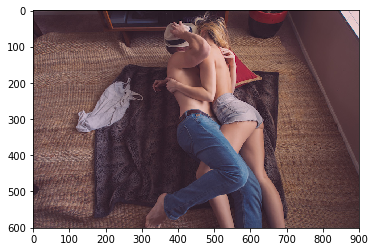

In [8]:
imgplot = plt.imshow(img)

#### Adding random perturbations

In [9]:
random_perturb = np.random.randn(*img.shape)

In [10]:
img_mod = np.clip(img + 32*np.sign(random_perturb),0,255)

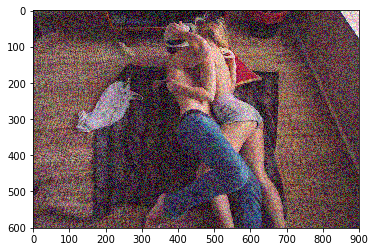

In [13]:
plt.imshow(img_mod/255)

In [14]:
# small_image=scipy.misc.imresize(img,25)
plt.imsave('clarifai_images/nsfw-002-noisy.jpg',img_mod/255)

In [15]:
nsfw_rand = plt.imread('clarifai_images/nsfw-002-noisy.jpg')

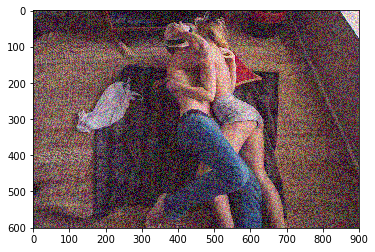

In [15]:
plt.imshow(nsfw_rand)

### Drug image trial

In [16]:
drugs_image=ClImage(file_obj=open('clarifai_images/drugs_small.jpg','rb'))
model.predict([drugs_image])

{u'outputs': [{u'created_at': u'2017-09-14T23:05:00.048935594Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.99996763},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 2.3027327e-05},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 1.756333e-05},
     {u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 1.3455325e-05},
     {u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 7.980809e-06}]},
   u'id': u'dc69ebb54fd942488ffa4dd488d16e8b',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/a2805bdf4f8f4e70a8d699969488623a'}},
    u'id': u'ddbf3fa9cc414f12988aba5827cc53fb'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-

In [18]:
drugs_image_array=mpimg.imread('clarifai_images/drugs_small.jpg')
small_drugs_img=scipy.misc.imresize(drugs_image_array,25)
plt.imsave('clarifai_images/drugs_resized_25.jpg',small_drugs_img)

In [19]:
drugs_image_small=ClImage(file_obj=open('clarifai_images/drugs_resized_25.jpg','rb'))
model.predict([drugs_image_small])

{u'outputs': [{u'created_at': u'2017-09-14T23:08:10.894549620Z',
   u'data': {u'concepts': [{u'app_id': u'main',
      u'id': u'ai_QD1zClSd',
      u'name': u'safe',
      u'value': 0.82016927},
     {u'app_id': u'main',
      u'id': u'ai_8QQwMjQR',
      u'name': u'drug',
      u'value': 0.18389986},
     {u'app_id': u'main',
      u'id': u'ai_RtXh5qkR',
      u'name': u'suggestive',
      u'value': 0.008053659},
     {u'app_id': u'main',
      u'id': u'ai_V76bvrtj',
      u'name': u'explicit',
      u'value': 0.0019281144},
     {u'app_id': u'main',
      u'id': u'ai_kBBGf7r8',
      u'name': u'gore',
      u'value': 5.991137e-05}]},
   u'id': u'd435f7f6f0cf49e8ba4add6e1af16313',
   u'input': {u'data': {u'image': {u'base64': u'true',
      u'url': u'https://s3.amazonaws.com/clarifai-api/img2/prod/small/c0b5b6be99074a458dd6f7062f2452b8/e82b1003190a494294b6d8f2bd0443a7'}},
    u'id': u'be71778b29004f06a1c9e587618defc1'},
   u'model': {u'app_id': u'main',
    u'created_at': u'2017-05-16

### Gradient estimation attack

In [17]:
def moderation_dict_reader(concepts_list, preds_array):
    preds_array[0]=filter(lambda concept: concept['name'] == 'safe', concepts_list)[0]['value']
    preds_array[1]=filter(lambda concept: concept['name'] == 'suggestive', concepts_list)[0]['value']
    preds_array[2]=filter(lambda concept: concept['name'] == 'explicit', concepts_list)[0]['value']
    preds_array[3]=filter(lambda concept: concept['name'] == 'drug', concepts_list)[0]['value']
    preds_array[4]=filter(lambda concept: concept['name'] == 'gore', concepts_list)[0]['value']
    return preds_array

In [18]:
def CW_est(x_plus_i, x_minus_i, curr_target, max_index):
    image_plus=ClImage(file_obj=open(x_plus_i,'rb'))
    pred_plus=np.zeros((5))
    pred_plus_dict = model.predict([image_plus])['outputs'][0]['data']['concepts']
    pred_plus = moderation_dict_reader(pred_plus_dict, pred_plus)
    logit_plus = np.log(pred_plus)
    logit_plus_t = logit_plus[curr_target]
    logit_plus_max = logit_plus[max_index]

    image_minus=ClImage(file_obj=open(x_minus_i,'rb'))
    pred_minus=np.zeros((5))
    pred_minus_dict = model.predict([image_minus])['outputs'][0]['data']['concepts']
    pred_minus = moderation_dict_reader(pred_minus_dict, pred_minus)
    logit_minus = np.log(pred_minus)
    logit_minus_t = logit_minus[curr_target]
    logit_minus_max = logit_minus[max_index]

    logit_t_grad_est = (logit_plus_t - logit_minus_t)/delta
    logit_max_grad_est = (logit_plus_max - logit_minus_max)/delta

    return logit_t_grad_est/2.0, logit_max_grad_est/2.0

In [19]:
def xent_est(x_plus_i, x_minus_i, curr_target):
    image_plus=ClImage(file_obj=open(x_plus_i,'rb'))
    pred_plus=np.zeros((5))
    pred_plus_dict = model.predict([image_plus])['outputs'][0]['data']['concepts']
    pred_plus = moderation_dict_reader(pred_plus_dict, pred_plus)
    pred_plus_t = pred_plus[curr_target]
    
    image_minus=ClImage(file_obj=open(x_minus_i,'rb'))
    pred_minus=np.zeros((5))
    pred_minus_dict = model.predict([image_minus])['outputs'][0]['data']['concepts']
    pred_minus = moderation_dict_reader(pred_minus_dict, pred_minus)
    pred_minus_t = pred_minus[curr_target]
    single_grad_est = (pred_plus_t - pred_minus_t)/delta
    print(single_grad_est)

    return single_grad_est/2.0

In [20]:
def finite_diff_method(curr_sample, curr_target, p_t, max_index, U=None):
    grad_est = np.zeros((IMAGE_ROWS, IMAGE_COLS, NUM_CHANNELS))
    random_indices = np.random.permutation(dim)
    num_groups = dim / group_size
    print num_groups
    for j in range(num_groups):
        basis_vec = np.zeros((IMAGE_ROWS, IMAGE_COLS, NUM_CHANNELS))
        if j != num_groups-1:
            curr_indices = random_indices[j*group_size:(j+1)*group_size]
        elif j == num_groups-1:
            curr_indices = random_indices[j*group_size:]
        per_c_indices = curr_indices%(IMAGE_COLS*IMAGE_ROWS)
        channel = curr_indices/(IMAGE_COLS*IMAGE_ROWS)
        row = per_c_indices/IMAGE_COLS
        col = per_c_indices % IMAGE_COLS
        for i in range(len(curr_indices)):
            basis_vec[row[i], col[i], channel[i]] = 1.
        image_plus_i = np.clip(curr_sample + delta * basis_vec, CLIP_MIN, CLIP_MAX)
        x_plus_i = 'clarifai_images/moderation_image_plus.jpg'
        plt.imsave(x_plus_i,image_plus_i/255)
        image_minus_i = np.clip(curr_sample - delta * basis_vec, CLIP_MIN, CLIP_MAX)
        x_minus_i = 'clarifai_images/moderation_image_minus.jpg'
        plt.imsave(x_minus_i,image_minus_i/255)
        
#         single_grad_est = xent_est(x_plus_i, x_minus_i, curr_target)
        logit_t_grad_est, logit_max_grad_est = CW_est(x_plus_i, x_minus_i, curr_target, max_index)
        single_grad_est = logit_max_grad_est - logit_t_grad_est
        print(single_grad_est)
        for i in range(len(curr_indices)):
            grad_est[row[i], col[i], channel[i]] = single_grad_est.reshape((1))
            
    # Getting gradient of the loss
#     loss_grad = -1.0 * grad_est/p_t
    loss_grad = grad_est

    return loss_grad

In [31]:
import time
from sklearn.decomposition import PCA
-

196
-0.1567762791
-0.129119962519
-0.136582042424
0.458225222656
-0.142233810964
-0.412724188635
0.688986669504
-0.634006921617
-0.31957278237
0.402708440737
-0.286127444696
-0.584023695247
0.0487557125894
0.477034541849
-0.326811671004
0.293007364723
-0.50164210367
-0.324327289024
0.0268509549252
0.270731572313
0.464091343438
0.301253112949
-0.0893065691267
-1.34110971425
-0.660789870075
-0.40265597869
-0.328935733952
0.46336187048
-0.0494991321745
-0.00256246253079
0.369087847724
-0.531333337558
-0.33992396086
0.222835590761
0.0332249209019
-0.441460629232
0.141266039682
-0.670929245571
-0.411806922107
0.114545288217
-0.243441938816
0.553691624878
-0.2833058425
-0.0308494702841
-0.117523025277
-0.593865719349
-0.118245203865
-0.409786891588
0.108231689642
0.250843997209
0.455400560487
-0.200594190893
-0.345392919144
-0.328047848522
0.848564512626
0.576921637413
-0.712524101896
0.516700022169
-0.012760720136
0.592922196331
-0.478342196817
-0.387996468564
-0.276467632737
-0.29205187341

0.404288073353
0.242770931695
0.129953739335
-0.341087556704
-0.316953834888
-0.148715700592
-0.132290564603
-0.476588571397
0.165507511994
0.545752766162
-0.250949426095
-0.661547271919
-0.363341401127
0.299446762404
-0.0672173281573
0.380300713992
-0.0316488615009
-0.213284013153
0.440643074218
-0.574694782271
0.560009627534
-0.481640369026
-0.432143542794
0.0277388236375
0.021843738285
-1.18643953139
-0.123162118872
1.15728480609
-0.630481125392
0.254996079951
0.0311386916138
0.182948454932
0.360582740959
0.556069146725
-0.519175278786
-0.112837111832
-0.264699224065
0.0726818887499
0.21910550047
0.55403622592
0.168760522068
0.165600893956
-0.493542307461
0.159558441128
0.108356511263
-0.0343347326322
0.205903254276
-0.24325876843
-0.765485514931
-0.616430112829
0.281126436084
-0.0682098626057
0.114431460037
0.280990071828
0.088502769464
1.38450135014
-0.0111600786569
0.806096443946
-0.15242879128
0.280635458313
-0.116302819912
-0.590348824062
-0.236006711005
0.301949637518
196
0.39

ApiError: POST https://api.clarifai.com/v2/models/d16f390eb32cad478c7ae150069bd2c6/versions/b42ac907ac93483484483a0040a386be/outputs FAILED(1505589609.03). status_code: 402, reason: Payment Required, error_code: 11006, error_description: Account limits exceeded, error_details: Request exceeds "search and predict" limit.
 >> Python client 2.0.31 with Python 2.7.12 on linux2
 >> POST https://api.clarifai.com/v2/models/d16f390eb32cad478c7ae150069bd2c6/versions/b42ac907ac93483484483a0040a386be/outputs
 >> REQUEST(1505589609.03) {
  "inputs": [
    {
      "data": {
        "image": {
          "base64": "iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAYAAABccqhmAAAABHNCSVQICAgIfAhkiAAAIABJREFUeJw8u+uS7Ep6nvckkAlk4lAFdFf16rX22sfZcx7OSUNqyKEoSraD4cMV+Cp8A47Yt+C7sBzh8A9FmLJFOaygbMoa6mBR0mhMco770L1WVTdQhSxkApmAf9SIfyuiKhIVH/L73vd9PvHf/nf//dp0HZ0G7w3aPWDalgboOoeNEd2A8C1adyRJQTIl9MbQCoHoR8Z8ZV23jOszRgiEEExJgjAGZY8416B1hxECdIPD4Y2ADhwdmgYauO/AdRr3Abiuo9H3DCGgncNpzb0Dpx1OAw/gNOT5CtqhO01vBGiN6B9Bg0PTaId290CHaxp014HW4ByIjHFdEWaLpsN7gQbGdYtuHOPzyjynoK9n7HBoHGiNdgAa4wVox5jnNM7xgCMfc5p7B67BPz7SNQ26a9DNAw5Hpz+gcQ9s1y2HtGG7PvO8jjSdZn2xsjxlfCo/ZZNtaBx4YUA3GNGjcfw8H9mOLwCQskLzgKNhmz/TdZp8zQFwDQjvicri0EhZcbdc+NU0ka85KtYI8Ug+5ozbnHxcydeVcbuCg3FdqapA12kAtHaAu/420OiGZT3hHjSN1vi25/GLG1rhwSzgcshWsnViajIq6XmcVg5//v8BT7z44bf5h//D/8iyDjT1hQfXUDY54RDYpDNFcYNoDzz9LOOiB+osw/eBZ62RY0E7Ws7bSMLKJgssuSTamnG1vGdW3p7PZM2WyZ/xvuQ894QI2SbBdAtTkZOeIq6BtQugYXRwIyu8HNBCs4yOUraczRmcJlsuoOHtnPLOPHMoShoHXYQWy6g0RjiEuQMcQ39iKSG7aGTl6MOGvYq8/PB7/L3/6vf56V/8kq0T8LUbul/AO99YGT6t0OuMrS35uL2WK5A/5zizsG6foVtxGppOX6uycRjvQTta3/LgHPfA0+bCOObk+Zb1+RmtNegHuu4e89KT/vbXvvpJpSusibzWgSA13gtkgFDt2AuFVwZjBdPphKoNyWaijQLVK96+SNi5AK6jVTWOgBEeYWpqIUjnFS0lsTWEB8dQOZRXBADpqI976lZhVCQKj1Ae1RuMMvgY2RQJ0g1QaZyGgwxop6EJSKehknQOauVxSHQ4ENVL0BIpJbJrqGTHoXEMD5KdrBhCICAJYsUYT2Cm9p6ukWinUb0FAtEcUUYhh4CuOsJBg67QskJXHYNziNowyIAyR1zXIHcOb/fIIAnSMW0SZNihm44uSCrXIBnQVCjhGcYEgqQsR8YyJaCZ8xwtofUtzjlcVaGEJTgNAZQxuCCpXEe2ZDjp0GgOVUOQYMQj7CRhkOgukJYpwggcmqLIMFahtcR4gTeKoAe0c/SmJciBKgwcvaCONcILGqDiAap75DAQgkaGigp4e/DsGkkXBo694eV95BgF+Jyh6UgvKdvblvXSc84nvhwl/+av/pIf/PBH/Ok//9d0b3/OmC7EsCNuBzZvPMZENhUMocMNJZdpZcpTwsEjpgv5CEPmMTlsL5JMldxkCcQcXV3Ipp7PS081bBGnhO2rkuLmliRRjGNCNm3JC8HkR2YWdJahAMkGERw2m1BognestwXplBOjxwiFC4Fhk3GbV0Qxc1pLZKII9JhkR5AnwiJJ5zPrrBDJgvILCZqEDUMmiCKyLUtutxWNd1y2OdklJbY9dHcslyeWLBLjHaH5FIKkewhICbo+Ez9zoHdUAdzQ4aoDuhow3hBCwHtBaBxSB855jkYDA0YYHnAE2SCER2pN+rtf+9EnRxHhwTGwwyqBDBLNQKgkp9OJ2htM2+OjIraKzXSH9wJrBbf553SDZtCSAUkUirYVCBvRISDRWCFwdNSxxQhBBUQlUEIxbRaEV1gTEVahTEQYgVGWPgqEPRIaie4apB6onCZoBw/QyAAuYGuDDCA1mGjQOoDTyGGgbT19fEndC6zx+LZFeY8RAttrnHTEKIlGoT5rOYqIqi3BVTgGliyhFgYfPfFlixAC5T/DCoWx16IQykDYYXxEKQ8uoPYWf1QIUyOUInpBLRRCPWJ9i1c91ihaMyLRuOCul1mQtMay+TxheD0gvKFWCukC0SisitS1wTmNUQpfe3TYgR4wVuBkB9UO1UcqLekah6YixkgrIpfTxGP0FNMbrBAYpZCuwWmJdAERLT621OZIHw3GeKyKCCVwUhIcNNrhKk0XHNtOIQdNrzX7WuHUjOkdaqsxaO4ljKsnf4oEOWN/NXDQZ15//A5/+o//J8K6ENTKEjyJNySbSJYlWAcayZSdWKYUUTyTjvc8pycykaCThLkAqxZuGs2UFKxhYrkxCCVZuGNcPdumo483hOCx9glxTlnEM9OUs1kULqbEEAhTQMmAkgsOUEFit5LmMqKnBCckUXiSmKBUxtM8g4qI80qUJ8QiESawXjRrMjPLlClzDGlOKjQ2OogOvUTGcUTunsC9pPzAkOqWyzLDELh5GaCDbElxaqR1CYOUVKHBtJZOr0h2ePFLXDMRnEDvdoi+RhIYdCA4iTGKoQusb1PqOnJwIAnQaAjXZi1DR/rt3/7DTwIBrQNKKJrg0HpAKIM6RrSWOBnoKkk1XAvJDRBVjxCeMS8AjRJHolDXW9IFojFQBayICBup+5qHSmN9j4gRh6SOAhHFtXM7idMDuAYZBg6DppFwyQqijQijiKqmtpa+FdRGYIVHVpLAQAiSeBTQaCod8D7ibURKjdQPODT3bkeMntZYjkohokQoQ2sGYq8Qe89LE+ltze7eoYRgSm4w0XL0ijoKlI300aBERNWKY9yjw0Abe2ztGdz99b/xAlErhIj4XqBqQYyeTXKDUo+YvsYrgQ9bRCsQvUfUkfuD47JcmG9TpKtY5xG5cwilsKpGKI84WlQdCUGSLBnWH3FU4DRWWBrnwFXXgs02SAfVEAi64RAcjYMgNeuaE5VgCANRWVT0CC+YNie8MJjoqWuFCxqJIx49QincINHDgNOSbQ1dsMSdplU97kHizR41DHQukGI4jxfq+5QmlPz4X/8L3vv23+LNn/5Tvvj5ZwgpSFh5oQq260ySnelFQxYtA4FNVjCnBVO0pDqgTUrvNyRGsI4zXk6k55lijSgzcl4z9l4RsjPZJaModxzjgBxXvFLMeiWdPTflxJNYEVWCWBeYE0IIVEFThYBb4M5PJKHiSUvyZWJMJ/RmQzqnvJAaZyMq0dRxQgiBiSvnW6iYmaaMXEumMSFLEyZdkGYWqQIikaihRlc9H734OkWaIrwj+oTklCDaiblsCDKQxBVla7QewC54C1KCdAV7ZbDihlpYqlBdp+qgqeRAJSWBitoo9DDQyQqtB2I0CG9ogiPGmvT73/vRJ5KAEYqgJTIEjFIcuMpkpGZdUyot0VXHA9VVC4aAlo4hbJG6w8Q9xiisEqioYIBwGNCyur40xlLHmratUb7GREEnA0oIdkicg9BBpeVVb8rrAYyKNBXoQfOgAzCw6yQHDVIGpLteUCYqpAaCxIuIDlwvlqqD7p5jjAjziBeKGC2bpUAsFUEGRN3ha8M+CnphiK0gdAGrFOXbldhGjDG0tseLllZETF2jvEdS4YWnbvd4q9g5SdxHhLBod49VjzRNhY0CdVQIL+hFJNncobynmCqijXghSNOSdV05ry+oVeSSJczrLaZXeBFR1nNX3CBMZHjQKOHR9YQWM95rpJ5pfI7Ygx5mDmqkmCwjC51caS8dUr/gcluzY+aSRm7LCSscom9Ylp6YVLQGvIA6aqzRNHYkWknQJfgUmpQgtsggcOeIR3JfSXzvGILEKBAy0ATNqDXeRsp3bhjdA3/50//Id7/1Hv/z//nPiIzMXpA8zYSxYL7NWc8KbS5MytCGCj8oKusx+w1rJ9A+kCwZRZEyJ46dE6hmZZ4T3iQnbsuE43SmXi5kmw1pc0s+O7zIKPMdO1NwtBLHCEPEJBlRRFgVeoFAQtCBEBa8qUCCdBNmcawFpOmEVxPn54I0mREhYktFHR2dTnnxnCEzhZYzw6kgz1Z05pjPlnGS1OWOqThzepbMs+KdD95jfqG5/CzDvRbcrg1P2cp4hh0QydDhgNjkOGBXQa8ikjMuQNDXBhrCQGgCTg803T0PurvKeDeAbqi0Q/WWBolEYoUiaEf6o2/855/Y+IiTmiEEVCtwA8igqZViQFP7I3oAFwIqeryN1MrTOY1RDjc0mOjpjaLtBTH2uOZqekTlCbuKqAyqjwQZUMoilEUIBU2HcxVIhwTCTiK7gKs0oYFLcsGaPUfb81K02D5ilaEVlqN9iZQdtRKEQYK8GiGDk1et3ApkpxGtRSLxQlxHdmOwylOLATQYezXzluyG6C2SASclpjcUmwtRCYxXfBZfYoylrntsb1H1nmEItHXkM/uIdhVeWExskaHBGE/0EesNbe2J5sixVmySBWEi0zSh5JmoBPtaMK4pvRfUypOPKedzyk12oY+KOkZiaxCPRx5Vzb7tiaam6sur1xE6VC3odIBBI5RC9IZLcmJzl4AOjG9XWmPpf9NRTlkC0hGtR6iIUHtadcSrmoBEB83gOpTf41sDMqCBWvU4KWlijp4doTG4TzuUaUEGjFeo3QA249l07IVmPP+af/P4M37ny1/m8B8/59/9u5+RJWc2IiO5yVhUTaouyMJgvMBE8CYSDoJNGzkTOfWOy6ag2OasckaPK1GnlElguSyseQl9RrZJOEvNZZno7IHskvLoHjG2IyaK8ekZvcyINeM8QVwVZZaj5YVD0CAXCBkTC0mcGNeFXN2wLBIdAssESQLZvDDuZ4SKrGNCJTXDCj56EifJFEgcnQREcq391VLOUIuEuJzZtXc43TKPP+eueEkoT3gFH+g957nDmwzcPdKPROXpwoweJkxtUKpHiIxoIhKHPki0lBycI89vaYJGKEsvBHq4+lfRR3ytcNIRnCb9g//ih5/IUIEOtNEjnaTSGqE8TgY2y4STFd4eUe0eVRvE0RNf1tS1Yv4iYa8sT8kG4wVVA52GxknkAJtkQ98L7nF4b/EvW3AQTY9QhuKSoFqB6g1RKITyRCPovUL4SFsbnJPIBnAdoakAh+t2VJVDa8BJgtQIYQiVRnYDfl8jkQwEhI00lUSpmhgjRhnMo0e09wTXEY1ERYOTAy6AioowaFTruVzuUCaioiDWAlUf8bGlFS9RMSJ30FtFpSuE8RgjcAGiiPRKEAK0JkIAK1qUiNRqz3J6gzJ75osnaE2+llgrWKYLy5LQaYd2B9x9hZYDlyKj9pFe7NkrSx8VKlrWKsFGz7CT6IND+IiW4Ag0TSAvS5LLghIvqaTkPKeoWsEw4IXCjJLMv2SjLEaDLhv6Q0DnoA4DRSsQjSWcJd3ZsZslvYZuDBjXMbczldN4Vuy+wnYr+7YjkzlxOJAskfpVSnQJf/Gv/pyvfPUH/NN/+efcbASPbwbOm5TGaab2QBIjQm+vMtFUCF8TF8/2NmGWtxTZSFxmRL8gJk+QBRpNT4uuSyqeUUpgj4L9lLGeT0yz4Dm98LraM6Yp5+7AWMzshKS+kfgkpQoCFy+4ZUtVTJyWjMiFXAaKWZOoyFIMOJ+zJIFxCcgpYd0qNjFDDxVzPjKvkjXAjVSMQbHmKV06kYaAdAtzJVHnhXNZ4/1K5TV9knCzSN6umrtsw7oxuMHh40KZzzRC4g3XSm4gCk3QM9rteKjgfvAEt0PUNTI4kI48nwkEGCC5THT3gUqCkwNDE6gGjQ4S4T3pR1//wSea34z+PhKkxNaRatB0UpJkF0RsAa6m1dEj3lXER0H2lDBvF7zaU9eWKCy9amkcPOCY55VlWZBaInwkyAo5HBC1gK6hYeApubl2TeGJtaA3AhMF7VFhjKXTgeZTQEMTJDJUdLqjkgPaNXS6w4WKne7orafCEVuBxEEH9V4wDAFranzvicqgD2CM4XgTKNeVY6+ppEPFHiEMoNnXPbqr2BQXuqBBByodkF2DlJLDcKCSmk8d7LQj+utLHoJDeIOrOvQDxFagu2scZ4y4xqSPPcNuR7Seu6KhV4ImOJKbhJssY51HkJqkWNg+59h+j1EeKwytsgjh8WKPMpF5nUA21LHHodGDBK2pdMWDAyU8Pqrr5FYLdrLiXla4+w/4sor8EtD6QFQC6SoO2sEAUjvmNCd7ynBa4qRkLyyfBgDYOXC6Yq4cD2JFaIM4WuR/0pkPDl0VrNqzvX1FlRf85U/+X8rbG/7Dv/0x/dNb1m1K+EJzXDUiLan9M/bhgm8NhY8YI4hCMG0W0piSPiR8qi6sy4bdMHPZnIiVp3Yza7lSpluW7ESRXXC94U2WsC8Cr778VT5s30XtBfiecRQUmeLpMJInM26acFlGNQWYHCYsuCxj58AjiM3EzQWCWNj6nCgSgnYUNwvzaWFee/I5YZApMlpOAsbtRLoKRqvYZBNFucH2M0mVUCyGpEhZtz3TFyv1RzXJ51/w6r2vMD29QQwTr4pbzukKGILuiKaFLkcOCRUazISMZ5xM0CEwOABJqDTDoUECsuJqEg9XP0FznRDQ4W/SuvSPvvG9T2Jt8DYiTMSbGvfpgG0FbW+JogUOiLpmSU5YX+OPR9S7hkCHbxv2wnJwDtlo5nmF4HhpBLXwiFohQ8BV15Gu0pLhAdS7EdyONZ9Jx5F0HBmAygUaWWGjR+4kuIoQAk5rbLSItualVSRFgvc9hNeU2xEvagYHSkW8NeRlzjQVmOORZLNhuWS0QpFkJ6LxuKEh8BZRKwgzrgHjW2QXqFvL6XRD8mrioLkakDZSJBPiKK5jbqw5VB21NSivsLVF46hrA1KyLBuUqXmxlpyKBREVrpKk55JOB94rEqYlY33y+GiZb2ferjl8Ct1OU0fFoCWbpMCbSG0iOkicDsxlyTzOpPOZ4HKUf6Y2mjRPOG8TbrKIN47Gnfl82ZOmCeNasN2eqPQLZJXzze/c8K2vfYff+rji5f6H3BUGdMrQjWiZQ8h53ibEfkDKkpdtxXk9MacZgZU6QhjOXGrJOyeFlA7hG77//pZ3v/WCjz76XW4/+DLfevUlvvHtv8Wf/fH/xlf/8Pf543/0j3jjH0hMg3nr6FPF68pRZglPk8DokSoTJEGS+JVFQFo/Y5422PZCLjKUtDxXMF00bljYvFtxOT2xyTYcu2fWpMHtJ3Yo3s6Op6miGo48fT5ySTOMuDYIZ25Z5YVLkCRrhlsmNBlTufBiVpwShchSWrdBiJR0Gnm+maliShUi85zg8gVICD5nqjzLXFCWK7qbyNcZe6fxz4YkWGYBJk3xxpFcKvouQbQl5uaWcXToaqBqPuRmU/ImOyORBGaaoQI65KAJ98/Xs/tnGvka5xZqY7BHz3KTsbkkCKUobhaM7ZkuBUX2xLIkZJsMnON5npkuCctlIv3mt3/wiQRiLQhBQrhm9k030NEQ94LKgVIK5zS6AqVqcAHNPXAGQBwtNFANoIQhyANheE1vBC4M1CqiqXCuIrY91XA1+4Ls0FIj/EtcFVDHGhN7Oi1pHhq0HOgkvFQWebhHiUesEAQJuIq74gk37MAdaJqKY/Ts1Z5Y99TK81yWWCWo/ZHY1rig2eEQpsYIiXQSTYrwisADUbR4IaAaOISK2h6RncQqwy5oZBNQyhM0CFFzUyQctEZ3A63aY6PBERi3M3RwWZ7wylILxTItrOkZUQuqLuBkh6hy1rHkNxYuVRWQDKxpzvqckuYpdftIf7wmJkYYlPcIHxFZiRACHVaO3oAemJ4K0jVFPEbYNWzuFoqnE1lyogof89tf/5BvfP8jqqpBichu+z6bmxtefeUV2auMj183KGEY8zPZ5wkffPc1v/c7f8CHH77Len6L7XvoAuG+QbsKo3rGtWSzecHf/51v88FXv8M7u6/TftjQ7EqE1IzPF/73//uPafSWn/7kx+jOc1c4nqaVXQ5vk0gWDWsbWFxG9qwoEIzlhImRMG5Jyo7zmpDEhHDpKZOFMjOUSvNRYbC95Tz1BFnxvf0dybrlJz/7jHYDBMGU5Qg/cLxcrkaxqklOZ3alRo4NYQvr6klCgpUTVilqZbmoiagkp2wimTbEVjCOOQftkeeFVJXMQ47aeKLNKcJEWqaAZM4N2XlECsfa5Kypp4olazrSyJQoZuZLIGQJdZUhkTRaE+tIuq7Ig0AZzxAgDBJJcpW4NqNyEueuk2uvFoJ0tEcDwCADTedwQZLmK2u+pXy7MnD15KSTKK8wbST9/e/8nU+ManHBYYTHmh6NRIk9Ph7xylBbhdNQx0eOtkYPYNoarx6hS6mFRzeS3gqE2VMNA9G01wisfqT1Cic1StTY6NGyoVaeqCJR1MT+iDL+6qKHisdoednWeHUkeoWIBi8E1gigo/cG0/q/+VxET6MlhyCpjUBZj4p73DBQURFjTR0N0Qii9URVY02kGXKsPRJbjVeCuo7IAWJtEMbQRs9RGYwQGBHx/hpzPkYBA4jWch5TGgkH3dFUO5wLSD3QDNd0Qr1saaMhv50xyuA6R7IsTHc3hHB1nY2IKOG5yRaiV9i4/83I1iErSYyGWiiiMkRjOFqBaBVKQXw8srlTLMUFHhrSeaXSsKY5aZkiDweS5A4+vuerX/oSr77yHumastxkrOcctiVxPLMtMuS65Z1pw+br7/LxO+/z/nuvePn6nu/efoka+OvB8YtfPxNDwOtABJrygmle8IMXH/He917z4f41QzNg3gaS2JPkkj/9s3/Pz//qn6Pzmn//b39OYCSuWybxjMgFO2rWRiIfZu72mnm+sDE1vE0YyifERTMDmhkqw2wDx0tByUK6j2RrzeV44KZ4gVeeLJNcshs+yrb80jpuipK2fo9TlqGSkelp4JRMbNOGz+OZmF7I7QW9GLJlJQ032PkMU45IJJtsYZoSoopsn3PYQWtzqsRTqAmrNVJLbucVkUayy0SQFcpYzjoHCeuzw5gMNwgWtTKuI06liDkQbMDUe9zZ8lsfvuLns+Zetzg9U34x4JoGdEI0Hj0c6L1EtQLhDXF3IkhFFDV66Oh2mpexpwsVsVW8SRICHTYqql1gGF5TG4U1R26mDel3v/N7n/TKE72BnaNWe2ysccHx8jcgSN9GlI38p0mhriMPDoT1SNIr6BIVmh1R9Vckl3AFSKJB2IjwewY6jLEYcWRwUMdIHz21qvF+TzSep1cTqq+x0WCURezjNVq0PWpfk0wZIhpq64lKkEwFoo04qYnxkdoKhFEII1CmpY/26sYLha+v2bYRFhEF/UazCxLjHdFblPIkxQ2qF9dMvDaoGCmygqfLgjER39fEVhCFQgINAwyBckwJIRBNRHhFFJ5KS9LnnOXmRHjQ5LclIMEN2EdBqDqyacc4b5m3OeN8SzJNXDYJ+97/DQCkhMUbg6kj0Qpe1td0wSwDy6uGXkVqWxNbTxsVbzYJa54zPU0QHOuLLa8rzW1Zsi1LpmJi+MUDNJqdyci35RXCsoZpk3FbzqR5SRtbYhtZb9/hi/TMOp65XC68KEfm85Z0TbhkCb/3lY/45o9+iKwaTpc31LGhK9+SD4Ypkfxf/+QfMhaOdF7565/9Ffs649gfmJcNi025yWYm34AcOZ9W2ts7RnUh1oGiqMiUIIsrCbd0NiFDc6M164sE/XTGOc9zGcjzPdk0c3rsGKYR83rFnzKm6YmH7oCxE40WrLqhmEbejpZ3TcUDV7rQbVMK56maCtEUbJYEIxTSacp1ZHtbcp6faY1gOEtc6rCxIBhInkZWNYFqKIqFdZ5ZLhnJmJJxIc4NBZakyFgSjzASP63cjRI/L7z+isJ/lrDff8TtC0iWkSXJUCKjk5LKfUElNfEpx+8FQuQMHNEIpNxjrMIYhVLX6XhoKmQY0N3AvhUMMmBiS2sjn2oIDHRDQ/r73/ndT4Qy1EpgH6/drleWfaw5yAPGKrzy7K26jkXRY2y8mgtAU5VYG4lRUNc93kdUrGmjvcYeor6OrSrS+ogQCmENsbYw7LjJJqJQ1++rI3svUMZQZE/4XmCNwXiDUNcHrIW9AjqbDBMNsuoYOsmSLLSiRezFFWWuKggOEyMqmmsUZ3uWTcKxrsFJTDzglUHUEisEIhqijdTG8lQsCCu4yRKsiHjR8mp6g4+CqgpXWRMVaXrLOD8zb0tUvF4csVV4fwWg8nyLsD03RcGDhORp4nm7so+K05uEaVOxj4rkdEG1nt542kfD+Z0ZCczzFqUU0Qqs8kTrUaZGxUgvJMtk0S7ldDkhteRUXKCDVkV+Pads389oo+JyWthsDO3LD1nTBS8c9q8dr7/xHuu44FXDTg9MxYILOSo6Pv/cIxnw3vA1StIyR8sB2TR8sPsSr967Q1YDX3r/XarXO+xjhypXEp8hG006bxjsT/lf/8Gf8OHXv8avf/HX/OT4C9IiYwgjm6nltHcUyUoWB4IpufMXTLUwTykiQromV7S1GLitzuRmwHUzT3nKu1GR1Ip5rTCipnOPzFNJedvSiwOXN2fMzQte3d1i1A0BwUMcYHxDkd2hi8B6o2mPFb6WEDRxWRAXC3rk5mbDm8sFZQSXLMMfBbG9IHygXgN5VhHjgL4syHzBsbDMFwIrWbKg8bgShFIk64B0CpUlKHVLCJrtPJGknhMZpr5Dv46sY8rd5h2mOJNNBb/KPLKbr0ZedcDVI6ED6bZsNjnrqvF24egjVFChsaJnJw+4QdOrPcXpct3DCZpDBeVzznZdKcsz6ff+8PufOKkxdY9ozVXbHo9XEtAbVKvQOKJXxHhFbq1R1DYSa3EFKpzEt54oWnQAayxKGaKo6XtPJSXCeI7G4IYB0yqUEBhjeLOZEN7SKsVTkhC9wSqFaT1KGLy9OvfKWJZLgo8R6+srVus9QlwdciEMl6RA9B4qCEOHtYJeeZYk4WYz0QtBXQvqx4iTkto7bC1oRUBFwXKTYJTAqholDG20nJYLwrYky4Jt98S9obUC1YqrFDE9UldE37MUE9t8ZX4uUXWNMZ5znpNNF6JXzPmKsIq7IMBzAAAgAElEQVR9rZC7in0t0OkTwhvkLpCOOel5JbuZaA5w0JCXz8igqSrH4PQVAwuBgCaImYaZ02UiyxYaKQlINkXC5U1GWq5s38mp1Yd864PXFO/dsCluyNOUzXTDXEysYiErNtdlKBExxxqrei7TRL4dORpFsVw4qv56wdYv2e0adtU97310Rz4KohG4TyN5uUWXjsdfCi5zoEgkP3/zhn/203/CB7LkX/3Zv2Q8eZJzB2FhmzomUZGeJUu1o/9iJq1HzuuG2kzMs2Wbz6xlTnUUeEDqV3yWPHEzVlBpHp41L85nbl7dE84ZtXjm07cF+X1CXja8d/Mu5Tvvc1ffco8gS1Nmd8EB2aXAd2/opGVZFKGylCJniIHEweIlWku88SRLRr6O9HbGWM1xnphjThVS1uiZkHi/sC5A85pi2RBI6bxHRcPqFoLWlHpHno5AIA8BikAsJsax5KPNnvUi+WD3gtOTJCsmkmQh6Cv2HoImbhqU9RgzQDA8hJ5Gt0Rjr/xM43CyQrqKaC1GWYZdAzTEeJW43B9I15IH50j/ztf+9ideePTDPUpEYi+otMR6i20NSniUiKAD1lxNqIDE7g310SP1ijURNCgriN5TNQ0iRpQ4ooxAWXEFbrzF7wVukFfmXCmy7A7hPb2vaSqwvbgShb1A1ILaRIz1WG/YScejaXlXCKy4SpFBglWRGI8YYfB1RGqHc5pGarJpQkqJjQYvIrX3+P1v2PpasjeCx6PD1/vrIo29SgFlBEehWJYblLoisd5EjLD03v5mmUbh1XW3QVjBJclY1y1FlqDqGncY2KYlRghOSca7e8WUXSjXW3ay4jktOWcGr66SaT6nNO5ACGCFIpsSNPd0QBg0laxw2rGTGqSDMDKvGzaZIC9f8HYcmdNnalXTfthyUxR8sLvn1as79u+2rHNJ85vYNMgHOjTf2rzDohUiONJk5pfBU6iCcZNw5wtehsDyeGJetsjRUW5W7svXhHSkmkvk1z9gXyuKoubVjULFHbJ+i7qk+PzMj//iz6jsxC9OX/DzX/0Fp6miacG3FekYGDYF5ehIhSLfXvAhxRjFvJ6IXtIrxe2qOKUrySXBPQ5UtWSVIMRCW8KYCzbtB6zpGSM21NUTH958nf/mj/5L/t7f/yM+3n3M7r7max9/lW//17/DN7/2DV5XDVYd0fP7LMUZL2A7NxRJhtQzPq5YbemfZtq8InrDNGTo6JgagUo2ZPnCSslZRpSYGBLFPssoNieWS4FSb/BJxuA2FOvEpiyY6wcuWUGWTTzNKX2RkhR3CH/i44/veexnNt/Y0OqVYXDk2xIdAqHS+L7GxTO2TlFRocyFctb09kTTSI5K4K3gNQErFDSO7HIHXbhyPranN57APcJHkqIg/foP/+ATjSQag+SArDR9jDRSUgVJHesrKx6vLnhw1z2AqgOndwwypUHjo0AGDbuG+lERuge6cI/ygqA1VlkI90gk0VpCqNhph4iWYDNqk+GzlErWxCRFSoG2E2gFYsLUGSorAY9YZoKLaHHBVwlSLWS+pJ1mFAVBZKRpQC0psUpoL1uiyhBFTjNEXFwQugA3Q7fgtMSrnr3tca6iNjUhDLhOYvYKIY4EKqK9OvDBSYTyBNnggEMnUWZmuWnZTBohJJoAaKKK1w2tvaEZQLVXpmKaMpbsV9SHisI4rNHIkNObhmSJJImnLBfWNQExgnpLZVaCGdE2Z7AlBEmzWxG1RjqBdjPj2JDnJY2s+OCd99nf3/POdIPAIeec02ZDmSwMn0oun59YrOV8mqGCoat4b7NhkyU0VUCIPccYae6/xl4JorIcRQvDgKkNY76SrQtqOZNt9+BSTn1PH0GmF96OIz/9f36MNY6f/Iv/QJoqNskRkQnyecNRLAhGYlKBK6nyC0u5IIYz2XnBJ457oTmYgnzcsqqRMXes2hDzO8oomJaI9inZ+zWf/+JTMBk//K0/5Lf/s7/L/r1v4O0Dc1vx/uYFWTUxvr2ghxazv+fb3/8G7+3fvebqbiK4M/NssH4gEQVTkbHRhixJUHvFKf+ccF44uYiRgVOUFGRo35OGnCRdSJqJ1S2o5Mw8FHg3Um006TajvxxYn1JiGjhNE+MgWZYJfdnAc0+2v0EieDUlTLfvMeaB9e1M0FCFQG8EWqW04sIgFbgdad7Rmpur/9T37MKVTdGdRDs4ikiQHbLSIDVGCZJTQrFJMN6Tfvebf/uTWoFtO1rREB87aGZCNfN2zBAmIKLDCMmSKIRyHE1AGYkOz5RrSfKUQBjQAcLBwc7xqFqC7DD7+rpY4hWijSRLghIGWQWgQkwrg3xCE1Aqp1OBIZwwQjFUCSax+JgzqIaBBCkeqKoNBMm8Wvxwz0Y5YvSIqkBITeRMkRQkR+i2OYU4cGkVyTFw8ZFtolmmE/NddaW8Lp6Necl2SZgyz8kayqIgKSybX9X4qDH+gbzcUAhL+bww3dXsRvgsnHhJpJWvGJMLYfVkcaHLDeVSMqmVqX+Ldysy1xR3LadeEY9/xfrqPVwSebHf81IL0tOvKeIXFHFDWkx0656LgtxN2FGSREVhd0Q5MN9Y7tqXnE+B8PyM1yvNO7eE5wuXx0eeTMJXXlSUsUV/O2WRgtFPtHnELROlUrxVn6GHSLlbWd1KLkvO8gtilvE0ZpjpiaJ8Qbae8JuJnz+cubx9xtmBaU25K2se3cQlOpJjz8PzmeQ25a6XPC4XVHLmf/kHf8LHX3qH/+Mf/wmHgyVu7zmEM3JVvOgtm3RPfoZL1hOSgK41+B1neSaXNQ//P09v2iw9kp7nXQlkAkgsVUCdqrO9e6/TPRt7OByKI5JDSrRDtik55FCEP/m/9G/xR4cibIcUsh1WyA5LlElzhhySs/dMd7/9bmepDVUACglkAv6Al/x+oiJOVQLx5HPf93WXHQ+zGH9p2Jc+Kgvwj5bw2JI/fMJdf4+nOuz2jnefPuUHv/999LffJ3ca4QmShzH7XlCUFSdvTn5VEDlBPTtRDXB9fcEnn3yPD775Xe6GA1/94tcsVEzy7kPiz494ns9GDCztiYvwApUskOORg6fRjcat7th1EdIzlKPHbPR4fZI0LuOUOoSNsG5AHQKczRjjnqgS0CbMwx5z6pCiIfbe5fmrX/Kv/vR/4Eevfsa7yTXW7fFPA4WS3DoPrRymHcCu8JM90UnhDUvqrKZ2mvHk0wJJGELeYtuczG0QrsA4QVtNkfrkNDKGJ1qb4//R7/7ep6UoKIzCOUMbpbRrWLYpbQpKiyk3LjTOlJPvPJWwBptKVK1oH+6J0pzWSogqlFOkSJQWeMMUtsicoekCnDOstEMIjehOlIVg4WmMStmUhlms0EohXMswG4gbhdMaZSxOOTKxxFYWIyJqkbHIDG27Zt/6yDZCcsTaiGo9EuWQuRYiS2RDCiFY5z6WlsxJcmnZi5FLJKYWtNZSuoljkDLpqHta/LlPN8TYdcVh8Kgzg9cEHH3LWZJzGgVOlyzbjGM4xziP3I50XgOphMoyhjNGP0QdDKXYkL3/jN9/dsmH3/omT/VDFqtLnn74AUkaU+57TscTjahI9z1jrHj4eMXjdzLUuQa9pN9VKFXSBAlIRxiesC8zTn4PkUD1HbevnvPZq6+Q/ZzQC2A8cbxtqV9UlH3LPKro0hmJ9dn5CWdnJ4RbIdSG1sLJ77nzBpI3PbWqOY0hntcg0yWh33OYCY5v1vTUiFmLl2gWz1tubE94Gvjxr+8p65/jZkte/vmXGGNYKM3Q9Mx9yZd5i+cibBTh1J4rl9Pi8AaBjEoCv+FB+oAhmeM1DhlZ/DBieH2kO49oNydC5/He9Xt88q3/lk++922eXC65mp2Tnkd8EJ7zor4nTUdObsRGUO1bTv6O2eKah8WKj84/5iZ9jmwtD5NHfOPj96ioqV9/yfwiwZQCKyUwEiY9t7cbhsYjHgTVUDOPYkRY4BpLFsQMpwF1mRBan5CRIDyxdyfS8wF1EtTpCaIzaC2dsqTyguB0ws6nJXf+4BHVy4o8lWgNNi8mVoY8QBtR4ZFjqM2MKL+lFBpZSaScTHRt3qKcoLUt0lbYPJr8JW06AWn2EEWSvayQ0uJ/9N73PyUCowVCObAVMk9p96CyyZZrNn+/lFO0UcR+bYmilshajCqgrZB7cMqhRYYRiloLXOkY4gCvu6NbxHheQLGpcasaU2fY4p7hzqPUFmHElNArSuImRgmHMRNdqNjUlFogakUhXtHE53hDx8wb6GozGWTMFSKbFIJab9Bquu/XaoVNLdauuXUZuW1JowhTbGhtxMpAaQSmUCjhiJZTGrJWNcJlRDkYozjvPJpFzDw5YzF4bFQNfUQcn3CbGe1+TbvMCccSa3tqV07LuW7J4lxwkSS4TLPpXnHmhzyVS7z8IV9/EuJlOdezmKx4RjQYXiRH2kowe+ecDxbnnD14wHe+/lusrlaY2vEg7Dn/1tc5D2K6z18g05bxmNAFHXnUMSwecX2laIKYxyuNrSIyUXBVaBq9ZBbfMRwaYvsEa+9xsSJtQ1pG8sjndOqY72b4oUd0c4T0RJaBckB6Rro/YuVI615T2Ipua6hFxvjmnrPZOeP8xMFr+OG//XOW85gvvnjBb26fEyERbYsRGcMiZth2iH2HyhShv+Dk39EfR876jGE2sK9DxmTE1I7jydLdHdDOsV9e0lY1rQ74zh/9Hg9XC8J3zwiPI+l775FHOSyX+L6P0QWZK1hljkU8I1pCmFxgrUUZgZ92LJoF+xbOr2NWVyu224HXL55T19NZCsOE8djRDQe6LmZPzSAL5n7IXnWYzZY+9JmHNUe7gM5CDm1kMbXPQ++czWaLXvTo0pESIJTAmhrpO7h0+CNshwNPYhBaIIorCi049hHOOYSMYQ1XOqaK0glCUyukTJk2e3IKBe0lbdpy5a7YS0tagU3BRnuqPZCntLLlcp8CFf4f/8knn4raoIQhtyml1jgzyT9tnqPrCdahN9MSjEpCvkauJZYIb9YRpZYyy8hKhchKMicYhoBMuUnLdxlKGJwpILLYNqeNwDlJYRzpfk5RuAnkUdm3Mt6UbnJXApBoITAqoxYGW63JMkXpagI3yYxuVU9qgMvQ2WSscfoR63RPtAdda2xqqWROZmokl0haXgWaK+1wxlEI/dZnIMiUQDhHMMR48YH+7Di588KexO8JkzOMGVjKAiO+wmSK5HiPcjlnyQ4rU7zDgCpgUzpUphmTnuV+ZPnwa3zwwTlLv2M+nDOkkAvFPhzprUS2FY8/eMLXLp/y6JtXeMGCk9a8/tlf8Z9/9TMOX93RmYY3Rx/vEDJ0B8qVRruaSM55/M5jPnz8AX/80SPef+9P0EVJvJjRnyV889InHEPypw9xXYe6KsgHnyrNuJ5H2MqhhgR8Q9dbLIZTfkV42jP0KRd+hI7niKijNXP6rmZ72CCEI4+W7Gc9wTCwPQj+3f/0P3L2QcGP/uw3dMNrgiam7zZcXl6ybtdcriNYKPxTSJbt8dsAyQylPI5hADKZ2BEWnPEYLxJklVEUCZl25OKcURquv/5dvvf4Y+QlWJlyDO+xX76kslMgaux7+tDH90MWQ8DoJzTea25fbfjsyy1pHqGUoN1b1vuWIBgom4qf3PwaUQviWYMwEPYJTdCi+jnJeKLrSrqwJyTEb0NOo0PEBu3qt27NDNIWpxyqDqj8FK2muLF2DtyKfWoIU0m9GZBVShhEOJ2xiEeaeMHZWKGEwlUekYyw0qCUQe4tSCjqieEg8wpbSbQS7O2UcnWqAFqE02in0SuBcDVZmU0Lfufwf++PfudT5zRCryhdTS6nnL8SGtqWTJfUtcAoNwVGZIW0lihakqaSQzcRfWwrIW3JTEapa8paMAs89lYiIyYbcLXG1Y40gvnxiM193CZD5iOVXE96b5TTItHKgJ2292DfjokT3ECZDJtG2CrnYnGiFmpSHVyGKQz1raIsNHVtiIgIgoFaFxgjuB6ayVWoDF7n0TXZFDqpHcIptNNsVhuGYUZdOypasmxiGNiqxb5seR0PhCef5LTHZB7n8Zzr4RJhWrpu4DCcM/Msp51H+OCCZXvDrF8xn3uQL7lInnCZQ0kISchyvmA3hqxuN8zmc64+ekZy9h7zMCHKCrrDli+e/4jPPz9w/OwF7n3N9fm3ibjB7h07fyQzIfP+MbPzcx6mSx4sChbvrHBRhNOad21GWySstyGXSxgWKeksJ0ovSK98cr1EqBN7DUPT0i5T+rHET+Yshhav9xBuTnA+QNTRy4TLtmOXGMJTQjME5C240eL3c+6PJ/7Tj3/I+49+ix/+8IcEh47dRY+7mTMmO2hb9lGLtjFxPOAFitqr8GLBEAdIImRYMnYSaQVCNwjXkUYxgRfz6ss35NcXPCiuePfyfS6fLqeFcpVyKSPqWlNFEB576tLw/HnJvX9PddPSdAfCXUJpSm7KHdXLitOxRxSOPtzxZuczmxf0b76glXuUWiFESq1qorbDn3tokSNMS28LVBAQZxVDpUisj8xzLCmVTEnTFOEEUV/RpjlUEbU2NI0HnqAZM2QQ4+oGbxjwyhCZTqGy1fsfIcoAKy1GHiBNsVZRrS1yCVGV80qXSJuilEZayU1uKYQgYgn7G/JlSsv0edNaOqVtpwAYqcT//jf/xadVtEeVG1SmqW8FQmWsI0vhNJXNJ01/ZSiMwJIStZZWRuyrlngWs08lj4ShLPVbdtqKldPUzuD7I7rWGG1YaYVNJZVscVqzX4cUjwT7mxMyzdG1me7npqBlorOo7Ba7zhHKIGWE0TWZU2yEY5WVhHEwyXOlwGQKvakRwlHUGSpzZCbDOcP5zEOLEuEUQ+yhjMaImtVsMzn3VEkTDNRZja41uq7ROkObjIoWbztg5fTCC/sdndcR+ZcUosFGBcnYcDw7Y723RPmecB7gtGI8jizic9759jvEs8dcpkvOZx7+Ax+18xlnERkRcdxx7BPi5RzZBkSq594/8Wb3gt/8zXN+/TefU/7mR3Szcx7ML2il4fXnB5K5ZHs4oFXE5deWfPR+Rhrl1GnK8c0RHUkyJeBpwuGu4zw1CKXx/RlxdELJge6VptQtQXNH2DfUq4KstIynkEJDXTtMBvtUkgnJ6c0Ro1ogIkzOCcORYDHDRnuOQ0BwuOOXm5cMhy3RfMZf/e1/wA9DjuNIdLbl2PtchHPSdQ6LEK8R7BAsDluEyYmHAaUF+7ZlJRSH4Q7v8BhTntBa0Z4a/LOMhx+d8yf/1Q+4XFyxPTTcHRrioMEiaa3FmJrSPKfrFsh0zfB6QKmamwr8+REqydAG9Ls3fNHveFQ8QjmFMIpzP+Mv//rnUyRZaSLr0/cnklEwdAPDsGHre0RqZDQ+fjiQ6oiNOb39HxqUE2i3QVYRYzgSyT02kqyEQwmNmnkkW0e7FHRNPzkyo4A2SilFzIfzhH4+8S5zm0ElqVJNLm8mG7mVLGYeNqqoblrElSbfS6RsKUuFKgraqsK4erpSO4WpHUo4aqEwRuB/8t3vfKpqhb4qkJWlLAz522tFhUSyRhv3FtK5IcqnLzePWmxk8boO2ggrp7yyUoahmVFe3U7JPKXQpibTK0pR4nUzpG0RWYYY2unLvt4gNopbXRN3M5yYHubA6ybbr3CIlWA2HJgdYrZezEopusGjM3py3WXTKFS7jEy/hYoqQdNMP3p36HBC44Tm0AxcZTV1ptGvLim1eDtVtBRG4LRDCYEwgkPckfQJZuVQtcIVGq01sTdDRQ5Xe9z7W2phcLWjVveMfgw25+lTSbuZ896znGfvP+LJWcLDp+eEDx6TMydcXCPbN5jTlAXqw5FhZuhOLW2r6cMjV/GCbmjY331FHMfk0fRCbu8r9pVFFREyHzn3At75zscEF8+QCuzo0x0OhH7K4G84HhPOeh+XBJi6xTjFadMiKp97+Qa7l9wNW7ohwJQGsETS8qL3Ia0oa0G0XrOvLGM4UtQF5ZXmfDD48xHtHN2wYDw03JDy/C/+gmiZs//ijj//8Q8ZzxJmQ0MyxKSywtQa4QTqQcJOWrJDjS0KTKIRwUDdOOygyOYLNv1rsuSC9KlH63yyJyleHvLf//6fslEBkRbMFteQpwhXsm5byue3jKPP0HUU2qGLDH2VEXgBNmrphnO6IGCx2+CuCpQQE9OhrLm8XOIFG26f/4a7ZkvgNQSxwxjHGI70+55GO4JwYPBTmvlIeKw49iEyHSfiNdNdHJty7EfGpKc/9SAjDl0zJVXjA22vKbqa01GSKcfowTAcGLav+e13nxDHCUJkrK3i5O+IpMLKdFLc0gplHCoTtDmkNy1aGSobkaYWu2+JJERRylq2E9w2kuQSZJsTSfD/4Pf/yae1cJMKIByySpHWooSmZY8lQqgpgKKdQtqcCou1ktamnC887H5iCopNhtECJwyxF0w6utZs44l1tuhiRCZwTmCMAtETeAOlgIUXTKN46fDOPValY1Nr4nhGvSoJDgHb2YxhGBiC6W+b2Qw5VkgLuZS0VYTMW6y0tFVLFEm8OKb4e6ZgUWCEY6XVBCBxCpv3EwtAZ4hyYhZMNuecFksrK7xmhh+e0IVCti1BFyMjiecHeIs79uuaw8FjfpaQ25C0tVwkcx4vPuaf/rMfcPX+M0Z/pI1yvDhnGdR0xiBsRZbOmTsPV6zIFiP2zcC6XePKgSiC3/z0Faf+nu1oOb7Y8cI/ER57xriH3HI9m7GUEatnj5j7PvG8AwtDawi8Gft2fGtRrsEeiJ2iCTySfofoYrxrw94o2vZmmui2DbUx7Ns9bVsRnnac+pHZYcsrkRFFe5LTnG3XIKs1w7Bh1jzmEAyE4z1JPCOra/73f/t/EgcB5f6eL7/8NTPvnJnXsfd7lNPIKMJd1cTNGUF3x8738MeROBCE40grR/LIUhhB15yIM8t2G1GaHYE7Q4sZ/+iTb5M8jAjGkPV6Tb7fY9uci2QkCM4JrgeqKkKYkqCJkTYnkhEPLh4wnnqEKDm7XDB/MNINA8lxzux8xn6/xwjovI6XP9kjxC2HRuB1B7rhnDE8UuHhzWOSaqD0DigF3uATN/EUwsot4amn2QaMyYh/7BkTn9KoyeGqDHXQkM8V22OPzgKc0VRRSXh/os2XzD98FxlpoqgiGjXYlrkf0e7BpmuEUNTu7wE7ishKqigll5YqasFKqpa307T9h6nBprDetywji//d3/7kUyUyOs9j1gWUWmBERpRXaOHwT3O8mUfsdRRZybbxSEKfPul5EPochphSODKXMcwOqFJN43YpaLqYLJsWjG0OtXOTeaW1uFrhvIrZbIYwEcIojDB43oK4a2jiGWHSE6UV4ZseL/bovMWU9FNuiidXlqVvJyoxkpUq35KFNYM3oGpHEB9oFgNNNyPoGubhyJ0XIIRBaEfSDxyCA3HnMYY9nhdz7nmc+jmdF7MIBt4c71kszmlvLH4Ycj07cN/v6Oc+VeWIrM/l8oK4MayePcP7+JonT6/58BtPELVA64w4qBgChdYhR8/ihE80Dzg1HQEZgfeal50h8hy1EAzeyOGrLeEy5eXLl/z6V6/RdY3MJYdtx5ppQtlvdojzglw/JQ40lZSMu5C6bTgLY4ZsohS/br5k5yeIi5TOW3N/79Gst2Al3fgZ0uZkTrPtBkS5QeYpM29BF3u0RKzXLev1r5E254vT33Eef0B40WOPMftowrJtaoNYw7ra8+Mf/jWPPlrxf/3HXxGOPjLac2gGvDKiD33uhoGsVGRPejbbgKsPcurPG05jQ12WXL6Tc3hzoPc14/yCX715yYMoJysW9HLPn/7xDziPZzixQhw7tk2HbSs+ePyY4ON3iFrJ6eiThAn+k4SLszmXy6fMwx7nNpxfn3OlMs6XH0P6kGWas4wkZpXReFtiX/C1y6d8+we/zR/8y3/Jg3c/oDYbDp9P2frR95CbGqlmhCjiYOTgxYTzHVG7JKVlFse4rCa1OWkKwjhmiwAjBInfk+0GkBmRgP4UEcce/SAZFh5Lu+Rx4BHOlwTNgoM6oYVGojG6xrvzOAvP6MM3RDaa+J3RRFK2bUUa5VMyNY2Q64ooiojkElKAilxKKvb43/ud//JTUZRoLaiVQ6bTFlqVAqIUpSd4gtpolFPUhWFpJbWaMMS2lWihcG+julpMd3+xcohSk0pJu4ZVoScHXVlilGKfWqzzUcZxSjpAYkpNmraUyuH02028cOzTlChNYT1BD5ek2PUNEZZBDOiVoNA1h+56isyqGi+YDEfYie5rnEbpKdGYtpLaKJSpsU6ihMbpkraSZKqgzkoi1ohac2NbLvwebRQbUXOlSnbhBcG2QStFOPgkyRmF1uRpSpYp3rtckkYPCMcL0kuLcSOBF0NkESbCT0rSvU+1C1G5QwrHOAQIo+n6I17X4W2PVG0FTFin7lixlpIIKB6tcG2GMIb0vQveffIhi0XHcplz3gScwp6bN7/ir3cvqD77AmGOeMGMzDnq44yllFStpXW3iEzRr+HLl69582LLbX3EqAhVj9DukFHA8cVrDkPFadwi0xm28tH6xPrLI+N5ht4Ymmagdo75s47XdwMvdl+xzCWf/X8/mriITjDMPCJ/4LjbUShHMo7wKmY72+L7i+mspCcuHz4kCzStha82B9h3fOPyMcaGfOO9bxJ0FR/9/g9Is2tOLw6sHiyYX4yka4lMWy7lkuyjRzzKHNfnMYvFY/IljKNPtsoosivS1iKjp4xtQ5YVzOIDy/cuOQvnJH6CLwfGecL54pyrqxX7lzvuf/4Zf3s4cH0e4I8di7nH80NIMVPs9y3jOGfYdlTpnshGNFuPWpSMYcjpdEIJQxfHzLbelPSbLZC2pJchkc0wqxqvCUlti7UGm1/y0UfnGC0YtzcMQ0NkC8zGcPACjK7p4gXsJXIpidYW2grjNFQWK1tyC/tIQh4hI4u1EzHathKkxP/D3/ndTzdGkRmDchZMa54AACAASURBVBkVINM1UkaIUuF53aSzF4o2t5ja4bSaZDM1yQpKCJRzOKepiwJlMtRtRn1Vvw0kTCReJzRRNMki2jgKIanIiaITWIvSDtvyD+w+UevpIU4ldj+RgqM2opItNoqobEo/JG8/XxAMU3LP1Y6g66iz6RCJTYbSZkohaodTipU2gGSYx4javc0RZGhV414phlmMMI42hcv8ktPo40SGURmn8Z5FvEA4QT+mrN7XFKsrzt85Z5l9SLRaMj+bE859xl6hhZmCNtmIvdlDe0E/3+F7UyFFMILbKErlKIaGcAwZhhBRG1yRMb+44MGjbJLE9nuaZkCogLKueeRSVtmKXThOv+Eq4Xqx4oPLFXFzzi8++xFOaM4XM2azFCVhHHtsW2H6gf7kqLuO2/2RL37xc6zfkNqKKPTYxjOyZYIfhaR9QFEXnA6Gq+sV2brHfxqS1APj2Yxh8JCR5Nxc8ZNf/BDjJEmY8P/+1V9A2+IyRZS2xKWlzhzj6LOvWg5JgLtds2gCThc97c2IyBTLh48Qbc0//t1n2Miyl5pXz7/i/PopD2YrvnX+mHCZkNUtfmQJ4hjPm1HZCFLoE58on8b92SLgkiXkEZtbg0TSP7ggjyyxr+j9Ockx5HTqScKEXTIni3MKbZCV5PlmQyRHVu+/z6wb+MVPXvKi3LLwIpxn6fppQXiZTkixPMw59j3DMOBcQR+Ob+nTK7puS7zwUKUCr0a3M1pV4/uS46lHjjXrtmQezrm+DniSPMTvQ/wxRUZLDocdi1mM7++o5BKvGUjTFlvZCfEu7RS+UxqZR1RMRS8SS/QPD38L0RR08r//B//400xphBKUbkNROzYqQ5WaWgsW3oDTBevWUgpFpjTCONIWnC7QqqZWijoTZEZjSodzNVoJdOGolUIIgdMZWhkOTYDKMkwhEK4lUwqnKozKkNZinGalSpSYSjAK4WBvqWxFlMI+mpJ7uhBo5fAXAa7WuEzgbkuU1mSZ+wf3oRAOo83bwhGDEQp1OwE7jTC4YHopeENHthHcOs3ivJkSh8qRYyndRPCJ48NUmRa1KHVF3+8oELx79iH60YrMZFxeLVGZYBYs6JoDs5nGH080XTqVcKRg2XPqR2QYYtKa/Zue7jzAUtEawxj6+InEuJrCCyhrR68KKlp290dcXbP0I66yDH95wdXvPOJhtaTKc4SAm32LHEa23WtcWfGTvWVv79DqGe/5Pl91HRuzwfNPmLpFm5EXb0r++qu/xLYNz3/xivuj4aKZ8+ub1zhrmI+Kv6hfsft5ydXXVpRqjrXQDJJgENjK4vs9z7nhf/nX/56LcMsvflLx0/LXZEKgheHNfUIyG8hbiXEFQTMwTyOuihUmK4nIEWJNGCZ4sxmnz+4x+pq2bah2n/PO7IL8ScK/+K//GclZyvPgjjSc8dnuNbve58HZGd6iYehiHl7mOPOIRTDg3/uoQlC7mrba82K3IzmN2DTi/PKcMeyp61vKsqZPjhBJtAdD7PH8l6/Yt2su5QXPfuebPHv/GYtrj+MdIOCeBtEdqP05Igg4dT6qqJGkzLoZMn85SW/YqQdDaNa2IhlH3Hxgv9eM0mJUR2ojBuGTjCMqiwmGBatnM9I2ZSO76UyrBf2pZzgMhGcnzvpx2gNELaT51InQVtzYiJUTIJkKXlyGc1N6tSwylJl2cf7Hn/zTT40yiFITBAGqnqACOpuIPHWtEMKQvTXLZJlDlRqjHZVlgnUYgdMGXQpE4VBG0MQDhzsPtRK4cqLxCFGjdIYuDd3MI+vSqSewlhNxRwiKzLHJMuJuQBiDySY0uXACYQzBYsCIDG/bTCw+uyFtI5wy5LKibVOU3mBtisSizBVaZW+njowuaFAqI2Vq3QmSgKycPASH84BMlLhME3QDmdGcTj7RMqVlj38xx7kVVytNKnP27Z6Pv/19Lp9d8oQzwouOeIgZvJiILXLvM3QemyLh0pSMLeznM/y9RWYe5tSjqpgVUIc9yikSk7KuWprZDisj+mPP880tbvsZG1Fzuj/hypLi6SOeXr5H8UnOtx7nNJ5hdhCc/B67/hLff0ie+vhBwFk4cuHPePq1S5IYZOnjhRusiYkXl/zm1ufNi59w+OqOn/1sx+u7v6OutxxDn337nHl/Rr4U2Jcla/ucIruiG3rGMeMiNNy+3uN1X/Em9LnYeNy9/pzV++/x/G9+yd2rH2NbOPojrhbMhykZaauWIe4oAkF4lYI4Izc9VmekJmXlBbw+Ndy+3jH0I3XXEz0quP+y4w/+u/8Gd2sJhyXnyxVVdc9TlhQfrSiKR8RB/HYi2LLd3vFyX/H8p6+42zYIY+CmxS6njsB4FBxHn3g2Qz7MGYaOy/Ueq07YyhJ4MVJWDNua1u55cHHG1z/8Omf9wA9/9EP0oifeBTTOZx77JMk4meVSi60ijCmxeUpabWmrhJyWk5/gzJq96zkLJCZw7HdglxUXXcQaSxyEnHyfx9cPOM4ThAvI95a1dcCe/qxHlFe0dg+pRZSavKpoU4sRGXl6Q5VK7DpHppMjXVZ7bvY5RCDTiKit8L/zX/zgU+2mkdwpTV1MLDQh6olgqx3IFCUUQmW4VwYpJ7+/URu87TXLtsUJRzALUEITxA1GrVitDOJWUGvHSjmGLkDUClc46lrgimp6iF2LVhMRyPNiZk2HEJog6Kg3GfG195bMM2PoYpx7axvWCsFkUCqUoHQFemUQG0HtFNpl3F45ZofttBTUgqJUGOWwpJhMMesEInN0XoNyBZ43Q5QGowwqEwxbj0wJdPGMr797xtm77/J+UZDmOUWmKYorHmUF+yXINKfzOs7GOYFK6VcjOovJSsGwCtnXktw6jn7PmR9Q+T2aDiM6ZCWZDTGnaA9EiM2BsQ/JSs2r21e8DDoeZVf0o48FHn73m3znw2c80wXecMWrzXNIW2bDjHk45+obCcXVQwIFV9/8hHc+XqGzDJIZTdDRVhUvqltOX514ffqCl5/d0Z/uOC9yvPlAvR9pDjVReE4Y9cSrJYHv8cOff85ff/ZXbE3F2fIMz3nkasfGOcLeZ+cO7Pdr3jn/gB89/ymb2xvCPpzum4mPp1pkaknTlLnI+Un1kut336XZvqIiwr8PKd2GbRxjyl/iFGRtz+PrD5nHmiyb8Ui9g1wOWFuhLx7yQXzFs4+eEc8CxiRkEXeM9z2iVtzs1zz/5U/55auaMQxZZY7k3QtyLsmuBGUDabVH1SW2hX27pzkE9KOHrCK8Wcw8PCMMB6yN2FcVRZEx+h1rAceXt9z5MTMx0Ic+wV1DM8R0Bw8lambXHeGu53iK0UWGrFpsJJl1OdrvsJUgtCl+NClT/QCHhYffjwSDx9XVOX4SsopiSCsyN8OomjE5cbofmc2CqQBEyqm1SUpyGbExGmcUS7lGuGn6KZWm0Orts/IKkRX43/mdH3yqRE0tHCtT4oRCZRn7qiVKc5rBwxmHcA6qFvPIoN3UKae0wKgaJVZkmWLdyik74AqC5jCx9JWmEI6yLrDpHiU02ilcUaNvL/FmHULYt7x8wxDHDF0zwRCGBbq4RdUrAq+jWwx43oCra+IuxuiSTk9NRF3gYZRDbAqa64GrWuOuJnQWuZ34aU4jMjcRh4GsdnSzmuYwkK0KnNlgiklXVSZjCALG0SdYDCQPPmS5XLJ6VvDw4SXz5IzZsEAXirgL6MMzZt0WmV5wCCpsfCI4NBgX0vsNxxufeXIiiEr6o2ZoBhiOBNk59nTP6M8pRY0X+jRex+koef35gf/0f/yv/PSXP+L1Tyo25jmbVzVqpXm8OCOYL0guQjb11B23TCPO3i/QyxnlTUUTS6J7gZQ9zhTYtiKu19jIcrc9sPnVc17ev+Fmf0CUPrPzBefvPGRwj7lMF9wFd+y+2PDZ/RdQBagy46tuzc/+w9+y+8KxffGKTPcchojY69iUNX/7Z3/B67sGpSP+zf/8b5jPG1yWkeYph0ODp2A2LNglI97YUQjH+x//MdWXn7Eb74kiGIKO3Rcn0twyi8G5mG++/xEf/MHv8nuf/CF5pIlChV7l7O/eEC0TdLFit3uDMBrlBN4s5jSOrKuWdRoRd1uScOTh5TfIlCYIPOxNRO5Gmq6jwvLqp4bNb37D3bZhfOgh3CvWa0tbrTErSRws2J3uyUrDOH/AUlj+8hevsEKwHbbIdocrUsKxx9qUdmnpuoE3yRzsjq6BJp7YgpWEpJTga9YrydxvUYViDGF2t+VOzSiU4uLiPYJZwDhMhS+Dd+KUzJGVxEY5QpdsXAbtnjbdv2V3VET7t92Z+yVV3tJWFVGaU6UtskqhYoKGfv+TDz/VsweItsHMEmKX0JqBlfFwTY9uYyLX4ZYeJhgp3ECrGrSMqbRHUM5xCx+zb3DnPcVtg/ESisij9npoHZUKKLIt2ptT2RLdnWitRmYjXjygRIpxCl0LVFbjTIFTmkxpNkZQaIOrBWojcE4zixeUwjEbFnTakdWaphsotMAZzWzw2GSCcuNIxkk+UbXAKUVlpwbgQjmqtMXrY6S0087DlUTV5aTRuprLCl5lBu0c7z64QAK1EYRnCUHX0WJJEk08U7A/UWuJXB9omox2b9FZSBAc6HufPuwJTyP3pwPdbEEz3CFnc0xlOJxGcq8gOrulLOcUbuDw+g7jNrz2PLym4+Jrz/CGmAj42jfe43ur7xHHGdZ6ZELRxQFN05AMLX5/xungURiBTDpe7vccdzvG8EgcLtnsHO3db3h16mkHUK3HEPuIVUo4RmgTEeWGyPrkrLhhR39q+da3HvGN/CPU+5d8+NuX7F7c8tlXP6E0J0zt8D3Na9NSLFIePZvxn/+fP6NsB9JqxY3/itmgMS9LXBGjnEfr7vna5R/y3T/+OvXpOa//LmLrvWDs4SzM8eKM737ja2xfjbjU8r0Pfot5MqdNS7qFT9y3zFZLznRC199w3EA2Gymbjr3bMrQ9wZhyKTSXz96hOL9mdgZjkXNc33JSMZ060jQx/vENr9wtL/dTsUatW4JtwO6zn+Ocwj8OfPHFF5S3t7Q5HD5/wV/86lf85mcvMN0G2Z2QaiT0Q9oq4hBvibsFUWpJ95J9npA5RZicUGKFMq9olcJKRzxv6I9Lqsgy3wec5kuC8UDo50SXmktyzvyHk0FOd1z4I+PxxOl4xMqIJRKdTdX21R4iG7FPIypZTUlGaUn3EdZK0nQNtFStJUpz/O9//59/GnQVQz9DFz3a1GhxopxlbPSRwY+Jlh6ylIg6meQz4WMGg9eliLRlIXbEXsAgdpz8B4TdS+zZHNduiVWGzreYusDZgFlZE2chszjGM4bqNGfZb3AcqNMCUXUUuYewDdXJMRQ9snfsBsk8aDm4DhlC4Ab6oQV7hHxJctrheTNUVnPqffx+JPR7olyyKacFZBL6ePFA74cMXkNkc4aF4+x4QdAF1JnA2j3zMCFTmsZrmMUeD8IHtEi8bsu3v/4Ef5zTrvc8GFecViNCjnhZS+V3tMk5kd+R5T30jkBJ7LEh7Tv2ocfcC4j6N+gxRRKgjGU8tYyhwHUL0sjDiY7Fg/dYXV/w5N2nPPn6JV+9vKXa9fzen/4W35w/5BQroiRkUJL5mc/h+IInjwtcAMfDgazIWFctX262jL94xXPvxKXLWIuGWeKj9AVftT3N65rwcmLJz1+WWB+Cs6lr8SQzFDXZ7AEzN/D57oYnj8+4fPQtUvZ87Z33KfqQ29ORuU55/K1rfvU3P+HQNUT9nv/7f/uMqNU4NdB1A90wMk8ijqmiNQ1d49EeDxBkLBvNfbChbEfacYGe79jsApqh4g//+J/z+//qT6jrBk+lWCHx64hYPyCXM/Jc4Q+KCI+ubemamlMn6IaKxSoiCASiP2Hx2W0VRn3J/LDCDwR+e2Tbl7xZb7nnQLMtSeYDw92Mk39PfH2NbVv6cM2NVTSej8Tw5oXl3/3yP9JvP8fVNeKQsAoClhcPGYcTzaZGPrJ49yEtLZf9wBBu2buQdtjg2QQv7mjVhHVj6BFrSXox4PZ7Tk1C7wc8jhzvPfgYpQyb9khTCLytQWSSuSew+oC1FVJGtKRUUcvSpsh0T7SOcKrG1FPjlhEC7TRlPbVWO7fB/6N/9IefCuOQ0eRSchqMc7T2hLU5q4KpUUenEH2J0hZdK5RKyYTApEe8bUe9iogqqKKeFosQFqEy1Aa0MJCHOLPBXeVvy0eOVIRQTZp/RPQ2cFRTu4KohcwUHDqPaJ0jCkOpFNooQj/k6PucHX38ZIEXN5yOp+mQBQ3h/Ql7GWG0I7n36S+OkxogNEI4miFAG8FmkKT7Pf2Y4Ps76kzgxQH+MQRb0c99gm7BxZMLvv7uEy4uzoiDayp7w+1zw2yhyM8S7usDYR8QVQmX0ZG+9zgdPeL4gCgz+nCkT87wvID+OOL3Pid/RFpHbRsaL2K0ElnViLKmH8e3XYsl3ece595jZGoprjR5GlE8ekSYJAg3EvQ37IxiHHeYo6CtJmekUZrDcMer57/kzf0bgrijvnVEy4hMe9weOm5vPuP1688oVMAs0Bi3wh89dqGPyiS5XCOjB2TasK9OGGW4fvwR7z/KUEOOSiG9OOfB6pzHHzzGcc6P//W/Z7xvqY3lxd/9mPkDy6YOCP0D2gnGU8jZySIJyVYLurJGsKdTIe19y0ezGQ+/tkSuPZQeeHO/J4g9zhLNJe/x9KOCW2coXEp8UWO9mJI1zhhcJbE5dKbBD3u6UiH3oOwrTruRQBjElSNsPGpxy/bwFVFecPhqS2vB23qIYpowr4Nz/DDh6VLS5iBKTXjsGYYDh63HF/d/zc36JbsXO4rlQzyvo6xaNuWWcZyTLiLuT0d8O+LFMa1SKJMQpRZRK8qyIB4CbBuRphHjDpzIqI2gHwfmoePZs4J+ODF/MqfWM6S8QaiY8TQyjj2Q0leKVgI2Zcr3RFS0rJFYWmSbk0YV9v9n6c2abMfO9LxnAWsBC9MGsHPvHM5Y55yaya5uks22it2U2JNCVkgOKaJvdKELR/iH1P/xheUIO6LVbtmyui12uydaZJNFVrHqVJ0hT2buCXtjWgAW4AvURUbe5U3uQCa+932fR7asyowhK8laOR/J4wH3hx//6BNkiRA5ItgSGMVwiEmCgMQIjmNHDAyD/obCm3EcO0Ru51hwEIjAYLcCpQJ818dsZ/b+YjwixIzOEsENSsw023jTItYzcjxfj/Me/xvwiLI5yhYkgeJGCHITEHrdrKkaF/hnPpUSc6Q4erjpDm3OmLIGpx9xjjmsJSrR5HVA0x/R2mV5zDmYA9ZIMr0nGANMIrjUmiYVDHFK6h5xTwuWoaFxO4RZsQwtK+3jny25UnA6WyK1z/40kuQKz/VQVhMECisEh2Gg9+fJbe+eUCJnoKXuaqJTQz+dcNOeUkoYAvouJs4aEiOJV2fU5wmFGnB2AV1nkLHPq5vPedmeONZfEY5XXD2McfuQwhjWjiAOFFMzwaZEKEXnzDnzF6//HtrZpHypY5J1gN/fJ85itJSEYYR70lzcHynMmnIo6bodWrp4RzX/joqBysZkbYOzO+J0HTIGL1zT1D7HmwPnQUZ0ccbDPOF//7//V86fPuLVV294Obxk8lPiVnIXeTjHue6rAkWfesSDZIgi6qODbqCwBl+meE7IrpswQvDW+w94sv6AC/cSdMkpi1F2y4WbcvQKyromMAPojOflS+rbW76+7VhXAfla0LgNuzrEbyZ2i3o+WFeCQuQoY9GlYWuqGdJ55nKVXJFGPmqdk5iCL0895WHD8zctwlqm3uXr1/+V/+P/+gzz1Q3HpsdxlkRNw2SOmKVD1zk0/omzySe287iu6mt0K2ljiSgsYj1XtcPulmGV4S9mgEftLFiOtzTuFWdnPs1+4PHjx3ijy9T7XJwGdqGDTRJoW5oIkHKGf1xmDIcNxAPZGwlakq1mgzYZlGTfVPgHaA8Qx7j/9Ds/+sTxQozZEhhBkVjGcUmgLIEyWDETcKvCoGWJMRVWWBadB3KgasHZLQkSgRECay0rVozjSGUDRB4wjh3W5CilKIxi9GpUYjB2jbEdygo8b0nnOSzGDlsousVcIz7WITaocJYjp6jHu+0IrEAlCXG2gyLC5Ja097GqwnV9ElEhbgxN6jNN09yKWklCL8Qqg3+Xsgs7VFDguorACrSOubxc8ejDc7LV23z72w+4/+wZD995yOpScnb/ghujCJSdK6b9HmN7VCkReYw8jkyeM+PJ7SxeiHWGlC2VFVy2LdXVmsAqXD+icxakzY4hHhHmHknS0KJxupHQm79kltEOLa+qGybf5QePPuLdDx/hnyamyWVbveKmucWIbyLcwCKChLtTz+bwBjYtp77ho+UjHry94t7yHP/iAjft0Rqy4Iyr9TNUcMV0umMcHXw/wlt6qKBiOp24KRR2vUWjeV17/Hy3Q5Yt9mrNsi7xwx2dslRfVRzalj/907/i9z/+gK/vbtjddvinE9Pk4zmC5XhkyDSt3mAKSzd2PMxWjM4XDHHO/jRxalvqbse0f8lb377kt3/0r3h07ynO4gz/Yk9ZKC6JWV0+oBJwVgj2TU378iUvX7b0/bysGh2PqjJEjy/IhcE7Dxlijd/4OOESUdyghxVf7l+SpilcZtyPetzexVSWPnLZ2i2n/TVZe8nqMubivo9IAr74uqN+/ZqTO5HkOQwvUUbRZgoWOYEwtIcYIRQNErWtMM6SILDIFqp1QjjOn+PKKBzPYXotWTgjvevS+BN50tOyQgQ1i3uP8BYRyga4zUAVBAhr6ByPi4Ni0APE8Wzr0gekjmnbFsqYIJg7L1VlWYsKEQiqXJAIS2UD3N/8Z3/wiRACo+axjxAKlQiqqqBejCQ24cZYkkRQqTWJndn+tdOhVEIyVHjhERPMCO94WLENDMoKFo7D6Bxnyq+1mEqRr+dDnTIBdb3DFhKVa45HSyIOVGKFtzQcHcV6K/Gjmn6qaZqQcyfBd28p8hhrD2Slxkk7olM6O9MPLb3vIldv0WrN8TgSZy3WJjijRyyhrh2q3PBO/pCr9Ts8vniX5dMlj+495ez+M95JctLHz4jSeyy8iOVqTZ5d4QmXSigqY8niA4WwxPIMFYNQB/ZOSNd1LLyU2rkm/CZBaKXE8Tpq5x6L7hY3ivDlgCslOpa0rkcYDoxjijGCqL+eew8iIEgM7iliEXq8ffmA84sLpPX4quoIcoG1FZm+YHJntVjj9ggl+Pr2V9y9uJ7nsY7Hw6srMh7Q+D6JKDA2QB807tmJLFvgOCHp2QXJes1bbz/gsTvheA7DS0nojXTjyNnJR65ihDEoURFFKfQeQZpR3i1AvqS6MXz22U/51vee8Z9/8mOGTUt/4eLeRVRig47jOTWygt4NWTght8cjLzcDV1ceTtdx3R7w/Ybaaei6JdFdw6ZtaabP0azwleZeeA95OfDz//YKdZGibMnr2mG5CJn8iBUZcVbShR3nnce4POe+f4bXLeicDjdKUZVgkG9YhCmBskRuhAkScluw62q62xHKgTR1WX74IcvlkvTsPhePv8Wzxxe8+zs/4E9+69t80VzjdCF3U09JCUfLULa4foMQhlT7jIsdGMGwiinbzTy8qyrGRYjvN5z8O7I+gTjj5Df0jU9lGpSyHKh4N3yKF7okRlCsPdTWoISgP504aUE8aOShJW4HBjIOlEguIdtQBBa5mY+Bss2Yz/8xg26JJbi/+Yd/8ElgBV64Q+VzYSevLPU4zqSdwiLyACXmiWxlLUluECbHWINoE+zaEtY1IkkY2gOJChgXDnV4nKM3FeDVO9ZBQmUKCjP/VxCYiuQqZ+wcTCIIxw5vOeKMDrlRVFZwvqipxyXxQWNzhT9FTM3EyU1nUopqGcMlZXkgVwnumU/kutxYgRw+ZbF4Su2MCFHR9w2JUqg84eHVFe+/9ZR7H55z4ac8eOsBUke4fozjjQRmx+h0uPSYNzVeBq5zRA+wiM7IiImXMbITeGOGDVwS0+N4J+KjhxodvN5HujFe7aOUgzUTbhpzKjRB0tMOMa6ciJ0QOd4gbcwYTWipCWNwmx6tJVJnSKk5li2vbn6F1zksFh7H0cHzBe2bA7vj17z48prrz/6B//if/h/+/Cd/i6le8aP3f4/pvk+98PC8IyK3uL7PMXRY7hYchwN5viLTEQ9WMf3JhdUlmczQOmb5oUezbyBbEQ8DJghwHAdjt/QvbonTgLcuwAaCu97l+ssvmSKfT//8H7jzJ1Yyxo9OyNZFWIMKApTNWXhX3H/WYzclxdYwxAmu29Ptu/nhs1F0Ts0vv/g55afP+X///kuePjrnybvfZfloCW9guOwZfr7DdT0ePkxIfR8/PdF5HovFEiUCpjSlcxy2yvCqMghbYKstVgmSXLE5GJbnS7rjyHFXs29cDoeWbbGl933Ceonb76nrHbtjjdjekGmNtzznycMr/s2f/Akff/9jZJYhiq+om56p9+mnhk3tcnT8+VWnFqAPRHc+LRIjBLIt8TqPspX0vmSQ4Dkj8RAjh5Ab84qp1zw9/wjvPMVvToRhSlEF1F6IHCSLqKSdEZ3faOElcZwhDy0l4DgLEqMQicUGAZUKsMqQiDXCFMgrYzgEmoxLbgrDVRFQ5Dfo7K35CdY2HA4HyDRBYRB6PogEQYFjAshm9bUx9xC5JmtbbgIHIQJCcUKLnFY8BzKMMBiRE+QGWshzQdsahAnITTvfAb4SiDzgRmiEUxDsfbRpcdc9h8lydiW5ZxbspwbX7Xn6vR8S9YKMb9GSkU57bvKAtz5t6W6v+Kx/wcWkKNwA51VPtYr4YHXFB1cXnL+94le3R+5HOft9RWJf8comnEUurdYEIuD29ogTOfgIbHVG41/jDgHyJKmwLHoXm5Vod8L34TCOeGnAUQQs9AF6H7JbqD1U7lOWJ6IwAhx8v539BPqIe1wggz1VH+CmLm0pGb0O6WnE1dWwZwAAIABJREFUqZz9hJctwvmI5aLgdjfSNS1NIChljKMU00WB82nD1ZMrov7EW+/+U9zIxZ8aptML+nLFYhfRLVtiYDqTnD5zccICXWnuxj0tHWeuy/FizfurkJ0X058Cbr4qaHK42O+xK58vvnjN5193RP/kMSKOGcqW/fWveWW3jD+vAXgicqrCsok0OhtZxZJXlWXR3eKNluPXOdGzDk/G0LaM056lIyiOAu07FDYhzo/EZyvK5x2T39D489quu8p5r00xP9ix+fyWptljgivSiye8u034WbzB3Gx5p1sy1Aduu1u2dz1mGNCXmseT5dQqjLnhdQ3DdmAjN6hXW15Xlqv8inRtWYYOLweJuKl4cXrJ9GWDG/XkVwG/fGVZ3n/Gfn/N5vPP+dWvOo53NQ/eXXFoQ/qbGxJ/og01TWjQkw+ZjwaM8eFKIEvJpX+iGQPSaeIwbFiIBagS5xSSeS3iSnwjwQlomoY0dehuj/gXExuVkR3ecImmwSejZX9o0N8M2o+EtC207SUZB/RBQ6aBloPWuP/d7/7OJ8NwwFhFYgTqoWIgRohXHHSMqBKEUBTGzsCPSmCTgKSYVVpyOqCsIrECPcwkkriUhONI7Ti0tKzKS4LAUAWCxFooQdmAQzu38eK2xeYBqgoI1opYHjCqIs5WKGXYdR42CPjd977F9x8+4fy7T/nou7/D2VtPyfSSs/Q+3vmsZc4fX5ItApJ1QSlbvv76lliCrSrU2pJf5bz14JL47bewlWIlR0otcaOGm8Kwb06EzhyLuf1EfuYTG0sZ+CxqnyjKqKVHbC2N4xD5EjmcGIqek5uTTgOHRIM5gLvCqW+wU4qeIopTT5CIb6QoAT7QSoU3TJRuSCeOxMEC6bhID2w34aoex3fZ9C2qD/D3A8cWlFDIWNIda85Sn5iBcrNhHENEVVEYwbuLJXq1Qq80ygTcejVVUfHycGA6TQRrQdddsHAcBkqqQlDqgWiaaIlJbAV6hRd26Ayauz1BnuBOE0Ip+v5LxkPMeX5v5h28eUlRVRSvKuruht4/w4/u8Kc9/t2CJtrj9y6bN3Dyu7m4VSgCWxEcAuLLBxBILiaf6fGKxFY40wXff+cd2jghXsWktuTLU4/bnBidgsFLWSwVaZQSFAprCm5rB9c9cX5+jnllOPkTciOJpong4RUXfsqu9ihEQVdHHFrJqdkznXrCcMTYNVoCOsbd9xx3IwAPVYJNDLUz4h0XjI8c/rf/8B/4m3/4C37y/HOMuaFPLqnHHUWlSJTAiTpkW5KFiv1pYmpcyhiuhAFarMjp73qEXGCFQljF3r+GISTQFpGf887DJwS5QyASqmBkKCEIAvb9hL+XbGLJUMbIbxgdrDRSbtBDS6XsXEqKN8hYMhwGhkxSlrON2v3t3/vdT3KTIJRAD1AoNQMN7Tz6SZSYJ4RaE1gFQ0noHKnWAqUE0r/AKEUhKqxZ4yw6xns7xnHB0A4svZBtUjF6HXmQYE2Fd77A8xxyEWC9DUoMKE9QGokQbzBjQjJWJIGmritkonnnnUu+9e1nnD19wOCf4TYdYTcSRQ6eN6LLkGlKEAqEtRxkxsPkCQ8uVzi1R+PeMXoe6+QJ7z1+j+XKo60OTKeRo7ODN7BaDXieR5mtcBsf20dUscUXMX0Jvu44qhJHCIz2ycYRmj3dcIYvWspMM+0mIjXhORFdPW8ZRhvghw7OQTL1PToe8BwPi8U9+PSTixdarATaPcc3BtPv0WmE3dZ4XoJuHaa+Qa0Nygha2WILQ6BydPySbDxnCj0OqxJ7YzlNdzRNT/IwZ78/0Uwu8iCZpjt6d2JtE9xoQsmOfkrZHW8JrKX2QuJsIGtbqiRBH1oWywVtrAnyK9ZWsdl8zosXEyKL2f/6Ff/4l39HogxduOR3v/WbnD1L+Y9//ZdIKRmdjuV4j4PsaTeS2vF4++33+We/+112x1tefH3k4z/+Y559eJ+7F9c8f/UV76/e4s3hFf/23/6P/Ot//X3OP/qIRdejgisu3nmA6544vCm5/+ycsEyITjXtaoV71jNNLn3aM3YOqgrY2gK/aRBK8fjZGXkwG6AOQ8nNjeKDtUfn7HCODvJSslguOUtTFuECmxTsdiMwkE4TQyy5vJQ8/tYzLi7OSNQVTjjCEPPll3vsVmGmr0ndnNXQ0jQ+g1WcognnusGsFf5+QrdwI3LidqB375guImgTYEMgFDrOMKpHbjTZNPDu06eEY0ohDKnbcmhLhAhwxiMicWhbODuL6N0TesbYIBmo1BqvC2f9XSDQBxgymK574tXsznR/9L1/+cmQDQRqZv8n1ez/U9WWVkMLJIkgsJZYD5jgGzSWzbG2wlMV8qARShBYg00Eesiw1hDHGqEMHDSBEFTGYoOEcgAhzDxkUBqlFLqFKqlQ1UNEVTDomDetJNMt96cL7n/rPc4untFVI01zYt05jJcusonoxpoqcYgZmPoBGUZMxzf4U8TqzMcLFJN7Rny54nHqE7/9AGdy6BtLEKyJmpRxeaRsV4jAciUsKqggTlAGpHCQuqfyDYgMvR+IRMURF1e0WHdExgPRocVJFIqWOnCQWlMfBlJ/j+MkIBz8ZcvgLGnMgB7AiRXSGgal4DTgns5wJx9r51lzey45HVzQI47jMGwkNglAlzRTNO8lrEJkUJl5B+6e9iyOS95+f8WKS/Jcsbx3DgwwaB4MMfYqoHfvM3YNylqiKaJeOKT9RCk1jd+QK8WNMfOVuonIK8EpmmM1ZSyht+T69tfweGL3ekQyECQJz1++5O76lsoKFl3Hy0xjbcmF6+PUI2/a5wztif2pJ3NPjN7Im7s3aJ3RcOLpR095660P+O4ffERbFGSXD+j3Gz777AXffvgE3025f/8Mt1kSpND0Hl7oEKiEPFfE5cDaBIzhkn5q8NMUkSc0Zz5VobA3Nzheh2xbRmfCWXbc85Z44zn+RcrlWw+I/BR/SkmUxXdTtJxLNdOUUlU5Tn3kdnckWK958eKa7a9/ieN0nKxHFsOhldigYunPf7GlsgQ3Fu/eiLUKERhaCb57fxbC6iN1FxIEBv/k4zcVt6FHHix5++338RY+uow5kDBNLn4fMYZHKM7JlaDVJfoltFqjhwGxtQxSk+cGPZQMm4EyjhnagVgD8YHyjcT94Y/+8JPAWm4qgZYSm2yxQYBN7AwDVQZzoyhyMVN0TE6VBKitIQgUR+UR5FusCYhjTSHUN2iviiQQbE2AWgsqUzEQo6whUZaqMKyVwFSSIfMwxUCSxyj1kli6mGBgVhJGqHfgvWjBvYsHeM6RSrWESiN8TTlIBu2RTh21YxFC0pkjxsQYtcGTPiUuXpjwQPsslw9JPYXAJ54UR9nSZ4YmWJCNPVpPtFVEK1OW04ArdigkrtL4NxOdksj4RCUn0qHHkSuO/XyAEUJRtRp3PGJ1ToPl7KTnxqQY6JRASo0zjFhvonV3uKLGOcaMYYGvYvrQIt0RkXpEbk1wp5AXEm8/UbQNx9Ci9YlhEzGlDofnBSDpaoe6c6jrHW/KkotnF2SX38YLHfIgIPQcCnXFo+UCYQviy0vi7IA/LKgWEk2D6VqOY4Hf18ghpW0nrJBcah9pG2TWYLaaeJUSDw3Pm1s+evsh5/kVN6/+EZ29RbAOePXVV1y/ec2qlTw9f8Si6zj3BE645Og53L/vchnfJ1wuefbsMcWrilxfwfCGNzcH3PsX/PuP/zk31Q2nQ0aQzw28+ovXvPvb7/Hk6h3Wec719AWX3pLJX5AIQ7JWBCan9hZYq0AOTJHPSkOiBMvQ43wc2VrB4QDh+RJReNxbnqOCK4Jc4KdnnLk+nufM8a2Occ5DAqUYtGZoW05TQ3N3oj7+ijBNWcWSv/nFl5SbkkkP3GwLPMdjis440czxnchwwhFn9FDrnMAUtJSkfTSTq7yJcFzg1CGDPNDV4I0jYeDx8OF3CM8jaqemdyXLsUZnMxMy8RpoM2J5YBgkKqkQKkGoABsEFJWhHSTxakBUAtmCUvk8208E7vd/+EefFKYi0xIjLCpRiMrSDpJ1FaCCgGA99+2VnWWhorKYdYGocjxTY61CE1Nti3n8ExiQMZVRWFGQCEG7iQkCgxEBRWVZ6Ziq04hA4dwagnVOYLeoIsHxzrlRFesqwawDpiYivR+RpSv6ZEF4GvD9iebaIw2usU6HsAZTBTjdDv/kUncO3jhSbAsWC49MzrnsICWKAGmhXZyIhw5RWUS9oLI9YbggMRWR6jkhEWPGNA3UUuKPFt+VVLIlbZa0asS53oNuGWsPqQy+5zAGAjUGBKWDsywQfg/bLYU7Ub/ZU5mS/Y3LMGxQVUvvjShT0Y8jbuOiNIitYvR9Nt2OwK04dQ7odn51sIrxdU07vGF7M49cwoXDWRox3h653d3ieQveS12CfI1+cIm1AXF8mDfgFxcYqxFCY4xlOcC2HYhcH2+suWsmluORyU9ZLjyKKiFcODRNQ3O6xglDYr3irr5mqmvK6wM/+dlLHj+LuFo/4fPPP2X76w1u6nNTFThOx4tmx2aA3Bp694LuuOXL6z2Hlxt+8eUvKBsoeclv/fG/wbmtOU0HvvX4e3jhyHeePOTFl88ZVis+ePYu+TsBztixkhf0ecBiNHTOEc8JcbyRQR/Ymor9dYPOWlQlmKIUjeZ0OnHyexaLEE3J2dkKlQSE3kiSB+TGslUV3m6k1FDZgrF2EHZLObQM7YbixnC7e02/3zPJmJuvKv7sv/2f3N28IfYGnqgc/6zn9viaR76DSASYgsKscbyOqhDoVcuhfYDvN+TrAK+OGLtbnOUC3/XpPJhcHxMrnvzGOzw0Sw6HDSsEk5vi+hN902ADh0ooNoNmiAdgRdmWBKJCyhij5j/ssmwpkdhvZD9WKWRb4n7829/75GFuCFSAtYLCzNpupSytHrAmoSoKTBLMEYpYI1TBwvPwwiNKr1BVgLEBQTJz/VSQY2xFu9mQC0WRK0RQYStLkAhyITBBAmbDcuFgEkiEoDA5RhmEMCiV4Dkdp+aa0KkJ1DvEckAW/VxyPNO4/R415pRtiTFrOJQslgvuIp9KzFlplPq0aBZxRJ9qMl3h1AGt1zAdI1Qq2KkUpS3qZKkSjTIeNg5wexdHtnitwfc1iIHBV4S0tGWN7gZErLGBQgYBTiUgjBgHDV5Li0KcPPanhm2QYItXHMeRujsirMVUhtPenwmvmcQZl/iDhMHD0Xecjg6HUiJL6I4jk+siKsHU7Bm9kMMG1HrE8xyklGgkX77YM4Yh33m4pkgSNJJTvydxQgLZImsP350wRYmbTfTba1o3Io4HWjkwDAOBDUjP7qOMYPQ8xvORuC2xQtCcIvInAWULuh/w6yXRoidKfY6vQx49Cmk3JZ//+hewisn0QL+P0NIlk/E3d6Ab7vo9otjSLZeU5cBimbIMn1K8/jlPnz7lxz/+GT/+i5/yIJN8VRX86u9/QXP3glS2HLtzrLH4bshkjky9x9ZUOLuRO7dHvowZypccR4eYElaS+FDy8uVzisIydkv0ChxnSWI99mlD2jQcHYex23H7uqY7jgRCsN1WDLKkrkemu4lX2wohCkxR8ZKBrI158H7GCs3tXYEz9Bz0QK6uENuA/ZDiu3uoBJoSqxTJesubg+QtXdL7E4eNxloH3/UJgi3TtYuz1Jz6hmjSvPfee/ippHH3BJXDNjGYwtASI+0Sd+pJ0z1TH9G2M/lXyna2YQvLwIAcYjIksRzYbEpWl8xN2n/5+3/0ySA1lQgwSrGuFDKDqkpIbMHCGRnigbUwdGOIyOcGUiASCpFgDt+ov9cVxti5GdW2bI2aISI2J44lhZoTgMBaWj2bfpRo2Y01SmUzJjkQqMogEsF4rLEqwRk7vEXI0RtZdh5O6HCafA6HAW/0+LVpcXuXcezowvGbn2s4i1LixmfqRlRgMQQk9pZWZBjvNVpqRmdkmkIW6gCDg+5dFpGk1oKhPeBODe4YcZLQS4XrSmRv6PsBVy3oEsOkRiZjGa1mlJbS73BFj9dMeJWhGzUyEySmIpMZ7aCJ0jNCz8NvXNSVYIrO5qp1opDejnY/MsWaQbdMd5/R3fPoXZ8slghl6X1/JsC0MKUScyPYdSOm2HJ9vUdTEi4WuP0ZXXeLUmJOLOKYejNgc0EsY3pctkqwON6y887xnHDWo4uE5tRgngSo4Ia+iaiExb1zkRwQ4grXP7FUSx5dBjx58D7Rs2d8+dMfEy6WXN/d8fzlC0RhceolTfMZg47QMXTHkK/slr5x+Oj8Q6yGqTmxuohZjh2Tjvknv/VbfHG8xtnVhNHZjPg6wf938xXffvdjys2GJF/T3N1SdhFueqTvfdqSuUOgN5RlxkXUYIWi3i347LM91/svuR1rlmHI+TgSnofsTy13+xf0dymH4SXbquL2i9cU2y3loZ1R4rsOu74idGqyAabT3NZb3jsnuLfgN9bvIHXMP/7yl1SnHTYReGGNFQJMidQDezKIW4SyWLsmk9A3LqpKgANd0BOO51RGwKql68CdfMgMHz19l9Odxo0mui4iUIJWt5zfjjRpS+OeSO9mpNkQD8RazlTsWFLYANkODGxosxWiMpg8IaksEo37B//8v//EFPNRQlLO7HxzgxWGIAiwlUHlAVWlgLnzbrYzQCPYGtQqJ7AVoggYhg2JnRtqKhcEwpIIQVVYAhuQtVApRV4JbFAh1CXOwiGwklJKTGAwSiFMQisH7Dew0f1pz3jr4S0cXjQTY10znU4MwwbxakPJAWsT0jOXcXQIkgDbTxzLgeS+5mhaJt0SnDKOkyEKfHjVss0t4RTgujsYMw76RGj34Dp0ncAJBZ7oMVVC2lXUUuGZkslL2XuGoIjp2g5v0HjSxw0FugtobUVhZoJSvAgZR/DDEaEqFmFHVWrS9ETnhDieJBASZcDtO95sGny/o6u3tM8bhsueyfVIXY/AgD85uJODEwocx6cQDu3z53Pj8Lhj0x6YohNht8DvXUYvnOeiQlFby+T77N0TstT40x5bramSiov9Hb07D0yqQJHkln7y6bqOS2M47Ccid+Lo1Byel/O7sHPEtUeG9AxdDvwvP/6feZw+47MvP6O9aRjDGrd30Tpm33TYqsI/m0inFGEGHv3TDwnrkEUXcv36S+yV4H/69/+O0/Wev/zzv+aH/+779CvNB0++z9WTp2RS8uy3vs3jNOLkNjhjhVyc8HZzr77vJ7QGoRTr3KKE4tTs+fr2yHb7a3p34n6aIleSxbhgOLSUQ4VVa8Zxx5uXJcWrgheniT7tiWXG2f2IyE/xQoeFNz+IxVXC1TtrHsSaaXL52fPnvPz8U/78J39JWwsu31oxHkcOhwHhebhRw4hPXgS0WpMdDpz8CLc/waDZAIvkgnp5i1fX9KmLc5TUx46+9rl47LN6oJj2Pmd9RrV9hXf08JYhynHpryf2kU/v9mQSdDnQZjHudU/ojJTMQNCgsgCYamZ+FGqL+92Pf+8TKQcCNcdLyghkeYm4UsiyJFw4KLsmUIKiusEoy1WQUFlDkgdUB9BymJ1jwRojFAetSez8XQlFyQz8DAKBqQQHmHViAoSoKFsfoxqSqmRtDRo5OwqISaee67vPeP75G9K0J88VXrhAiIoXjaXzjvR7Fz/aU7IiDD3C8oCQGtIGz01wjh5JHIE4ge9ibhWF2CJ2PnoF1WGBigy6Gig7B8frSEzOgRrdGTxZ4SiF53kMXYCRBUM1oBca1QqmrGU42Rmhfbyl7hyGOCYvLM7aR7oNp87BObTcVglhd8SrO/TqkjG09CcXEZdsqi1tf2KsjxwLwZ3bcK6uiLRk0VxhEgfpnujjGBoXTUEX+pyuf8FisUTKmLv9iSyOCcN782BrbfG6Bc7oEAFd75JpjQ0Mg4wZuxGVWBo3pW9cJjeiXbVE/YQQlvIg6RYjfVFz8EPsMPLq8ILN3Zf4pxDv6pJSuphiw3/5s7/jvacP+Ku/+xUvy5dMUUqlLD4DQ6Y4trcI+4AwC9neHunZMEjLpEGrmGfZW/zVn/6M+OlD3HPNX/z5z7j9L/+VloF/ePEpXX2LTNb0vUvoLYgmj0kEBPkKZ+wohGF0HKK+wVt6VIni+MUtt7e3yGEgfnDJo8UjJrehbAeiyKeVFndqMHa2X2dSk+SKB1LTpynnC4/ufEFiDTvnnMjvUUKQaciDHJWsOfU9+Trhr//T3/H6zTVu37DbjZy5Lq2A+A00coB4QJmKzZDhTs1cWydGqYKlmliMI53j0R40C6emDiNGM/Kbz+5TJUvCbuQ4Nlz7E1HaoIkpTT2vTacTvn9G+WYuAs+6MIOzDGkPLStWvBKCWJdkToAdBiYL7v/wL37wSe0pXMdjlyjGnaG/NzLVI52TIIqY0KvolEUIqCy4dYfv32PvdcSZi+REqye0hTt9IugCKntAdAIqiRv3CKegHM5Ye4qiK4h8hzGsiY3DEK64PA1oL8VZjYTWQ9fQqY7OSnyxpB336LMLno0anS5YVC1N2JHLGLceqCuNlw/4nSLILhBhTWcmXOVCcMIpNwgd4QwuQWyxZcjg9GSOC5FFODAqyaB6kimgGF0WrcO2lwxdhMLhoEf6rkF7Er928fyB5mAQrWKIJF5XobwLhHtNM4ao2OIM0A2CqAhp0g3RzqHSll3gYJ6/obY+k9Nwtvc4HCz1seB2PLGMctJIkj+W1MSoaoPfKnaOQXQTVrTsdiNV19ObgLE5ocaOq6XHTegwtQeE4xEcl6iFQ1UfCVoNa8E4NQzGkDge/aKmshbn9kifnnGpS7TUmL5joRK8mwqrfRZTyqALql98zmkskfuR1v+ah9kzLnwHP1ryN3/xZ+zfPGewhrZt5wddlNI4BrGv6U4D+XjgoBK8NOY0GA53GygDvmhecr1vefo04sd/9/dc706EgWS6yjiW1/z0b3/B+eU57957h6srjck1Z/4FwelEPw1sylcsnAitA6YI3F4Tej6nkyb1Y8IwJU9GgiQki68IwxMvP7XUt2/odq8YuxwrSjwvoJUTwfoBl7phFwqifkG4S0DesThXtENE1BxpTpLNYaA9HFl0Lp9vXnFqt5iqxo1ivK6hHwSHOCDC0vY5Xd0jfYvQHWHXYD1JLhKsozkNI+PoIoyiXvpMp3F+vV4GvJ9lHNoUZ7zlUqb00YhQS5ZxRz/62EOF9gcWZ2e8ObxEMhB6C2rd4A4N08EQZT1N2zEGPrg7TOng/tEf/vEn2eGACXKCqiIJrqDU2MSgy/ndXcuSdiMRQcLScRjkAIcYhgPKBjPttFJslcAZZ4rwcuEhCst04dI3DTKWKCE4TT5xFrPsHBZjCM2BJAjxz1LC8zPC8CFj6LG85+GN53zvvXtcXNznwz/4kPfjb5M8jBk9B+885N75OVouyIOH6FXL1Ex4XkjX3X7TZkwYhh6nOzJojWJglPGsdvI6Yj3gDYDrUzYlZe+y2sztxHq8JVA5KWCjBlUpQt+hGz2iYcDpauwAgztBDE43UiUBY1GgpWZyfXwlGF0faX1MfwuHmLo7Uo8O4zgS2AAnalFuy3XTICbIKIkdn1MasVQJ4RASCMtJCV7HLdNdQ6229PuJauyoTzHn0Yk0jfCjlP1pz7a6QZYrHj87o3aO1N2RN4eWXecgjOVNeSA98/GDmMlGuP0smFyfG9pOE9QhrVOjbiw6bVGpS78pmBofq/fcbjsmp2ItH8x7CTekqF7zn//2J7x68Qo3XmJuduTrNafR4hxrpjwkdFOq8wXyJiRY9FQ7h2B74FbuWTtLru7fY6lTfnr3JXEleHN4ye9//zdQ4gnrIKfvJ9LHj0nWa5JiiwgSjNszhg6ZvKT2HGI0/cnH2ALPWSACi7IKlSjq0aMyiuZuzysjgA2vR0voeKjEYKsAkVeEtx2DjGfsfZLgLBYYU2BuqnmX0T5naxS7WrBYCFx3ItMxm0PJP352i1CGqgrYRy5+e8KNfLo7lwMlIhB4YYfrRoxeyNgpRCHolg6VyJGnLa7rMrQCx+lYej4PH665Wr2DF3a8GSxDHHOz3SIHRaVrvNcRjjOS6YyjW7N0QoydY8tu7yIlVIFGDxs6IalswVTF6CzD/ePf/sEnVb4mMAKZtQhj57FANQ+DdMxcDAoEu6NHkivsN+ZemWnOGheTVHNBSM1T4nD0qIRl4dS0Q4y3qPGvfcYwxKs70BIRKCqzxX/4LsEHT3j48AN+I0h4tEh48sE75OKK5bvnRL7HxcUZV8v7qCtNpjOSfM0DGROlD0lTl+TMxZUPWMWSYlvg1DWnySedGuI4p3cDxE1AObR0zUSsW5x0QdgB/kRzHFmMHkoJqkAhZYsewGs1hXfEv/a5jvbEcQukqK7mTkNlFKI0yHig6V2a6ztEECD1gNtMhGNK2Q9URUvkOGycEWEVTb/HbRqm/o5hP3FTFdR1x9iNHJ0QfQlCJdwPKkp3ojuUhE5INE3U9ZLFOCPExz7l0X1NN53x4HLm3o91TeO6yExz717Io8snjGJGrftnPkZUOMea3r2jdRWeafFuPaJLiW0SVKN5OdxwQUyZRti6QRvB3X2Pe+OOaXGONzpEZwtiLpFIOs/h669v2X39mpevfkny5Al11eOmEUkzgsy47ecasB+5JLllN3YEYstHH3yfRejwddfxr/7kR/zkT/+WgzzQbuDj7/wQd2p4vnlOM/WkUcrH3/mYH3z3Q3rfpZ8mJmGI4xilFFks5/SnmsnO8o1kFQ8MumVRe0g5d+Drrmba++jVgHdraFeaadrT9/7MvQws4fIcsTaorWIoD5xODUrdUFjD1gqMeYVsBwo7f55AYnPLTz/9lGPd4TbX3PddrBdSHlpCt0dmGm8x4uw8nGVHWJ/j9Vs22YDXLYjcE94yotmnOIsTbnOijzTr/CHxZY4zeghRElQxjasJu56mj1mGITKeuI5qiucDaejgpC5CCBIMtQjQQcMgNf8/UW+b6Y13AAAgAElEQVS2LEmWntetPblvH2M8U54cKitr7oENAtVqQd1Cg2yClIECaTTjDW51oQu9RD2KXkDXEiUZjRJBqAmSUDfRaPSUNWRl5pliDp/d93ZdRNH0AmEWFuaxff//9621Cxzp8BibWpqmQX36kz/6zJmInYasFOxFi4kyBvv/AxBclOG9ZBbd0fkKW6SspgOTUVHF96xul9hhCrsBExlEW5K1hjaLiA8bMtNy0yuSpMf7GLcvybuKIIi5/uBD3llO+e58Do8vcWaKne4I4gDp5+RxS9NomtWWodAk4YRspikzhykiysSh+oFD55nUiqq6x50ZHsmAQ5ATlTVOOOyZZhxConaPVCFj1bBPY0QhiNMCl2g6EvKmYwhDmgFIFMXrHWVmCDrJ9tjT7h1GKaLS0QUes5wy3ELlT3wEX1VopqhkwqbqSeZbjN9TBxJXlnSBJw4C7n1FY6eIqSYTEfuypK+PnMfBCZwiMgJjKNsM0Qp8MGddRmTRnnAxotFk5zFRsEAcTp9XjzVdFTCpTz/+5uB59fIOFfbEMqee9Jx7TyuuIF0yGWvWxY5wMuGhnGCOBcfFjlxe0kdrwrqnOCjoe+LOMWDRxxCmsHmbUbpfk1xPePPVHd3hFbe7LznUkjRNaVcdmTFsdH8SrDanphvTlGkDqg/5vPP85m9/ShA/otmtmM9jXr9e8ZN/8k/56PIdvv8PPoHh5Fn4+48+4Eeffsqf/ukfsRgvaMUetU1Q556kTk4eibs9w7QhOU7Isha1CDkeFUachrI+l4QPI/t1SdGs0AOMi5xkPNL5jvXdnjgImCwuaE3LXL6LESVxcI4av2bXWALpaXZQftXiopYjG9q7jD5JSBn44stf8HBzg2kFpRGopidUW8Z0ihq3J7W3HaCZ0teKMhqY5weGxhKGCf0IqV6RuZztQjETT/kgz5ldfUKvHmjFjCzak5U71rMrZk3PWji87+i3IVpr2swhtx4fxISjArsDoYj2AhVpdrrBtHvaNkL96Ad/9tlMtGTOsZ+JUw3XGM7EyYpjm4Eg6HDfnO40KU44LsKRcm9oRcZyCqvpa6y9xKYrTOloZ3vE3pxezftrLCljuMV3c0xbsrh4wez5jPc/fEGWaUoxJU0DWueZhAlhYBnrb2qouqK/CLDLFJsmuG1DKh1dZgixUEfk05H7dOR8fn4iD8cxyUQxyBh1rCk7QRd3+E3HSpQEfk4SWKp4j6ouobDo6ECZ5gxqxHYRVleYmSAdGr5cDfgqOAVpwi1RKwgnCd54Jn1IP46cRS1WW5JkRNiIPOzgJmMTdMi3HmfcCZARjmTGcBEq3FFymCbESnGm5qSPIoY84tI4boqUbnXDGIHoDthZST4o1gfJVM7RYY9xnjeyQ40j5/cHgvOAMQyZTEJ85ylWO2biiuz5N6o2axkXk5M8pTR0pSPuYqKzkCSThE2ObjqG8RQ2qSNJteno5oLt11voQwYLx+0v+fytRw+33N+/RQYTfvv1A67ruHv5hrEuUONIkwuS7ciRNa7MSBuN1gNrUZK5lpYpXeDJzs7Y/s3X/Mmf/zlv1nc8fP1bvvzFl9wWDY+ezvn4O+/z6ac/4ur5GcXuFjt9zKNPYu7XJSIrUeOInEvaNy3FMLBjoC1PW5ffrQ35RDHpFSIz7M2acKtoZYzJVtxX96y/cogoYiZmhBcT3rv8NvN5jHqWsFgsCMcJJjI0ViMPkmLaILs5h77lOB65SBJK19Kvb/n5z18SBxua5hItBA0F/aApCk0YJoR1SKot26RmaUcaPYVaMhwdloZt3aMU+E3F4+mEfB6xfHJGX3uCumKev8+LH3yLT2ZXtBXsd0eGpEPYI+c2IOwDVNIhs4KkrtgVIS6OTrmexnKelbjmkizVqD/5l//4s5UtcK05Ibn2EaQN7b6ldY4oMuywmH2J1ZZhAOzJlpOdlchujikdqR4o9xmRcwhjTkjwszMmo0IpRZmt8V3M3N8zefaCD57mPH/+MWPQIbs5V7nndX/qHQghwIG1moAelU+oTEq+V5TGITeSQGcMkUcOjsIotKuI6oxRgU4EspIMDWxVz0pbWrOmv+kpnWO30ti0YRw7GiydLzGziKCwyGaDHMHGmkGe1lhdlRO1e3ywoR5r8i4nebZA24iw8zTijmgm2FnNGC6xI1S9olGSO/GSyXFB60pcW9KHE/I8B076pu1xixpHvM/Rl3CZJIgi5XiscU5QL0byzrMIAgaV0M1jfODJ1IiPZoxRy6wSdIEnnaakVpMkIX2WkedzZleOxXSKYsGQnTL8jbbEB6jigDiagW6IgwHXeXTTUjiBYcQfDjTjEZO14G5Q/QVTVdM0KQe/ZlPds3rdMKlDxsVjusM91bbml2839NuBi2cTDruvT6jq6Bwa2LuSh/4LnDNoa1Fdx2r1misniK4yfvLjH/N//sV/5KuXez58dsEPf/IRP/zxD/net3/A5Xvv4LWl6RXzbMph1zNvIxZ9jcxzyr0hiD1qHGE38HazgTTl+HCkFS2jqqm6mDz2ZJFgsEse6o7mdkoXe5J6JHm2IM9zHl+CP5ckDyFj2FOkGoqGy+mSFMssMsR5wGUUIquccKGob0Lujhv+86vf4KXERS1Fu0JPp/gxJLUDQzrgnKFpBtJdA+mEoVjRtjHh4ogpM8LJyMM4MCYj0ZXBNilXz59imykia3n80ZLrxd/j6btPuLm7IWorNm8rAilxSn5DROpgN+VmaDi7MoiiIDWavXEMeslgG2ZlifoH//UPPpu1M2aRY6chciWZMAhjiCLHvazQtyl6adG6obCas7XDXLXIg8RFGWVkaIXhKiopzcne2206WtGiV5rD/ED0VYRewmTxgkkYMv/gXaaXKTM7ZRwnoELM/g2qNsgOSmHQsqIfI9zXI31/xImCMAsItaTXNbaqkXGIHjwdglB0tDZkaNcEBdQmIws8s2GHKwWvhx1q3OK/2Y1eNimBrJCdRErNkAtUJJBGUN2V4GOCNkJ5j05BTRSXdkpyMaHvFY2X1Mea0kXUN0fCG0V4LDnQkMsAF5VkdwYVKvrkSKE1uhhw+5IocidARusYGotKegIZ0IaKTBjcN5Sa2aXBzpaoeER2OWY0hONI3/eEWlDpAbOJ6eaeUI2oXYPscko0ge8Q5QwmIaFuMK6lViP+MJDaHTIImDjHWAwUhaY2jmAR4tye17UiyGPM64K7maBsLaItqVpDsTwdELI68PbzDfbykrNohk3hZ29+hr5tSB6dpKwHm3C8GUm0JtUNGy/pZHzyKqqRbr/m6fwR43WCLqZ8/cUWbW85m2VMP3rM2ZMrotLgO4kudvQ+IMiX2KggcBnrywZNShBIYikJupzWmFOKM+44bDy7puH+cI9oDewK9lGG2J/ezB6JlNQOLKcpeXzOXEqyyKCnlvg+Z9W8ZqcHxN6Q3hYMacE4CZmECXkcc+gjkknPYbOhdY6/+E//nje/folwhmgvMLGhKCApNE1T0AUB3gcEviPIJeVYcN5K/EwgdgOBiBBopCuYtwVXH/0+02fn/N6H73F1+Yy+3LOYzbB5DIcdKjR0MkNTE6qAsjmS+Jaji9j2NY/igB2gB403AruX6GJPlsW8tiXqD//4n33W2IZSCGYiohUCaIiijKGBwMdoe6KOjPWIWTvElUBuAvaZI+88kdt/o8EWHLqKuAowTwxSznHGMJcx7ixjoRbo6XucvT9jaS9BW/TmSL/o6fsaGcfc3d1yW+yI7kpcnCCahiFt6BeOiVKEXUu3rRl0QxDElAK0CRhVje9T+mGD6if4XUMQd1SiZb8X3MsN6hgylx7jIibqgSqIySKDtelp8LMJwHlowA6aIbUIf6Be9ATxnERN0WmPH3tEDTbbYQONdCVF05y2AYFH2ykbKU+MthSaVKPGhJn5L9DQHiFmjIueJLngGIZMB8uyGBjSBmtTzCSDRuBCCf2IkRZpNE3kGQpPLBykMYGo8RMLyiIJ0ZmCTBKKAHBEkxgRdHTrgGCqkX3CsCqo+wVZHrA7Hqm8JHItPvYc+/6ENmvXhGPIoTnNgVq5o+o60m2Przrafcl6L2BY8e2PprSiYlsf+dm/+xkX4QVfb05hoaTR1MlI/3pPnfRMkoTJxQSrG6a64dFsyp0QJCo8TafrLTotOJs954N8zre//Qe8PdwzE1ckyYSHvkaphq8rSZBLws1bVnqgug/oqg2tMWSZwwcxTz/IGY+KxYuEZ3XCRgaYaIbWBcnFiL/3nGUDgcyJnl8xTTVMUypfYbIZsgtIwoTKS4rb19zN9ixZUgVzpJe0bg+RoikGfnOoCOKK3/3859x+WdDlHmun9MVrmE4pyjtKkZHHHZNtwhiGYOE8yk4zpirnXh5YpjCOIXGekw4Dx7DmaX7Op5/+hKvzKXJ2weIy49lEU+iE2J9jZpqqqtmv3yB9QL0IkemAl57Yz4kKSFPNXVsySw2lNNhmQDcp6sd/+sefzaIIWfnTFxfZqVUmg2/EmnuMMQRxQCw7Kp8jhGPQ3/yrdDHFYHFRiXMZZpbhnMCJDLuz6McDbi8o1y2LFxM+yAPmj54S+5jppeVWOo5fSGTgCIITpimaXSHyHtO25MkEp9bclYbxoWZQgmKoEa1GzuaYukITgg4RoiE6hBTDjs0hpk96jGuhmZLnc55kBiGeIKIW9GMuI8eYJDQa1L6nOhvQYUNrHT41aG2AEa8zwuORQSvqQtJ3Ci0E3obUXXxiHLo1d2bGlAJhHPOuoylSgljiyggz20PToMaQbOaI84CgyxFK4ipJfp0QpEeO+prUaHzf4fOQWGqMA+oBVI8rFH7mEbsYryXqQeJ1iChAJXvkPuVoHYVzJErhzUAzatLmHq966rEnkJ4kGSm/EqhgQ5OmHBc1l6uBg+8IqpxYaIppw1UesH37Fh861LHm3nRcZU8o3Ve8evWKQMZcX1/Qrg331W94+Zu3vHp7z+S6OWHQz1L6Lx6okpEpKW/KPWd7Q35+TmNTivGByc2Cuh5JrkMaPZBFz8nncy4WCRrNrhkI4opNdc/Y9/ztv/+K1etfEPicw0PPdB7xdJLg5zNE0NFuPEnUoFzKOEsheMKjyYIP37Mk0ZTpbEbeL1g8DYhnS6ZTy6M8II/PceWeQVvqr2uq3GMHOGw69m3Li37BUSkys6Z0Law0hah5uOl52nX85vN7/q//8L8DlsP9gaEYeOMNF5ORumhY2ilYzcZvCHLJU3nObbgl32WM3YH5LEYMZ6zTO+xDTbScMsYv+N6Hf48Xf/8FrvEYEXFmY3aNxi5HHmUJbgA7Hfnu0xmDfMzmt3cMh5pp0lF2Cr20PMSSp1XOg2oI9hmT8zl99wr13/6jf/iZLQaGxqL1jt1UsxxOtBC7a4hchrYaPcCtTdFpw9DsSK1lKKbM47cMaUrmWtwsom1bBm3J9oKdHXCt4Xh8QOYB79gU7CVpWlAwxVf3mHHkndyT5HOEa9GcMbInEoLs7JJSPNDXI3awRKak6gxHtcXqHXZVcowVlR5IdY1cBQx5gOw8zTuaZTMwkDINazwFoZ7CfCTxk5P7oGnoggPBJsCeCbpWIoQj7me0ZYHF4q0mbDoGX6J1dDrhJTRphEajy5Zo2NH5OdauKArLoleso4xE9YStYbQQ1iOVnMMAapwQb2IGO9BrRTYT2NZwiDKy4I6xM9BAQHnyM3CyFw00BEVHoDVKVNRO4BPwgcbGeyRToIFhJNQhjRmIO4ld3yB8wJ0eyO8D1qZk+8UDff2AW6YEMiDZ9qjkmlhWVHlM3GpaMSPxHVsgkxbVj6RjT2MHNq9KuuDAtlZMwpAuyHGi5OWre+7u7pBlTZzn5ISY6IxgUbA5dEx6xVeupT7WpDrl2dPf47cPf0MblXz8/Dm3q4J3zx/xyfc/4L/6/T/iL372M5rdLW+9J5cxeqVZu5fIQ4VzJZfTS6rYE9slnT8QhiFyPmfuuxOeXY2oJER2B3q1wESnFJ+aLJjMpkRhyGwWUaWPGazlsR1o1y23Q0NXveLvbo4Uw5eM/ZaGS9R1QviQ0IdbGAbC0dGWe9brPV/+6mf87te/ZtMdcEKQLjWYkgulWHcBw3JK8PYAOmVyVBy6e7I4IfAdOwbCUIFuyNqIUgi8PCc/l3x0ec7jywUuOyOO13RdzhgeMGLJkLaEVcpikdPYEdF5HsYtu8YxJhdYcU+5j6BZkdY9fqEp70qyqxLdaNSfffqTz5oUQAMFUdtiIsFqSDFRRFD5k0rbRWTiRPs1JsIIgYn2eH9OWe6J3BVaF0Qiot3fIaKMs6glnIz4eM4SyOM5wfwcEUVkJmPQcD13sL/ER/coc0YgW2zsMH3DtoXYe+JohgsjgsDQdRvqbY9Op9zuVgTd9Wmn3jpEHkDn6eOYZSsQzQrYcTdoklChDx235kgUCcIkQSlDHgfoMuI+K5mXhlpqwrFH9AqlFQ8HT+o0nU3RwQHXdtRhTyYCZNMiW08vPfE8pqs8hYZ++0CBRrSCfrojcjNE2xI1DVEe4BgILkf8McYFHrUR6KikLi3KpgRa0u1CBhxhJDFuxW43J25DDpGgTXd0OgNpGBhJlYP7FKIbGjfDNkcG0XA0KamqWI+SMZfkhzmDbUj6LTehQoUhlShZhBOa1QrdNIyTCdVmQ54ZDrIj2Y70xyMPaY7sKoZQ4d6U/N3XD6xub3n24oLSReTSY4xguHN8vnmF7ltujoqq7kkmCfWq4H5TkZmMrjpAUfD849+jvn+J6kOuP/wWY9+zuJhwf7in/NuXp9bfrOSZumDJJXFcoZKEQ+UxZk8XxzyZGZ49uzhN570nXWlSa3HROcYoImGQwQaa5amM41pserJRV50nxuKUIqyPpLYAP6cxBi/v8W83rFYFRdEwa2cE31yVWA60v3a8Wd/xevWW100BwC9er/jl7Q3TFII8gN81xKHnqztHruoTiSe9ZJO/JZoZjJgR64Ay6qDomZmIPH/EfbfBRAlX2UAQC66vr3k++5gRwbIJac2Kfhew6BtsdImxisBKutBQH75mfNWx6wpaCRdlzDiLaKVi7yJGkWCTGvaCXl2g/uhPfvRZmxl8V3EmzhBthhAR5zJGRCWdjzHG4YTDOHGqDQuHa0+E4DiOiYTgNrUY0WLaE9fMppo33/j70uGWoAqYvLhmejllHs+5CI+46Jx4DDhOPFFo8fpkeumdZ28TMi8wKoRxRIwh3teIKCOXHcMwMJ1ess8OqGRkJufIrsJHJ876breiT8ZTnXOn8XHAYV8yCRWtyUgfBL03lJlExC00KVIPxITs457OBezGmmDaEUUa3UGnQioZkFcVu8MW0Yd06UAbGcKgZxyO1NuaruuoAklwfyAPAsp2j48DAiPYNg15vAQXwuSAGVL8TMGQIhJJtC3ZjAVdXpJsFXUaIrXGJpK9EaAHQidIAoeixxCgggYMDEYQGGgafUpeVj1DHxNHguYQcFQjTDVCnHExGdH6MXMRcax74kcBu6k+EYX6BOq32GagnnUMTYEpC+rjkft9yRcPW9pyR6ovOX+aI/YCk0WEY80XBVSf/zWRDujHG4hnjGpk0giKywYTnSGiFnN1xYfPJnzne79PV3WoSUIyJvwP/9P/yHNxxq/bPaLdM8syHn/0Dh++SHjpBF/c3BDHAVM7ZfrRY3J5jjyfk/SKrurYaU1/PCIySTzWiMjhu5zjWDMTGaoOKV0JWtMfQ/bRQFZoHm62NE3D4TgyzzvqeoFF0/dHdLokTGrSYeD1UNA/1Hy+ecvDdsvr9RenMJyIeP2rn/J3L3/FXAa065bKe4YswwhDP4WqCpBzT9+HXKgFg+zIbEwxaGQc0Y8jg9XY3YCqO/w8xq1bLt57n9l3UlJSxkWIEQ5tNf5RxtSDDB7YigF2r9HFc8qZAeN42D7Q5/D+8yvcwylHM0s9RjhUoxlDhfqXP/kXn5l9SRfMCWTHIQiIoj1VlVPOWrLyBNEY7Mk+UqSWYqWxw2mqe/AxkViTZS1rZ3ClI7tqEeUMrXfoneYYbplMJiTPrrnKZqTpqRUYhiNKNyceWxNx9J44DBCHLaZMcdGe2iUooaHdEKoEO7aUPmJ2fkZsW+ZHjU1TOtvQqAW6GfC+AxqMMLTiivw8oK5r2sjRdTHhNMNk4KuezEMf9aRSc1Q9qIL+jSKbxBxlTb6V+DBAl4I1oFTNqHoGUnRqOXaetAB53FAFMU6s2TUpZv+Gh2PImEwQpUHGAUPrCBcTtO2gNFTNqZzTo4nHAfXwhnKeE8sK7wOO85CZE/ha0dgdsRLIAqTJUZVFDi3Eis0hJDaS0oVILRGiwRiNLwVWSur+iFKKQHr00JAKwaHOEdEB3c9wUYdepQTSE8eSUI0Mk5iqC8hbx6bbsCse+PJ3Bc32Sw6d5KJPePr9c56L5xyvR3zXcXe3Zr95yy8/f0WhItxXJZuxJ9zecOc902LK5tXndJuK7ZjQ3W9YXsz52S9+iskivvvdD7haO376q1v6+oZXv/mc6xcXPDl7zpOrj5nPJRcqQQjB8nLK+fycUFgiX6KjJVkQ4bdbyu6Oph3oxpgtAzoTnDWWPoow+R2HJMYcDHtKwk7gneBYb6m3R1YUjGPPMDQc7t+yzzJCVSOrnMOhwt8f6A4bwusENQn5YPGc6TJFuIxffn7P7ctfMwwNxz4kiyKmUUbr1giZs7Qw72LGXjGfe4zVqKDHj+CUQMmaRLYcZUDFwOWoaIaW648/4cNHT3mULYlIadSWLssIWoEQHYfDHOs9+61ivlTkzyIW5UgXSZ6ODReLZxzajs7t6QdHoS3TiWbVK9Q/+uEfftZJeVJynQnatiWuApzYYzKHyyJmbYsz3+z3vxENmqykNOKbu2yKi1pmLju1+4CoPNGAGnt5io6GCcvLxyytZbCa7TYkjgfaLuCYVmS2xq40iNMrtjpKwuSB/kYyTnoCP+e1blC6h1Qj1R7pzhDqgDPnjOuOUUTYqaEKFJkW9PGRZScx+5Ywl4zbmjpU5L3CDg1SdjR2QGwEuhmIRAT9SAdEtiFhhxhSjklNYFoyD40a6U3CtC0ohoYsnDMUjirO0XpAtDPO5x1Dk1KkBVeRob/oWSQ1bWmIIoNoA5ze0yWSvFlB1qMG8JMJurllpzVpMzA2I70xJ77iMaOxGhE5wmLgYFeIfoHpDN5ukEAUahSgtIZ9iG497awkCi2yG+nrkTSOOQ4Dbu4QakIeQCI86kKhRsX25kgz1aT1ljoZuW8Fa5NxJS2TSYiS55xlM/RjSzw/57C5JxKCg7+hLFv+zb/7V6x2t6hEU8UBz/NH3A4F2fwcczWjSBtMVHLlWgoaXj98zpOPP+VaXRDkj/i3/8+/5dg/8OWXBW3m+OjxlEePvss0TUnTKROVcHn5HurZNYt+gs4sgZS0JmIctxyPPTf1lurg8b7Crb9i2ycgDNiGAsuk30IxEJuMu+IB1R0pzR3BQdLJgL0Q7Pd3NLqhXZdkkWFoBl5VHWW5phgGysyQ7uBqNiF++ogoytjfveS1K2m05iwrMSLi7c3DyQWYV2TOcDwqwsWWd779PR6PE/Y6QkYlAJM+wUWWwHdo23MWXVH1b/jhR9/j8vEzyjZjXGwJ+wTVCKp9TbRvGJMLnuaKIO9IxAxjIuZzxWVxQfrtT0iuF4Q3BV/fPCDHAfTA5l4yax3qn/+zP/8Mq3H7NWXUYocTPPBMCEAT+Aq3Nji3ZyZOpOBZtkeIM9p9S+BjxEwwc4LCaqI2YlaelEdRlJEWDV7OuXiW8OjpI+Axs9LQX9dEtiDxC4bdAKToaYE7CopQnuSHzSWRKdi7iAYNTYOUEemtpTIN1jpEJ/G1IMwygn5LoweiQtCuS+J0QhNljL5jZVNmQjAzJYEMaKwlXJdok7E2jszkIEZ66zBZi6kNnZeEk5R42yITASbHFw1tdRKbSC9JdEDgOnQdwrDiOI6nPHp7hp5aKDTTQXNUC2aTkbbzaDVSxZqgChl9QCMm0ChcaDB+SmQ8xpQMVYyIDE0xEM9KHkTLlIK2sYQqxwwthIYgNJSFRLYtSsRQliBCMBu0XnDsDVEbMMaKYyCZRCOR28NOMfYDY1eh945hPBJOJoS14o0euVw1tP1A3/ecJ1foZcr1I0kWPUepinRYsbOa49c19bFhOV3yr/71X+LWJRSG6zDkUH/NkFpsaThuj3jpcWKGiDIOgUQ0Kb//4TW/+PIX3P38JU684fzRu3zn/ScswoS7UvD+1RPCcOS+2iDPc5IxIVkkBLEkUJ4m1eTdgd2wJJYV4ZggXImsNtyZiLY98Stm65KtCnGlwGWO0CvEbuRuWHPsFfc+IEmOeCkJOkndKy76BBX2rJ0hOO/QukEPkFeSyfU1D8eWZjXwZl/y+ed/zf3XR6pNQNvu2cSeJB0po5bIn9OrCW25xy5TrpNrZCSIiAlbSV+HTLUFnbDZbAjiGfM8pjCKH/3e+9jLC5JwpDs2+MqRx3PWfE4QP0Jrx/JxSOVDNm1HbNaIzTXy/JzsiaK5Lfjdl2toVgyRRBjPPMjRtkD9/p/96DNWAzZd0gwrBpagYRg0Wmu6Lia9LNgNSwarGaYFTaFZDTtS/RjZbWhSi7tzRFGJMIICmImMIh3Y2QY12SLEFS9UxOXjM8ZQQSPJTI4bmlPmvBiww4BGUW5HVBjST46M24BkPBWOctlxGD1WryhdRvvgIDS0RtBHBWORIaU/uc/h1MFf73GRof76geUsQ80ipJ3g1QN9umBtBEvrkEMABxgDR6Az8AE+aZFHj1AJu85T7XbU44ge9ImIHHiGwVOHilHVdJt7UpvivnEkziJDaiE6i0iUohgzRhUg1ci4FqiZpo0cgdPYdIeRI62TmPWarTvNWpI6pDnTjFWEWAvixNJHljpoaUaLHVsoGsLJgMJyQNO5FomgDiMCowiHls45wsBzNDXF4NBdCrrhkOUMYUDZDMGhQ3EAACAASURBVMR5zkOvMO2e0cdEUUnHiDzWeDPwsK0hAx053MFzQ48vS9ZOcLjfEs/P+X//zd9wkBsOkSKLDMXhjOtJQm0d1b3ksbV0MqAsvuZ8nLFYLvn8i7+l9Re88+mSxfSSV3/zOS++9y06F/Cff/mK6WXK2VlGWMyotmuGs5ClVmRxgw2vcJuKNtozixxhskCYlrqv2e2g6g4swoQ49hyVIjKCfjy5H4rwghk9cejpNyONXzPxC2xeEpcSuQthklDRM11Y3onfx+glnBviKOJiGrAbSnykOdzt+el/+NcUg6Y+9gSBZzGGVKPn4hiSZhd87wfPWa1+jdkHbJXm67sbfu/j7+C0PbEyhMMZaIoVuukZ65AXH8756Ac/5lH8gtuhp40CLkmY6zW/qUJeXCwQ1sNqx8E7ilWD3xh42jJteg7rPb96+Tu++k8vaQ343hB3DhkIjmpE/Xc/+f5nkRC0bYZxEeOoiGWHjAOqruNcVtwJwTyf46sKeahQ4wVxcE4cH6g92Brc3CCMQ5SC6bBkL2rG8C1RORB0M2Qs6OQAhSWZxHjpWQ01YRCcoBRnLX0dcrDixN+zN9jVlLfBlqgN0Hqk3iqGLVQ+xB9KlnqgVRJVVcSFIZgHvH3zBsaew8yT7z1u6Yidx2cBLpcEbkIpJbIxRI2AeIPd5qAlgzzBEnGCKtqh/IQdEPQjdZicIBkzx3rtOJcdD32N1TlxvWdTl2RnU/ZVg8gazoKUOF0gZIryLV004kKHlVBoRZZKFDv8INBKIWXIgMKbEh1rRj9Fq4xeamZe4ZKOPLcUQ0EyVHQ6pqu2FKsGebZkVJZegyl64jDEaU9kO3YiwPaaMivpdEreSmyVQGqwAyRBS6Q0sTU0u/pUvtIjtW0QB8l2uKVwV/j4gXQvaWXIdlcyaRxGSZqwZ2yOqOlIXYw8qN/y1c/3zGcZwfICFTqOfUHlZ+TiyMEpbFHS6EfEpmGSzvjVdkMW9Vy/8x794Oibrzh//H3u/+qXhO85Pjq7ZpjOsbbn0fUlTxYJTd1Ti4bqYcOx9xycZt/eMr7dc+NbGmoi1xALi9mF5CV4sUQe9pjLhGCd4sM7hNH4PmVyPsGfXbGQDUeXo3xIH2xI5lMm83dRPsVOtpylhvnVFe+eXSOzKZkKycIcMw/4v3/6fyDljHDpOBxq5vOE+dkzxjzlR3/wXV6+vmOodvgyJrcBxes94XVOoBy/+d09iB3FzZH5uWd9pzl/9xFhsODj916QP58RlG+ZaceD6Nk9DDS2YF5WWJVyV1TshxuSUqKWGW++vOPXb/+W//l/+V/57V/+FVcfPKE0ir7rcGnFWAXY0aP++3/yjz/rfEd3Lsl9hchO6u2y3RO1gqiM0KmmWTVYbSmdOwEhp7AWjnmQMCYTgkog5x2juqBt94xhd5r+jgtW7PjW9ft85/kTFtcB0VQjZISMPUl1YNAFzZBSaEtSKxga6jEg7HtUn6DtDluEiJlg7jv8vGJSBwRBjHQhTsx4GLesG5hFa+QhQIUJowoJZH7Ch6HROqX5L/d/YmQ2EOwmMBlBlsjtkUZG2NLR9gmq9kTGIYbmm+6AYhxHLAMqOYVUqrJByorULnGiJZ9lhOUZIhKoyOCrt8hkjtIRHRrrwTYa+hUEAUhBfeypfUPTQib2+PqCYbdBzEJUyCld2QY0/eGUTGsNfV+jB01f/5Zmp2jbktiNVF4ifYhMNb5p6bXCHj1hFBP6kXulSEyDoacpGnw4gbGiayLCvsVXFXvTUr3qSEJFVcWosCc7BDATHOp7+kHxUGypjgf6dcUlSwZ2mNbxu9d3vP7Fr1ikV7SZg50hkAEqGcjajC5u8HJBJu4ogpi+rFmKHBUu+M4H7xKdTykPHa5v2XUrbu9fc5a9x+OP3uGTT96lK2f48DXiLawOA1MzQ8aeQRfIe4+PJZMxxHcdmktUktBmp46A7DxHFeKrivw8YD5ZQA0uiyi7e5KjoswDstZwEVnyp+dE8hw/j7mwAz5+l3gZwtQS6yNtmxGkUy5eKNgP/Pa3R4bRkWIZbldsx5HrRcZXb+556yviQ0X70tPOAkohyKKS/V3BfbWne/sW2UnCR3NIIZCGTdXx8XtLnl89ZXER0208VdPSdwqxf810uMRenSQmj6fPsNP3WFiJiFoy84TL64hkCh++eMK3fvgpn3zyMWfPM5pVz+1DRxcEqP/mD//pZyaLKMuILGpx7Rll5oj2JyDBdhHS0KCnGhcZUg2libjUDbYBt5c4UXIIDFf7iKo6UBqDtkeU6rn3AWpc8PT8iosXC1S6ZOv2QIHvAsqiQRePKSxMxhCGAp8HJOpAPfbYoqGNrthnw8lRaFPqY02oYvrJlq23yPietNAIsac7xIRKkUwSVB+ibcG99EztgLub4eOKfhwRyQGqlI1r0Uajdj31IkGFDUPqSOjBOGgFTDXGJeheIjp5umJMB1IREbSvqZPJiQPAkmZUjBNF5D1bvyHpryEq6XxIt3kFoUT3De1uQPcZ0o+IwNPogmaAanvBcSno9Emq4vanoZJr15h1xkZ2MGj2ZUkShtTHkH0r6BPF2B8ZdIpSoENotxpNhy4MJDXNbcCsGBGuoGGgLWd4UxENMNg9fZjQeY/qE8LJSKJCuqDj2I+YM8E4LrhEMyp1okIHGb3wHMeQjQ9Q2wcK3fDlL35GeHnGTDisLUlTy+HQMnanyG8g39BJQzRGrIoKs4wo293p0Okzqjcv2Qw7+k5QRzGL64xvXT9DhXPC7p5YhqjFlDS1DHnO3u25qBV9HXJpNVWeM1lM4FIzOY7EQUUVSO5Mix2a0/Vw7Ll7s2ZV72l2A4txQXLRE04UNh0Q0QznIpLzHlUrwj5kkgd0bUvnc+pxQhiGLPIcjOH1f/wVf/lXf81me8e3Hj+iDhuymWH91YZxW3MmBI+/9z305RlXzvG6WFF5STiJmRISxPe83lmeL1O+ro/MypRV85o//tGPeHL1HWTXIiLBQUj2b77i4XhgLxyTxxGLyYJwIln2ITd9RZAHdPeStWv5gyfv8t47f4B9POdcemYmwc8DytXfsZhMUH/84+9/5sTVaX8flQjjMK49NQNnZ4y1YiimpEVDOgyU7vRAZGvHSlucNfTjkXntOQQxoxpJmwarQ6Q8x+4G0kvIn17x/tkMvxuwu4HtRCFESxgE1GrLcjqlD784kXS2PduJJBkTCqvJxB1WJyTjSOsENAWj7unHCco0bN5KutjT1z3bZGTmHON4wTjpkVXOMO1YtxFWF2gL6dDg5PRUyPASExU0tcI2A4PNkG2HFi0uMIhEYOqRrdxzDI8Uw0DmDOu1QAUVhy4DranDGlukdLJjIkrqzhOZjNYdOTSacdtgoozXtzvGSX/yu2UtXTfltrxjI+fMX23ow5ELHEM2EAz+lIDMIoIuwM4lofdoUhrbkLkWO7W0bYkuNLKSFHZADw3mvqBIG5qioU5yRGnoghrhA8osQscWFdekxrIvCgamHKMbQiaMyRZbLHGZo9lZMlMiu4CBgYdw5Ho8UicJ4ZhTjjsOb+95fXvLRTKyTC/53376O8Km5TiOXKiUfVuSiYxi2YA1JyFqKwiyiCBMCPoaGE88+8FRkFHUBx5/732epDOuigwnOiZTha41/SRndpZj9hXplSM4zAnmB5LrCzp5zuJ8Qm9HZr1AKUXDQP3Qk5WOhpT7quL/4+nNem658vu8Z61aq+aqXXt6x3NInkMedjdbLaslxRqilmW31JJt2ZLjIIAR5C73/gr8CrkKgsBAEBnwRWQoTqAEjqJZ3bIGS2q2mi2STZ6B55x32FPtmueVi02kPkABdbVq/f+/3/OYQ83963vSWjC2LaUWBMZibCOc3AIGCgYcZlRThTeWHIMDveXQZffs7u6wJ8lQVQS5BV8OefTk4UkpN9dsnhbM2zn3sqZRoD0PJ+gpX92xK4/keY6zvKbZ3rCI5/S5hT11dKOHc3PD/GsPuLaWPHnyNRaPY8AibbbcfFzRsGX3XBFYB1buY2rLQlYtr9QWLxupfEllZ3ilplmfE66gT32qxcTZ2dt4WnN8afjo00+xfuWXv/V+6A40DRQu0LgMBbhN+EWRJWUYBpoV7FpB4jZ4O4+CATUMRKEmMD0MFk1S4BiLMWoZBou5N4KC+XzNG2drUAnGOdCELpa1Qpc9QiWEaiAtQDUrXAUpIUlTg1JI2yYcQjZ5RR0YVKgwvUF5CeltQ5lXTLZEdhUH47CIbZy6R6wFYSVJ8xEhRoK8pzcBomxRamDULcpOmESJ3AmGcGS0LLTVUhculvYQ9QR1TS983EOBOijMZDPMaqKhgD7Ei1bM+p4wXpH1FdFYYnUTmBmyKMgyGzueGNSWKtsT4pKbnFlQY/olWdZgOxY0KXLhM+t7DsES1Q7I+4pDv2HfTfhTR5HntMcjd+MIhSJ73XHnCQJT01UZ99VrIt0yDIohCZFyIjcWdmYhvJwp9plsycxr6OiYthONHJkNimYYWPsOVnniPYy6ZbIr+t7BVQPbocEdUkTZkvenKPW2yOmahuNxh+Xk5PUS2w/43l//MUPdMb+wcFqJM85p+opeaPy7HQep0UFP1PnsZg3UhpUVwTJEWg5SCTBr7GrEDZY4dcHZu2+z1o/wHEF8HVNuD1SVIFM9532AnAVYdy22iLDuR7TfoLRmcCwqeVoFH+dzplhyle15NR6pn95wJzJIG7pOMgpBoQqCPqdRELoDVZUxtprJ7rh7fqTLJnTbMo6a491zxsIwJjXJbMV5fMbXfvrLWP4e8/GGvzjc4JxL7P0O+9Kw/esG0/kUNxt04rIQI7IqkbFHZUsKtyDcG3LLIrheMBeCB19a4qqE+xdHjm1Lcfg7qixj9E/Sz0Hc82zYInagjzt2k8Z+XWGZnnWkWSrBfdVxfP13fPK9H/BXf/SfuL19ybGYUb2+x/qlX/0n72txOvGj9mTomeuWMiohTdDjqRYsqwWXomU3Roh1ixgFnj7S2wYhIjqpmc9HtBip85xxDGnLkeXbM5JQEa7eRmjN1NnY0sdF0h53BNImVYpmSE9u86KhGRoadYAixHVhO6QkKkCMms6XJ3NrVOBpzUpe4ix7pi7m7aWD05sTLnlQDLZEH0f2doZVGxQDtj1x9CKmTOJZNniCQzgQqQRVDEhOlOOxKdBtRO6NGMtgNhalJ/DaFmN6ZlaAvXQQsmBqoC1hGFIaNaCbEBHtUJ5GSZ+u69Ctph1LuniiIWHlhhx1hKuP6HhJVLaMIqJQLlF7R0MBA7SjQA0hxsoxlkNV7Vn4C2rrBmfp0GWvMdaMqtpTqBCr708Gm6GhqiZs6YN7i5wmbNtHa4uhlth2R2dFxHUOTQEhWEJxHE8bjNnhJNjEXWEsgz9lpCk4zhJPHPHEiGg7fjhuCDLJm+dfZS9f4BiL3Mp5uqkJjMWwXOOJliF0CWk4mJCZ0zO2I7nfkj9rwJ84c1ySswBuD7iFYoxGptaQLBdED9c8PjujOwtIYkX24WuUK3Fqg0wWKDVguhg77jj0Ob2f0Umffi8Jpo6bVy1uUmBXHfWhZpIVZak5jppIZfRmycw4HL2WeOqw7RhCMJaFqxqqaWKuI1AFw9CwJaSq9hzblot3VjzNNxRbgRjvMHnNzSeG3ik4mAPxvU9nSxbtNSm3nL1xRuGe3r2/2fLG1btkssXUNVVlc/nWQFMoKHp6Y3F9fo1jWbwsNmy3L6F3iM/e5TxxcHH5y/QzSBvSrUNVTdxsbzj0Nbu7HRvHIutfsnt15G4X8Hq/54/+6A/46A+/jS3BPltg/do/+vX3hW4RQiPWmqPwGEuBN3pk9sR8fmQcNWN0qgrHtqTclehxpBwj3MHD5DX1hcGXMcVtQSTmDKuARw89VslbrB+uWQY2oxAns01Qw6BOXXjHEI2aaD5Hi90pYVcoAkcy6pE+zwlVQoPhKI6cSR+7m7CzCGfmkE47VKhYRpp+6vAnn2I+4PcLrMamd1IGBm4bl5VbnICcdkxgWTSyw7U1dtowdS6Ta5GbDOPMIeqZpIU/HWnFgDEVYkxhCCh1gxaK8ZizLcB1DHrUCM8jqQ2bymcUd9THkb1dYQ6Gus6R9oTMJs5nDkUYEqJwLIOrXaTrYHU7mE3oJsA1C8YhZ3UeoyOX+WyJYyvmsyt613DunmOihNAZ8EWDHbm86XsUjs2iDLGFIhoMGkOsXTxloPbppcJ1RsbDiCVb1ExxtBJG4aGGgkD69L6N5wQ0JmDR5wgnJ20g8kZmsyW6Hcnrnj5YMty8wA5Dknjiz3/wCU7s07iKZ3/zl4RJiKsMxumIVIDKJ+Q0UQmXce4yL33aM5t549OtBNZkU/cls8UZOBaxb7Oex1w7Lma5YpUIgrLnbtRI+4LllwJMCkrPyOQJtW5mhtkAtawodUlLg6sGjLHYNgOykuxGQeDUjNojMCFJ2NDZFS6KqPQoH66JdhEiOrI7zpnsCcvk6HF9iqFvt9xXe+5ffIYTBFz5MW8s5ty92vL//B//me8//xMOfY5yHfTDmKYoKNqc+3wkrHc4vYO0fSKf0+o13xM4J8V7Py6IrxbYk+DJwyfIdUTapDSNxXzucTaPeXL5FZazBdE6wmsNibsiWNokbkNldXT7Pc+PJcOzLa83z7jyfR4/fsCDH/kxZs7AB/uMYSmJ7yusf/qtX32/jQTaE7Sth11VdNLG7zI8LSi/oKqWumVdaooiRYs53rzFayN6R+GcO6iyYWgarDqnnQu+FCx48vC/4KtfvaZJQ1g5zMcT32/YNgTLGvvMZ6hPGq/jUeC6DRQNzZDQcCBUIToSpEOBcmvcIcGyDMayqJ09spqQnjlpy2uHAZdCDTgsEWJPUZQMCoamIBpbqikjsAK6qSO2Zui+p9MpQnh0WqM0+P1Eb9XoXY1WkLoh3ijY1Ad2+tQzsDan4dhRHE/152OJs+wpS49ikiydmrtjSSk8xKsRy+mppgpz6FEo8jwnsAzCneFIB+qJSla0d3OMuaEOZpi8R68jRuHjdjbSga4EAskgJI5uce8VY+AQxGcEboKaOhQueowQUUT08AIdjbhehE3IZHqCqWDq5cmR6PTIJsZtJtqwwR81gzfiZzbYElVJ2q6jtwLCBowJcCyHsR3ZOD3ZviKsJ6qq4wc3N6QvG56sEkSp+d0/+48sYp9wSDg4S6T2UauBzp7jDjm6HlFez3DTcfGVt7h7VZEIGxmfoYYBz4s4Pw/w5g/x31gQ309czi+Rl3MuVmuy7J6LIaCPeupgf2o2ehFWP2NUJxFmf2PIXldIeYaez3FMz4CLLSvao8bzSmp5SldG7UMmWxJehFjGwV0VqG1DXxuC2nA8RhRhgT3FbA6f84Obp3B7CqlV9y/4s+9+m48//Iw//fyvuXC/TFRKjmNJn4MnImLb583zGWNzBhdws/mc8+Q9nNlIX9fMvdMBW8gb4i7m5qbi8c8/JjQWQzNgzSRffvAOT37ky6weXLBeu/SWw8/8/H/J5XrOWqx4kKxYvnNNtD6Vz7ZDQV1MfPUnforIf4DtV4TuHLeBuBxoIw/rm9/6xvviLqJsS6L2i/tjqHA5PUEdMAwDrTgylmukrEgvwNpY9LOAtthhcsMmMSSNYq7n3HkjTi4JAodReBShS3N7qk8Kb06wDJDdRKEU5TCwNAbfl/SOQzIkjJdHVGGhox3jLoIC5NmI1QfYdoZjDC9HqI1F+SwjNzVRVOI2LqgEhhRchTNz+OHtlg8++BDP85hfPqLYbplsG+8sgP0Gp02o9QhOjluXNIRMxkFp75SdbkuazGbyRq7UwOs0RTg15cHCWwZYLxViPJI2DePujrLckTs5fV0TeYJIa26HLY1qKEuB1ecoXGpnxqReo1wDNIhshbvKUO4lifTQlsKLLCBFaJsJsPsJ6QxMeQ1Vhlk4TFWLYzwm02PESNjPsJcpsb9inCpsN0JNGrSBwqUQI2LQeE7BJDuk5zAojawmiCQUA9MMZCdpw+Kk85IdoozI7D3TZNO4Df4Xv8U30mMndmT3exKl2HaGJ4/mPP/oU2TlMwZL/l4sSYxF142MY8pl+BaxY04lo/NzAtESzs5xzkKimcXK2ISLDEvOWb3xgPZQECeGJFzRnp0R3DZ4b8R0eccQBuRkjLuHJ1dlq0kLxbZJmUcR3VmGOwx4dye6VaMKfH/PMgg46oecWwMJCdmV5JHWBL3FdDYhqwljZlRxxQmOOaC2CtvPcGbnVNOELltuP/hbfueP/ox//5/+mJsPP2J+/Yh3fvQa5fhcxyPFvYV2c/KdQyd29LKlagfmLIlDjyq/J77yye4llmMQtwo3THj3XQ9XrYgjwTvvXPClN98jk5Iv+WccxxajDE/Wl+SbI13c4boWo/AQ8qSIHwg5kz5f+dm38R6ucVuL22cp2utoioE0lxz6HOuXv/WL7+M2aD1Hf5E+UwyM7ckcc/RavLFFjGu8qPwCm+0SDoqyLJnte+KFjWX5jF9k3dux5XV25NsfveLqTJJ1GUVhkSQpkRbIyWZjHYinBZgcUwdocSRsW+7mIyp1ScKevj6niyvM0jBVc1w1QOMiWo/j2BBXe4ZA4zYJnS1xrABj1bSeR1OciEFst3zyF9+jW0ycPb46UVrynFkwIOKQSTW4asE0CagDRGJQuUCphmFaoFBMtk/sx0xdhe/7NCn0vWE7pFhC8Kq8QzUJu/ZI6bWMzwW3aYEuS15X9+xfZNiywrLeZP5IM7MchiTEss6x6xpsHykHtOOjbOjSisYZseSByfhkn9xws3mKNxS0lU2wnmNJm+llhVhHWM6ENC2mSU7FKddmHBW2o5G8JpcWrRrQdUuXuBjLYrQCnN5lZEQ5G5TrUAHacVFUFFrgtB6DHjF1Tef7KFVAmNAoiGXHTV7T7z9F7EZcQlK2TMNI2Ax8+upINlWsAov47AwVJqiwYe2fI0LFzJkYAskwjtSW5Ilr0weSxf2Swh1YR2u8h5owdJiXE6uriH62JNKaSEeUc41jZbjbgDjW9FaPEB4ymyj1K9Sw5dXxiD4KnNpwF2k6ORFPHaiEYlixiCv6zsU+szmbYsJkhfvWBd44orXGWEuiMWJ4cMJ2u8lLTG/x6jgS1DUmCPg07QlXCT/++Iof+bF3+Kr/gNwYjmPLvrunympGLRh1hXKBYaDuD6zCFUJoWtlSWwGVlCjlMokREbUkFw7vJG/x9uIxl0/WtK3LteUQryNi2ybrRsJB4cXXRKJkU/uItiW25Onq/nAkWl9yNku4ffmMTroMw5bf/fQp9SZHnVcsTYD1a//8v35/1AKGAV3qE2679b6QTyYoGsa2RKz1yQJcllyohLIsibyW+ymAxD0JOGRGg4stfdLihpfP/oQXryfcYuBqEeFYFsKbE3maWbDkKEbs43gCIbgNO3VBO7YkRcgoGtKmwYs09cYQHCoIQxpVUB41WpZsm4EhEyi2FCpEJadvGGYBQZ6T3qZMsSTdvmQRX/HOxVuMx5Z66WC9EvgrG9k0DEGFnQqOloH9S4alwdwJhqHArybGsqQODpi6R1Y2kfDorRy2kNgdKBcxapylBduEY3lH2R55fryjus/Y5DWdtFmcLXi0eINj6HJWTYThgOw9Sns4acLTiK5OSb0D1X1LVhcMuw3PthuybOQuSzHbPZuyZmcLUmpM6BPua4YoQrUVjWuDMaSeRWBlDHKNd5S0kyRTOZEdY08TjteClTI1HhMucmiwcwvZjOBa2J1E6gljNZjcoTY1q+IknQzDgrwOiKKI3JE4dY03v+Tt84Ap8vCEZrot2Pj3zBZnLKVNMl+xPPsKq/OJ80lDcIa3hqgTrHiTwZ/wgwjp36NDh3jyMPaa0LWI/ZjWmjNfw6K7RIUGq/cxjkOeTxzLl+Smxxtb+o1hGBrGu5LndxoRCaRvM8mJpTPD/kIDHo3jKd+hF8TTnnE9x/YX+PK0ejXtEvuqAu2T+B7BdKT0LnF6gxAloxexsGPO1vDm9ZLHj99j/ugRPTZG7ZltBuZ6TW9NtCNEusWqJwrXIZqvyJ2UCzfEi0u8NmI5m9G9fo0dasrjyJeW73F9/SbjpSAwb2P7Ldb1jIdEjOOcs64ke+xzfN5zqHNmgc3sekYhGtQ2RZcnYE3etGSvJ37v//4u3/nz/4sf/P7f8Fcff8D47EDhuli/+s1/9r4aFGOr2aqUSEe0kWBdeidwZTueOGoMtOOJKDrqOzxRQvqA8uKIvZ+IzYIiVASWQzxVuKHD5nDg4ejx1pff4p0H5wRvXuMODbiKfmNwZgeszCcNG9q7kz036Gtqy6Dbgc6XzGqL1msRImRjPqfqbLQYyZXB6XvCoMUdoOsmfNnhRXOsusYyDqJt8c9inPMvsQoTnt0OeG2LYmAottS6oRAlfdmRdhNNU6CUi5V/zs3mwOtKsq/2VFVHvckp2yOx7NiuGnQbYc16/GSFbduEFy4qVFw7FjL2yTpJknBCiYsTZEVHGsfqsSefUWvcUVNWNnWen3gBbUY3TQROzrNnKfXnOelwi7XJKcVIUZw2A5/nOd7dK4ahIEwVuAMNBh0E2AZaT5E0BTSaPC9RfoXuupNr4X5DETZ4+zvyIECjaQDpBHT2Pf04MvYJSvYMtocRE8Y2ZF2MExgGQvp6g1usOI4txTYHN+TBLCfLzshHm7rfcLA7Nn96YCHmEMasHs94tPa4DF3C5AxjTfheSOcJ0nnPMrcwgY1yYuYyxF54+G8IvHyOm7isz+fM9RmEBYXrYpyaF/uUoayob3KKIWVIE9p5CylUfsY0ZUydzWy2RGjBQ2/EmZ2fMgi+j11VWMsVY+shM5+512IsC9mOqLWFuoXJq5C5RMzn+NPEKFqUCqmkT6IGqnYgCAxWcE1gaoQnGLXHKHyCoKeveybbRk6nangSupiNRaR9juuI8/acUuzwO59CuRhd4Q5b3rxeED74Mk4wC1NsNwAAIABJREFUAzdFixWRFlTzCTvOaKIQp+6ZLSOk78M25/V9xyhHgjcNqki4HVI++uyGc2fJ0+0H/O9/8JtoYfHej/4sF8srOllhffOf/9L7RaEYhUBfeqyPLQMDrY4g2dJNNkNTULgD0RjRuKf12IBikh1ROKfvaww9qBMUpA8CwuZEt314+ZCLn/45vvrOl5BdR4rCzmK2Q8rQwBRpYjnRnS3wRMntAC5bVGjwooid1yLaNZE+rf2m/T0hLu5xwL66QjkR7ehRO6e5gtfOcecjgwkxs5Jx9DiTEzPd8mzzOenwElFqXkwd2U1JORR4g09/M+HIkfsxZUwNUt7RphZ34y032SuGuqI2GV0loJbMTIf2YhCC8wsX5Vsk3QP6xYy5apk5hpljUaiG8+WS0HXp+w3jnUcQOEg7RlJgiiOt0yDSgmKf0xUl3bGldbbUx9fU9x12csl98RyrrKgXV6zqmiK7YZcrmrqnLAoGy2GcGp5+ckPQPSerDdu6x7Ir3DxAOQ1VodgPd6Qfb9i+dhh2LWM04dQWB7fAOfTY0mef5YSOxSRt1AiyyujNKQ3XOzc4wZKD1eMODYsqx54s2pVDM6SETs7d3Ugs5qS3f0se7PjK1TXvONfM1zPaKeYiOMdPPPqqwbRg3QsaaYj8EceqsOcDA5o3Z2/ghDnT7Ax34TIKQV9LlHLQfYvdb+juj0hp4+Q1pR4RWhD7HXZnI/2JhYzBbbCvzlDuBWGU444ueW1QLkQzm37fUpYle/s1fmaTujAaF+HkGL9jsmPsak+rUqyDQycnim2Dchs+LW5Y2W9gt4KhtohHSe8HBF3JfbZDmZAgqJFHi0lUGBnQyx43sAhbUDqi1Se6VrWf0FYDW1i8+4Tz8ze5OlvwcO7RhIZ4kpiuR04VaRmiXJeo7elnBjv2CJwc3XncfO/AZ9WefPOUD25u+Xe/8T/yJ7/9+8xm55ydPUCULXEMQWBh/co3/8n7OipRjXvaRbceO6/koinQ4yVHIU6s/lbTOwFatHjjiQgkPMGs66nsiUEtWSk4WA529pq6l/TnAZ0d86O+xFpOjEeBcgs2eU2TwHgcsaoMk9cod4UbFqzuY1pXkfc+tanp6/xEGHIt8rymzk+99mBWYfsdyvGQk01cTRjHwb1I2aUJig5LC5xUkW4Lir7GmJoq25MWDYUq8GuPTAYsqiPVmU+jUjwxsnsV0aC4G1uCPgAGfHuCAirbZkhd/HiBlcScJRPNOGKNCzpj0O6EtkP2bUQrBF4rQL2Fm8A02bTjnNj3Wc4ccBVTNMfc1Ly+zzhYN7zOJkTUUn4qGIXg8/pAlnXEsqLvz085i8OBpoGL5ILChe3wkrqvaXdHtsNLXuxtsvuKu90dqhioZMV03HFsW9qy5JAfaGiwZ4bDXU+e3jBVNuXdkeN4PA1kJx9tDUz7ChP0iFGgSFFFwyGwsLuOujfYU8zB5Fw4E9sB3MzBOAZnIRHHkX11z9XVFQ8vr7kNIagmrDd76spl7EpUqAhHB8MRp7MZbYHl2KzsS5Rn4eAxX69RmY3wILFO2vq8GLD6GiuOqGcOTmCQ/hVzz0NEEfZCchW/QWdL6tkSv4txXUWFwXJ6TLCGQCBzQVqkOHnO9hZGb8fgJizrkwsgaj0GKenkxG5XkhaKVhwJnJ6h7Jg6xSKWXGoBSYqU1yymmFa31E6Pbm2GZqDyHHqT45LgDg1KuWi7pFtFOM++cACULcfgBLi5nCc8ufwK5/EZqALtuTi1hTM5HIxD7UhWqiAVC6L5Gn1U3Hy+oes7CBs+/vBDfud//i0eXoX48RXHY8+LDz+ksgO+/vVLLGfNs/QW6xd+7V+9H6YFZduCChkjwfzYoqM5t82WRdzRtprGhaFJGcs1XtRSCo/Ii7hlx5W9IB96Rl1yoQpy65zckshOcnHhkrz1I8SZZi9tcmtDSkP99Hvsdjuqu9OgzF0p/MlHAEHpod0ap59h+p4pq2CYoecj9Y1D40LtZHSVjSsFXedTnZ2Ixpa1ZC5GutjG1YI6aqj3Dv5iYppiqs86SrFjuo/xrZJe78gtiftswFg1Q6Pwoh1T5bM4k3RVR9SWpIQEVs0qBC5WXJ/PcFmh4hilYqZBYQcDExNS9hS7FziWgx9PX0hVfaTvYy/2aE8z6gjfljjeiKwE/XlN2UL7/R2vP/uID6uKqivZffqMv9veMOstWj3y7NlfcNe+pOokm80n9Jt79lPEsu+Yso5pkmjtMesrKCzy+sD2dsuWA3dlybSvSJWD33U0tiQbbxjaEOdwiqx20wmIoUcPz/Oopj16nGN3E9K2YUiYWf0Jd6Vc7trnuE1D2yr6ekObp+xfZ3TlSO3MKD6+Z/5oTexdoBTYk2FZaXrLojI9Z/gnpqK0Mc6E51wSRhbeGDFv4ehULMycZK0Rnkvs+PSmInEdrOsYagdnlhMEb+OYnLCAJElYXjtIP8YEDotJEvv3qNSFRoHbEAob5zAizI5RzOmmikFt2RYh8/JI18XkgUWyn6idmk2+IXstKYYtXjty1B5lC6E80FsxDQ3bYUVXveDoCdwmRTWKhpFxLhDVgKdDqjEgWkdE3hG3jYilTbMYaUvNUZfoOsVxzlnOHvP4LEadB6RFgWpyhsblhagwm5xAOejRg7nk5unn1Ic9+TLn9//gT/n3/+HfUDSK//Zf/2veffPLvPf3fxTf2lE0Bev1Obz1FuamxJ8eY/3iP/3H7wNE84hRCFw3RYyXlHqHGmCSEhcFA1+4zEfGUWP7Et2O2MKm9DwW+yNpA/NojuNYjDswswNLc82D0EXPY6ZFybmJGEcXuQ95Lgrufvi3iC/Iw3bXYc1m5L6NU3ekQ8ps5tBNMZH3Grs6MtkNrU4pthEzu6Ye1qyikCHuWTczGrHDqiaaukc5LrL0KdjjTx3jZKjST1nMH1H4G6Kwxsomxg5M79DJDr0rmRY2tTH40mbYNuwnGzdscKUguYwIxzmxa9HNQcqKqRQoa2BSB8wwZ5oyrOSaedeB8yahV3Jv21x44jTXcBO8xsU4BrnvEEFFEhgOmeAHn33C7vZzNvdPeXEc+Os//Cu+89vf5r55xfO/veH3/uR3eflJxvNNw29/+z9y97xiaL7PsfTpfImTD3i6ZN/1vNwe+Pj1PbXZUO3vKYqGpikIlYvT93RbF1l0uLOKwRG4oaCtj3TSwikNsZ8zxAm2bFDzkD4vUGcp/WagL3tC4xKLCacyKHWFlRtebRv0umEwG6Iw5umnf8nSf4vA91k9kExaMNoFvXJIGkPm1UxUPD1MKF0idUsbLElmAnntEbcxYp7QWglzXyK0pj6cQjFrMac2hmWwZOpsVDGcBCLhQDALUNaAM8VMU4g5WOCC8HYE9YzN5kAT5HRdgOsqtCcYChc1FLRaE/Q167Xg++1zVnqBGSbywy3dOCA9SPqKQEqM7yGDkDdsCzNz8OYu7V1DHRTMAoc+6GjbmHiyQbkMlz3+fkQLyeAENGXI3Pdpu8+xYp+7j+5Yzub4iwUPHzv09kTZDlRTxysx4G4/Z1sOdF1Dq/fkh4xxB7/3V9/lN//tb3Hs9vyrb/wS/+Cbv4zYdbjRAj8bmMXnDJcWXTexKF2itU1m32P94je/8f7QDIi2Za4F5U4TrsAbBemg0DoiNzkKxfyoaZIUBpd6UxNXkrJMWSrD4f/HL0u6qUNOPXY3Y/P5S5bXF4QPNKLU1JaHqZ/yg5tXuE2K42tGoZnlM8SjOfaZz/xuJA1bbP+cqOsx0w19v2JaxEx2QkKCG7b4scFxrukXFnHqcfBb5v2EXLq4vUUvbDZlj9NmHI4VHtDkDp9P97imZ99GVL7NPqsR7kT/uiE767FuQJoCR81pyow8aHiQzmnOHKxmTuL5yPUCbQRNH9IFBa5SDN2cdoTWFtTVQF/FEKQIEoJqoOgDZvKcrNWsLgp0PiBsSS1O9eXL6AqzKLl5tkPoJV+/WtJNDb4z4DgxGUeUOuONZUQ25VwnHtvqyNMPMu62dyhnJO1HPnv1Xf7sLz8g/eQHfHaXEY8ZT1/U/PHv/Rbf+d3v8uzzpzy7OfD9P/l/+e3v/g1vP7wkXj9kd8h59OBLzN0Axy8Jxgir8+mqls4Df2gQboDtJlRCMOmGyNLUZ5J0ajDdiNEdWVniuQkye0Vw/ZDGD5D2kbdESNYXPIhcYuXzMlQ4dYWjD6jKw84G9KSJQkE7u+CiAvXOYx65NkoItDOgjYdLwav0llIrKI/0dCTCxj5XMIyoeYwle8yUgCuphxpvnFCtj1UPdLHBXZ8xjDFjM2JPknYcqboKNca0/ZZjmHF3azGViuNQk5ctRZ4hvTkPLy7YZHtuzC1vXrzBfKy5r22incJyMry5QpY+xtiEqubYlji5TeL2rLWiWFn0/YzZyqa7vafyJd5wRfXiU142Dk/WgrkrOfg2492Rj+5vEBO8bS1QQvJxfseuOrKYaX74n7/Db/zmfyA7/B0/9y/+G7719a+wuHjMplBsm48o7rcsHzxk8e6MhXrMtOnpxp7epCx7C+u/+4Vvva/FHOW67LwIHQnaVoCr8LyR7aAIm4ZEhaRuQ20FhAoSVZACJuixLAftCezMxpr1VJVEi5ZVWPD1f/gPCd9a0bxs2KY7bH9Bb1zedALm8wt+8u//GF+en7O8drh64xFmHHHRDDOHSUuKrqd2DE5vkJnBXkzkvcuqEejLc4RXoGqD0YrJzXGNodAD0lHYWjE2R8LGpXHqk489aVn1DnZZMkU+3r4kMA5at0y2j5QVbelhLiymLsY4PQ+jOf6jEFRIsE6wA5sqUFhGMbonBdQkPUQ7MNiSeNwxigbhjczakwzEX0f4nUevjzhBziSWyD5Ghhrb8qiettgG4mWM7b/BrXjNh3/+OZuhpGha3n38kHd+6md48CNf4+34AmvmYdk+7/30j/PN936Cx1//CX7my+8RrR/gGLiKY975hX/Gf//r3yRYnvOT77zFkydfg4uA53c7Pn7xGfdVxpVXcri3WfoSj5YdkN5sSI2h8yKSoMb4kq6MGAuXXE409Q3O3saRDrVx6VqB6Sb0YMimjiBw0GWPPcWUrcv959/n3eQB+25i6Z3z2ilZBdf02ZZILbC0xyA8RsdnsjMWwiIgokhGQn+kcdcs4g4hY+y55r6x8EYLZ6bolwluoTFBQG1O18RJTnijoBnANT7e1GHlDvcPd3SdpNpL0jQldMHY2an2vF5jHWrChUMrNLc7w77LWN1PDDcbqixjcXXG2WXPy9seuRvQas5SeUjZ4VgdrddQTUtoFH1Q0b6Ag5NiDku8NiOLJVkmcQcXhWEUKUQuJBZvnr/Nd77ze3z00XPCd85Im4KxFXz0/I7+6QegXEhs7quMh3ND9ZnDv/vf/icGN+Cnfu5n+MbXv8Hcy7g7xhw2L3n++in2Kzh6Sz65v+XVx3/DRx99SNrUWKZn9OQpdn8wDt68oUkTXPEM5nOatoXGBdfFnirss5gpraiAeQopLhcJgMtssjE4tF7DDJe2bFFDTy1nvNItPxlYiEHRnhvKz3xobpkrxRiGJCvJZJ9TLXusIGd7O+ImFbW2qI3grIopFhGLRnJ/7Ijikv5uBLcl823meUWhxMki7NY4pQHjEk4+0NKIhtibo3SB3j5EVB8hi4E7q0MsA/Szkn5tM77a0Ywu/qIgyTS11liphbUqmKqANgy4vEqI8pzOglFOhOWIaSJmScswa1B4DPaI6kewV/hNQdM3NCR4c8VQ1SijCHqLrQEpS7KyJZoJhrpAP1S07ohlLB49mlMMT1CXAz/+6DH1zYHrx1/Dm8+xq4r0rYSftBvCQJA5LsvWxXVdgmuL+qam8R9SPMx47+rHaduaH1te0wDXNLy3+To37z3ls/1rfvjDH/LBi+/xt9/5LWhavvaNJyzyEPtsIpIj3YvvUVlfpZ0r5t6Oca2xO59ZdAbWxE5roqnhOCpCpSmyA+ezGTe1Rg81+3DCLzc45zOKYeA8CLj3O84OgiqqsT2YygZhzQmHIyIcqJuEyprwzmzizGdx72O/1aFLjX8+oqwLvGpH5BZM00RSG4bEJVQztDhyHBStaPnsFqz+SPdIEg6KowvjqwiCDW7i4Daw2Vjoa80sg4AB/U5IdnMLaY8ed5Sv93x221Cogdvmlp92fwHfS/DunmO+NOPKXiCak3nKqIKjECReBr5LezdQO/fY+5j6eId6oNB3LatoRm/1bPIGyz6jngVcvrjnB/c/4NNdztWiYbcrifcVVaVZSMldYzHd3PP29Vepjin/y7/5TYQX8Os/94+4/PqXCAKL53cj9YsNrVUzq1p2wyvSTJPWDZvN9+meb3lzliCvn9AGmuhVjb+osX7tv/qV92tjTpAExyIcGlLl4hYJTbNlZlk0TUHTKErtEa5SmmEgLAaEFgzNQHc2YZ4a9Hwk21dUU0WkS4LZjKBf4kufMElwVwoxjhzHU75gSGZkRcPYbQnTkFmomEKFJyyCRjGOLbawGZSDFpo8mBFsDIWCbpoowgTb83G0IegtciegyS0EYNRILz3UBuTSUPkZaVpwn03IyWZR+kg54Z9PuMMF8osk1jD3WMQ+oh3JTY3lwUN9SexLvGlB4Hm0DAyxYhZ6HIcea6sYhx4pXOy6pxMTCIUMEkwlOVgjkXbooz2aGcUYQaOo+xxX+qhwYMoMTdqwyS0IUzxtE17A/es9aaLoRE2W7RnFkaU14/rvvcO7549549GK1fUMpT3couBWgekPmEKS2RXNbY2+LE/lq13JEMKTrz/CBAGffH7gxcc3vP74Yz4qd/z8z/8sTt0j9xPl8flJqBoOyClDLmLiqcOzLOhnNIDWHkNzBKXwqwm5aNmlPVZdU44N/aGmNhkuHqrO8K/OEG1H518i45pIeWymEOHfU4YL4jClQKONy7kJqYOBIJ7wwjn1hcWIhZdVtOuWcAoZhpKZ/TZiYXBcxS4/4bzrvmZoCnJzg3OouY8zvMhDFQ1STie5SBczC2p0A8YJENYd/iHgmENfH9hVDentLZY9MZ+vOYtjGABTQaL4ivfkxHvINIHlMEZHgjzgxlLIbE+/2fBqN2L8AbuT7LQgXtgUzcAkOwbVMBQK39e8++4j/s/f+F+52eS88d6P4uQ3bJuE8XhELib+5T/4Jl2X8W9/83/gs483/MK//Hl+/Os/Re4cyF5X/Nm3PyRxE/zFO/iyJLca/CikHB1+5w//iGL7Q7SasXxzhm0vCSxD2UqyM4n1j3/ll9/vnQMFAy4DvTMjGUIKt8HMDMITNE3IoBTro6Bxm1PzbdQ0ocvgDnijR+dL6r4mcV3aciS5SHh3cUW5HvHmHue9Q9D33BYpKgXvoeB6/pCkPmIsH89L2Ix3yKajdl280WMcPXrnNS4FhzomngwmqBnSgnBQLM4i+lcNemgoOgvX5Iw5eO6IKSN0UzPGNUp4WGXJ7nhku93i+zH+uWTwEmpjo9SA8keiafGFLDTBnycIv+Pi4gGzwMG4K3rhMWUSGdvUGORgvhCTOrgSmqli41U4aobpW9I+J2pH2lbjtik9FoXnMbNy9lOGmzaMy5wf/s3AxgzkxoKhQDXD/8fTmz39st31ec/qXqvn7t/8zns6e5/56EiyBLIAGRBGBILkxBVSZLjwje9ymT/g/AUpVyXlSiV2BcqkHAwpyoCDkKAYZAOKxCBxOEc6w95nD+/4G/vXc/da3bl4qdyt6+7q1b2+/fk8DzePO9r9hmxwuf/aEW8s3uTO8YK5PML7TMTs6AgvH6CzIHO5CXP6rkcbyd7e0FUW81gxiiZcmR41CJIwYah3nL+3x+q22J7Hh6sfsLh7h/V7N3z6tYcYy6EoW7JxDakkVzsCO6Db1fTDwJOqpKu39G5IKDP06rYfkjo25c2GSETkTU7dbOk86HpDW+7RDogwYe5s8UYL9GWDP5cEvSYUIYnlQOGAVIRYdKOIaetiHc5pnAV3rT2FUPSjEWMxhWFLJw1icoBjKnoR4tgSqozresVaa9x+xtMXTxnaAbKcNu6ZjCVedUhiDEbmTKSHI2s6HXFRCHwbJkYgJpLjxYTR9IBXXrrL0f37bJ9fYozmrUefp7IzGmMY+xJ7GChSwc7zaJo93fMtaZrS2SP82LqtFe80VebitHvWsUCZmEksWBxOefzhmj/649+gw+ZmqEhvHvOlt7/Il37sswzRnH/16/+ab/+/3+eNz/0kd+6+dItnU4ajyV3GnotYBDi1ZF0sucye4BcWVeHwved/zfPv/IAkOeHuZz5FqCNqbSiMILRvn2P7F37+p97R+e1038PDrNco4TPOQRUFsVFoTzKXsI5TYtFglH9rATIT9m2PJ2vaPqDrbPyJouwd5kdHcDbngfJpGp9qZlMIhW8a5NjDV4rOGnOdGXwF1mbAdQdSkxIhqUKbKqsIhxG26+J5Da5x2a1W1LWHe1oBCbHK6cYjpJL4ykdEisEoXFVhRi5pGRCWO8psoCxLgrJk240Iu+cM25DBtZgeWMxFTLFQhKOQYBrgBxaePCKZTtkOLiOuIC5umQaWhc53RLqm8ENsYbixK5J9TzeEtHvN3go4HDrWTYHTO+z7nsRJCNAI7RHVOy6HiupGsN+39MmWhVhgDxXbbUZjeqyk59HZI87GZ9SD4NAe4Q4ueTRmREJOStamRKFDJyLamxLb3jKz7+FFArtLcA5ahm2G5QoiKdlbDgfTPV04YxYechR5TMSEi/IG0Qg++9nXqeyOu8kU5JzGKFx7y7AcOFcF5rxhJ1cIJQhDm1J0TIo1dt0imhirt+idkl1VYi9D9maDvhqIwgk3N2vcyQkyzxlGIaYcITyXwYI+h7Xs8IYaooGod5FHIap3cIecwppyXCj6dqDvWoZqxE3tUG4/JApjnGGH7Y8pKMmvJFG9Ym3OebYv8Rufdt/i2gO9ZVFTs+0GLKdnCBJy5RPsLcKqArvCnyhc7+CW/ScMadFwOIzo3I756UuMTk4IhoqyMWSyQi0EQhmGbku33PFxU9A7Dp7U7JaCvtxgH2ZcC59aa1zX5cDq2VgBB3bJb/7Kr/CDd3/Atup4/eVj/od/9j/inh7yL37tN/mb3/06k/kpLz86wVobtN5QHzrIasrlZssPnnxIWlg0ak/ruDy89xkOHoz57n/6kO/95V8SjWOOjw6ZqwWua3MtHZLewYiWtTHY//kvfPWdvp/iG0ObTNk7Fk7p0EwaTKNAehTqdq0Kn1jEiMIg4hir7xGTBrNu8EWB0/d4XoRJFaWz56Qs6SoX4Tc4FyVRVPOsLREixgksrJue+YGNj4UVDijRQJDccgGdOXHskooSKTUqjyjKgsyuWBfXDNWAXdlYnocvJIYUg8ByezzX0LYC9pI4zjByAsEeUSiGOcRlwNN1ymr9McF0xMg7RsUnOEmGLaYsnBlDMmU08jBVitpssd0xyo0YLI92O1CJgrxPOHQDyrrkoHPZWh2e06FdG7m8Xff4WHFDIBVdbOFIgXActrbHTO1ZPm9RDxTKTDkNR3hak80qpr3LZDIBL+Lm8WO+9bfvYu1L6ghOkpKpvSAwLpuqpGsarq9LVrKgtyoK4eHVmlX+FE+O8P2YwYILYzO1BLUe34ZV0nOOXn0b0ZQ4vct77z2hKqGfhig/Ib1+hu855Lmhjgzmak/vDBRrh2Ay4qRw0eOanilNbxFNY+zewsQN9SbCO+5wqoRyZiHyHRtr4DhxaeuQxV2H3k9xRYvf7FEqQYkCWovAsmiaQ+wuYy7GCOXjE5Lahr61EEeG0qRI+ZRnV5L+WYMYt1xtc6J8wJt0bLXFkPfkaccmbDjYp7jRXXwf6lXHJABtBhIREjgWbbvHLBQ6cGlMjHA0QzaQ1jXbbsnyckusjjm6P8LVNYWEkRKES0FpBazX5/SbDVcrgR8bmmuD7VYwGBzLYl0oJkJQWi1O2WM5U5LE4pvffZ/f/cM/5TM//kX++X/zzzn2F/z6H/57vvHrX6e3ljxeLllMYryjBX1Z0/gJ9nbHMEiEUchJxVgorP2W8vwFf/P4Cd/+1rv8p6d/ibP3kM0SHY+ZR2d0bYEhJZE1xnIQ7R77q7/4375j1inJtKXte6atRfz3zSkhBHoniSJNYQpi5WP8FOEvuE7Xt9lka48TOKzNBOlJ/PWarBsYwi3DcGtq9VYew2iEKQxd5zKyXUbDDKMktTWgypjc02wbxdir6boQy2rIupqk7CmdBC9Y00YRu5XGKR2E8TmZHqDtDlMovMSntx1sbdClwMJDhRVGKiprj+taON4JIy+k9jTO/nba/+rpIZOJTxIrRHRELDyMv8fFocoKRDKlr8c4SUtDj4NFrXp8X0HtEexTvNEYbEnf1VS2i7cDKXfkUhOUPUIZwmpGHwl0LZFDjuN6VLbH/dEJfldx0LoURUGhfNA1o9GcvrQonZa/efEDnnznXfaWg2oKdqsd+xcFT579HX97dcH2/IIn3/kO6+s1ycGUO3cOaGLNbgVogfA1R0dHHAYO9bZh01ogJVJqOjtCxQ1jT/M73/odfu/f/xFeuEJ/VBNJybLq6Owt7mCzdDs8LfFqOLEsRvdcWj2lGwbsQ5dkk9CogrZ16NqekT1mVSy5owL264yZXaJzjXd6h97YuG1C1MQIOWPYFghPYnc2VaBRjmCdWsRTC3+iEYuE0aanCSzkxMNeuVyUhurZE270FctsS12PkZ7EDkOgRo7PME1Dst/f6u20xptHJI5DlmUEBwlOPGIwG1xvQutrQmXAiSiur7i5eUyZFth2x3ff/YTD05DF6BUaL0cZg9l5XIktffmM/qbneTUwZFfktUb5KWsjiKRgs3fo2xajGsKtSz2uOfp7yO4Hf/sB/+znvooShj/53u/zm1//Oufnf0c4e8RomCHSc3bVDrdqCE8/zT5dMQwR0WhCu93TlVd89OIjhiEicw3f+NYfkF6fc6Q5eilkAAAgAElEQVQdnvUlW9acHITcmY+w7RDXExRigvENbuVif+2rP/OOUhP6vqfsLXwh2DgOyb5HxQKn7wksi95ybim+vk/QbuidgMb3mTQxw2XHaOaihM9gVyglyGtJ6J6i/Al2d4lzEtCWG55vKzwPnCQhp2NuueyiDKftGbotOyTCj3GsEqdNqLqBWKVYu0NEA519TS4jwlGHYzkYL8MrSiwrxi40llJUfoHXuFSWjyVbBmvEoAPoMpwhwY80s4cPuffWfaLxHFsEWKqn6va0w4DUEa1dYlqFXTboucaTMbIdwBH00sduJMnYIY8DrC7Fcnc45QwTdPRpRDuxUeSsKhshF+hJSVR09IPGtmJ6WePUgn1a4yQOO21IU0NwcIPOIy63OWIicLcV/aakbzLOizVn4zmJE/Dt9WMut0tuPnrG977xHf7o3W/jTRzuzCY0WcCDkcsgKi7TTzBlhueA4whWjcN0VqNFQNFnOMOWai359rf+jOtNz52X7nJ/8TKX6Qu++Zdf5y++8Zf8+Yt3cfRAEt6jG0vi0GHnNDx9XmISidPvUbFCWi2ZmjCaX2GZGNvLceuGLuopCkVGzkXR0i2viKIF9rSlGTwGYRjNJlzVBQu/xGQWfdkjfEm7rkl3FUE1UEsX6Vrsyyvi8TFnvqIwCVslUF3GLLAYxQYrl8jOJh7XjN1TArUgjuDB+IyRM2WXZWydG+bOiFVaEo0OMG0Dw4BmRGi1GGtFv5+SrlbE6pjP/MO3OHr0CC/O6XXCvnSoug8hHdjaFYPbcdP2ZJ3Gk5pzM+G02qJMgpYertshlGBYbhmdHuLJI7qs4hSPf/F//E+8+/gDnj7+gPx5x8EbZ/z8Fz7DB8sVke9Cb/H+1QZP3ODGCzpfUZR78nTPM+2iqoBV+Zjnn9yQZR76KuW8lNjdirm8w+GrX2B2HDD4GnEe0IUZ1naE69XYX/3HX36nJsc0C2IlaHyFrkEog9aQa5ARxGZCYwoiNNe+YVHEeOMdIhUMpxVD51JVGWM9phoqjFHY3cDh4YiLzZ7NzTOWg8vZ/TNGrntrbS0L5CgkqjM0mtC2kd4RGo2mRmqPYajAA2UJKsdlPowY4g5fxQSiR7UTJILSHWjEGuvSpbE8rNDC2/fYykY0Db1r8IaQxrnB8xOwB/LOxS4MyvT0XFH2U0LbpdM5oRwYLAvPk7iVRS00uIo2G/BtDa6DpaG0ahzpYBGzszUyB6fdUpYt6+uCI53TOxtGwwzLHrA9oBbkWU7ZlzzLCqTe0aQtdX1FvdMof83eGbAubjj/+JoXdc5peJ9PH86oxx7JicOcB+gcDNdoD2x74I7/gHYWI3ONmCxw2pBq6Cn3LdlSg3aJY4XtjiidPdWT5/zxf/wBn3z0Xc7TglnoonzDxY3F0/X36K2WT3/uVU4OXmF2OGMaBERI8kjyinMXqWukcUmCHtPE9NOeCMgGF9cU1HVN48eIoiVrb7l3a52zzQZc26bNdiSBjxM3LLuKWCiwBH3bEy8m1HLHYHdIz6OTDW44sNKaI46QskFoSZhIxrGkd6Y4TsDGaolWkM1cgr7EmALLSRh1NvpMo72aur69TzsNQx1gbyu0XuH0JX7vcH1d8PTjnKFbomeHnI5sjgC1UJT7CmdTsr4uWFYZdbwlXV/z7L2Awr/mbjmiaBRH5KSTmM3FFi/yGA02Hz99yqsPXwUd8e4nH/Grv/XveP/7P8SfPsSaDGgd8/qbd3hw/GnQkpOTOZvWYrtd4uaazK4oPv6Yi/c/4Pp5Rb7+hN3VB3zvuiRbrmitC9YvOpTpae2eSN7h7t0D5lOLiXqJLLSpKghdm2hi6NsS+0u//JV3lBCMa01hYlJ/TVz4EEnqXOONPfI6J/YN1/4tKONY+BTCIGtJqhrqGoggzGz6aYnVJ/TtDcusIpyF1BJs22V0anM/8tBS4/QBQeDjyxxPj3DZkXsR1Dty7THXIGsN44i+7MmqgXAYyHyHseUQDj2X5QY1G9iahr5RmBzyYYv0IkLhoMOWdmiwvIFm7dE5LcHgUzc2fe+gqho5dbG3DVunQvgOg9+grAnS9qm1Q6fACiwc09DlPnWvGcSAEh2iyTBOjKUrGusSb3d7HfblBqtt0V6OmEzoBhspJV3v0NQubX+Dbbvku4hXhYucz9F1QyMMbdLjDiGePsYIw1qlZNstCz9h0ybsb54R5WPCU82V1rw8f5nASXj59de586lPcf+RTzw5wClTtqMtn5+/jmg0f/7hN7m+vkEtpuS7cz767t/yG7/3W5inFbkWPHrtZZKTGSfOqxhzQeLc4xd/4ud55e5DpgeHhO4Zbz4849CeE6sA/47FwfQOudrhjg4RRcOk8GmdEnYeRVfRI+mFQDQpJRabi4p2q+k6cMdrtpnF/ZfOsM1tK853EhJLsMND1h0Rmsy2UcLgDQN7o3H3LibKMVvDrm2IkxC/b5GexGNFv+9Z7SJkXZO5Fd1yBFFN7Xl8uHxC8bGh225J45TdiyuWHz2jOgyx3Yxld0jc22xuPmD74QZzZ8K9JMCLIvYHDkUWUl7vsO2MXX1LSW6rNW3pIBbXHMd3uNzm3JQ3PK8qRm5HEtsYk7LzJPfHZ7z/4bf47d/+U37vt34DIyqy5Tmf/vwXkasU3yTcuRNw/+wNsu4FR4dTqm5H7LdMj19iEt/BFwEcSbKspYgFi/qY3faa8VThWC5qmJGcDrx85w0O7x5z//CQPrmHHRboosRPWiZqwfPKZ47B/spP/9w7UT7GHBu0rPHTmGYiMNcNxwsfcS1oJin6yuM4FlBr1kbd7qQyx+1meFoyKSa0Tk+tobIrjFLsVjlH0ZjZYcg88hjP59Q1tFaP1VocHi4oi5J0CgpQaYyJGzztoZoCvBlZpzFjhas7ikYRuxrlO+TlltV2y/OPU5q1Id+9oEkLrD4gDAeamzVet0cFAX0q2Zd7gsGiGW4I7AEtbGRsoYuGzglJRgK/TXDdHilbyAacROPYDYVWuMrHcjRap6wkeOuc3JV02xQ9dCR6TK/WDF1Imhb4SmEFAWNuW1y5rJnEBik1WdYR2h2263I5LsnrmkN7TC5zypuSzh5oy4x6tyOxAm6evQe2YG0MMvI4fvCAMDziYehyU6Rcm/S2sBP03JuNaArD+bMrLi5KKrvj/qNjwlffJo4XfPzx9/iTP/w7xrnNK2+/wqufe435/fsczSOWTy6pdY1oYj7/Dx/xkz/+k5QHAROhuD+PCO7eZTo94Wg8ZzyPcO2AJmg4tEMqN0QIhUGD1ljlDTskvcxxlwNDadEHFo1J0VLTZWPa6gnWcMp0vADbp6s2yLyjCm264VZP1xS3mZFqe/uysUcrPD1GmBYbSVZJSruk3CSUfYJQAr+5plEGv2mwT2dYfQn1jlp76N0V2WAjZcT1x9c8T68YuTv69oQXH33E4+sf8sknO9zTgM8dHuIoQ9UNdNuKJl1TbS1WesXQZVyfK4JtSTudUi1n7C8ucKYdsYmZJlO6oaO2fZxySnG94X/+N/87H3z/hu9865usRcNQ5QR+yN48RfmnvP7ZU4pmRmVLzK7HVz7XT1OaYoEbDtxZTHj46bcYR2cc3fewq5bD0zn+yOdMjumDA4p2w/RkytGrdxkdnhKPpjjBBWMxZXBt/GvFs+mG0VZjuzb2L/1n/+Qd5K2kUhQ+jRJ4usZMBJKIndR4OmIyUYC8RWVJjUl9PDyUur5lr1ktebRjVM1w2p6+DZij6WybMJxhlEI1E44XE8KZTdiNaNSOaT+jTyXO3sJZGLpUETsbhniBdHrqwiEWe1SQ4CcKqRry2rmNMm5dTLlHWhUjD0aje4yS/vYhND5W0GJlIVVXYYtPuNnf1jrroGHYCGTRIYmxvIZBDfS9S68Hdn2BzqHzbJxVz773sb0dXbXDrWZMnZa9ZzNUA/lOMBYleesQhnNklnHeaaJywFKKfifA6ZD7gS5NqPoNa1mT5D6O55LpWwOSY7mcnJ4RuC7ZkMEu5XydUnUZVmmRlZpinRIbn+3Q8eIqpVHnOPYIO9/hnN7jpcNTvMmciaOQkc/Z8QGzqsR+eIr9rEU4JSgPu67QfsvuOuXJi0u6Xc1WS7SCBy8tcEY9y086vvPiXd5++DbxtEcuIpJ7b3PnwCIIE3q7I/QGYj/CqnzKsCRqJNdijzWMqN2OSHoEMsKRHmXZ8klTEGU1diXBe8bFJiXbXOLPppy+fEhjGUq9Z6wEoWNxs82JE02/FxTSRzQlbuWxzTrU2KFdPqfybaKspKk7dlS4rUFHI+qsp59osmcpendJugpxrHP2StOmOS+GDeUHl/yHP/8mf/3Nd/mrP/sr/uA//gV/86e/RTfYPHj5EU5gcbW02d9YNMU5Jk3Jhpad1uz3DmFXkUX9Lc4r2rGYGKze5mq1o3cComjO6sk1f/DHv8Zy6Lj70gG/+399nWE24LoZ2Ysc7YyoCsXnzt7iwd23sec7nn/0gmiy4IebG6JJxHQ24ngac/jaZzgZTZkfexStIRIe1uyUIWx4cOeEcdzTpyFqbPHmSw/xbRuv9sm9BVXoMt5pqrAh0orI8qljD/tr/+VPvJMaRUSNKhqEEohGEI09GlMQG0PcrKk9Tc5tOrDWEbUe40U7rIspjD2ssidop2z6klgZstGAMIqu6/CiCDcccaRrNBH2cErnDvRlQ2UEkR8ijhsG42PGBZ2IUE1BpWt8cSt2sAtFG3SsWslMC2TlULUd0TQhPoqZOAlyLtHSI44ViILQHjC2w3V6zfMrSS6vsBpN0/hYbU8dafZioKoqchkivAZ5U7MpLaKFIuwDEB2ef+vlU/4RRdDitDGmzIncEXHSUrcnuK6LsCx2VcZ2u0XWK3Y7TZDcttOaxtD2N+xLB7vq6JMWLIVSMNQ7+n1FEHWEo4ho79EHIffujSgKwcPTN+mSMY1oyKm5aR/TPnuCf/wA8dRwkfTsL95j6kxp9+esC0E092iKlG2XYDcVg21x/jRl894z3r98wt/98GM+Wq0Yhi15Dq5tY7s2RbrGnBeoScNrrz3izdOH6MjDSU5I2p4mvdXGh65N2V9j1pp9aHEQlOS65rQN2YYV96I5jSowaUPbW6zJEUoQhS0yMmx6i20m2ZxfU1ohqrxgNrvHKHS56HbsblzmUcjQbdmGI+y9xtlblElH0Duc5z3+4DFC86LI0d4VJm1gt0KYhkIIqmwgHA30G4dhtkWoOxxFHkr5RFKTBC7zdsaH3scMWch4nnPn8DW++LNf4rWjU65WO9ykhzonl5DXNamvEaZhtNxyaQ9c9zumTkC6Nmw/zNA65uUHD/joo4/4w1//VTabD/ny219hevcuv/a//gqvnATspCS/AuG5JKMTXrn7iJdf/jzPmvfIlh6muKIPrFsl2XLH4ekp46O3+PzRmNU8Ik47jO9hzjd0XUZlR/iFT3Bwl8BymB4kTHPoD6aQ72iDhBkr/EZRtjP2vYNj9+zIb/8CeHpMWqQwntMUisVEsS4EUufoWlJ749uBj9Zojoi8K+TYY5d7SA+MEci5JK9z2sBBagl5RBtYmPWaPjngbO6RnBzQlj3Z3+uZlQLXCdBehtY7NBKMpkaz0+CNPLI6BA+6YUDWOzztsVeG3srQQ0aiJY6/p76McIM9SwZUani+7W4/HanJVxrHvnWwRwtBcpAg0XhS0u1dWGlG9hbjLggsibO5YKjndGqDQ4j2baxeIbSN1IoiuMK1D3GtgUHYBFGKombthDjWlvV6zebmhk1Z0lstdR1RNIY+2NMHAaHtUueSpnNY73OGH+Scpxs+WX2Cb/uUSU/YSdCSDzaP0VIzVHD+9JymaBhlHfYo4tFbj2j7PRNjuNjcUCiBETWXWUU4dOxvnvHi6pKLzQWm2bP66PpWxa0EyhjuqAUrPOKFwg5DYiGw2gOit+aEwyH/4O03qKVHLG6Zkat8B3wCEkbhiG5r8UFxidq0uIlDFHkUY8V85VFozcidsSOnMIZJH9CWNmP/mCGKKNo9wU0Lrs3z5+/jryG+MyZ0HXb1HlHX+AuPXJaESw/ppVSHFf2uI40KgrWDFQ6cb0vmCjp3RlZdci4EQiiGqqO3buieV3ThwPq6wVfnZJlNZy/ZXnagJ7zxC59jEXyaL7x6yKO33uLVz/4oR/fnVHnLuljT3ezpyxaTGtaqIHyyARlxpXMcZ0/QObSPHzMahSw++4DNB5f8L7/yr6i2l3z5v/4KX/jCT/F8u+U//Mnv8/jx97leC0buiO12y8/8xI8RjSfcf/lNqqFhv9mjXzyFwzPwFsyylg/tgU89gEdHr6EmNvv2mqZZY/UJzWKF7XR4q4QyGbD6JU4yUA0RqZvQX5SIkymerlHFiCst8A/3ZCubwzBjzBH21372v3tnt6uZqGPMpCBaRRTGEKuUVe3hjT3GGjQeNRrP27Gr5+gdzKMaUyj66Qb70qVyB8LtwNINcawS6e1oTAOrmoODA05HM5zAYRbazA5DiqImmrrI/PZMlteS0B7waomsNV4UEe80QaxQSrD3Iibukl4J9E5j9zbhKMCqjrCPLSotWfiG2kqIY8FgKZ7dXKCjCF/uGPuKmTWl8eYcxSWdNUXToJqC1kmYdYZ26lN0MwrngmnZI6YDrfAQacZOCTxyfCJsR7KSGbHR0Avyi5IotLnONN2+IF3WbNY1WANpVDEJPexS0RUt+VAyBHsqVpy4Hrtc8X72t7jLjuTuS9y1LH6wSrl8cnkbM95pbq6XXBcFB9OAWC3wPEU3DNzxJwyzhKrKmY2m7J+VpOfXnN1/DfvQptru+ehvPiHf1fzd9RrVvODo7IhYCd76zBlvvfYIq51SDZdUw4jYb4jmY+q8pmjOUXcmhLaNddNz3VyzzTpiX6BSn6cK8u0FjidYrwO0LLBLh34i8MY1+73FQgiqzqa2Aw5swaZrsOuSPiu4XG1RVYQcj1l2LfXVFndmccd/Dc9olvU1lYad8LHHPs7Ogz4nLw+JdIbjK9bX56R9jO4rZBHhu5pdoxhTY91AFdZMjm3keGD5YUs4BBSNputapAdPrnLORnviyCZMfLraYfVii5Nf4YUz1tcpmaewXU2YG9J5hHWzwe22RPUU605MMrnD0xef8Nv/5t/y3rMP+alf/gm+/OWvMTiC7HnNb/zqv0bKjrKLeP7JOTflDW8sXuHtH3mbOy+dMfZ8ssoiLgzfTp8wZ45K13z/8bf50R/7MuOjEa7t83y5ZbtdEvuKyfglAvuM8fwRdwOHFzplU97geXPmw5Sjs5rkIKBoLQ5tmxurI2dHh2Z64hDcOKx0jv2l/+Jr74ylxA2X1DJC1ivkGFIVs5gUGCMQxtAIgy8ETRxjmgahCppYoSPNaFnRzW5bTo1fMJc5fW/RuYfEseLsaI6TTNFSIo9q3GxEYDkUxiNpDKvGBS9H55KmMXga7JFN1dkY6aPyAsv3CAWs9jFjz8MPLYQ3ovdKBqvA6VzyMmVVSLAaFtueYFaTtS1tX5LnmrDdI4DM2mD2A9cfpyhpoxKJjFxMkxPWFb6lqLMeMR5wipoqcAjdGEdI3H7Dft2Tx4IZmn7tsU0LjC9Il3tEEmDpjsANScYho7MxXbGjaWL8rMdMLcIiYl1cU/c+733wAZ6zY7nzefXRA+r0Bu1PkY3NebklPFsQ+RYXWYHX9IgqpO129NOaMyfGe7DAu14S332Dm+WapzdrhD1hUz/m+Q+f4FQu21VOH1b88pe+yMmnfwLnEHQTEB69zvGB4qazGdWa+2rC9Av3eGV2iDd5wPzBhHTTI82E5NTmIDxlAH7wvR/ytL3BlzG9VjQ6ZuFZ6Mynbdd0xYDX9eRVRbf3KfUKu9rSxDllVpFVH3O+B+Noej8hGVnkRcPF5RXLqyXOTBHeP+IwPEaWG9IqgvOUPFCYocefuuR+Tpd6SKul8CqUa2EaRZBX7K2WrHeIJy2jckTZ11xcFNgzh5WuGLk9nt+idcjI3dBaE1pRs3vRgmzp9jHabXmRL1nUFVGYYOqczfWK2ECZKDr3hNnDGdcfvs9/+M1/x/ZZxhc/9Qo/8lP/lONIUN5oquyKf/u738DkPR9drrl4cYWaesT9mHsHZ7z+uUcER0fkPTQXH/LXL/a4DJx3L/jg6Sfsb0qCumF27wFS14znPUfzV7EmcybOwOmjCM/rWdobhqcNkYoQswWD20M+ggPNTgv6vUOU5Hh+yJG83ZCN7ZIrg/1PvvLz7xjfUNcSdpKoHiPl7nYI1oW0GwfG+lbaKT10XuPtaiLPw8PDW+XURIzRFErgC0UhFEYJ/FTQNIa81oQzm+RkiipiYpWS2R3drCepY8zBjtRMiP0C409ofIG4NvhxQd9HyNhCNANtIfA8gW1A5wYCjahD3LSmnHmELsSWoBI1xs1BRuhh4EhLTDLQpQ67tqLXhrj2sF6e4icO8/YA4Rf40xnpEKPCHIOmtRJ6y8LoHZ5bYVk99eAQBTaGCN8ybFaC2cwmFymRBDXtcXqLe8cPiO/dIzg+5v6xYGrfvSXV6JplONAvB5rzc8rcYvGpzzIfRxw4CUePHrGY+FTqgJPA4r33vk+VdfRWR+M3KJWS2S5dB3I84vnyklq6PAzvMpYRsV9gDxW5hFeSV3jjH7xNdD8iFgITC4y5xX1VVUV78QHtiaLbZjSNYXbvkLl3xOjeIXcmBZ19jzE5UtZkWYjm1jy8XGZcfbJjlT2h0Bfcq3tGd2ccHCc0zRF2V9Ha6W2g6fmfUZZ7rvcZyycbllWBX9Rc7Avc7YomclBpQxfaOJs96c7BajJqx+eVwcWc+oynCn9wOW8z8lIjsp6RvWQtt2xwiIfhFocWr0lTgW05jJ0MUxjyuU2wD1Bhw6ZXjEKLLu/oMgHKILOQfbRG7GzkyMaKa7q+wVcS205Qix3XT8+x2hh5NsaLPCSQbbf8y//tX5I0Np//R2/yxo+/STR7SDDz6LYNl5crfusPvsHq/Rdc1ns+aAss7bH1O166F/GFV79AcHpC/qRj3Tzn8fKc7Op9dnnGjhV3IodHr32O1gKJpmx3+L7ildl97t+dUfYB9bOSvtljX3l8MDxD11smxwGjbqASEbFpaOqWOBbQGPKVRGsDdUQbbpE6wv6vfuZr7+SMmY9rrrSGcU0tI1y3Q0qNlWyodx51PWZca4gikBJNTp57+L7Atl1WdQ5E9E5PIwTyCmy7Q3rguiH352d40ZxRF2KMwXVdxnVFJnpEAL5pSNKGQRhiVaBig2gEponIk3OUkKg6R0cOpdUjm5JeKeq+pRExsWgZhhDLNwgt8YYRbhcihxAjGhwEfqxQqmFSCEp/QTSOsHPwYw/bBFhdj4wsZFpg5C2jsEhvjbD1NEDsG5xcMghBIFuuhxqpR0gvx65s9m2J7x8zHmwYx5QYJn0N3QJ/6hJOJEWm2OwDRu6WKjzEjhQTZbD6louL93j57tukqcDaZ6jJBNMIdl5O21Y0jY/HEYGzQQ+SSeBz6J5yNHbZ9xaJ0xIfv8y6Kdi9u4P7mlE3sMt3LLcDT5+eM7UC3MNTYmH4q/2G4ckemcNq5VHePGM+jyjbnnpVg/YI7RFVN7BeX5Om14SDy+zeiIevPuT40X2ENyH0e3R+QNVZ4K3YBxZlVpA251jOMc/KErik3PTs90s+XpcE7VPyWuCIJZsspy8zpNbsZM16vcaUl2yGa15/9HmW6xA7EYzbJbKDvdVRLn2Gbsw0z5DlHM8eMP2A6g390NHaBjtzCbuBbdUhHEFXbZG1d4tR9xrsZYjgHD1Mbnsoek5f7llWGdZNiZqk2PYIkESRx+jQ5en5OX/+O7/H1ZXml776RV4/+xzNXYu7/UPy/BNush3X6QV//tffpb665unGZfniKflmgLYkigN+9sFPc/iFR+Rpxw8ut6zPX/DBxccU1w2xUByrBYc/8ll+7s3PcXTvEMYeZ2dvcryYsM5y9s8uGOyByWxGKgIyfUXzrKeIY4IbF38h0EYhPagzReM37MwRC1+QR4LIy+l2HmiJ/ZVf+u/fCbPbSbAnAemRNj6qEJhGYVkOUVTj1Tn1GNh5ICXUksirufYb8hzCkX171i5uOf3TpMeogjCzCZIEtYg59hVD6FIe9Nhdhy/GLIWDb93y+it1RDpuUUWMigSNUDS+xbjQ2FJSxRGUDWHhYI9BpgP4FcoOkPue3q7YWgF4JV4wsN+U1K4mKRP8MEIUBjxJIQzDYHPcKIh9egt01DAYm2xYYjU+yB1bO8N2Q8LZiGGoSHqLLulxVEzTGEZaUwhBLBpaq2dwR0RljyUUnchxex+97hDTij7zKGuXifRYTAxxfAvdfG1xwK7WVFXG9XmKNgInaQnaAbG4PednWcb+ZotVtgRWQGMUC3/PJrNgfoSX24yGDjTcfeOE0ek9Dl+dcSbH/MW7LzgvnlKYa548Wf7/DIehGwjaPe+9d83kjiBwStwwZPrSlEhG7J2EQ9dGRzXBQUIUSWbujOAgoZ0ecGjPOD0IeDg5ZudPifJLLvoLrN7C2ZRIWaHEMfMooqsyymcDWd1yU264frpmCFccjkbc9Gesli+onj/HY05gCbZuyNXTFdf1DR+tOx6+GXL3lTdxHEFfljRIPGegbZ7RWTNa2eFWW4yvQLpoLak7xaBLKjujDEq29UC0kwyjkKoa8CSMbcWqS4i823Ba+/gZZRCwmCj8+AHd0HGxaXnp5BU+frrm1//P/xvH2vOj/+hr/PgXXmVwZyQPTpjnMX9WXuA5kiwr+Prv/z8Uj1d8VGvuTz02/Z59luLMRnz25C4nL51Q12v++o8/YLd8QX71nNHIYXInZvzWEffskIeTmKPxfcZnEUL4GLODSOPGU6zpAce+j3Qs/NohUoLUahFCYLs1VnCA3wte7GoO24ggaTEbg39s8IuAWtYMnqQRBvunf/GfvlMNFfbMxRcF6rohnhj6tqcNegq/YRxtYZMAACAASURBVF57rLQm+vscQE6NlJKolgRBgK4lYRWCrKnsjrAbyDIX5U/YWC3DYcd97wzGEQu/QK0Vje+jfEmiG8zaI2gtHL9Ftg2NuP0VGRYNVV0zTF1sXdMVLh6aWt5Wai3p0DklsmwokxItEyaNxELgXPR0kYfX1fRJy83VgOcUVKaFGiyn5UUtGUUeA5B2GUY5TJWirHc0jeLAOcDOBvxYIZoEGTnovkbubkUkN1ZLLBqsYYQb2igRIyyL1lh0ocKzFf0oR61jWlmgpaRzM3wzofc0o2GGmkd02iBzj+tizXvP/ooHn3odWRu67a0ierutKNYbnN4hXkxomoYnyxXFswKr3bDLl6hPHeN5Z6ii4fRI4vmKAyfh/tERYTjidHYPy+mpdc17zz6gDyzKIODlxZiX7r7C3VfeIEgSjh7NuZu8hK8KOndge7lFzmvC8JBu5DItLUThM4sF+T7AjWr8kY0ZxZz1PhYzIifGm3pYsiPtL8hTzZYaaXqUk9FFNphjwvmYZB5z6Es6NaK3W9LSApMyjAI8L6L5/vfIryrGw5zjoweMT2P6dUlfB2xCm90yI7Yt7MhjSUcyaEwrUBtDPWlR+wbTOySmZ79wmHYWIk1JTYFQDm3X4VTgSh/XE3SMifcdoaeZeTGm//9YerNm27KzTO8ZzeybNddae+1+nzZPnsyTKaWEBALRlAUyZYHpyxA43ET4xvUz8gc4whe+sMPBhStcNhUuQGCakkogA4JCqAGhTKWyPXma3Z291l7d7Jsxpy82P2BezRjf+Mb3ve/7lPzxn/wJV+mcn/iZz/Py9D6jROD5D4lkQBlkFENGkvv8/Vd/n2//8HtkH53x9ocvboptPtwg5VVE7LQcHD8iK+d86/1/pLtO6b0Cd9/hbnzA0d4beMKQDilyrNnfP6ZvelhXhPsOY/MqU8vm3q0JbrjPENY4KuRicUkxn6OcgW0T4DiKlbvAsiyyQRB5BrFrMBsLI2yE2VDl45sO4Jf+y8+/qbXG7TK8WpCPx5hNhJz4RKZmR2vWGeikI9P6BjAZZjd5a2FHXVtYpsYSgnZYIWVDpzt2wgzPMghvzKSxUe2IaGxY65tngyV2WOgOO8wZCZfW7SipcHHxhKB1VihCxDTHqV1YKVrV0lVQdRBEhhddS2KFdJZHr13CogShKLUDboeUBaqfYHmGq77H7resNg16DbXlUdPi45BvDMKKGNKWvlsTqyl+EgIZsnPJ85yOAlFuqGtDPa7JKpexZSiKnrZMyVxNbPdI4aFFiTQBTb5g6DTa9sFyoMuw/ZgW0H5DtdC8mD/BiPGNFl02fPsb/8hLd/Z59kzx+Or7eAdj0osL2jRj68ek6XP0umI6uKj9ll5Knl5XvGz7HN0PuChb0ksXYwTNtmfn0RG+4xFFOavgCO/sBZfrU/ze58HdGbdunbDzyuvss08cS+Jml3ZIIYO83uB5D/BMzagc8G2fotgSzTy6SBN4LV3WYosRjmxoEgtLjolmhnax5eOP57zzzjlR5GONPeT5kuvaMDncY7I7YGpJ+1iQZmvcmY1XOTS7kqAdqC2bdr7k9suv8Xff/5Dvvv0tpns+uzt32T2JEMJjGsfoYkPj26xWJbrreH4xxwkSMndFttD0/Y3mfeN5zDY5py80C7ejWnQ4JWz9kmTfYrF4QlkO+HHM/Ye3ef98yf/1+19lef6Mo73bvPG5z/Bocoh9Kya2bdwkwbntUJzdzFz+7Vd+j6//8D2e/v07fLjNSW7PGPqWLLsmyxWZfMagAtrSpU1Lussxr72+S6QfMjo6YnyyT9z3bH1J0yxxihndjouXuZjIw90Z0U+2yEvBB+mK4SKlzzTz1YLlak7RKrpqjV7k9LFkx3QUTYzZ6bGMBVZEUmVU6xvS0rIcCN0K9Qv/1a++6Vke4rqm0y7dQkOYMY4EqaOoc4uky6jcirBKyLRL2IU3S8EOhpFC2j29H+NmmsAZUGqEqU/QYcKJFyEij9mJoO99fD9mCAambcgobVBWg9YOyhgasYPxHDJd060T6DJEEZG5LmU5RwV7DKVzg3AKBKEAU2voK4Q1oMsASnnTBtU1agiwA0HvBYx1xXrRQVQT7ISYOGZsCRyd4QwDblghaotgaCm1i6hz8nSgkEtap0QWPcby2MqCponZbQo2IqdoJEopgtThzNT42SWX0ZiRKegjC+1myK1LLXK8JkbJiraDxT+3/R+fvkerLlg/WbAxgg/XT+gf23TdGWXZMnWOeLy9IqxqWlUSzFPKYMA7sfFHh8zGd/GsjJXTcnW1ZTLZ5ehowJp5zPYSrjcF/VWDMyi0znCUYm+YEuwdcXT7PoOKIVzj2z22jPFmAuVMiSKDtefhJA6TcMzcV4xK94ZY7Hnk1xXFkKOTGCMrhjWoSmHbktayuHi24MO3PuKS5yyLnv78Cq3BbyRt6RJLhzMj+ShdIdsNxXxF6ww41PSBRi9BxgLL3+Wu9Hh+teX7f/sNrs+WfOLBI6KDW2SLDU7gUs4iwsyQiZ69cMKLZUFrN3ieAWroPDQpl8kOYXnJyB8hx0uCxqaWivnzU6KTAx598mU+fl7ye7/zO5w/XvLzv/wjJNrl9U+9jhAeL+oXPJg9YPLoER9fPOfFe2c8u/oBv/tvv8oP//KfGK6fIuIxyXSXMn1Ba1w6LIxpmFYhUk4YRz2jvYBXHx3z4NVXcdWEvakDosNYGyJrzHR0hKcHpC259+AuTqnYbq/xe59Rb7NeLHhne87p9TuIp0ueFlecpy1toLDEBJWWKHeKXRTotqact7SuQ9ZVqFFHWipEc/MMV//tF3/zzbNa0GmoXBfdVVQdhF3HakiJi4bTBKiOqaqM/a6iCte4mSbsKoqmJygDSrUCDWVbQhUy8W1GI8X+S/tAyE7o4tsTAnXjBCtLRR/nyE2EEWuWVcdYWzRdTqddXHeN697goFSr0F3H4MzxPEGRgdWLmzx+q8N4Hk6pSCNJGnQ0/YBjWeBomqbCtm1M0+NMR/RFge40sS9J2KGOJwyqBUIsz6AdB8sNkf2W1VCyagO6qsPkhtRRUMGBlVO2AVmW0Ps9qk1plYMzBCjlEPdb0tYh7DQSqIIAoVxwoXE6UpNjckGxfcbfvvMx73z/nK//9dcZjz2225635h/jOBX3H75B4TecfnhJvikYhhFq5BAoh8Lyqc4yMrfCqxNMveHs6VOCvSkz41GWK7YbC8+q8SdTmsZBTY/IPcG9e4+Y+D5dVjE5PGBc18wdh6EsUapE1IbrSFA/riEM0UqjnlcQQ+42uHmPN/KRymddXJO0IV3kUfYVph0QZsNF+pzV85TTxZzTd59wVVwRuscMQ0vqPOdx3vHJkb7J7E8VJqrhWnCxTCmfX5GJGdPEY3u6Ba9i4oygnfPk+oy/evyMMK/50Z/4NHHikLSSrnEoyxKMwlEtekgwdUe3ozG5RxT5mDwjyi1KNcB6TSkNtvL4xMmnUWnK7//RH/Hu2+/yk595jVd/4ke52l5xd/YqV8WSZH+H147eYJ5e8Pytb7N6/jHD1vCHf/JNvv/2N/ng4/fwo31MtaJzDpmenHCMz3x9TlV1xPdvc3T/Nfb2XF658ynuPjphKW22m6cYz5B0JcYasxvvkoT73B8f4I1nBH6Bmh7xyku3mbaKrWv48jf+A6ffeZf0uqbbH7OcX5A3DXejMZt6y7bpaZwCXYHRMTtJRUuFCgYGFRI4K3K/IGinqJ/79S+86YZgCe9GDjzeIJcTas/Q9zY6cTGmZtS2qFFLM+nptzF93GPbE4Ql2DYNXhQxBC1utUMWLqhfbFgFA+Pawxk5uOH+DQTTlkBI00ucYUvghPTCJY4EbabJwgxRezcBnWvNEChsuUSYiHVV0cstCS7XQtBGMaXoCZY2IlhA0eMqA21F52q6xsHLHRo3RxQ1mekIqhYvjlnpChm0hBp838aycq4ti6HYspUNy0YSDO3NJsIzxL5EyiVh59KqgKEdYKfDXkoq7TIdSgq7IOs65MSmKHyGscGqKoxxkN6aJQVa9vTnW/J8g4nGdHmBdb3hzLzglv2IqdOyvqzo3DFvf+9t1tWaW4cTxuND1lXGslnihncY0kuuzj8iXZWsu5TpaMqt3Xt4loUxBuONcdRAG+zB5YZwHzwhOHIC+qbA3T8mDHdQoy2Tpc8QODipotvRjKVPP4xwuUQ5A1UlYNyheotgrqiTCi0EldRM7ABUz7ZPwaqwii3vr5acf3CBZdvEu1P0peGZfE521vAkq/GaEXvujM1my+WTBY/XV9TPBiqx5myzplea0b6m7GyW9pZtCmW4IZi+DPk15x/PeXH+D7z34pJHd26zf/iAztQkt2aM9gXzRUmgSgI3wspqJrGhNjVqCGlHPkOawn7C8f0HjNYRf/in/yfvrp9yvP+ARz/5Kcb+iMv8ilv2HotQsDvaZ36x4Nn5B5i8YOwPvPXDU/74K3/Md7//bdZXGdUoYLKn2Tu4RdO3RHXK0+VjYMbDN17jc3fucnzHZbS3w8v2IYWRXF9eczC+WdddSY/p4KBGDrsTn5FtsX8cYsuXOZxsieqEfCaw1hpnNEXrjGWbsVkX7HgzjD2BNWRhjdYaVxhUGpDu3ih4tRDE5xOumgBjLBJPgLtG/dxvfunN7jIkBKpOE6LZWIYwgboW2L1k20g0IOMet9qn8be4GazRyH7LpJGc5RtGQQq4iLpmUwuybEG16Mi6kPHYw4tmdLpjbNVMy4AsKdG5D1FJjktWXQIhsS3xh5JySIkdRU9IpW+Qx7XwbuiufYN2c+TZNXJSUtg2dm/TFBJVDviOjUrPGeKSfmOhkpDGT8EkNEWDLW1822ZwBtoy5eJiwMsNru5Qw4CLZpFVuNpFdx2qdWi2kk7fcN025obdt1NBF1YI6yZpxbclclkwFh5u1bHubpJ3UJphpZCyoOs0uC6ba0PibRGe4cFsxsHJAaYeI6Ka0fQOe0cj7hwndKcV5QC7k4ZhUKzXC0bbgXR6j0NfUguXoimoPQu7txnagciqGQKHw7igqkLipievDRUZ/SQmBEblQJjsUA4hKhjwYxuvFmzkFk/EBN6U/rphmI7wu4aajtWgSMgg92jdChtJZ3qCDprcusFYdS5hWGFLmzad82F2yvn5OZu8JLJ6quyaZ+9f8fj9d0jrFXZxRW/HuHc8Pnj3BXZbUOQ1J0f7+G7Ei9Nz5t9/zCoy7MS3SHwB0ue99x9z/sEFai/mzqd32FW3sfNrtrJlZI/ZygbHXhG6r3KcHFHXOVnX8vBzDwlaxf/y7/8Pzp6+YP/uS/zUp17H3dknCcE6meHVEcYYTp+c8uzZFS4L7t06pGl6/uyv/5o//vLXeOedD0jFim0HM7ciVztY4QGzI5uj0QkvTM4rrzzgs6+/QuLtsvV78k2D3PUBlzuJy9yx8WVBiYNyWuzYx4rGTPaPsX1J7HmMvRNW7ZZVOTDUS5bLhk1t6MySvdKlGtccTgMWYcdIdXRaM1H+DYrtRcnGOsDpWpTTUsgSx1EEi44ijlG/9Qu//SZA6AIaFlWIEDUJNzJfV1e0Q4A1jvCbgrrOcel4YRks4yHjHmEEgQrobUm16NAkhO4pP/y4ZJFkzGY1k62P7Ht66SNMTdXBoCSxWzPEGp1luDrEdWFddVgdqKGlWScYa4MwAmnbN3DS6GYu0A4DqrEwvaIwBidv2DgNGRWhqkjZAQ24oKShWdk4NTT7AdP8mjZxqauKvvExZsNVUeAMCnRCYW+JG0nVJXS6wiVDKUVYZZz7NnujAbW64RSO84hCNuwWksbfIjYH6OOMVTrC8zx8oM061KgkLGKW1ob6Okc5Jeu8YVtsuVy7pOkKrz5jpAY2XoxfSOoXNzkBZZBBldC5FV5ukcqAZN/hqiiY2Bs6EjSnbM97uu6SYXBwK01h90wan067FP4Su4lv/nWlqb0cawDh3rg7A0dheRYsY6ygo3EVYvDAbTHaJ9Iu2tN0rcZogWdpmlqzqVO2aU0bKizHQZYprVgjbMnjrYez+IitCnngu7TaY+vAUG3oxjFCtKTtDqa+QkQ2Fx+8y3fn53RPrjn+5D7N8ytsO2DnpWPGrqQtDG9fpOTrCi8p+IsfPOX0vTNCI7n/0kt0kwNOrA5pO7ThDE/AKqvYio+4/fA2OBa/+79+he/9xTf40s/+Op975Rb3PnObyLrHsKrYmGtOP7zmO+++zfvLOQ+DPV7/7Gd55aVPcbp4wp/8uz/lD7/yFZZXK4JbBtntU+ZLTmavsBcpDrqI8f4+0wMfs3KYPniJvSTEhBEX85YTr2LrnzBKM7ouoVVL5mnJNrVpy5SJfUh0EuFYEd7MInCmFLbPTjdQlnN6HRFZgtlJRFf4bPICe2hZZR3D3METuxxEEcvh5sDXVkxYZTjZwNJe0jrQXYJl+xirRv2LX/61Nztdodc3pJ8kucSrBV2XYFmGCycg7NbIpsdY1g15dekT+5LaXCNygz2J8byafFOjnBFOMFBbHpFlcFYpcvcW+/vHWDNBNM6J8gPkrk8fe5hmiWag0i7GePSxTbHt6Qsf3x/jqDXGCPx4gslz6kjAGjo0rmwJhUfrtATlQOmMaGswXo0tfeKiQDY5qhY0tcEJHLTW2H7B0Pvk1xY4Dl11SbFsoFozDIp6JtipXLYTn8ApiW2fbdyg2j2UE+C6CXYhcUYpRS8pR3OcYUrrKFQZUM8MbqZxdUbHmraqIOmoqgQDZF3FzBIEQUC7HlMUDZ6xUMPA47ggcEbozCLLFsyHOWvXxZYtziplWcTEt7ZY2YxhsaIoCnTn0IUZ23Of7fKcq+2W86bh6eYMVSqGoykksLmu8Sc2ajXQxD3oCUZDbSwC1bJyBjq7INJrekb07RrjeYhmIOwkaOjXAqfVqDZlvV4je0mrenZHKdIZ6BcOadvSyIZmaWM3KV0Cr43uYn/yEW7oolrF5HDC3u0pYecRHXgsTtdEteH7H/yQphiQbDF2wO2Hr1H1a05XW0xbsbL6G2LwnQE3ukXsaVYvnnH65Alx7DPek0TeCXK8y9Gew/sfnfLo1j22Txv+6Pd/h3/863/gv/ipT/Gzv/3bqKrAO/G5fFrzrfP3WX/4IY+fLVl/+ISDVz/Bv/7ir/Lyz38SISw++u7f83//wR/wH/7ua9S5QCcVea7J6i2mEnhOSzBV9FnJNi4o+gDZ2+x0Lt1xQv1iSXO1ZHT7PntlytV24No7Q5ytUcOUNmtxw4p+YnNr9xZ396dEUUTkuogop+oUxrM4LgP6wwnSl4wqj4VrsGRPuqiQfsNOYmGua1LdIq4Fdt6yPnZpUbhuRlVFJCQ4yc15V7/yy7/9pl7fXJSVBi4TLG8MSYbYCCzvhrRrhEe7SgnakrUGW9rYjY9ySkTusZQ2uqtwXaAKWXQVkfEg2cfubY6cAd8+pBY5w9AizIaisYiGkKK1cAKFqWtA4/s9dm9jrALLssijCE/UGGHoMpcucXHaEkcOyLzDdRyulaKrOibUxF2EXlrUMw8RulieQQiB3diokcR0HdW8xvJyGm5in72NRaYhr8UNe0C77FxW6CzEL65AgzEWVi1uQKZyizAHhN0ClR4RKMUwSmlkQ2J51FZN11VUuDffeRFRUNOnPe1ohFuF1FHN5PYOQRBw//5rbPsGq/awpWTZPEd4EUM55WQ8A9fDyi00a4b2PuOTJfOqZfrwCL8RXG8sJnZBF7p4JmeVDqzfPoVqjZQ+0zbADRcIY5Aypi96utDCvqpvnIM7BZNVQ+15rK0JfitoA3MjugoKSm0j0w5L5Fy5kHUdUyXRyZhaN3hzhTRTwnjgWhi8zGHVQ3InxjM3HcjUmSKfZQRKY/uKPPfZnU2JpYNqBlq1z7WsOT4cU0rJ7uGI1UXOx9c5dXbJ+OSQh/EDHr72GqPmED/aUl7XTCJBurPPs+db/uqvvsWLq+c0xQbSNWWu+L2//A+sHl/wK7/x3/Arv/wlnKMp2QcpHy9yvvOtr/P46XtszrdMwimv//RP8KXf+hl+/Oe/gDWNiYYJf/DnX+Z//t/+J7793ncY8ooeh6r3GBBUTY2wA/YPYib3XyFwEqQ9xe8POZlF6IczwsxQLM8ZyhFh7DPYksbq2Clt5l1FL32coMA7mHEgDti7vUe077Cz1jezrLDjYBYipU/ntCRhhbkWXCWaO5lFJiLKDOZli2wUblIhVYwVbciFRFchnizY9j5iLFlnFXlcsNv4qN/4+f/8zSzsgBuvfuhWiHHNeg3CErSO4mgVoF2wjKEcAmK/ZyMMQ6sIO5el3+Ci6RKNkzo023PCUDPzaq6F4dh1KVWA7BuWtvxnypCF2WTMRuBkkrm64fN5LyyMlSMigTAC490MJ9EBqi5Ah7RqhVIKaw3WaKCrMgY1sJNlGGOoow2ZMQSlwzoKCAabKivRg0IIH2XZuH5PplKsdge3C9lOtoyFYNvbzCwLEpe+lyz2M8Z1hBoFaK1RSmFHBtllbISHdl38iU3TbNlKn1lkUZeGoN9iCYuKEBEZImFohgbpxwRpihcEOG6AW0h0VhPNPHb9ni7s8IQgr3vq+prjJMRRis41OIMijn2GqQOdQMocedWjWokfn9OWR3jja7owZJg7+LHkWS85PDxk6rSMxxZhdUyrBvROSNIpRFRhomv0dULhF1i1hbR7fKcAbhyeDDVe4VIj0ZGDezUnDseYyKMR54TrAXYT1HBJqjSx7LESyb3JLZx5xXIrac7PWVRr5iMXIwxNL5m2JcvYwfd38e2e3X1FbSqs8T6TUjHxZnz3rafYB/AjLz/gk6/ehQObeZ5T6ZR44vDg+B6qjjgh4eHD+/zSFz/NdBTwT3/+Lv/mP/4brhYv+O9+4bf48Z/7MRaXp/zTN7/H//fWN/jmD9+iy5/hTiZ8/nP/ki/+1Gf5lz/3kxx+8h6zySFh5jE0H/D//O9/wFe/+lU+fustNsZiGAKKdEliCvamx/TDBq93uPXokP2dOzx8+R4Hs5sW3bk9xa3O2JiIw90JbgJdq+iyik2dEzgti3pGsPccT7gc65DdH7nHLT9mas+wZhFBI/GMRdtKzNgjsCbY/0xC3ks8ir6EyCDTFidIkXZKqRzstmWtOyYbRW02XNs9J15Epw2jeUnvDJSlg/qVz//Sm1VYsaMTMl3BAqxa4IYuVn4NbsIL4aF1RpdBmEDT+Ewmh3hRThkM4Gr0IsNexljCY+MZ/EKSz8bsxjFR5CEP7zE59JkOexy7HYe+jzXbp60ljVNj2w3JVjLcuuksbCvHuo7o9EDXWcxFgdcqdKyoNHQLaMYbfBzWxsIufBrpM0wVvvTZ+DaWZwhrj76VtKqjDRyk6lHlwMILGIkQekXkGSLhUZaKJKmI8jFFXzCoATcLqcKMrtoBF5wypXY7FvoYK8yJu4C624B2cYMKTYhoLaQ3oc4dYnuLXdi0okYbga1dcuHh1Dc5hspWbC1D1WnM1HC0vo84GRPVMcIbc2LdUJd27ZbwOEHrHWSzZHNd4PUWZ/mGfAy78pCNt0FYEbYtibyIw3iXeLklntgMKsCKIk6rjMLeokqHpi9ZZBd4G491Bt54jBocIsdiW7nkeYHd9lSpos5PaYoFTVdTbW26xMKsB/Jc4Mx81lkFQYLVNvSFjYuF5fi0UiEnBRvhMMwzZN4S+CMcOaBkgJ3aWIFAdhPy2DAdjXBMjVQT7jzwuPvSG4xHx4ix4qK1cJY22pewM8Hr4bpo2N0T/MjPf4Hp0RFni2u+8Y2/4yvf/gNuj/b44hd+nb/55h/yx1/7Fu8+OeV8M+enX/4Uv/Azv8Wjf/EGv/aL/4o7k13GwYj+KCTsB/o2RNoD//Gr/y+/++Uv8/jx9/ngYo0aDKMyJdoJ6FpQOzW7wV1mu7dxk4SyHAgTTcgxw6BxM8N6NRC0LWiXsNsn8CV9XHCd5/h9z85JRFq25MbF2Rtx6N9D7trsCsB1yfWaRk5gMSB7GxltkL2PiDw6z2YUgygmdF6NUiXGxKwzsPorki4kjTW1ZzENFem8ZVAJrVI4mUvXga72PNzK4XLYkFQ2VbKm8sa4a3A9l7xb4AwSUde004SqctnbGxDeFK/WbDYvaFPFtldYR89ZzaecWIaFyEgrjTHXQMLh4hQ/vMPu7YH2+R5p0LOm4aXdANMYRF1TRiPqrMZTNaKdUk0q7N6mdEqclYMuChb9gOM41F6NJ+5AVhO4FXQBy4MXHDBmXa+ZWtzoCrdQuRU2BUNuUQgPsW0IZEYnG4zxWMoe26uZHgWk8551UiGKG8PPhSPw8ghPtNjbOW2gMNdTRv4FUvhs3RqrcqmLEjOM6J2SAphWMPgCmKCDNXnh4U5D6nyBJRI2UcGIAeYBM6sBM5A6LvntJdZlxcknAh64M8phICxL0rlBvHhKq1JeSInrgultDvfGeENJ17UE65Z4d8ApXbSsOHNWNPfgOn8OSYx9Zmhkw9WpQz8paRhoVz1m3BG/fIvIMXSOgV4TtwbqiEvvEqcYOM06fJXRqQEnVPgvFNbMIkhXLJeKKJrR5BfU7oShumAoxyh7hUhaROvwapDwVmI4W76D6S6YWEfUxQZxT2JKh9IxtNrFDzxGdyRyZtj1bHrVkfQd+WqKF7RwJHDlASQ9ozbhzqt77IU5+fKKr/+nf+CffvA2dQVJEKJUwJ9+5ct8+sfe4AuffoXd1084PjpCtAG9eIbNI9Jlj7c7wq4kFRmsC/QMnp29xZ/92X/i2299my4LOdlp0PolVDonLVqceMxUhdz77CeZ3J+Rf5Tz/Pkc2UwIZzsUyxXbviDqLZ7TYk5P2dtTHJawbG3uuHcwlkHObYplTptWZGJEOkrxG7hAMCo1ejIB1vQxHDgWbR8zbHPKYcVs5DFXR9y921EdCcS3K67kJV470GcB10cW7qWLZ4HjXJPbNrF1zdpxEW6NEh7q1774pTd1qXB1kWM45AAAIABJREFUQx1Z1Jkgqns2iUBnFutwwNtYqJGHVcMrP36f284t7MkGKQfyoqUauXxyf0wwe5kg8nFET2Afcfr+c3zhIzODN7gkey8x+AFur0hlyp1gxOKqgXFLt57gTDrcdUYWgtYVqg1wPYXQHb3bQ+xj9w3SXhIEkn4w5F6Pzn10tMTuffIsZzAeUW3hejUVhnYUUFYFoqyp5CmyH2E7Ate1kOIKz/Lptw7bvqSwFaaW9NuU588r7o5jts0KNcq4zAxUFo4KkXZAUJUMW0PvCrRWWKFF15UEVomyNI3ZUKVbrrRN0JXIQZMOBWntEKsYbVtsI0Hp2xRhSWhsettlFARYlYvjdlQOjITCNxZZZchrC+u0J3U8kvGK9VWK0R77uUPnFayubfIu5zJXZJVGdtA8a3nv+d/w7OKMflvRWh6Vq/B3Ou4Fu0ynNSN1QJWf8eSbH1BnF5w+f4J2n7JTl/xTc07sCtLFJeXlig8WT+m7lHx9St4nNMZCZWum/gSzmbM+v6aqKiq3we9sojBkS8PVdo3bWwxOT7nuaf2UQjqsrzrW8TXLixRjvWDhgu22VFaCzjPWvcSOE9zdHUI7xBp5zJJjHr1xRJb2nD+1+cG77/L4nRf4ScBr+zE7tz7B5x4e8a//x/+Bz/zkT3Jw/yVmkzGDDNHdBYo98C0KTxAYAaoD2bN1YkS75vf//b/jm1/7GstSQJqTbQPGdkOqRoR3Rzy691k+88aPc/e116mrBeHOPr/6q/8Z9fWGYDLBmlXM04LDW2Pmpx8je4EztanGFaEXYqRFu15RDOfE1j7RseLBnUd8+mHCJJoy9BFNXcK4x/cCfEuzyCJ00+L7a9xkSrOqGNyKCogImI0UO23CQi6wnlYoqwfLQbUt7apgKj22vSQYlmRliNs66DUuSXIjEqkvJSQJlahhfYP/PsltrFnO8jrjlVf2oVpjx8c0g+HwcIKRbyGve7rjjh0Tcs+fcNo0tJOAn733s3RdhrMasHdjVBAQ6pY2XBFtPEzc4R1sqNY93p5AbT1WnsdYCKr1jZ6gkgK3EtTOgKBGAVk9xqtd1FDi14LOr+nChHpR4/oebgjrDBIxRghFfJVSey2rdsANQgq9IGxjuhTK0QhVQeN5+LlNw5qhHjgfHMZRxfvbLfuuIDIzdp0x83ZOF2b4dkxla3SfsMmub4afzXOkmlCvPS5HDbYfsK9rBsakuiOoVniOZDp+wVDfYhgKnCyldMb4tsY4PkG3ZVnE7DotdaFwHFCu5mBnQOsdrPya+rClPqiJ08/zl5d/Sl5ontuCtvM58C2u3Q4bm5Ccdt6z1NdcLHrKfk5+mnHyYODIu8tJch+xu+Li6ZK2fkZ2tqWun3ClY7rThurKR432OJjskhzvsml+yKYfEaQjnto1s65j8/5fMj1wCcVrPH+yZBgJ7D7GCxR123JaK45EjZWMiHkXoppiZVhPQtAS+WKDkIqhaAgmFX5+gnXHwNrFOAXF4PLpu4+wpGJdVRy44Cb7vCgrvvZ7X8dzJOvqkk1X8MpPzXgp3+MpBRfzK/5hteFXxV2kJbBTm0oIdCHI9OQGuKG2WJsJmVziRgn1Ise3tyzPz/nBDz7i/WcN7XZObizGezadbfP63V2iB5/gDech4mDDVAVsq4Q4nhKkATs7x7ijgWGQ6JMHPN085UAcYN+2Od7ZYV1VrMqMsHOpIoXW+/gq4eh+y8PbIfV4xE5bsHAH4ihm3Z8zqg253pC4YFRGNgmxlzVFbNN0MV1U4Vg5UtkMKwu57cnvuEy2E67jC0YOVPZthn6JbQZOe82+zqjHFuo3f+0Lb9YbwdoNCcMMYUHVJSTdmjUuatrT9xOmez2j6f0bx9uJIW56VKA4lncQeUbXDehsjRUds2pTxp5H4o7YvbWLdXfMpI8IghGyv8LvI1xXkfXuzZvTwHWzIVhn+OMxCIOuMvRsBFZGttZ4Xk0dWHgSRC7oIoNlAtadjR+26N6iulkOorcdbgeV67D1epRRUIUoZ8BufKqkIvGmNH6JU6b0UmL7Wyr3ZkWoM82g5vjNhEue4F1b5FFNZHn4fU87OASdS+N6DPGSxJ9SFj1OGOINDb2I2eldwrYj7xJcdUmNRW8P1J2FMJJu6Ok0iDImVDadpVAbgyV9nOCMZe1RGAtnVeBY0HSK2CrJE4nv2czCiFb11EqhVEOulmjXRbYW030bR0jWTUwwq0Ec8GN39vjFR5/iC7/4i/zMj30KN5yg9RyWKdXF+5ydfofqasHg2Uy7nNVFhaW39MJByRQiB6trKVob15tipxu224whvsWBZbEZu5S2wHYFW1NzpUpK0xDaObtqijU4rNZr1mdL3m3AqTqs85h8umHcjxmHLk0wZXJkcxzcwRlLnLJE7LzKoAbUlSQXH2HbMfN0xfx8y9XZY/LNgDN4zHY+xfGtHbpwTHX1fdRlh+t5fP5Ln8DJfUpjYUcGLSR22UCoofLoTYVf+jThQO9ZyDrm7e/9DX/7F3/Lez/4iLXwub8XMAoOOPjECXcPPs+DV084mRl2d3c5P70gLUtOHrzKo1sv8/qP7+BvG04vIdhz2JsGCE/QKsXgDMjCJ4oMTtvyYlMhOnDdloPoLpNbh6QrB2E87iYOluURZ4alLRFnGUu/Z+gHnHZga2/oS0UeO4R1RbNtGTkj/GiE7BtWm5wX9YbY2DC4lG5FWyr6a0UShNRSUfQS9blf/q/fTMhY6+QGwLAuqXTH2DIYyyOvK5x2QMYzLGFQao8P/u4bfOvxYy7f/hBT3agFq9Blfbpm5xWNjA/ZSSq2/S5HwYBsbHSyg6vXdFlChY9ybGSfUVs5wmg8McaMLayNoQJyy8JdtDTGItiBXGviAba1wLIEwtQoD2rmuO4UZIVIa0Qk0F5AHWrEasXI9FRGMB9aPBFhCUMcj2mkRMuerpvSSB/d+ejOQKUxIkdYgiYu6CqX/DonvZhzJc+RV81NsdAd8TqmLEpEX+HWNkPrct0PxMw5FTaiTUmxkfMR2msY1h2jUGAbQ9crnCsXKzRsiwLT+2i/xWyhsxJM3SPqjHqkUUoQDFsgIPA3FNculb7ANj3uriG3RyhsHKchyhT97ojB32EvT3HlmCa9ZuPWnAQTZoHFMED+9Bnz62c0H/0DcrTFtUv0pEc0GUM1MJg1y8UKqTaYYkoSClp1yMGBhygrlplgpm+xf2fEVQftWcORE0PfsPIlzWmHv1OiyhG2Z7OwnnJVX/LevKWr1qiyoTleUmYJzl6AP9pjP0iQu7vMJjmxEJSFz/6hw9W7L1j2j2nTkouLlKdn71FXHxGcvIZwR7hBSXeqkLLEaytMcDNjyYaBT9/5BMHBDrYlYKvoXch1h7IcGl1DJyA29MaiUYpQS/76O9/lvb/6FqtVy50TH//ehFdPjrhzfIdPvvwaTdGzXlRkVcf8vSfUucdPf/ourVIk3Q7fW5/yw3/8O1arkqyCHTdECItNfk2x3LLJLe4fjfjMa5+nWed0JsUZKdwuxBtbHO+E1MfHmOsXmNE+04uBYd/HGMHInhAEU1wG2swhHjwwHW3ZsXtrggknKGeEXIWMVi06MSw6lzTTdPoJlhUjvJrQ8ulwUb/xo7/wpk4yjBgTumvoHERdc9m5JFpzcHDMyd0DHt6/x+6uj727yztXj7l8+wnvPLvCbdfMXr3Lvd1d1CjAORrhnzcsbRu/kMzbG2ZgO8yRdozWLt4Y3G6DbcV4mcDELiIXeLWGcYE2FqKq0Dsd2jFsB01VQyArhPGgsrHDim4dokKNlil1rnF0R9eFXHclo7lEhx5d6NDYW8bC4DcF7RDg0NIgkLImc2zGZkD3mnSQ2E1PXA6UXoRyptjLhgvnguuzmvnzlHYoWWT6hhY0itDViiYzeMeCfLlEtJozYbFflJjaYub5OLs9/bnAs3Kka1G2E7xVBbc7TGXwuhgnvcL4A3YvKfqUqNGEM4OjOjxjg7ZpSkUnWjp5Rrcds05X9MGYpO3ZGo9Q+8h+RmP3OGOfpD9kz7YZH8Xs11uE6si2Z1zNn9G3W+LqBfPgPXalje2mVPULqlpjVde0rMnXPb3rIhIX15tRdx0X7y4ohpIsXbE7djE7LfEmpQsF3aFFuT9BrwJM2pJuryjwWMmUzfOWs48/pi8y5MRjNPXxOoudg31mOxa7XoQJXTQuV5lBryvO24LTDy4IYsm26ckWFbISbD2LIInw1w1DVRA0IX0kMaXEPWhIpEX9bEWelnzqcJ/d4xi2Gu2XNLnEsR3oBXIA262R2x5t22hTIosF3/nzv+Rbj+dsm3Pkw4T95CX2tU8UjfEOdlGrOYXsbyCjxuX+G0fEccy4tjg7qDmaOmSnHW987j6T3ZhFt2CRVaQfp8S95O6DE4wXUdg5oquY64Z7kwmj27cRosb3Y0bSp0sy9oRPeTRiaikmvkT1NkPQUraKse8jVUVvedhezYvLiuvHTym215yMdph8+hb+dESbzhFFit/EOFKzqQVlY2j7HPWvfv2/f1NYG6hc9BpE5NK5CUlSUQvD0DYcH79EGJbshC/Rlimh6/Lk9JJhFHAUO/TSJhpvaNspvWxI05LuwzXNpMEZKbyN4eCWxBYGUStUq5A6pdAuJugQtUJYkJvmnxljmqG8qeSmhEC7BDpjI8BRkrK22FQVAxWB8//z9GY9shxpmt5j5ma+e7jHlvvZecgiWazqpQYYYYQWMBqM0K1GaQEkoSHov/Av6UoQBEkXM9NSd3VVdbGK2yF5ljyZGRkRGREevu+ui9PQD7A7gwGffe/7PBPiwqHjX85WFX4HcqGpsphhtJGix9E9ZRBijgbSrhHaIc93TDBo9jbMM4hbpOvCQuGiMG2fTN0RdQu6B3hz+Jbr6zt2uzWboqFe5wShhdNV7IFqzEjuEtS25LY+4rkH9uuaXfFA3HW0+4bYVjRHSTNx0UlGh0lvKJSjyJWP6DIs6YFlMZiK+r5DzhwKVdKYFsN9Q9pWOFqTmCaB0VGGBlbooFREbwd8utzj9YLhpKC5L1iexoQCuvkWe685+j9Rbm5Q/Xd4KsWzYkqZ0x1H3LaiDAbGyVOMtqXJOnRk488n3P5xxW/+9B1V09PlLTe9wj2WeJML/GDJ0DmovcS/Mri72XKdb9Bbg22XkuVvebAVs8ZhMpmwiBYs/RIReUStpqk1Dj373Zq6baizjE1yzWFzoFcalaYYcqDyFReGomhchvaO+fIU4yCYnzh8PJ9jmYrN6kBXFHhGy+nFS5598jlSSiqhQde03YhsWnSb09U+ssqoLAtTH8mLOf/p6/+T/Sbl7Gcf8ejkBZ8+mxLMfMROgy0wzQmn81OIFkSznPPzTxm9kVxoxE5QxQ/cJQ15UHPpfcJyGeAOM9wTE9u2KYoBR095PHHIRovp7IzLy0ueLR8xmBO8sUX2MeM2xbQf4doxlWpBn2N4Gbr4UHVux5ThWOH5grwW5NpBFAUTadK6NhOpmS0MzGJOVlaktkVmrRmGASv1iFWM8T/9za+/zDIfFOggx45HqGKOOqCjQyQa2wfd++ggQC8Fz8+ecvnxz7iKzohXBV+9/i3/4dsNx913zCZLInXKMNGczmdEkYHCIhsn+LXP2Bj03pHONtBKUQ021jBQOQaetYNiQlmCntZYpYNhJggBxCE2A61t0w0lQa9RkYNhlNC0dLaNUvGHOd6HZug+RBttA9lZ5LomyEaGwKYdevpc4DQmylEoV7BLPiireiHo8iNNGuJOM9xBonWAEDtudz3Xd68o2xIfRWMO6Mwk0wfWfzqy3R3Yxbf8+Oqeh+uMdze3bG4SmuMdw8Oe1vEYumua3MTTB4zSI01TVFuTLEbMvKeqXZpcMNg5hSmIAp+hkh+EJ4PEdCGcz2jMOZ6URPUC6RlcDqf45oi0K1RtMVKiywSZrSnrNenhTxR5jt+9xSwOVPWBh+zAzOrBOpLcGgTmEuesIz9YPMolo+Gx6kOEjLgwOpIhYP/jLcbcY3eTc3x3w7vja6g1o615Vb+lXG8oYp+SHSjJuk6wnQYxBNhac3kSoCKXuhvJ1YiRKoY445iNHIpb6sqgTPess/fYsUVCh1IpUlR45vLD5+3QMGiFY4c8OQsJ/JA+ScgeOTzxIia+/cGhcFjz+M8+5fGzEwpMTFXSaIltugwyQRlzCraY/gxVAl2G9CN+/NM7HOHws6uP+OxJxMcnn2FZmsUiwjl3uZw/IVgu0Y7DsyefMT0/59HyJcOQsDJSfv/7Nxy2P/Dq9Td4bUv9Luf9qoQIPv/kcz7/5AVqscDHQ0SKp0/neJZBZtss6BiGgfsypfQM0l2BUym6SGLEHUPufojlT1xM5uAMXMcFVZczM00GJ8S6aCF2GEyJtZwziVwMy+Ddwz2H1xuYm/j1QDmOGP/mb/77LxeqAvsBUQcoNbLTS8g6IjKyPKYZJgTTjjdv3hBojZHAuROwTzZk5QGyiqNYMwwNc+sJhtVihQbpaHBxNqHQLqYsGOSAZQmOXYFbzMi8FqtqgQFXZWRHH2V3H9pzmU+rKkQikfgcVIYjHFQTIxyP0d5BHLLVDXZW4QQ2MgfRQdGA6mzsLkNiUrYt4bFnpx3sKmM/SFqjpPAVXVWgRI8pZ9RBz7SuqZSPDo6sDhaizjGHhsM4cv3qFenY8sX5M878BU8+P2W1esd4MDgKjZQb3qxa1E1MWr5h40qMtKSZNbSpRV8fWZUGaZsikz33oySvMwpLc9YONHKGWGY4Vk5nTOgyjWUL5JgwigZdjwgMyCwsD+zBQLgKjiWm7mltmyhfUd3fM27+wP3rW94X/zt2PXDiDkylpqnesFvdUaQZTntPPmqUfsRKxlwtLrm5q3n16i2GEdCdzDmfVxS7isa9Yv7iMbLJmE9Cysbgu/1rtFrSf7LEjlvydUO1ibmuV4yDhVFXhLaNY7iEcoq+8JgXPnO3wBhNMsDKYFN0tOWWygfoIC2ZdwvEomL/9ohj+ZxPQiZqSSsKikWPqkzOAskPv/meK3fO5OIF82PFPt+RrkfKiUlznzFdBjx98TH+aDHcFZTmFCupMFFUFrh0dIZCuh112SPNlj/+P98yhjHmyQlPg+cMZoP/6JKTiwmRWn5Qnrnuh61WfWSVHhD9jh/er1BZzG//8A9Uyie/Ffzj3VdskgG4J+s6nruPGWYNc+/AaJlMpgFUI6kx4tQ9pdEyFJJ0c2RIBvZxjag1Q1HjeQamuadeOgyiQzYjq/uMYDYwcyz2RUF9dNF9j2Ef6RSYTcqkX9J2Gevffs1N1WNXPmGkgRjjf/6rv/qy7gMMz+K4E6SWie4FjUwwB5fZZ48Ilg6b6yNZVhGOJdKdsR1XfPb4MZdLl3K0kOaM/+KTF3zx6b/i+eklwVnEuXbo2o4QhSU0g3BQCFzXY0hqXG1TuZpeD9SVwglqhk6BVVIBvgWDNVKpBrevSRyBrRRdtaNsLVqjYLIfIHAwW4PU2dNlEU6usaOYCqiDnvJNyu/WP6HzmsVyit33xA8VFzMB3RTGkbFMGYoZptejKwX4qE6hspgqqyjbkejsKRcnE6bOS569XGKFpzRtxa6u8c8qlnpKmxp8tX/Fd3/6ke02xQotfnHxC7Ar7M5mKnJebe4ojRS/Djk473DkhOubO7LtLUL0GA+w3R6pqgNt2aK6GUffwhaKXu8wVMF4sOgDiby5Q02A/juGzXv213/geP8Ksf8jvbPBr3sa9wYj6OmLlkaZpMmeoXXJNg3+5BGF8YDezSE456PLJ7z96T1dFeM7zwjzjsw74WF1zWLqEF49RagFz/+zT/nFz+eMkxOePp0zVyCGjsKF0HBxTy1ko4miHuUvcJ5aBH2EYSZsh4Y430E6snuTMQ4rkrHDzirU0kdozTFSuHcN43Jgpk3GR4/xBokbCU6TCVWw4dXXb/nd73/PxdWCy88Cil5hKIFyNft337M93nP14lN+EV3Q+CZmBI5RM/gWvbKxVEPVOAxGRtU2uH5E1kmSuzsC7WA2LoPXYc3n1MLCrmyINIPbkPc1/e6W//jqa8ZVyvfrIxEZqTUythYi77HGlIvZc/qpQ37sub67467YY7UGMplhjQ3ZasuISdRdYUfAgw3+AxqfLMto8iOjsWVdQ9dBZ82xDYshSSgPLbpJGI6C2x9XDEeQxoG+tjEmE1Q6MLYW73Zf8f3Njww7Qbs4YFkzJqbEt04wfv13/8uXzrRGZTbNSUMXt0ydnJk8YREpPv7lX/DJ5RN+cXKO+/FjfvHzP2cShvgSCnPJdGZhmSYfXT1l+ezPOb3yKUaFagxqq0XXEW2eg9MzVNB1HUrmlHOPQYPc7TFdA6c2GY0RMz2QVT6R8ijTIxgWdS9onB7rYKDHkaa0aD0Dy/AQuiauMrpMU2UVi0AzuAMAbfuB4NOpjDftASu1cM4iXCMg0Q9YOsDuOoy2RSUN7dRjbMGeQLc10EvFoRWUaYg1T3HqnHfvjgzNhnTuEfQCe+lw3ipM84LOPiPf3dIkA/dVR5AfmUgT92SC1oI+6JHmc8Zyi2cYbBtItyV1VlM5A7nMGWrB9W5DbQzQSYQtKH78gbxMCYYaS3t0akZd77DqG0g2ZLvvif/5H7m//pb65j9wOKy5Oayw/BVFt0OVAenbNYvHPvU9xN6E+u4aZ/IS92RCmQf89vuveTF9TC5r/vLlFxzEiGFp1PKE0OkZ2z3VXjDzzmldwdXzx8ztZ3zyi6csLIcHDx7Ke6xyZDJIRsvCuhJMgwvCRQh9QfPwjmNsMKQl26TiYVUgnJFmGKGvGVIDKSfougLbx5+07DcN/uMZj80FtjOgjasPc7gKMNuR4u490eUcPV4xCw18QzA0Ae+PP+A2A1l3wD69xFEaEwPDjJBSMxQlpXQwDQNTSQYEQ5rjHuD7w3vKwwiRjaVqosUZth7ReYAx2qis45C21Lucr/75W77dtjRJgu1Dl9m0VgosCP7FaPXRmU3Yjoyrkf3mNfXtLa1VEiuLz37+BRemw/wTD9kMpFZKmFrsdYcjcpZdR6XOUGpEug1xWZJ/X5NsCnbOOzY/lOz6mqEwmZxI6qbFPBk41g1mM6NtbzClZjY7pYs0Y+djHbb8VDeceiHGf/nf/frLLLNpijsGaRIaLoHWLF8GeHOP8KNLfNvG8EKWumU0XSrR4aYV2B3jPkQ/Uiz9c0QokJmgDTK0lriWTe32jK5ktDS2KFG+D3lJIiSTEdbaw88PVJVNH7S0KsQoDdJ2QIsa03XRdU1X2fh2xYoM51/cds2QkN0rrNBjHEc8b6QtW6quw1VQZzaBK1m9f8P9jzHG+B7PuMS8EITHkXbi0VUpSezjLhSGMumNEpGllHOPXkBWZczHktwJOOZrbB/GciS0POraYX/7hkbZlFXO2Pdsyu94feiY8cDifEY1mBzLLd+/T2FTkChwSotYJFDPuTjtSM2ReFPRrzRhmLMwp+TWkfBaMYzfczQVdpdjyJquLHHHB/r4mjf//I+0q3+iePsPbPgJd9iCHgj6axKZs2gr1maMlXi45KjxU/TynPb9CWV8ZG0HnHlLij5EhwG0FY+f/QXCLbALm5ubW0KZoWYWu13Pu4ffEU6vkDacGi6TCx+jl2ybBzbf7KDcM7oT2t5lnLcMhYNpa9ofUnZdCnct1/cleQulU4FRQi0RdYcIe4QfMrQ9g8hh4qDuXUwVMfNPWboXTOcGvqP5xAsxzhZ8bru8+OSvOOmW9PMUn5bkmJH3R4p3GTfJOz5++ZjHp3O2ieDx9IpuFDQUWMJHJgeUX0JnUnPkuBa0Rcn78ltmkzleaOCLGTY+VmWS+dD3koeuonq44U/3P/J2/Q7ZJFRAexg/gGH6KZNkgw6mmCcuRhuSyIGp0GyahmoBV1zx2V98Sm1X2HlIBpTtgbQMKSYNn8yWmOZzxvMTZrMCvz+FLuN++56b+xu2xobd1zuU5VFKk/PHkl4ssWYOi0QxGIre2VG/1azFEd9x0cLGGEo2xx277sCQVxj/1V/9+kvLaxmKganT06YmwTJg8fRnPF1c0bQNnudhjOMH37npMtE9nTuhtUyUTtDawehAqIymzPCbOW3Vg2OSYhC2QFEhO5ujlWANE+q8ZrQ7xrLCRtF6LVUPQZ2T+QGOMwKQJJJh5mKayf+vZKbraMwJonaYzEwUHp7XkDQNrjSxvJTRmWFaCQfHQBoThmbgYFiE8zlhP9LZFbUI0LsjtT7SoTADA6VclPaRskYfcxYLG6M2uKfDzzpCa6R2puipQ133/OE//T1vb26oxZqH79esdzmRo2lNl7n/lKTZo/opWXbPbmgo37znersiXqVM7ZiHdsQ95JhnGiOoGFqDOChg1bE4K7DqkbNR0VoPHFd3bN6/5vb2G9YPX9Ftv6FPv6IJEubNWxK7YrlL+E5IJvWO2hJkwsQzLkncS/K05UnwEaYaSVTGdz+8w3/6S2bGlMcXAe/e3hG6LtQl5sVAs/49lhlRiwe6eMP7bxPyOmb0WlIFm/uE7c1vyH68YyhuqIaBWn3Ax+lWsx9tusOe3D6i35fsvBrltrR9QVubhJORfeXjTlJsYdOWLf7EIa46pnXOOPMoJy2fTAfCxZTLcMkskqiJx0V4hXhxyqPZBb1zpH8YkJMzxkaS3d+ihImUOSfyF3z+/JdkhxtUGNI7gmwwsV1BNyjUGICpGJuYeqeRVsfueATfQQuHYlzw2GxIwx12FbExv2X7m9/zOil4/8cDatnjdwqr9Jg9Tuh1j6MDJrLhMLaI/Ei7bSnnLY4z5fxccKWumH7xjE8unzM1bA5hwqk1p8oUxbBnXs5RT4wPd7sx4KzDs2bEnU17/ZrrpKA/xgTTJZdPPCazExZHQed3TPue46QiVD4VDnJmoYOa5RAiXRdXDhzaFsdZYhgpxv/wn/+7L1PDwGs/AAeSmeZl4HD+6BxjNBjHhoORIu8EpuliGSMqKHqPAAAgAElEQVSCji4VxH1C6EZU3UhbaVADXTlieZrUMzEOMdVYQtJjOxp8G3GwSGSBFj1+MzBKFyV27HpBkPdoPUXoOxwRkPea2URSFAOyKfA8AyUchsGlHFvmrsng1Fh9ieg/SEyGJsEy5si0pHFdzION6xpcuBNefB4yc2fIiYVxaFkfa5xA4MoLpGliDT2yV3TF8YMlpQowxpxadbhFQ+1MORxajv2RcnVg/+oOU7b8FJf8cL2hfigR0ZTTE8Hp7JLb7D2WO9AOGutkxmjmDFowJjW3ccyqOvDu7hr/fE59J2hWOVXeYIkChpj0p/coPVCLNfMq5f74Gn18RZ3+Pcawwsh7onaFcVqiU5O7uGBl5LhBRVP2bPMT3MbGN88xm4bff/MDvalxrgyUsSCpB+xBYF0KzFwjuphv3/3IZy+XOH1GIZZM1ANvV++420vq7Tvepjs8Z4nvSeo0ZziOWBeaXjxHtXMmjcuRnPrOgnTF3mgwq47MPFCPI/pujj4diMqRZJAsT0dkFWGaJoU5YFYp/sLG1FPoOk6kSeBe8mRqYk4uCQyb0bzCbSscK+bhXcpu2zBYNUHZYg4DgxvQ6pzjLkZOLX72q79EVHegbMIwIhI9spZ0doMaWyplMtQHuO8QTsNDF+M2IaFxYHniobApXAWdDw87vv/tLXm+Qymb5cVzXDlBT3uk+5izStHrntZrMU2TwHGIbYXIc0SgWeop7smMqygCu+Xs+SmeZWJ4I7v+liK5w7dthG986O1nHXGc0ch39O+ObGrNbGg4i3x04DCdPmKSNNxYFp11YJ00GJ6HsUsZxZTLqKIZXqCtNdl2pJYOs8ePWfY5zvQlxl/9t3/9pXA+9N/9TtF6exb4PPg+ZyhOJg5mIxm9gu3YYh083E6hIoO9nTHZDphDSzWUGCLAc3s63WLFsCokXtnSLTp0HCJFTq57osqmD3oa7eAWCUmvOQkE3dEhoyMQEVV3xLehqgwUFWKiGUaXsjCxpgdcz6TSPsehwM+gHUyysKMflgiZoUJBWZvAEbsOMCYKo/KotKAxChohqQDdC1h0iGNPr2CgR/Q+Ou5IThRCDAxJQ+O6dA/3rN6/YX/9DUMiKYaG6MkcYyzZZrBYwKlaIKWLPdQEjsZ2AgzDY5E7KHsB5pTFmU+TWVglPL36jHo/cHf9ijf7Da1VYRkG6/iBcbtiebKmjHcU96/o6hW2PrLUK9y2IjjfMlpr+kNK4kDblgS94nT+BRNzwe6N4qbcMHn2M5xS05oD64c9J49f0vkOvger9JpzZw5GxmIQ3LUrLk8vWV+/o3TuqPZ7tjc1qvoDspvy4+9+xHICniqP1irRwSmeCvFdj9K9pklj4oeCcmyoTBdh94xjhVW42PUUZRVMami8jLNeo8qQatoT9B/YCjQBSi0IyxGcC15GV/Rzn8nkFD330f2AHddYzkC87hhq6Kh5OCSUlNRlg+3WZKVJkWxYnM741a+uSBubyig5n0TEMsQ2TdSxIQtMzFxh5TuOhkHgmKSHFUljIl0T37kgkQ06UXhWyr4Y+TF+yzjOmS41jjnDG0dq4XAerCnME3xVYeMzli3e6GFXHe4wgN1hDhPOPnrKycmEp/YpSZ1TPVjcFQObTYK7dwnOBZa5/BD5fXjH5tU13/6wobqyOQshujrjZLZkqpcstUPiJozeAbHuaTuFVZYMwmAvEx6OJqobKUcP63BPWhkEQnB19XMu5xbGr//67748mUyo6x3O0cEaTQr3hM+9lio6YyJ7ah0wjiam2dDsG4KpIPVsZpXG0JDlGvwM6UBRSvStItc76rxGnYGxNRhcl15I7IOBVPcMrkvbjlieQUUEqsDOFNXCZkxHRs+iPRg4RoVRgcwrzLqmssF3bIadAWNKspeosuXY58ysATlU2CLkmAqs1kIEDoVMaOuOXg7sZYOxb+kdzRkdIjhB0SNEje27dE1PY42U+Q7X70iaPfGNzTga5O/WrI81+2KgD3o8w2MntyAMrpzH2I9mlLYmEAVtldOGT+mEi1GCc27S6T2FBT8LZuipyeTlBD8D5zzCUg71scLvEorkgWU+8vKpw5AmdE5C2/+IGms8+2u6IWZmrKmblnZv8F7Di/NPsUefo9Rk7Yz54imiNYgPNcoQLD6Z0k/Ouc/e81HQcaEFOB77O0GWHni8OKEet9h1yph+T1VnmPs1xkPCTtywPUpmE5fV8cD2vuby2Zxp/xylUpTU9OWWjoTxOFI4Fg+Dg+mX1OkDbTNFDA3aWdONI4NeEEoXEbrsOaJ8iSwblKlprYLWkhhXS5aO4urkCcwEV7XJQEXdD9gyJR4SZFKy7nf0ouFYrSiSmtOpJjV7urLFtDUzy2K2fIQ9mhy+WzP9+S9R2QhFhiTGxEfKgm2zp681zeiz2WzoRY+vzsiHlHG0kPKB6sHmNr9DXm8wLIvZxCWXkn0yEKHwwpEqg8z3sTzjw2Ytz/FVhLxwOdY5C3vBxx8/5/Hjv8A9mWIIl6XTUUwkzf4VxWYgCJYsvJD17Zp9LFjvvkYWmqvIx5tcsljY2Fi01kh/YWEOOUUxB1uxpCdOFarrOYwHpr4gdFx2cqQSI1PHxXUlYpqQ9w7G3/zdX3+5FjWzwiTXBrNB4j6XeN4THrkRv+13aG1wYthYVojhSIy6oRw8RB6jlPdhddUeMNUMp5Ecm80Hr+DEJBBLclEyG0Zaz6BrV5jjiJIzlF2Q1grbbgDFNh1RSuG1BzpsRuPAQc0Ihpxu7qHcCcZgkacmztwgayx0nsNVRxQuaEVHM0iEIz/knNsR2waFS9OUoHqQLl7b4rhTdqUgDEBkBrQeR6MgMCVN3zAMDvVOcOwFhrVlt17zQIxsTPQ053ScY58MHLAoDyNtmzJ1NBeuSd/3dPYZ+lgjdE1naV5+egWli1toRs/FNwaGcUrT7WnkgF/VnD91+ejT57x0UiwnxwgrxOEGURyQ1Z7TE5uu7ijTO3Q/xfQNUvcjxsjizLYo6gt++/UGawyY2Asy5xQjGMjWK4LJKaH2KYsdmx9Lzp5rvP6I56U8rDLEeEORXbO7+ZZD+iNleyCYl+TTkQv7AjsdaDlSCYvV9sAvzjxmL6bEeY+0dnSlTVFVBKNJN6lxRUmcxgSDSV3PcJwUV54jtYH0DDJdoPYxD+mADiym6pRS1jiDRLczLtSM8KlN2AUURo3R53RFyQ/vElL5Gn885W7XI9s9vRzpdoLiXDHT53DseH/coSqBPZ5ydjqh33XsblY8/+RjVGAyuB+Eqnguahezam5xGwMR+Ow3K85Uy8KfUuUS2QwcspS4qik2KUUh8aOOLHRRVOD7nIYlY2nQji1yGGiGD39W89HAjhRdVyGOmuXyEV/8uUMV2Tzc7zhsvubB0CRfH7h+9YaibglPJ0Sew9v7W1zRcMwz3McWkzFA4DAvDYJHMxppMiQHvBbkMGCVI5lfEz4JSeSI1440xZzj8Ui1S2hMyWJsWBclm5vv+eM/bzH+63/7t1/OU0lWeZheTXM646lzhZATgquBi/6KBQF6akAx0kwEh9drTDEy9EB9T9wp2tEAG9K+Z5NsePQooOp8ynaN31VUKsPu5rTeSBNaqEqB6bDNc0x3oExLFIpKfdBRQ0ftOHhGQ3pocZuEajQYx4SuK4kLj84fsQIbkZi05YgWGuUGmH1HMvQ4QY9x35FOW2xzQqtHPMPBrmOM2kBFkA8G7SDwzJrebpGJxvYkNh5i2nCSjQw6orJTZnuHftkR2R5lOaHSDeFBI8oW1zGpOofSaOh3GsPNOJhHdK+4Oom4vo2J01fYvcH8pcGnLz7mfPopzz464dLoiaYSr07o239AyDf41YbZ4RWGt0bzgHBzpq2LW/sciRjLU6T7lNyIWL2XnM5/iQ4dosef8fW333Ey9Rnskqn1OfevcrzHS4b0mo+iZ9w2N1haszCvUGbHeLzm3ZvvqG93+GXHg7RZ6JaospnZmu6+YfQrqF1qU9C1HfUQc+me4py3NHHOvl7jBRf0zoI4jz5Qm/ZLpG8g0wLXyzH8gLi1mDQFsvDowpo3P/6R9gDObKCx5oxlx4XnoWcjXmrR9mtkoBDtSCyP+OMUuz5jlCXSlfTzBd2DTRuYRDwwKywO1ojbdVRljfSPfPbzAF/P+M0PX/Ppz18ihYUsW5RvMVQjRJJ4vUM4GtV57B4eKK0zRLChNw0qOsrslh//9AduiRltGLHRvUOtBuYbg8zoiGMH6ZiAZj4qKs9m28acqSljCV/860959PQRMvHIyoz1u9f0hcf/+n/9b1x/veX61Rt+enfHi1/+OZIDjnvkoYDQeIFjaJQVEmqLOhJg9CyCDl8p8nSkm06xriIGL8TZb+hKjXFpcSI1GVu0pZgXNZVlIg3JRfSCb//pG4y//be//lJPa8bFQLDTKDvCtzO2eYVt+0ShRedKmnzAKEsOmWZS7ygnCQUlxbGn/hcTTvxdTNHcsV0dSNuWdrvFthf0QjCYAzY1fd5T9znrusclJsJmkJKJOWA3JmagOXo1ThJ8mP11j6uW1EpSOwK/U9Q6wM9K7E7hiQZLgeVDZ9hYY8lR2My7DqMzIdLYY0YfazxyestCjRPqUFAfciJ7pO41hpOjj4Iq6hBkZGaAf9fAmaLPAyIFhWmioohwNCitlHi9oRIe9+s1nQdh6jKOJf70hNCdoGyXk7NTluchZ+YE11nws+c2c/MZ4WyK52bodsI0chHtG+p6xf7mjn3+DRNvj3YEZZtgixKdvqByNsymLnFS4/kW7nJGbn3M9v2Ko3nk5NHHiHtNkpbUxkh0eond9cT9iuG7lKtFiDlU+JaHzlZUmxXvVgfq+x8xpzlu2uA8K6jSAnNUJEmKbi3yWYIVBbzXNeYmpR9qXDvk/NyhMwW9ecKVuyTWJccRppGDM7p4E4PED4gfEpxHl4RWz0SN2KGDfeYymz/hzbstbvfA5dkp09bgxD/BnQrCqU0tOrxzj8jyGKc9J81jgjOJdBtyaUKWEFgDY5Ig7nJkt2R0B6p45NAe0XaDlVaEj35FZ+15//7A5599QeE1SNMhThsmeUwzNLy//R7LFCyEy9u3b9BBi8577KnH/m7P9R+3fHX3Di0/FMGStKWzFebthv1sYBgk3rz8YHCeuIxhSF/XLGtN/WzK5vUd7skEFXcfbM/DwPvf/4B3OuV68y3C6Pnh/itqkXDuPMIYJpTbBv/0lPm8YC49ps6ERWThWXOqasFD39MUGn8pyO4r2sOB9bpn12tm4kC58ojtioe3CsUUs/iAzHerCmnO6c8yjH/33/yPX6ajwbL/IKtY2Fd0UcfpJGeqHWzDwlod6PyU1cHDN1N2tWBXC7wqZtt6hP4cFd9zsFKC8ymjZfHLyxd4cwNR76h7jSKi3vVYXotz7BFaY6QGdT9ltEq6ymfQPU4u6AeHwXSZNJJtaaB9Ca5C3/V0Sxsta6oI1JDRlh6dkdJtDcauRVkWVmlQHWqE1SGVphI2whP0EqxVRh2NIHOUFaEwEP2RIXdonB6yis4+wyp6uuiBjgjh7JCuy9LziHSPIQe81qDrXZ4/OQGrw1E+zjJkZjoEZxrbcQlnDpfTx1ydhpw/f8HLFz4qeMzpiUs5EQijpkl7VHukrQL6esvU32MATVwx9D2Nqbk0lmyMjulJhD1ckYkJb+KU4MkjhrYl6lrWq5jPoj/Hnmsia8H3Ny0vqw6vl4SPbX5qfsISLY3bcx3/hjK94XXxjjTLMKiJrQLbbvDSnnaAzANHDkCJ5w4MjUNdSYLKxr0cWThXDJaBVS4oLR/pSmazSyZ6QdH7xEXBzTrlxOqxrQ7bbKmygMCpOYoAfz5gFCm362v+4z98xcczE//pgqV6jPnY5SydY3gWvn9OlEhsFJVVEjSKwpzh8MD9zkBn9xyPAj0kpKJmMnTkWnGuJuzZYmSScDYjNE7I373m6b/5HHuASkjCVpBPDVxjRv96RUzH6ce/5M03v0O6NsQ2eZPx5vCeb968IdA9ZhswDQRtHDMaI3FXoigJTpYko2SydyiNgV2SM5SSsz/z+KxY0p0rcCAvavJB0IYJtj/nh79/TVwdKO5uSFuLcBxp5MBp44GwUO2I10qa5ZSqN2FawdRnom9w24FDmpL1Pe12S5w9UK3usAZF404ohoIrJjw8fE29zCnHlu5+4GQS8tDBbneL8bf//t9/2aYGZuMwXDScPY14FCzZKAjyKbfvjqzPBXLvoM9z7DHE9zMaKemanqKR0Ofc3uYYhoUz7fFaA2e6oPQ0cW1TVRV5nWOrD73ojWtyMpnQKZBFQjqGdFHHbK05nJjMTI2tGxLp4soNtvIxe03WNwRDR5Y7RENHh6IOevreR4seMa3p65peWIhpj+wdhlwwehUWHV3Jh65B19EbNlYlqXtBLRw8lTFUoKMOY9ViCZ/e9rCPR3oiyjTFmQwMlY97MsfqT/FOSqpO07UFi8Upi4/OuDi1+eSTPyM8fczL5xeMncvsTKB2AVXVohWsDi1eesfDTzXxpsGZFEhjR5X4uJSMe6jKjsyaEpgj43jGj7s9y8mnSCsiLxSr3TW98wjLbTg9mbF+aOlLTTEVnOqIY5yTJSbqUYpb2YwPMV/96ff41Y4ffnhDTUm8tbDnGVY6EIwGTt6x15JISWYSknxAV+BJjzGcIHWJdHry3KLQt+jDSDYoZloh9CPc6ZTXq5wffvoD33wb4y8kZe2S34NteTxzevKrCxxpUN87NHWC72iyIuHJ5S+Zz0NM06LqFAtf0eslngmZleIaIUoHSLfH3UPuCOY0WJ1FU7Ycupg+7EhcRVg1NOJAWXeMXcMXT69ohp5vv/tnPvnkX9FlGsc2wXYwOVLJkXj7FtV1BOEZ99tvKRobR/f8+P0b7jYN0bSHLML+NMSvIrZZh29HRK3BxJ0wthaTRJLZisO45UReEHoWS/EI5zwg0I8wZwPbdMvd3YayNDCvr/nd5pbWkPinihefXPDLzz+jPOwoPQfTBSNw8E5D3KFlORV4RogsJKqKeBAdudcgr/fc9jnJZoMIZliehW9HXBSSWgxUnY/ua3brmrouOFglucjZrkqUEFPC0456XBOtIDltWPgZXpny063GrWvktaR/8ojA8Mj8Dpn4GEbJ6M74ywub28NAM8vw3YAmqagPGsQOPffArjjfObw5LfG2W+7nTwnHEqV7tO5BL1nWNU3WUVwOuE1PbQssYqzSRetHVKTEVYWwa0bbBgGxDXYVE3FGZVdg28QKIiwqYuwqQsUVTGv63IaKD1lrIrpYElNwWoEljgg7oiHCtqArQ3RUUdFBXYPlY9uaippDbuFkDsOkZwxLFuaMZTDj4uwER9QM4QmiO1BJC7/Y010fiPwFxWsL111R7XMG0ySLY0oPxl7TyBLlmYTOR3B5zd0PZxzVEX16hV5JDO8cZwgIzI5vfhr5+b+WTNIL2jbl+vWRk1/8jPD0hLOlR/rNd4RWxOH0kvOZYD/cYtdvWeGSpnu22z2Gt+HsxTnq4YAlM4qDohIFke9hSYPRg2HoIe+oCx8xUezamMUxwPFLtt0Una0RveCnqORqPqWaToiUwUOa8s0fX/F//OmfCIVH8PhXPHvygsLveRT6mJeXnNU18lJh+jG73kcZFqf/UNIaLdvtli7sWUyvKE/n6Pc7lNnRlRZ5KKj7PWPqYAU77NIiUFes/e8RqiZYB1RSoxsboUq6ocT3fVqhGS2L8rhiXxTYKiPzL0DVtIlGDBqlBn543+I4gpfFQNq2TMIWwzDxfYUXV2wr6HRP/6bEDE1c16WdpwgC0qFi2m4pJgKnOCG4WnLGEn/hc/lizngIcWWDnEncTcM/Ff/E99ev+H2x57Gx4PGzXxG8POUsmnAhJVP3Eb2XsdmMhKmk7mra8YxuZzDaD0BFQo3e9djnBkcvJ3tTMfYhoa9ph5G0WHFzqBnDKcLraFubPjLI//SW40NNIiWzxkVNzAGk5GEXsRZrZtcSVz3n0GwRjiD1Pa4e+Wi9xHYy/MqiZUpo31PUMV/f7oikQ5/nNOqBb99oXLnhe/GEv4znXF5I7ic2Tw5QPgmZqxavHSl2H2jBbiDpJjXKiGhFhduN1PXIapgQDR1xtcImIqpAnESQgu2AiqGzT6mFQOCAUbHIBapWCHsKsYRzwREbCzjawD0AVGdwGgORZCMiovsPDwizGDVABdjYJFTYxynUDxDayHpKe1mgqwopQtZ1iTkojDYhDR0iAFXhE9D5isS5pL4eadINQo6oyZ7sRiG0ZjxYLE81k/slTl6T6BwZTfjixRP23ZTN7h2//X//b754+TnV+Ij/j6U36bYkO8/znr139P1pb5tt9YUiCQKCadAUabGx6CVaogaSBtby8sRD/4f6QR57YntZli2QAkGgCqgusyoz771529OfE33EjggN0v9hf83a3/s+70fxiP/r7/+R8vApWWjwR//NT3lx82vKK81SbJgJhztPMZqXbG9fIOwCpfasFwdUdEXrOnxwUvH1G4ejUUGRNsShRpeawoCbvCax4VzF2GJPdWLwzDfY3WfowaApSizLJlxvaaXPtZfyqDMQy28pvYjQzznmmD/5kz/nr/7yn2LEx9inH5Lf3EJeICcuM1MRfZyQ38fUj46x8xWvrhfsa8H/8f/+A//104+x/8ihM0PMm5zb+w33NxWuWzO71KwMg7MmZDPreNTNWAcDonZxqLgtBUFSM6gBVzrY4RHp5S2yadlRUXYhUz2l0gFBZ9JT0pkdWiuCviAPc4KyZCH2qNZHLhr6I8H5+fvclb9jujEomg3D0KGUxBWS7FojjJYq3FEvxhizgMfnFv7ZJzyef8jU0Dg4rOdrgqnBcjkC54G0nXA63hA/+zmTxOVPP/p9ODpFyJJAa+qnA1aQs7/8jmujocoN5umeIjRZbmtcUSMbyW2/IaiPUW9fYWRT7CObyLK4LTpuFh3D9ntE5vN4PufQtjiDZBlFXLz9nptXa2QjMfqiZ6M3zKOcTAfY9pa74Y5w9ntEI8H4QaBMxeREIDMXpIURlejdEcuuw9CSBVsWVwf6c83MbBi576OFgRmatH5CHBg0S8X4wYOkYmu7DEWFk/QcbI0QDg4ge5vGucfezCHeYpc2tuMggQ0Oblq9A5cIWCU+DjnxxmdHhlM59I5Bm+h3FRwVbAsHTx6wdw7iGOyzCvJ3TQAH6l3FyAORVBRUDOv4HRK8FgC49YjcaxBiilMtMYwWo/XAbaFW+MIndABnBtKBFXR7g4W3pyg2FH3PE7NnldT0lkloJthH7wxKwdxgYjtgKG5ZY6gZwhBsbmzCZ49pgoSd82se9jB7b0zXneFNviZd3RAdx9SJQ/hwwu3uhuTwGL/PiB95lKs9d90F+vIGZ1fRugbJOmYabjF+Mua7fyxYXa45dxOE6eFjUZQF9l1F/gh2uzUTEZLFJtMWmMHy1iALIWgj6vgtiorxNmI763k0HZHaA1CRzzo+FiPc52OatcXF+obp6D3sJwVub4E5oZUtUdyhZYttCU6sgcB7j5e7X2AFP2O4i2m6BV/7mof8S+Qi4IqKO8OEJOE6WzO/7dnHO+J4Rh80bL7bkZsbRDfiJDlBdweCxkADg2Ux1Qat0/FlbOPUgtbeIA6Kxj5g+QIqjd/6eONn796XEVCKjiZNyYcZrntC/96e/BDSbRVFbzFxNOVQYnQNk2qgcbY8a2Yk4YSPxy6V4RMHGWnbU+wlaqV4/f0C26v5+AODo/ivGT17Rr+9JvpwSrUz6DyHxSrDGzscDpLT909YHVrmhWCdDJj5HavUIQg0wq1x7hvu0y/Y1z7v5QNFuWfzWhLOZsyLW17cN+zsFVbu8OLFC37ykx8RTEOc3wnSNuP221uM6ywjcSzu+uzdiS0IMGcmdbbnM/0+lTcg3QWrTBP1BX3bYBgJ0i6wrZJye2Bf7knTt9jfG8RHH/Hen5zRHDzWncmobjDQ+EcetIKmt1BtSnLmU+6gqFrch5rGk9QjwXgfgtjhioRmDFaf0FcVERVpJXC4RzsnONW7KV3aKaETgp1yqBzGQ8VmcHAYGFVbajWBY9hV/bsJbVegEnAqKiziStIMNlVSMQz//2Yw4l0TqUBIB8OHzAjeKdWqO9ryCNPO6WVJX2zolY+RDxz6S9LEx9lVBJFF27aYW8WxFgSBgTbOGE4qop1FO0rRdsI+y7HsMSK3+G57QfdQ8Nk44PR0xp/90z/mNz98x9nkgO+u+OgPfs6bN7/ErRK8y9dMAovbi9d0/piuX3C3/YbFNznJs4YpFuFUU6kR6+8W7yKjvRne4w1XBfzZT5/zwzcv8b2cwVFEPphux9TwaUWK+x2sQoMsi1BBgWlWIHYYOZjenHFccPdQ03ktIj9Q9p8wPxrhjly26w10jzg7fZ9c9YRDhNEPIIGrFeVxzKrbc7jJeXm5527Ysvz+LdZf9KyCjHr5QPlthzrrSYXAXJlcJnvO85D6XnI5PNBvB1y3JJkbVH1D+7al8Rrudw5HxybXzVd0Zg5lj9mFDFOTsedBmGNWE0hMQi0RcoDB4sNojv3kiMSCwS55WEQ4CcjsiqFckjjP2d9dstld0E4mBMcJUfsIo67YVZKRLahdl+n0HDs+Y1qs+SGbcHxc0Q8Wpg54Nmrx1Tk/+mc/RfkKpV3UWcKDKMnLkmfOiCpbkRkBQ+kyfyyRL9+yHwWM1iYrDXL/A3KYsMwM2kLgtCYzs2Mbl5Q3ewa7IM40RbGl0wP/4du/pzp22O321CNBsGyxop7Tg0fp7lH/y7//d59vColybCbthKK45UdPntB3FYaukLLgQQigRV8beIkJSJpNwejIIqPi61/8ktdXr+l7j//2b/8EY+VgRZKZmZOmNkZiMGwHrNoE28KzSh4ai97rmaQlnRlixyXV7t3KVCUBQbVBa7BsG+FmbLXPoFIIAsqypQ9rZHZjPCgAACAASURBVHHAVzGonMHrEV3HUAUEaExTcB/4OIFCyQ5ZDZR2i2v6uFTUG4egayDq6ESLJQvSdKBzHJwsg8EBK6WwS5p+R+A4yErTDjabvkGnJbYZI62Q7f0PlIuCdmlTNAfUkyP2r0zaIUUdB9iGgR45eHOL5lWJc65Rh4BFDm9f5Hhxj7R3uPoZX735FU9//2ckzRTTt2lVyebyBtd38FWPma0YuiuOz3309g6De9Y3X3Cx/gpx8DgbSrJ8QZtm6MyhkpJyUmOnDb4AOkF2ZZCFDzw/e8Iqa2mVxjIM7psBs6rJFHRBgkmBfTxgu7BaQ2sbjE4VD1lDaPf4AjaHM8wwInqcEJ1MCa0QP3mM7QUoIQlrGIgopULWJUUQUA9vWXybcrjMaawfKFMLL4p4Ov2MiW5wJwn3xd072bd1RNUqrF1Osy8otzseujXSahhUj9/seSh6UmdFbJ4wPZZ0+Y5wN7ARJbubJY/O30f5Ba/vtjx79hPMqESLgdQucVAUhy2vb3+D3R4xC2Z8efM156OUrhMUrUOZLnn59nvM2Yij6Rw37zhYBY4fM1U9y6YhOWv59NnPcJ/NGGUO5alHn9eoTcPpSOAkAcbUYRoYWKqllRJdDtSNxHxYMZqNuL7/itvbW9a1YC8eaDYbks5Hu3v+45tfYUqF6U344e0VRrZhe7Hn+sUF261kk95jujbp9Z4XzZLLr1+ySVNWNznp/QqRZ2zfXFO0mlg9pR6X7HOJ+u//4l99ruwUt6ghcdA7jZw/ZtT6DLbNckiJZAOVwj7yKdyarbpDeh7KTNhXgk9jj1H4iI3XIIse4Yp32vkqw7MkluXh+gE7r6TLLTKt0TsIDIdtmaKGLdfAWTmwdnMiC+rCQnaC3s9RmYMnXGS041BJQt/GGRSit9Aip+tMrL0gHTu0WQnWhkNn4u4FWXOgqCQGO8IuJFUH3MHC8BT4NloaYBiIQeBKQeAVHHyB2qX00wBtaBxjhmw6+toFwyAqbDLjQLUzcB52fL8tGc8j+nGPOTIxqoyRK5iNnuL6krSa4SMQfs8uMBGFjzVuCZqA3919ze32inD6PnpS42cOr65eMA8jXPMJh3TJYbnFnDicC0FsFRSiQuy3XK2/ZfHqnmq/oUwliZVTZ5p939M6Bpnb498VuIZJ2Q7ojcbQDfP3Znw2fY9vrvbYXY0TdTxlRBwaHDqJ9HzO7Zq+8TjyA3Sfox1JYIHV9RzyhtgJuFMOIq/wHk/ovWMm6jnuyVPq0Md0bYzOp7c0ohA0cQtdh9833C8HyodLviyvcA8xk7anrmum7wdU7YrDoqG6u8AvfWSTkumMlV2R5znN7ZbBbukPB/pij24PGF2NiCZMH3/Isbbo+oyi1txcFDhdyuNH7+PJmvx2w/NHp3SGSWVNsVoHrUucdsl6LwhPQiIf1i9u2FYeF6uv6JVBukwx9h0kmrJqqLIMkYegWnQq8bo1zx59wgcfPGJkmthDStOMMZyMIAhQSsFKo5TP2+Et5abncNsQ+xsOW4+b/VdstyVFUbCuXVSrqPdrhm3HdtLy6jJH32uuLr6iaEd4I4PdXjKSNj/76Qec/N7POTFttkPL11/+Z7LVNWmqcUcndGZNdyKQXoyoa3a7e/ZhR5vGGIGB+uO/+pvPAxxCr2PnGGz6DafzMYlXIL05bhCQOQmT2MLqPWReIxcNQ2uj6w53ZNKNn5MkDnapuF28ZnefYcl3AMS0HBBuji8GRJdj5h0idGmHLV5RkIcmvh3jGA6pXyI6l8qoMIYE2zdpN2uaQ0865GgrYNaF9MpkGFIcnaLsCX1fsOktpr2NoxoWVsTEyLC9hqboMVgBU7paoHGoDI27y6n6gaE9UGkHy8yoOhMhfbQUuLVFU1hYg4+x3pA7JrZvIBc9K/sSr7FQdkmTSmIPJrMI24opK5e5N/AgJK1nY6Q1S2EysgQ6A52VvHj7BcXGwZ0ktGy5+l5yMj/B8gXO5JxvXr4gVoLTkwBham6ur7lY3mKkC1r5QJ9esV1fIQ8P1KVLPYDcaioBXtLhpQ6EFe5eUsuGsYB+bVDIOaHbM/JO+PZuz5d/f8XhoIl0A0phzXwQAj20VJnCmTfsmz0UPTkGvamp1xrHM5DulM5JsLopyo9ogojZ+BleFFHoANH7GJnJQdQM1prtpsFuQFkVh7uOh8WKfFPjTiSvVimb6wd+/OEZnjXBSQya2uVSvGLobFRTsDhsKF5uuLHuKa73vHp7wc2bLY7jMz/yifynzBMHQzdc02LtWwYLVvkdH37wlEFabO8z5s+f0IdTXEsDGiUqBttH7665r2A0i9itrqmMnvvrH8CMaaRFF0kiyyMaBK2KQVek7RZht0y8YybxY8xnBk1hEo1NyqHAawS24VOlkkJ2iLqiu1lxWe8QecXdkGLLDW9eV9ysFuhthq9rwi6itTMMFVHdpSyvL7nPD1xfXBLJc8KxzbdfvGKxSKHzeOhLLi6uePHNWzL3kryfMI9nfDCOmQQjjsMxngrxHZPD6p6HRYtXraiaBvUv/vR/+LxyNH1jUuc5zUFyFg94xz8mdwXnbYuKS7zepK5rlJTvgjQKSa0svLHFdneB64643RwwnIS6vsQdzQjdGgjwY59yW7LTAaVa0hcbikNPZ5oEU4cdoI2KOFWEoclQKkobyjInDEdow8H3bahWdCKkzLbIoafuRqh0QPYhjmeimpomtnANSb8IMRNNkRlY/Zja3JOHAkMbJIaLcG2MzsYoMmzt0AJK7KlWAb1ocIUJzQZDmWyiAusgyfwa06wIMNjtMmTvoRwDFToMBhz2ObEqIYnoFhF1lrHvW3a3W0wJcjpQbUrefHtB1ac8eXaKkZ7QJzuW+0s+NCYMWtEFNV37Tqg0jhTcXPHNf/ySvP2O8uGOJpbwZkFp1QydSbtvGAKNZRvUWqPMAiftMTqNbUHaS7pmwDx20KnNQzNgRjUrrfnqVjIODJSnEcGA7AxGUYoqG8Sk5Xjtsks00oJ0MxAemcjkGN9QiGDM0FlYR+/zbPoxoTfBG50zDCnuoqOIb6AT5IectMpx9iZp+pJdnbHpUqKmxnIV2cU9aiiZPn0KRse+HhGFDZvbgtdfv+Ft+i2XNyYJFZ3hIj2PIz9m9ugY/ygiOnoPRcb43OFgKpxKkS46ls09rlXx7Px9fNnww/0rxp98it8JSiFxB5A0NA/wTbVDlYogjNiWirGnaaxTngoLKofAzd85+0TMcBTTqy1m1nM+OUJN5pw+n3NShzSF5LApeHO3ZXX9Hbvhjr3ICdeCa71D76A5bFhlO968ueP11YFXl1/y6tULym0KoUmH4k6uCLbwD2++QPaKLN2w3pQ0Zcrd9oK776+o63uWneLtm28o9rfUdcinYwvv9Dmua72zE4s98WTgbHCohQAjIbVLbjJFttpjNF6DLCTas8i3Jt6pzWZTMKkfcKXLzjRRpU+uQiakbBqPaWAy+AMKg/3lA4/skKWTUg5b2ocliXHMo1mIEALXVXT5DVWXkIkVZt0Tbyv2VkFSOZh2TpJ3+HOLjTVh2Alcu8RPFZVrsBcCu64Q2NT1iMQpsXqLLsvp55q8E/iTFrExQJQMq4DS3uKeTqGw8Ccd/e0CnMdYRYndlEg/BR0w+AP1tkaMHrC9MYgxSjSYuUue51iWjR7uiDbHDLaNer1lbdvEgyaYTqmqCqY+TlVR9AU7ryUejpDXW9blJcfHp1SYlJdXvHh5wQejP0BOpySnpyzblIftjtPOZWe4ZLt7vjdboiDnyeQTbtdfslpekdeay5FgE/Woq2v0yOajF4pDnGN0ASgH0XQYMkStt1QTh7XUOB0MtoFYBRjhjvlMYToOr+M9D99XPHynyVrNH8w1apxgzh1OPBPDT1nlijhqOaQGxYlFVI7QA8xmkltvwrSArJqy6GomyTFea3Poesx4TGs/YMgTLNlT1j7KNZHSI3Y2rNMbDncp399kBEcF3dhlZLk8fhzxUh7jnXrI+xbRDwxhwKP3ztlt9ohM8Dx2eDYakU5CJkqh/Pd4Pob6MGBIC+HP0ZmBylKqfYGTKKJDT7eNCAyDtjFRkzMcJ4Fyj6MaSkaYg+Bgasz1mkkwxVcT6vo7AuOcPzxZ8ZD2BDLneuOzffMDwXyMrWKifk4zLdGt4rNpyDx4RNn3lOX3iH1NcXVgZVyz/13N4/ljFuOGhxcPdGbHKtPcVzvqh5qySXGFQLsuruMTmQk3r97wm6s9r+U/8OvbgifPEr755p7q4oL8synRdYw5SrC6gpdXV/zoRxNc9wh1D3o6x81besvB8ip8NSK/uaWLBQc8wsDmSXeCS8Ob/SXqX/71X36uWp9CdlhegbJLLOmRTDxmoUvb9BSNx2i/o5AFevDxRzVCuFjCBAOk73P35g5PRnz94j/xsO+4ublBTT6iXabUZs22XSIeaoQw6YRLvg7RRkYfRQy+wgoS1NKimhZUK7CnGp1VlMuU2hV03Z59PaIemayqFYPdUpZLQtdFdAbKgbK3yPcbjCxARwfsq4barCmHCbZakteCTGtCYSI9+Q70WPgYXkJfmoi9iXIMtLHDSd5hxfedoHIqSrvF9wdiDAyrZ+84xBU09YE2VVhWg6yOkXbH5uVLvrsviJ2nqMAEq+D2zR1nswmICdaJZLlc4ukNZvAE3J5R39LqNVZg4FgFRpFTvdmyblJ0tuSobPjVd7/hUeJx2XdM55CuM1hBOO5p7zOwIXQMkt6gawzODj3z55JyJlGt4D+8Knjxd5rbCpxQc/5Tk08+DQhdSPyCwdxRdBaOyElql8qzGboC29S0Zsx9GxGpI3JnzErkzPsYh4jUT4i8hMnTUyz7EeHhwC72yS3FrBekfU1fQJdd8v1tSr+4IgtGnDsBhu2g9Tv+3cgNkeG7BJzATpBRwXuTY549esbo7GPiiWJ8OsGTEfakJW493OcBoTXHMV065XAoKopth+0lmLEkb3Y8ffIcLxpx/cMLPvnofbqmRZUuWnbYdYtt1Xz/1sA/G7CHY958/4Zd9prxfM62ytGOQ7t7oKtDUnqiSDIMLb1ZsVrcMfng53z2XLLbCwqr4fa2odzesTMSGq9A6x23Vw2vbw9cvtpTNBu6fI9dbvngT3+Kcx5g6ITaNEm15PXLX7K9XnN12JA1W6bTGUZ7ix9+QDwkjB45PP/wPbZaEbd3HEkPJznBkvKdoW53z8i1CI4TJr7iICWrixrVlkjpoTHI3T31Pkf967/95597RY9lmRhak91rpGUxe/oRYR5iWQ3W3CJwfMy8Joyhr02aeECUDZWhCWXHN1cbnEBz8dU9Nw+XrK5X2P5AvX8gbX1UeYQ9GXC0Q9MckE1D7naMRi5DOYB28McVRb+hP/TsdIDjgO2XDL5i2CqSpMLJHKaOpigkfWMRxy1LZdMfNpT2QBJoUlVSmy5OVrEzNIMaCEVO5RjY6l0wiVULDC+nC2xk19MZDUVsIJseo+hZWxKr6Om6mnYSk2hNtYO9zrDCGcPQ0tqKfakx8iWNcui6A7Ubk3UFF7tLml3K/PFzrKpHdxtKLDxP4Bkj6kpys9ryZDIlKCt6R9LqGis/UF6/YbURZE2JEDnadrCNJZuHe1Zly6nREqspXbslL23iNYhjn8GpkK3GNGPGScrWVhTZmHqVY7cBbpnSCYM//KTn6Scujx4fYR5aelXSmwNlKhkMCx9YjEpOW4UZO9TWHC0jZD7QOhM2X9/x5osC8TSkc2xC16MbnyPNAWMXodOcehgRyZjNviJ297y5fc3V9wsWmy0qsQiCgFpCISTZuqTPTYwnZzyanXJmT/BPIwIMNCM6t+NsZGFkBr01IXRNZmqK/Z5HsA+Ip5qu99GyxDQK1qHByJFYouWwrPn02Tk7XbJ6sefR8SOIBhojwpMbyCTNdES9eiCyTjke9Xzxw1e4pkL5Cr1u8Acby9dYpxJpm+zzDik9gtTj4w/P+GgUknUh9T7HfrslN3PCzuV0PsYMa47aJ8xme2Q/Jgiglz3e6ZzIeow5mTDSPg9fXXH/9kvu7h/44WJFMeS4I8l7akxSmoRPfszsJMJ1JfPkAzw/wfAHHj/6lHUoSJwEVbY8evaISFo4wQmjk0eY2cCrWjKULU00xrMGatekOCyodIX6m7/4l58fvB5nSGgawRArtsslz4/HRJZL7klszwIdsugFyBF4Cq8OkH5HZWrcfMT5x1PWX98w+C3LdsvQDlyuX3GvNeNGchwENJYHVcWV7Om9A70cM7xdskNj2Ba6bmkbF+Fm2NEIB5sua/GGEMd+BzWUQYvSKb0XoipJfxiTyQNG62P0Pdg2Rh9hVrD2TQIrYLqDJrAYRz20DkbsQjDQVyZD3dG7BSYu/UrTJSaiWlMIQbHtcUiI/RadWWhtkjkurpOxqxqstcbyx7Ta5Or2nvXtWxzb4/HRc4pFzUG+JepdpuNz1MkTvnjxNe+rE4TvkvgZ/a7iyKsYRE9bvaFGsV/kZG1FPqxwrQE7A388sFpuOPYjvv7ytzz+eEplram2AjtsaOMOERYElUL4UzIro298TioT25EUaYs7bbCwmTyeEY5DWq8i6PcIa4cbDviZRzDPGI81NQNB36OOQvali6UM1puYr1/tWdQFv/p/vuT//OZA+7biww9/j23v4DkBo2pKELRUZkDbVFTtA00yIb9veFhtyN+2CGqmsUm1t8iM17DZI/0Er26ITcF8FrPwSvrSxhAS4Tq0fsLpoNAzj8gekG2MfTQlCkd0p2PG04ThvsAYj0nKGb1p42d70uU1mWqZns84ERF3+wue/nxGW0c49UBnK6q+x/QybrcFDJLg/JgfvnuJ6dl0NxJ5buFaAdrXiIcJy3WOKZeE2iH57Iwff/oTjp9/iD5seHu7oRwpnHJARwaFuUfbU9qmx/bOaMcWw/6O1zeX3G93jBKDr373S9Zpyt999QU3rxccndmY8YTfP32Pz44/o/pkTGsr4sBjsHuy7IHZPKLelmRUDIeOIgc5LhC1izeOsFOF6/a43SPeHjLidslyu8VPS8q7FtnvEWGIuQb1b//8333exxndpkEnmropOI3O6KXig4/GuDLGyzXS67GnMxKnRtcdpqsRS5/Kt3DNnI3OqCrNOt+jdwatsjkxXd5//2P+8JNHaEcTOBXrvcniF7+gTAdGs450YxKGFv1Bk1drZDGlMwWJthjkEo2H7D36XtGZkqHYYaTHNI1m6EscuyTrKwLXxgskjhGT9Ts6VzMvk3fegnMf0VUYZoLROohOkrUmHAyqqkU1NfJhjfJ8ysUNnh4xjCSjvkYMIduionMV2XKLh49puSgj5PtffolxdoKcBVjiiN9dfcfo0aeMrIHokeL+PiWaxnjxiKSR3G8G6sOaJ1FOum056g+k7Y7DZo+bNhSqR/ZL3L2HzZJKrejbJbdZRURPQsfdouZHp1N2+4ZnVsFmiJg5A52Eh9bA8muSzKatG1bUjOKU6FgwyAbD69C6JR6W2LHiGBi3LZ2UhI97okBjCgvpORh5zGrtUttnfH1Rcn855j/979+y2VnIM5/VocSNZ3zw6RPassY2x5QjA0OfkFoxsWGzrhekNzfs9hW7ry4wfXDxMfuBSgs2rcIypsSjM/zepTQHXCdibIM3GNxfb/DUgOO63LaK/HBgCF3KYAcLTRjvOTQ57WGgGwXEvqS1D4gmpizWXCwrVN/xwU8ekYuecr/Fb5+hZkeYnkVTHNBGhFlZbF+/wjs9Ji5bbr++51dvfs23v/kld8uGoUmZ1IrUScFOeT/+Iz787DN++uw57eCyvXvJPR3LyxvKMsRrM3a6IW9S9pc92/tXXN4suLtfY1kD9/JA/arkmx9ecZ12GHXPJx8+4ej9GU+MR9gjk8FxME/H5JsMs69I24jcBJOe3JBYZos0fSyzJdEhsXaJn54wnZqM3DG7yuBmf8mmfMDa7iEM2I0UJ+MEbVaoTIMrUX/7N3/9+UPncuwEbFXA1CnZNBuqVjN69iHZXmMlBkMfEpcpSphoIZAZyMDEyUquDAO/HLAsi0NxoDgcOAldRqNn/PFPPqWbjWBX0XunrKprXn35gu9W12yKgh//k09wglMmSmF2EUZiMLbGCGGQC4W0AoIRlHWHn+UUnYkycvJRiOELDNHgNpLGV+S1j9Pt8JoJvmEhdU/h9QhpUNomrq5osGj7jG3acrh6xW9/859JB8Xk9JSmg8j0GByFKiCtcjbeBiOSDE3E0UiyWBzwI4t6k/LVKsV4fUsyPue6uSF0HOqvVzx+fMZ20aDcmPYhxRCaULokasvpPKZUINMlF3JFOcTsm5ze7Ng2Bklp4+ot69CjUxqjDpkcuQThiGVRcz61ebO/Yn99xe9eSbyyQeiB0fQI22pxpMQXA15Q4CqPYZDYaY+jJP1gUhkDbg5xJGhziBIb19WYRIS54GBo0sxnOQ7pF4pv73eoZEIlJb968RblF6xv97zJBv7N//TPmNUmRenTJDaP7ZjBH2jFQKtqbtItpoZ8cSDdrzGDAN9T3OcDO2Pg2Ip4fnKMPAzs3AP36QOHVBMpg/u6ZxqO2TdbPFvTGi6WHxANAcdhhJ0FbDqTYnvgQZu4oU9utgy9xKkr1su3NFbLxdtv+Gnycw5mx2K55ejjU0zLwehKDM9H3peYQUGdrwmFixgp9jdv2N7mpI1A5Duut4Lj8xnx6CM+e/5jrLGF6UjyLMeVNhU17Srjh+tL+uF7tktF0/qYncvL3/zfvP32ju31BWmqiA0DL4qIcfCCY/w44fyTIxoZY8mWyguI1RGZU2GrGNUOmGYORsPj3sWbdwR3FoXsqPSStDCppit6OedTz+LOHlj8+iX/+OqSlXFPPNgsrAjVDthtSy83dGvBTW1gihr11//8X3yud5C7ISdhzfoG6tolGDQYCcemwb7eY1uzd5AD60Ab2EjLw2hyhGnTqAGr7xnsgdX1impXUVUa5Zf48YQ4bvHknCSB7IcVl/tLwtGMn538Hifnp5xaLqZp0E564kmDoQeGcqCXNWbtINprVpVCnbrIoqOXHYZjYw2K4rLnbioYPUisSLNVY5R3gKp6lytvSyzTwMwKqixl0+TcHu4pl1tuiwsi4xMcWzI+SzA8h/KQs3EFpa5RoYnVJrSdYto13MmS3/7iBx6dHdFOEga95Nt8x/nREW7lYk2Pudr8juNa0JgGE++Eu3LLQT8wHo4RWcZNVsB+T2+WpEJgVwaW6DBrn1GWkwaSXEhkPyCHjPztHtuRvL7Z4PYnPJsbdFWIThesdyV5/e7D9EQ4uLVDIir2jaL1apJEMrSa0jEwrAY5OEzCHi+RhGZFN/UoG03u2tiGRSkchDxCBy5e6dLIgNd7Tf9g8tWF5s2vbykEZF5MJHL+8i/+DB33hG6Msg68yVJ0WZDrgva6QeSC9c0NebUkHSycQDOqbYpOQ97gxD728sBw5FMcekTdMbYi9qJ+FxGWgNbHBFWFN5aIboZvL+mtMWFYY0qXUZhwPpLQgtfbWMuQlIalpZHLHUOhOTub4jGhHN4yTR7jOMfIvgMNwxgkFrcPbzFIyHvFxQ973txdcLn/Lf/j//y/YmQZr758xfXugq+uLsgfvqQpBEVRkh+27POKQS1JUJTxEUJ0/HDxlm+uvmSzWLAtC1rlIb0NUWQhmxGGY+BPBbpyabUkcBReKzg5cam7kHHT08sFlpUwxJJEO5Rqi3WYg6GpEk2VBQSp5AP3E2YfhLzKH1j84jXfv/kWNVG0qY0zdegLC1OsqaqA2h2RAG5YU9o+6r/783/7+dJfkuAgmwPasLH6BttSPDl6D9uf00QRZjAwbwpaO6agh6rFtHoOu57QrfG8EW/f7On7DQ9dR5mW5PkNb36zpVwuqU2BXBQsitfcqSNOZUTwcQK2yah2cSY2fdlSiyNqoTFdQWAE1PWK0o45UjZWLqinDu0AeZdT1prL/YZxaiBmFlpJJlaNTYzqXHahha0068OGBpuvvrqnP+SkZYNnxRiJz8/+q485jixaqRgeLO77NVZrMC5aFqZJt1nStjnq4PCw3bHvbun7gWNnjjc2GVZbhjTg+XsRutzSlg6lWfFkNMMPdlR3FbvtlsxdgSmJIsXiIBhHNoVSiG5LUXdYXs/l0GGlLn2gSPUe1/IR8xEDgv/vf/tHXj78I/V9SV0KQkvw5Hzg9Tc7zmYG4XRMZeVgFEz9BsMZKHuNvbc4nkM6NnDDhiaSWDPoawsVmfiJReNNsPc2lZBEkxh/kGzsEYX0WdQx7abl7//hW940GvNE8fTxR8yshB9/+k8w2wi3jtCqxy87rtYGpZXRD4K7/IayM9EiYxSfIn2T/tCyzdfMohAdPuLm4RqdGIwbSTgTRF5EfNRSMSVfdxwd+VSZge9P0GQcbm9xxYzQdKEzGM8FtuPidz47OgZ3QPQ7jLuca3Eg29b85I+fUKuIu6FkevwY1+/pDy7S7MjLGiUFN4slx8kIPwh4e/easqw59U74xd+9JKsemJ6/z/Mn51wuFnzx9z9wc3OPQ8r9RU9n7gnzGfbZEcvlHZvDLS9f3yIbi7kcM3/8mHBm4nkRq2qFQ0WWZezLEyyrQFgxUd/TtjZtWYKR0bYtO60JnCMCral4d4mqRcjEHjDNR2CACBQnbshFlfHy5YKrxRXj+YcYx1M+xsCsayZxyT53cUcdZi1ofUXd1czcEPVv/vVffS7qEOlJFo3FsVOy2VjYc48Pwhne2ZzEMQgOEbKRdOEDXiPpnIChdLBUi+m6rK5bVLzEFB15HmKKNZmuGM89jCDBiiIcApwgwJMW/eI131zd8tH4GPtJjEg6fGdCOxxI7JZNuaW0FV7RUBkG7dqlm0oCc43OBX0vWa41hr6iOj7B0R0qHqGACk0xGGTbhvZ6h9q2VO5AeX3A8kYMQ8PR/Ijp+RgvX1BWc1plURiCOJaMnITO3uJ2XB45DQAAIABJREFUcxYvf8ebrObxkyNGVsw2g6XOiDwfsx7heya3h18xHY6xRI995NC+usF6PkY1Ha9u9xy2Jct0yWlyBjtB7fYU/RuyQ4ps33EKhlKjeg/X7Dl0D9ijAdWBmXoMhcMXl19w803JbQnGcsdXFz/QNTc4Tc+zH2lcv+LIsnFaEGGF4UyJsh7hO6RxxswIEJXEdWpaR2BZFZ59TNlLWEtyIwI0N5VkqafcpxJ12ZH2FV/95oEvyz2nuaTZao6fvccffPKEk+PnFJsluWxJTh+Tqj2Gcuh2PrZhIjxJtmwZ/IgnbsDB3jG0BpU15+yJSzRVGEHM0eQIz/LohEnojhjsCQYVz+Xzd8ZsJ6ONFcXVhtv+ln1eY4qcrunJa8gsi4PR0B/uWN/ucEaK7V6Tvq3I7BuePP2AqWvy4mHN+WhCZE7YhQ2iaPGHjr7XPNwu8Y+O6ZXBxeqa5HjOe0/eYzT2OX72HuP5iNN5xKHdonVPeveW17e/5erqmrIdmMQ2OjD43fdv2a/XtMvvOfngEYM9MHNHDLGNN++Z7UOklJhCcDwSVITMPJfeqhGmQdPv6cIpbVlg1ppt29J1glYpTq1TziYt42hO7bocxTFOduCr7+755vVvsScxf3L+PvHQ0jQ9u0ATaEiHGOEKuq6maA50axfP87DtFPW3f/PvP1fllk4IVDrguhlRJOn0jkEp5s9PGHWCxOsZzI52iDk0B6JDRG9lWOOAZvuGVA0cH49obYtQ1DzsBVYvmc9P6bqOSRmTjzru73fAjoe1oFVL3NEpkeUxEmcMukMIQdO2KNvHbn2MKKRKG5Q/YMmMbRYw8iyc0EVpi1EyYVq3uK5EWS7a6Gm+SSk2N9wtt+R5zuKwwHECcMC3bY7ObEbeHK+U3GmDgT2WZ9DHA8XO4GX2lm7pcjQ3uN5s6boSO3hGb1kkx4L0LsUeHKK4xh8dc5MesNslyaMAXXaYjqDaNgzrDjsJGfqa8nZDNxph6hRPakLTppRbPCT7A+RK4hw8YsNne9RzmvVYQ0CxfsmbqcdJGfJQb/nLjx+R9tdot2OddvzBexVxYOAGPV0H1VHBMJtwxp6DEzDySsKJgao1TF18nWMExzh5xJoWY6cYDMlS1tSuB8OcQfZ0hoksLL7dNLz85o7+vmNh95R9z2yu+PSnn+HR0mFhDxWxmPFfWHqzntuu9LxurLn6fu1+7689LQ/JIllkqVSKBEtOIEiG4xi+EILkIkB8n/wI/pj8gDgGjBiIE0dB2SoJqipWR/Lw9Odrd7v26vuZi+P7eTuBd873ecYI5j5JP6M1ILLHrNsDuhcxGbvIRqU9lKz7HY6hUGkjgixluvQZxjZh6OIrPmYomYSnOMGc0aqnPZQY4zEzXee+3mG2LpbWoVGRKVOSoGYkTMpXLbGVYw0Vdt6RNkD3ltaw+Gi8oHIUytcpF+EKdRGgdiqaZTGYPV0suOtyRn2Apaz5w9/fQB9TSo/TaErrSnxFZzwO+OjBV3zx6CO2nkW1he1xR64HbLM78nyHovd4scb04yc8WH6MFU25PL1ktFrhBAGjp+c8eDDFO5viLS4hL8iLD17BfWFQdXccr3vskU2naTxWTZSZzkXwiLOpRRMEpAeXdvOeF9kNb+MCbRtjj2zGhkHmVbS3KqosKcsSXfe5yzq0bYZGR9/b1H5PIgbqnY52PB7BsmhFghmaHGsFVW2pDx3fbg4s/3SHpbm04gJzlCH2DUt3Sev02HlN2evorotXaGRZy7gRpFj4ec4rReH42/dU1R39aMft85K9URAUBt7UIwh/wuOzEWHVcxRHsqsts3P/Q7BmXqPeamhLC2dV0e01qnpg5lVUuQPWFm86RVEs2tRisx8Q7TsORc39vkR5e8T62KKUPQ/sEaLfIE6fYmGhEvNWqWHfcPpYJU0silowHXR+GN6TbK4pWpVp8RP8j5bId1t2u9dcGAHaykWdnJIcDkThDENteHY+obzVaEVAdXiBprmURoJeQedNsFNJrSjsX+3xfuyi5Qbp1sEwNO71FNttMAeBcR5BVbIsTYb+wDDT0A8PGck9qu9gKwP9fMxH7mMU8wLkd8xocGwDIUBXYwzNo5EftiBTu6L1bcq7GntioxYRnRdhNS2ZNOi6GNvRiQOTyUZlm02xxEBpTNDf19wpETV3eNOIu/s9dg2Oa3F82TI099x1DUupYQSCzVCwbGe4Q48pFJLuiol7ylzTWMua3e6aYb/H63TszxqCNKE2ZqjAOGnoZyGGWeL7DzCMgvS9SmZkNGMdSx54fTAAi9msJN+tyLqSedSi5TrvN9eYjUS78kkTh7V1jdHGdJnGdBmhaVNSIycMDygjBa25R1POSboYe2hpxjrzuwFtmlEfFPZBgXZ1QyRLvL/6GVoV4ns+bZey2X9Lbdf87OIz/uLiC36/f8P+l694mV/z6tWW5TJCPXtE+NjFNk0+8qdY1hLN04j4mIMsaScqTzcpeZ7zo48+pxgKGpHgblLWzTkLc4EzdnhdljjHlIMpsWubm1d7kpt33MUx//jyQJ//Hss+ZfHU5CN7xOtDSfY7jTBsyWcG2VXCuKnx7Bq5sHAqi2q/xzALusxAmgPqP/2bf/G12prYusLx3sYJdLwu4i7d0BQNJ6cnzEY+E6ExOAK3LKmmDqJtPwR67AJFUzAcg00qaUsX4or1umDX31Osb7Aii8liwX29Q69tvvrzP+Zycore50x+/COwIrptjKLYyLQktxW2WYY908m7DO0IwkjQ+x5FmhgSqC1MAZ2mkeQZ/dsrbqUG8Rtu3rUffHMPFjydrTBPT7HrMY5jUHUFoWvSvekwAoV2P/D83TviuELXbWx14FgP1L2B5dXMG5dGGHx7e4u/mnEyj7AsG3nY4PgTsvWBzswwWkF9PHI83tN7ErceY2kfiDPykJFnA61suFyckiV7xEVIvv4ecaYQNWNU1WZWCGrDoxk6pGugJj3lMUU9gmIX5EWO7RwJT89Q375jNW2YtzF1WFO0GUvNwlQqZK3TtB0nIx3Zp9AZ2NqEwFJBjAFJaY2p0oHLi1PqbsLgSVqrxtTPkE1P8Vbn/faK5sYiKBw25T3FXuAZAkMvWF0+4YG/ovQNhp1Fqxp0aoutaBwrwezkkmAaUEuVrNpyf1uzVnTOFiNWJwus0RN8f8yloaOezlFvJaks0f2a3X3OVoN5YdAMDUc7J7va0sUx9mxEP5txUjgojo6yy/hBzynuEvbjlP4m5u7+NbdFRVNWKFXD7PyC9BhzvD8SnYdYzhmVIrCFgyY3tJZCsrlHtibhdEEnO1b+jIcPPyftYo71nuquYwhiRBXi2zbnvoW46HlgGTz58mNW5ysCo8GVE5LiFeVmQ//9jl+l78mVnkkq2dU1ZXqL2ko0LEJzgrsymelg648wL09RlBGylTRCUBRrCkNluCm42275oXxNlmWE6gFjbLL0zginM9yDy94RqKYEDVS3pG0lM6WncQwGo/jgLLQVQnNCpWUotU0WV6h//Vf//ddVt6WvR5iTkqawOdYK1qLlo5MTfvYnP8NWetKgxy1VhKfRFjqa0XDspkRCo9NM8lzB0jqG9cBd9QK97+m6DEuDmfKQ8NLly89+yp//yz/lmTthEp7iPYhQFAW9PmLrOpmmMSQJvdIjxJ5u2xEYAnViMgiBovgcWpVyLMCqMFuV//s//JJmf8vb+zVJcYshLjk/f8DofMWj1RItjKBTKcSRpojplYBivaFXNMz2QN6APyh8c/MrTs+WDElLMF5QPE/R7TmVZRNOLPo6Y3T00cMa2QgUy6QnQWqSNhP41kDWFswsHeErNElH7avoRzCMJ8RThW9ffM8nj1bonsnhZo0xA1cI1GaK4WrIzYDWFAj7yJBlFMoe5dgi+5qtW+E0LnNfwynXiKXEaG9xZ3uMoWQ2j1DTCm2lEEyAcIpoRuhiBWeSo6FRhRrp0KA5Grkc8IIlJAcKdWBaumixzu37K949b0nVgmYsmXUqu3FG37eodDz9QvLp6CeMnplM84bleESBQ6XuOQwGJ2FI8Ec/JvRgc3VE7Xt+/X/+P2xevmP5cIR7+oAgXBJMFQZjTuc6KDUYhsO0i6lznyhaEmV3dFrHpkyx7qwPv+ePHLqthRdl2LpPfP+G28MNvZAcZc3u7Q07M2f/Kqe1wep6tumRrz45obJtqquOhTqi9wyE66KkMagg646b52usMwV/UHm73fPw3EZ1l9gjh2WkkrYBYn6C00rEoCEnJunBRPUEZVuiTS0+Of+E3LYxNy3Xb3d8Wx5Ib29x05Z0oaLsjgzNQNMU6H3NcaRgVh3tYcdR2bF7G9PsrymGGtGkPH9eEB0rvv31D3y/fUn1JsM/NynVJ+x2Nft9gtfZGGOH6i7GcAxcNyTY70lLE9uf8S65weoqRvYIWZoc9SNTbcnt5j0XXzxC/bO/+quvZ3ZPKCUZGieFj21f49g+1jRiNXvAeF6gKiv6vqfNPRyjpnc77LImriR27pMrPW2qMswdHNFwMn7Eg48/I5p6nHw0ZzRaIZwxC9WkSBx0/0h9r7Dr71FqnU1ZUpHRNAKl9rFXyoez4xP8psFwZijmgNN1+IYgOfZUSoIeF/ROxPLsjKejFYtwgrzU6HdjJmFPl11TthF5lzNxVxyzOzR9wf31DbW+ZxKeUWkZuu5wf/+WTx5+TmR9MKh+f/97Hs5mKH7AEOd4UiWeCcytIFdTSGKk9HCsA31T0I0a4kpFljnS0ygKSSp75Ay8ezj9fMZEe8DPf/st282eOO1wxk8YUSF0m6ZrmZg2pcwZyg1D3JCaV+S6RiD3NI1DWOywJw1ev8Z0oT3EWIqBEYBxNmKi9BTOBKV1afseSgPpaATHiDYFRepU8ZTjsMFIPQ5jh2Hfsit6NvnAu1sd15RktU2YL8i1lPQ3exKREnkOUlnQiBukDn3okNUxsjMZj6aE4hwrMikaD7sV2DOfb17+Z+JDxkRzOfn0BEObEwwdKGN8cYNVCiatQ+VZNPMGS+uo8CjVFr33qahYzUY4joOvr1BblTItaWVKm0HWHRBaR57dI44TJgjE2MagRNMbKtkzf/aE0USwL95xfvEAez7BGSSqraLWA/re5Kp5hyh08EcU64peD5gsPMoSlt4DQtdk3BhYM4mldVznOaNdzyANbCXg3J8h1RBjEJw8GvP5J5/wky/m6Pcj5hcOk3ZBYxTEHWR3GVVlId/suBY9rhpiWRN217+jbSsyPIpBcni/4fe7bziUJZVmM+oV4rgmvnvB2Bljn/uElc5xlBPFGV1noaqSYnyBYRS0UvJscknhGJhS0sqSj5xHnP30Y/r6SJ7vUP/mL//Z170yoqLDznNeh3s6PMzG5Kk/YzXXybyIUVXRWBr6rkSGB3ZSQ7FHaH5J4wy4tyZiXiAKj6UzQT/7EM5Y+CeMrYjROGAc9YjUITPWbCswVZWh0bizWqwXB3ql41hviTDxtJAuMjH0AAObTibQmWjopMM1w1CTbHIWwQyJRfRk8cHDPhwZ5Q7uaU4Wq8jSwtc7lF3N7e2RSavQhRn1XcOmybiMIjotwK9tvt085/LxmBvDYCU93l5dY6kqY0VFr0quGLCrlqOyRxl2tIogsBpEbVFVYKk2RqrQOANFCYEBVjhDqyWv43vCjc4QgOtIits73u/3zOYWqe4wclWUNCAtS9Isod7ds3/5SwZvhKer1MWIhXokcQrmk5KhN5D9HWfumMBqUIY5GySloxIkYGkVYrxELHuGXlD2KrmwqCU4LTSqR6Wm+LcmR6OhrQeqY8BobqI7c1aTCbNxxPfr79nsjqyigOXFCZv0lnbb0lsBT9sLrHCMH07QRyO6xuI6rqnlEbsx2VYV//Hf/jvi0uSTLyNC9RmRZVAoMwzTYTwPEU6FPrOoFR+jMeg8C7Itkeeh+D5uW5L3K6QrqbqY8jZFURTMNuVNXVPsa+jHyJsNteXgqCPmoU953eGdOwy65AtjgdQ6ekVnMn2EHxh0aoVSZiSNRDFrXr7dM54LPN3gGLd4eJRmg2u2xPEGfbXEEQqxoVPnNd7OwLrs2TUDw6LGjBteV2vsJKY7X7C4PME0DZafTLh88CmLZ3MC1SYwfeyHFlMWZMuOcB8jmxxZKAyKR6Db4DpceDZT1+HzxVM04xTd2nG3ueV2l6LLDq1xiZSeDTVRBaUpqTKNZhi4CAy8DBLHwFgXsI3JRx+2BmdffsaXy495E1/x7vkN6l/+07/8utZHHNqUyoqY0jLKbeylzsqfUetTDEeguhNMMSDHBvtG4EkXUewxDoI891EXKbruE3Q1jdXRKz1dVlNrKmIwKDQNqUoqvyaMOxzHQRn5hKHACgyEcHhytmQejHGCOeokxHTByAbaukJpWzb7jli7o9Iq8t0Mc2qhMGcSueT1GrX18FcWeT1wSE1UmaFZHV2lIVWdb775Tyy/fEIoe1rTInm1RlY1j3+8oG0b4q6nzjMW9QSqisYQXL++o6tqbN0kVEyqsEAmGj4mMT6qIlHVgdbUcOhJjJwBE9dtKXqXoshYxyWv3zxncbIisWpKqbEIL9DMO6QcMYm3RNoS7C3q7khr3JG/vKOYSZbLiETkTB2D1E5Z4IAoMZMr2khA57K2fZxURxxrutpHuFMaJaS2QkZSoys6jK4FQ6Hqj5iBgdEODGHBTW4yHSK8YskGyXy1YjpfIuUMhoYmaannLp5tcnExpVqvqW2PlbfCPoNBNzG9MW1ZEFcDtJLeEuzfZ/z6P/2Kd4crzhczvrx4wujylBNjwuDBk7Mx27bAtF1cGeCqB6TafjArZ1AUBltvi2xddDuHu46keEd5KBHGgGqqdP4KVQ4kdBRXAt+6QVF9NlpDfLhnEnoI22U0P0UzFN5sY778dAlJRNdCl3l43ZFca9m+yDlx5hzklrKTpOsNVtfT9QaaBppnEQYD8iDxVz2TqaDSVXTD4ok3RbOmyHRDP+qZbFzK9kPxbX5xgq/0SBni1z7GRcBK1znOfFSzxlQf0iTXtG2HdWZhOClqaZI0B4bBIGlUkvUH25ZGxcRZ8uRBRJdl3F33tEZKMTSkcoFb3hKzZbfrkWpKr+hcX++orIw812mKgV2dY5ol373YouT3qH/5r/7ma7dNSYqBi6ZBzHXAwhg52KMRTTigxRFLw0bogk4UhKnJQS0ZiQmZUmIYa1pTxe57SkWh8kz8xkKnx9BTOhT0pkTUHlYhaQMHIxAMmo6maahlyHwZolY6xcglVAWq/mFaqOuMTMvY7RQ8LcNUWyaHkCFo8OwxHjWbtqSuRyirA/J2zzCZYG+vef58jdWtUc4f0exT7uuC/b5Bcx08VshJx2/e3XJunWA4NtOFSb7dM/aXrLM9nqz49niL5rZEEnS1xVmXJCOT1hNcrmuE3iAGg125pVV1QMVS4LaPiWoLsPhdfE388oaLP/pv2N1k/Pt/82/47TffcsxtPlucwcjEDyzMtzV3WUZ1qNiHJWNbQq/SZAtmmUUUSMx8Slbt6XyVvqxw0prIk0g1xFnquN4lwrcxjQrtYLNTbJyu4mrvorstlj+mzksyJcCxbWrdRwmWCHNAd6cwXWKpNs1Rklsdp5cXKLLCEjB5NMeSAQ8efEYQnMFOsksqsuyepDPRfQ+r10mPLvf7H1iXB87nJ/xXD/4E69FjJpGHroyZLyfUwmQUBChqT61YQIXlTqg1DZ+Oe+0K+ziCbcXd1Rtetynt+5bWNRnNbJxgjow3KLMlRtsx2Abb7hpLN9nd3PEwdPDnLq6T4a8cbLXBvD3ANMCanSLNBlMOtB5oWcoP77f4foCjauz6gTe/+4aqgl4pyDQNY1+wO0jMvkEcespSBW+JEBq6P8I0Wwanwe/PGQIHiwpnPFDnNWgaxn7PUelRlJwMsOsdbhlw9Ds8ZcFsNSLLNmSZhxeVhOYpokn51fsX7JM1h1Qi2wOO7X64M6bP0VQRjiDKe3K/Z6TbbDMNL6qg8jAKB2E0hGrLdX3kenfNL//dbzikKU2x/8D0+Ff/7V98rVkRfd0zNA5d1NJVGV0ZAzDpVLSlRzvodMZAvuuRoYmueJhejCJHOLaHXlkoBwmTFEexqQYVXVVoe4+uUzBVBeFoDL1O4pXYnQeKQDuAEdaw1mHaYO3vea22KNkd7w8HRDOwbhqWFgSGQdu69Oc9vqIgSsg6A7XqkGaCsdfJsg975ixTcNsDf3eV8+nFKQe35LHzlOfPv2V5dgFRySP/hKZNSVUFT8vJ84pSd4i3Oa5rcTimOENCuetguSCae6SGxlAfcFrI1Ibs0DMEDWZl0/cSCmiTI6MhQgYefV7z7jal2JcslA/9Aluo/OxPfsIXf/SMyWygkwOBLniXNDj7d9wIie5U2E1Dd6zwbR9nmaEmI7Jjguo5uIPCUJTMH1rYjkoV1Qy4iEaSVyl5JZBKi+JsyNsp07BAqzRyVkRpQKdJunqGHYxAG9H1Ln0l0bo5XZfQ1BJ7NlBLC31hM1bG6OMzpFUi+wG3NdkbA1Z/x9tbjSKPKW8brqo7nj//LXWT4o8GHn76xzz5dElwqtC2JrpjY059Dp1NV/RYXoAMdrRygd3sccqWTDhkWobcpByvr3m/KSnT9x901qeSiXQp05Ra1Oh9RvM+4+jtuPrVjnZ7A7bL5dMnGBcLbv5xw8WjZzSWyrE/slh8gud88AIMpoZyoxPrNcXbK6aWisQnu9rx829+w62akR4qursMPb8nw0LaJoVo6LQKu/dp25Q6LxBiwDUlujIit4/0ioJvzygKh6rKCBxBv1IwwxAxCCwNjj4Y+5623NM0KrORT6zZ7K5rWrPDnk0ZC42sgn3xHtEIWrGFTkM4JpHj0u2PNMaAlXk0TcLMt3HE+APPU03R7Z7ECOh3NcQVd9Ud0RTGhkGFh/ov/uwvvtY8C3tkI4aBKpNUcYVvTXHDEGkGjA0Hw/LwFQUvsqi6jlC2IBUQJWlmIB1JJxpkM2B2LsVQoRQ9RqCjmwVxI+jUGFPtsHOLzlGhbRFWTSd7hN+QFAP1DvJ6S1epeEg0r2TcjDAam2RuY6oFpQzQdx4bO6PvC7S8RzUNNuWWN2+O5H3OyeqUajqlP94Q3/lEpmD01OflyxTLShj1cwpDx1PWHKoKo6u5qRumSkodlwz2CJyQpanxXZIy7jzavmba1fi2yv6YI+IGa2pwzGsUB5yhRzdaMjFDsTf0xpKpb+BiktQZf/fNHZat8Ozzjzi5fIqqZUjVoe3X5LcxRzI03UCII6aqoNVjaiEx8Og6laPaUTgDo8ikNBMC28PVGtzQYbAHhtscMc4ZLDB0HW2poB48NnaHWntUtodpGP9FKz2j7xs2IsBpHLZCh9Ck6FRyI8AfdTizE8oh4US1sB8+oukOiPc65ArGasUoXKFFDgwdtQbvf9jw4nBD3Sl4o4+ZnkV88fQzdHXJyHIJ25ZERESuiuh7XFcSjBzqOMPadmi2T62a9HmPRUbZquT1DkXp0W2f08kpwVCQ9wrrwaAoD+zu73h7SNk8v+Xl1Sve3RWE4Zjz6QX5zS0bsWX6cE7wviWuKiac4E5a5N5FTzRap2VoM+6PJcIwcMyORKj8/d/+W/LdjlJTiK8yoMM0W/SJTTMIQtfA0myykcHMNjD2AbvaxtZr3DJkGnXI1CXrrqhtHS3LMOUlgxBkWwvFnhHKAk21uWsTukPMRbCiTAu+rTeU65TQELzfvWH7+gWbtYqt5cjRY0glt82GOhGUOuiKj1qqKPkR8LjPj2hdh2wlfV0jhCDqwJpqTC0N9zTEmc8ZEgf1r/7yv/uavsbsB9bqHSNpcWIHXD675LOvfoxi9/R+i9e6mDLlqNi4rYneZTBUFHlHMBzY1D2tNPEsC7Up0BwNqVRUhk7TWGh2idt6lO2A7tgUosSSJnUNfXvP/kXMfXbkVdOwKEu6TsNxwLcDNs4cX0hMawN1i3avktkSUe94/quX6CMdr1sRdxrJzW+JFYWF5dEicC2Xw/oHnj1+RFrEmAuDm1cdZ499rGqgGK5o8pC+rJlZPp01YMY+liwpgoxJEpJsfofsVXTpUkmJ2utUsqObCaxYpzEG+nCgdnQQKoYjoK+wepVjZdBZMz6dn+Cfznjy8BOWwYI7bYcqbTi+p8sKNtmezmmYZy2Siq7sCZcFan/E9TTSqMKuckZVhjsY9KFCpKuYzTWt3mLVEnuxpNMUgtpj2wVkSY8RRgS9T2pEuHc+WQv18Zzc0rD1MeXbLYWn0BURp8OEtlMo+hSh+GSuzWQ2R1Fg35aodwbWkycoqo2IRjz0fcr5iMvwFM9yUVXJ4E/48p+c8/GDrxgvHnLuu7iRj24oyHKMJVsa0dIPLbYdYijX2J1Lb9d0pcQQDoqtYB5U3NDEGMaIiwBPsziZG1SWhStVtCgjdMbkjcJqapMfBe0Qs/5hyz/7r/+cjz8P+eZ+Q/t8w+XZAqF7vIrf8mxxgjpfoRkF2yTBUz9ME+9evSaKVniXCuvXMf/+m7/FPLRU9YBW3fHDpuSm72hfX1F3BmVlIqSOrq6RnUuVHOiHNVliUpw25G2HmnXYYUVfzLAKldRT8RpJ2XUMHHELDeEsKYoXaJrNwXWZPtBYDBFPH0YIYVL//poXcUlS7xnVHaXasF63GEbOqBgTfnLG48cfnhB3XUxf53iVRyOSD+h0U6WKt6hqy8n8gttDSxRZOPsBNW1R//qv//nXpVoQGwr6Ox3DLKljSStqTHvJWehwUBz0vMceWlpXENkl3cikantcZuS9iSsEvueSqSX0CmYlGFQH29DQ0gpd06hrBd3vGYTBUOVoHLi7a3n5u+c0syndIWN2MkbTPLxTDcN/jFQ83K7hmOVktodgTp6+pWkjCtWg7wZ+8Yvf8fDRGeNJRT08onm55/zplEY1mSo2x11BGxeo04EFE0ZRQX+4J5Y1h7pi5RukuaT/II/fAAAgAElEQVSetigbSe7n5GrKApfcqhHLOd/94x/46NMzDBwa36S1bcS9Su1YaOMaPR1TqIKJ2mOIFN1bURc6qn3DvBMU2sCJ29K49wxmwez6mqzOGd4dKep3sBNc6C3CGvCiiMEQWFKjUTTevP+e/dUPdHnL4BuI6I6We8Z2w9CUNJ1L6S4ptjuqzKaSY4YkZ5vlJKlJ1kKwDUjPFnjRBHlio8cj7vSM3lrSUKLqKua0hyJCn45RZi6erjPc2KRDi5l6+JHOUNuEToBjWySOh3ZfkWigOj2Xf/THXMxWPBo9JBRT5DhhGs2pyDHnCo3fo+kBVaujXfhEbUMpOjTVI8tAi6DrLJpmT+xlZHcfsGAT12QYBKUqCYoB03XR7qZs1BLRrtHlhKllUBgKWWuy+qNLDppkKg+k6YFPJpdokc/d98+ZP7zAdOd0UsPKOm4djYml8OLbH3CeRMhGI9f2vPj5O3bHa1RTo4pBNSTvX99RlgMvk99R7HNu1ztIM5prQWk15I3kxJ1xvN4jUgXFn6MnFp63476A8EynOPRIc0tSHqknIZFaolkLlH7AMDzm9hLvrGW4GbAslfD0ko8+/YppFJEiQOtp5RHhGojQZeo4fPR4xT/8f7/jqAgqLaevB04nD9ikFXOhUoZTlN5Brwf6c4M+D2hlx7vBRP1f/vX/+rXbBBjJkdRpMGVIYDg4JxGnkxbjYs7YKOj0AKW28e2ewkhwNIN9buNFKYZSk7Yqqqpi1zWqM0IxCnBqmtJG77f0AoZep79rSPd71ut3rDc5qdswGsHlQ5vlaMpUG6H0IXFdMtVbtGPKjeESTnzyJubwquA///y3DKuMKR7hRLDfpzy5nFB2FlL24PfcZW+ZzC5QQ4WuTsHK0NyA5nigTI7s2j3hYUszmWLEGoqekFoKgZZTtAZ6UbLNYZAqahsiZx7W4MCFy/bmFm+85No5curMqEqDXKiYXUPYaLRNiFlCNRroDZ2+BtkLUK+pS4ei2tIWO3bFFTslp29NxNhEUz047hi6e9oiJolfkF1dk222NLJkMjSoZolSlKRU5NuEqWZQHVQcp8c8rKh6hcNmw3HdsGuuUBKfQ12TDjUnfUhpRVhtiBK21OoDOiul3Y3JjxWFO+CqLnXr4dsZsnVptzrqUqcxRzT7JZqv0w8WeX7g+liT1DlDJVgsnjI79zkff4roBKOPfRZaiD9yCAMfbRMSjWx0E5ykwBZQSfBkgd4bNJaHKUvayGPoNEb5iDRUOV+MaRSVLoKwVGnDS3xfh67DGjrOxgt6fH5z9Zz0JsXq7/np5z/FOEh+f/0cgUewsCnynKGGB95j3FkP5YjOtBk3WxK957uXrxhNlviN5DYteP+re+79DKU/pTVbmjbDquDb7YHkDwf290c2x2+5fb9naO9oXZNTw0EIwc2bIzfJGrXZI92WrlTJ62uao8L9/TUvv3tD867hdv2Ku2u4S3NcYTG0gv1wj58bqOGYWrfx/Q7R7Bgbc7765DOePb5ESo3BMHgcPeVHXz6kOhq8fv0t/bGmw0NRFEqpomUfEHv7xmCabak0C6cxcIRgLwxCM0UzL03EWJD8wSSsLbBiXmZT/rRtobJo1g61VPCNFjOSFIODur8g63fo4w5uIjI1pekTdN9HTSX6OKXqXSw0YllgeVN6KSmGl9QoHESJuRYwbriUEaVjoh0M8lzBEVuskxnhXhJXFpWVUH33a16PdQLjAnMGtSEZMpV+6oE44YvPNNZVyMoVpHbCNPyU//i//x+snFuUYcHgejRpT3pf4yYtiTUg/Sk7VTKOPQ68wRrOMPItPS5aa5KlKb0JbiOp4zfs7lKqocR5syYvM8LqhEdLDcU54tQeSnjLQi64s2LsWqFTSrT7kNmqYZNfUxU+d7GCI35AuDVJo9K3DmcjaO4lqApeCb/udabXLcmhQY1aVKNArFySbzJejg4s+gTnaUjgrxiigDeHe4LZLUb5DCsQmIZCi8r99gVdMuIQ9lTrntNJT+JKXOFRVj0jxcU2Wlr7GVfuW3g3gfuGg38PpcsLscfZdoQhtHuffqi4tHs63WPfVBijET/SMvLiMaQdoavSFgON2TB5PMHYWRgPFA6Wg5o2aGcanSo41CrLi4C4ilniUiBIlZqxpdIaM8J8R5OVyHDBpX9Lf5jjjHrU0qK1VAL9hk7ryXWJ0sXosxWuccQYAoZig7JasS8KTEdH06YMBpjSRKkG3rfv+ZNxA6ZE6hWtLLE7DT2+ZSwcjJuC/vNLjEPJ6iuFafoZb9c7DrcKSSEozQy9zxmGhGTsoZomxnxON31CeAh5r6Xsj29p6gbnXcN3PzrlkTOmbRU2m5x//A//G79/+XtE0wAx20xjFjq4synL5Y/58uOAIZxSRA+YeltiKp4tnpENLdpqYDxdYd90nC++oF+8ZZT0mOGC7//+5xRFQUWPRUjcV5heibKy6bYRkRXTWqeEZohw1hzvDcx1ghlK1P/5X/6PX6dqiRaZ5Pc9SXGDP7J5+PQBi8tT6jpHJAWDo6CaJpblkcqSTVhyEni87F6hqu0HuUdnoQcJ9AbavobBwtZvuDu4dNmWMpXUSo+u+NgPbSLOMKKKiX1ONTQc1IwuDfG7I1fXe6KzBdurgffrjBff/oqHj04om55H5xGmqhEKj17tsSYSPwY5segNDdKOm+NzstREVXcMwQBI5JCjZjVGE2BNBGPDoS8yQrnCCA/YW5t0kBSRgRFVpF6IOKq8ut3wi29/YDH2+fv4BW+ye+7urxC6hVuEVJPXOMKnVRPMMkAZJIgE01I+RFWvSyqZcDTAVG+QpotXtpiqx7AdaLqS66bgD9/9gTp+ybraY7s1ZbVDuS/QB8mm3dPcHukjG8PtsLchhvISa+pjpKfYjoEyqkg3GoOS0xWfMft4zHIIOB0tkKMHRIGDrqlYToCprxjoUOyA1piwsiUjxeFdP9Cu19S7JXKhIdURaTagaQX5VqULB6wwQJ0rjJw5rTmmpONQbrhvBAszpSlHBJbOukgQhcu0USktn0ZNOVEEmeLTui3RrqYJBF7XUTQNpZKjp5JiNsPta/qNS9xVaKZLkxikbktbttS1zdAk9NaCYbemLFVe3b0lQcGUFicnBmnSoJs9ZfaeT788h9alWOfMnz3FDULUIkV1GoSAOHW4uXmNM24QqocQeyxlgTt5xkfBEyanKrbjslicMi59Yg/aI3gTk3/+9J8wf6IQzOfMgznSlWiVxuvbA9dvv6dUJROzJPIs/u7FC8Q64egr+LbP/psrfnX1lrvvrkjENUljUt68ZtvfYjg+yrEmcQrUMKSrcq7jjjjeY55KjOcH/uHVO3Sl4Bffv6PfKeS+jZoecFUXo1njFA3zYUyVVdirEV999QnG3ODQlhyP90zCEPV/+Nf/09dWBv5oRGF8EGI8fPoU42TEo2GMczEmnKhs85ZAjFGlijRTjHcFZCY5GVpswRQaY0DtR1S1RXG74XpXkN4esLqYTtMwhuFDVnns0FUeU9Ui3SvkCwdFWjgyxMwb3lVb7rb3HETNfLGkyK/ZFHsenczxDB3fmyCsHqM10LQj+tZEsUraTYu60TgaGZEpefHiFnvq4fQ6Zq2T9xojL6MxbI41yGyDUkSsVYm41Vh7MW5cI4WFOLo4hcQ7O+Fw1xArW1wZsS9b5kmCcTHiwYNzxk6PFkkGKbFUBZn0iCBFvbdZ17cc9g3ZRufgNBT5kWkbsZUNaV3hpw6/7V9xl79H/uGK+/ffs9dLHqiCRMDxh57e8ihFwuFuzavDHaP7I8NZgOs4uL2JfTQZjDmNZ2FoPrVh4WsR58+eMrEuOD8NKKKAi2iBwMbUFvTCRVuNaKqcW2FjxwLHXVGNTIZWMNgmZ2eSleNjOzO6JkcfexSmCVnLhhozrrFKFyeUVFaDVfuMdAf//JSZcUITtkQRdPlAYTRIryaMF1hjBae2MEWKGBtY0uGmsxiKPYHhEJsqxB22ESDGGcpBRQQDYnCw87dY8ZRSplSWRlDHlMPA3/7tL/nVy98waDmfnf8puu2zvu95+/4XrF8P/NlnF2CO+YfbVzzW5oQLj7SwsGOgash0OL57juVFWDOHQ9ri7VoeP16gcUMznrMY9firpzzwQ9JJS9fU5HcZk4+eMpQhJ2cuq3mAqUVs/Zy5VlJ2GcmmZagOSE9DkQYnl6c8fDQnbwK2cYa3ckCbcnd1hVoeEMLmcChwXYeTRx9RJAnCabAyhUN6h68UmOopv7j+R/7h//p/qfUxh2+/wzvzWOLRDGs6b4mqmngaVGiUMmX5YIkYGpJGoGUZhfFfOgwXhsH7uY2ZayzMEOXU4nz2OY9WEfJYE3oRP7xqmLguXZ2xLxI0LWPkrWicjpVus80dJD2uSLg/9ui7nOPxyH7YI5wxy51OL/YfjCV6zqHU8IyB7f5AMdVRr645HkriyODyfImMl6x//Zwm7Xn6xSkPoiXRlxbKoUT4Prtkw/jExRoktR3R6VdUscW+bNGHHcmbhOnZBX3/krffv8X56hMCLBTrjkzxGO0susmGbrDQAtAryRApWJGNFNA0CYrnM7bnxG1L06wJS5NN/AOf/vQrHvAF3uc/Iupv0O/3tI2DaUqyPCHuLPTbnMMuZd08Z2lZ9EsFzR4TGjptXyPihrIfeCteo79Zw6HgcLhGOEu8bUEdNmR9wqv9EdFtmR8c3lY3NM3AH0zJT+9GxEdBObMZ2yV2kxNh0QwBrSUYLVcoyRxtFhP7E85Kl5aA+jqmSG1at8d6/pqt4WDHe+rQJNle47Q+zsxALwRa39IqIb5YETxyQQrasUGb5CySBL336V3J1TolchT0UxdtG7CvYsqjglmOkScHVHeJZSmwzdCCFKlIFKsnkRFzCqo0ZRKaFIpL0yTY1RJlpXBIauytRjNWqGJY2B07y+Igb+hzHf8qZ9O3xEPJD5v3bK+2LNQxI7tGG/nI97/h7Tf3bIot+/2fMY4OiKQh/f9ZepMly7LrTO/bZ+/Td7dzv+7h7tFkRiKRQKIjABIkARZRBZpVlUpVokY1l4YaaVijfAmZJnoDDUqyMppMMoqlQRUBECCQILKNiIzOw5vrtz19s0+jQeAN9mQtW/tf//q/M5/aPiY0bujSlM4/JtYpq8bl2B4JtyaJEHzuS/y6xj/7c77eb1HLr7NQAeMf53x4+2N2f3mL0c5Id5+ytBXjuKRta5LVyPlcMXz7jzl//ANevnxJmrbcvqx4594M0wzJNznV+RP4s/d4/WxDld+QtZrP93vcU41qC1789pecnk45OXmI1iFNnXN4WaMeH3P4r5+yefKMRAiicaSyY2oc+mZFaxhEYUFdv2S1X6LlJbKX3N4e+Gz3Gc4tzO69Q3NoiI4b1H4cWY42jQQrsvCzKXNfE1YjX7kC/+6auMrorXNmVsXLww7VdaivZVg7i2s9MPU1+6uRRJW06QE3SehNE2u0UDj4Z3NUsCQqLUorwNdrNtTEQ0AsBlaWw+Xrp7z5TcrRt79HfO8+0dcmiNXbbIJ6GLl37+tcri95GF6QHF5gK0U99tS7hm5rcqDHHLcIwyJ2Bjp1x/k7p7x88pTNJuf4oYl6FjA+ztmaA1Y/AUtgtAaePlBPAirR0BhTjFnATJY03PHmsuSL2yumZkl/NOF7Xz9Hywn3+4qXz59wfHrM3asCOx4ZxxRTp1xmDWM64CwjlOporxXmsMIMe/JmSvuypPZzWq7ZbHu69Z52dBnCPcdBy5PrHNvysenw5hdcHD/kR5M/ozsyOHrPZxHMUX3LOhM0ry8RZs2TncH790zsbsrmMBD2OWMfEr6QdBcT+vWBRnWsFyuGnUc6Kope4AqL4vWAalpuTwfULqcQMTYWu+JA/O4FltUxWo+YLCR9MdB1OarL6XY1rbrAma3YVzZV26E+q0m739NdvM/pmyn+hUI1Dc5iga1yBlPCwWBhu6AzRrvCOdgIMaf+AwfCvDHJgga73OH5R8SuzVZnOIcJ51pyY48M9yUqa+Buz2OlcB9NUd45u2FgcvcEkQju2jvcg0HbenS5wHUTzrscp9uiGxdtKKwsY+fNiMcR1QWUxkCgFGrzhkQITu6FdN0ER+f0YU97WSNOXazhPl+zBl4+/SOaJmEZwt5yaSYrml0DXJK2Bs5iyalXsh8rIu0zxiNhYGNH3+FPvv0B/8v/+h9JwyNc+RKdpTz5xzfEyxH3/B7JL3/Fv/zRnIuLmnwcsT3BkNzy81f/xBc3r3h0eo79YMnM79ldX9PZI7b1gCxrkTLCaFuOrCPS3CAeK9ZXBb8fBn7UJKigo1MBKleKpt/hxVPyg8JsU5JmSmiPTPuGQ92Qac2xL9Gpz4vPXxDHMeHRe+h+g5Nb7MYdmdYYqUGnOqwjE6O9x0IIxnjEbAoqRsraotrviYaI+7FNHVd0veJsbiIfnnB5ueZ5OfCD25xz9SH+hxX7MEIOA/s3V0zCANPaEkUWr16WcNhRTTSqzDH8kGqIibuG7EzR7w3Ojr7GZy+/fHu8tJ2Qq4FoPbARKWFSchTYVHOPSe3A6gCnEYINvtA4B4vUm/NXjz/gHW+GbQuMoMNqj8jHp2w3E2bvPCYpbtHzhmGt2e1y1KZDhz7TMcXqjimSS7JJjtoorj57TuPadO3bN9e7AHdRk7U2R22DHS4wN5csH53xnjxFfb9halvYR3OEY1GWCtEp2uKCZZByvhx40gvuNmvGtmC/zjk9XXI1lLg9yG2EOjVohYBwzjQM2T5fIQbNXTEiQ4sIn3aa0q+PiW5MRvMORxxjrBNmp6dk6Z5oUtFGNd7dhMq9Y+ym6CZmGqXE3gWXO5/zY5N+XtAkD5CZR+NlLO0Z9XCNXc2ovVuymzmuK3AbQe3DKCyca5/xTGKoFCdxwRQUYYGXNOyGEvd1SuqlOA4kIuaeA4u5orz2UCokUHsMY8YY+zTdnt2wo23PSY2U7VdXXDy8jysSdsMxR71JNVZE2wKjh2TmcboR2Ks9L+sDx+qY9i6FhzVrLZHDjvHmjHG848iZ8jrtOehL7C9jRk9wvYwZpzZ9b7K+fMptXdMkDW4jaFzB+veXfNp/xV/98CdUZcknwLP/4xnuaYNVHmPGNj/8zvf48tUrhEi4vPqKuxcfszDe4TxoyX+94ePJLxjjf8Y3Zud43pbkYNB6LevLjOisI7YFxrFF88pnrPaUasdtadA0ilNPcOjgdvgNfvVD5Ls+7906VPGe5Mrk7PwY+W9++tcf+fYcy3DxZYV7eoqs9lwlOW4vMIyI7nyCH5eU1y2uaCiKnuvyOXXdkV++pss7YjkyeAan05Cjo/c4joy3Y3HX0YsCy2gZIoOJ49CHgjL1GLsd162JcZ3jR2d404zq9RViEhBcTOlTRWykjFnJOJ0Rpg5VUbK6rXBkidloyjAgjAZEaSPKS7aFhdNEOKKlb1vmVsL1i5roWOGaPU1qcH46p+g0U+OUurZp7RFGMANF6lSE7ZxOQRUNFHWODBqs3qdsW1LzJXrjYZpr9ruE7eU1XdrQHA4Eo413v8GxJeXcoX7zilV+S/Oi4/I6JSoaXCWJ8o7ctpHNFl2VLKcdU/cY870J5tE9Hp6f4y0mmL6LM5sjB5vGm7G8vyC2B7TqmC9tjMFHe+/Tdz3J6GAtlpSGiStjVOiSOpLedMmKgHaqSK4NancgPPiMpz6+zjn0LbNjB1HOya2S3pT4QUM5c1g/TzmJHcbTEyI9wR0CLHtDVgss2dGbA+3uDdbDALePsIMj4qDHncWM9jmDMaNvB7Rv4zc2zbKm6Dq6psCXBi4jej5Sb24xt1PEmY8eSoo8R/o2og9RyiHTI8I1cf4gJBuWQdM35PvPcMYlt11O+8U15a3g3oMlUdry65//Jz7/8imTe1P++c9+SB9oPn/xmvjxN5gczdCHgsINCcwRrXfcfPIJ0p5z5MUI0+X6nz7hxXpNM4xYXss+b6gPt2yvMnx/zofuB4htz251zc3hlhcvb3nzassnn/6Szz5/QZGWvHO25Ml+zd/+zd9wOruHmQ48f/pbju7dY12/YbVdERyVHDY1tbPH3YZoUVI0Oa+2DdHxms2h4R1rjmUommnCuJM8u/2Cjz9eUY0bjFRSrBJEP0XbknqTE48jYVjgulNevPg90XCPN7whyAMML0JRk0kbIy2RP/13//aj0c6QvkU1xhhDSg24osNfnnE8X2I4DullQdfVpJaBmPbYdswhz4n6KWHo4rpHuELQNyZdV1OWd/SmS17XnIZTisZFCBNTmOR1jvQzWjlFCZ9e9JSiQ5YNN3rEtgUnTsioS4ZE0Hs2fb5nJTLstsTuBFrdMZaC2twz6QMymWCMC1yjQruSFpd9vsOcOVRPBNfXl3yxTSlWz/ny+Q2+HTCeTrAGA2G2eLqlN1K83kS7HmNQ061GbOEyjRy2zQ2GKRllj+VmbO82f2DM2YR9jjpfkNkjzaoh2zSklxuMNuX6doUpkre26nlMOwocMrLBJDyf4Y4+i5mNufgGHwQmwfERUT3FUxH2NMS3Foh2gnE053hosQ0wBgtLRlSDgKOYXmY43jmmFdOGirh3aG4ijt2MvZI4NyWpbmGvKQeF8EBqg6wfGAoBr0xKu6U3RzZNxND30A2404g8HLHFhGjmomcNKjshLXLKXrNuB4bRRzQ9ZZUz6pLItdiMMbHWSLsiGj1Cf4RIEd1IqjSlCgeGzicpTJq+Z6zenpS3XYdsI2JH0VgpQkyxrBSjjAhdl/Q4wmsNOqC+rXny6sB6d83vb16gzYrNsCfyYu6sHb/73RuGOsW1Db7+F/8SVVWsL1/zNXnE4v59UlXgNlNKP0FnLZeXzzg6PcXzOzxj4M2bO56+WNNWOV99+SVf/O4zfOnz7nfeI6tGNmLLrt3xZPWcTz55xnb1iuvdjkrf0Kwa9LJisnjM/egY5/GC7//5nzOfv0tklTx4/31G36bZZ+T1iKNCLGtGkxyoe4iMCtF0XL9O8WYzdsbAXJ7Q9y5/+/H/zcsvXhPHIS8PG6r9LemQ4oYN3UHRTHuMnUXTC5TTUVoWvenywI9pvQFdSaQ/QqeQto3863/3zz+KWo+u7jid9vRJSK5gKBPKtsTUPkWyYqxTNl1NPI5Uck7aGsyrisC2mE6nqHOHxDQZbRuz31ItY45bAxYdez1itCmVtKluKuIxI7U8gkozsXveNAX3fBvLnTAmCb27g2Fk9Ga0Q4orNqzyDnGVoyd7Ujsl7wVybmG8NrgNOqJKMZCTmAHaEdhVRlL6rJNbFhcz5ifvcz8OOX34NeKTe+zSLYerA+czn7Lf4UUGVu9jGS2mWWF1Nk3TMRMN1b5FxQ79ZsWYGWRtS2psacsB2y/Y9BHjbmBorhgODc/2T7lLbtjcdEw90NMHeI1HEwuEbVKtJZOlQWAH2EaLZT8m7gfad6c0nUE5MantANMuCYaQeGpgOiV96tILF991yCpNac84Lvc4xoxIzdgpjXHdYfQafZoxHlo2akrej/RlgWhNhFJE9o52J3m+7fn88hPSVY0KS75hv4v9MGA5nbIwfdx37mHc1ahjG0qXRA/0zZrxRDARC2QHXddze7jCTCpWCTRdy8ywaYSH4fm4tqKTYEqb2zRllBKpNWKs6bw9waqgjAzUIcDpapxJTioljetiywrXMYnsFunAPO9Yx5rqck3dbajant98+nekr5/g3D/n7k1CJTtevLjkF7/4Oetm5N2HD/jLb3+fwN7xKql57xsfMjkKkTc9e7nHLWuapGN194TQnWLMJ7Rpy9Onn5K8WkFvMJeachIws465OF4Qx5LtumS3S/ndb37Lb3/9CUU5UGYV+06xfLggaB6xXChukytu/stL2n2Gfz5hPnmMaxlUakFsL8lfpsggwFY7nN5ho3IiqXmZdqTZGqMauV5/Ttke2H12zbPffYlyPeL5AqlfQCcIcGj6Ka4IiaUmn3QM1kCV+XhGiSkadu3APLMppgmKDrcp4ADy3/+rv/ooES6KkbGyMe5Z2JWmTU1GW5Kmd5SDRSMUhrHDS1uyfcbSHhGuSxy5mKKn6V3atmShHKoxxpaauyFF65GoNHALF88q/5B97qMWHdvEQBkFuWHhmT4qjtA3PdmuJGwczMjmqjhgS8F6EBhRhz9a9H2PPJiYqUl6ZuDnHc1Y005OkI3GzRrqQVHIN6zfaC7iCCZTfvnlJ/zDJ1+yun7J3TrnO19f4AZzRF/jDAeaQGKpkqYSeCLBkxNeb++41geyq566zan1Fkf6iMrGq9fk6xptrWnbHdla8/zVl9zebki2CaIosGczkkZgpTt60dDUNRMlGO0RPztBu3NkfYu9MBFjhxIWjj5naSgCz6OtRpg76HSOGQhoA7Qz0OqQPmlIK5ueKbpt6Lmjb30sbVDVUziJcHcSZWq6RczSE0jHoDtMyCPJQubU/Zb+5JQPJwHHX3/AO+fvonsXz5DkwzEycKkKMI07OhUwDAv8zMazDLRd4ZpgNh77dUXitvjzjNi3MYseb7AQrkmrb9DGDLqOoSwxLIOpEGR6Tqv2yHGkKAq845I2HeibBqv06BSoZI7pCjrLID8EWLs7chzaocQ3BJv1JTPvHqF9ihYlaVnx4ucvWN0emD6AD6cT3vvOD+mqipub58ziE8Jwxj5IkZXNpLfZGy1P33yCZXnQW2R2xdWrFzxd7/npn/0zfvLXf0ow/Qaz45aT0zl3dyXXL9e8uPw5jfAokp734znKUZwEE7Tvc/niKaZr0uUHnu+esL9Zc5OtObqYcteWPFYBmVxRbQrGcY8xCCodYPsxOhtomhSrNLlVtzRFz6cf/xNfJSUXH8yZ9kd4xxXR8A7ByXuMsY3rJvSuyyh9OqfGlhVdHRCaCWU60AWKvikwhUuVZUSeR7prkf/Nv/n3H4WNSzNNaHqTk8DBdU0GY0vHhDqHg6ox+wPZ2mZ6ETJZLEKoT1IAACAASURBVMgn0NU1seWyAWQsmVkeatJhS80+0/hVhb+fs19Kuu7Areo4mTiIpqG0DCxPEEoHu61xu5FapwzCYSIVlVfT1m/ohg2rrc9pmjDDZOPVtEQ4VkPXNzBobDnSGCajFljbiMIzWVU9TuLjPX5APhi8+uUnvL58w4P4XZYnEdt6hzYMPlA9ueUwbyZARll3NK7JfnVD1QreXF4R9z6q2tBMoOx3RL1itX0Kg8smqtld7TjkHYfxkvFgkm4TVnqFPUiy3mJWXFN0Js2hoRKaC8fEC+8R2wGR3KCJ2W0G/KOYh+0F4UOPu2HED+cYZkU9TsAqiAyX3KoxVMyhgdFtyYeKIGiha6kcj8L0OI0WzCc5mA6RNWc0babHA1jHNGPG2AUcqZ6Fc58f/PEf8c78AdOvfYcgkiQywNPg3jeIRcdMVtSBgrpjcCRu1ZAtdoyHEmM+4cTxSFuFVIJjr8LdhTRHp8z8kZycTGsi4ZLpCqNPcHyBqUZWB01KSi0i8k6hxz1OF9CpE7x0gKAGHCKrpalsuu4Ai5xyl6KrCreYEswHTOeCWTQjEy3FPkdtEn7+9FcsYs3F8pypFfKzb3yTvnYojYa5c0E4n5Pc5YR9SNkVJHXHm0+2zOM5XhywUAG//M1LagXvv/s95HJOka05i98lv5J8ufqUn//ib7m8rIjuLWmmGV9//Ag/PkHaMO4PFMmOoZVEw0g8X5DZiqvtwHEr6cMIXztsk4T8KqUIBWnrUtMxz1qquMXpoF6YpKsKB5OksfDnkh+ffIv+UU/63MaOj5iPGq19hnagvGupAzjqQ6yyREqbV0nBEEUc9QLXFZhuzwTF3XDMJOiQf/Wv/+1HneMQNg0ys6lGTTkYmK7DxHnr217GGtlFhI8KRGKS7W16U3C/jdj4EltLomPrrVK7SkhWDcINEVNBaUQYbUnUWlizAbcRqAmUOw8lSqQV0PY2N2NC01Ro3dMbBV2uyWvNqT3FsCw6t2TbuCw2G8bDgdKL6IKOUkfYY0uw6rAtSeEFyDijLEsu2z2f/eK/cv7+tzn/8B2CYM7Uk4joHkVr4OwKTh6/xzgdSLOE0FZUnYdOEu6ShCqxke2O2nIwh2NGdcM8C/miTyGpya/v0FeKQqSUu9cYqQWWj+k2UHds6HADhcoDkjAhaiMCOUE+OMIaJL1pUY0pzS5gmLuEE5fO9ZGWRLkxZb5jDFwsoycxAnDfFvqmK/Aw2aUHZD4ifEW6BtdquC8VRmRjHM8QQ8OYeMAtofAZypShlAi3IT5+F38aMppH+L6NoTXdbc1gDJjSpvVTHAVtu4RBMDU82jZF2zb2XrI2BfJNAumWwZDYtmRc2ozze1wUIWtfMu0mWEIAAUXRM6kVadlgDCVd7WBsTRi3ZKpmZhiY7hHVmOGcTFB1Rz2ZMI4j2s8YK0mmK/brPUmf4N2zMIMHOFlOMHFI1jlW57IrK37z93/PddsQ0fPNH/6Ib737IaM1kN41zN5V2EcuwWBTq44gsmmKA0+e/5bFicOJ67EVJsk2w9d7xKCZNj3GYkK+ecO2eMGvP37Gxuhxiy2LiU3XTQh7l8JN/rABcPF9n9PQ5cuiwKkVnhUxtCmN6Fklr9huC0TSc7XKOVuCbWkG3aPjEnca4uSSbpNTq5pQhHztazHf/OZ3CI8iysJhNxwwjIHbrsYeK0TzluxtWANhk7AbIozSYl1dYlgeC2DrmsSV5LllEKgDhWki35k/+ChYKIx7M1CKSksMr8SWA+rQMcwsRh0THimGXQt0JKLBFAnBImAhB+y5z2BY6L2mNSy03iNHG8fJMYwSszcpLQ/lOOzaluRVz+ClWKZJs3uFnfYItSZ5XlDZA1nbsBCSuzbEq1uMseHQCJSCzhRsnQq/WGB1Atff0RQmrmuzbzWe7dEVmkPXUm9vGPqQ+yenqHzNx6+eEvCIDz+84Ni2MU5jTlpJ5Rg0qmGTbaFas24Ew8FCtT2d1xAXDp0F5auEz/KWrNqQ7Vr6gyDT1xzGnqpowVbkh4Rh5zOaE0x1R3R3hu3n+MJH2VOmbkscX3B8PGcYMszhnPZY4g4eTZ8RKMWQ5fS9SzvWTK2M7Z2kKTX7bcI6zxk7QV4XDMVIa0JR5qhhitkamFaI7Y7stzZFu6bya67vRjzvLY0m9WL8uU2obZTV0wwvqLRkMCJKr2Vqe5iNwpo2vC4EttB0aqRWAtUOjPUB0baUu5LS0+xGB6EldmRgFkecxTXUJn1zR0GP6CoyrenNhLYdyBcSlQcoQ+JaBabpYeQ+x94MKzKYTxySIqG0DKK7HZbRsrpq8LwIlR/IDweaV+Zb8TbwQSqqsyUzJ8K0C2oErz97TpHnzJwpP/2L73Hx/cd01Z6kv2XmX7CcfkAz1BR9zzSDNiz48vlrFpNz9o7JSefw1dULRj8mtl3M0ymr6z3p7o7Pf7ulql4QagszPOXeNMaPfTwjxckVReNijyNZpSkKwYePF5juFNUpHj48ITF7sss9X331CvOioS/21JOA0jIpVjWm22GvfWLbp14ccA4T3CPB0cUHnC9OuN75UPUcH/u4SUhppZz5MVJXeJGFbY+sTBevLCmSLW1kYbQW2tbIfcxeVxhDhJG2iL5HVnX9kRue8mh6wShHjswpp6ZJrD0a0yUyDK5Ti3G/o3enhO6U42ODmXWfzB5RVcxQphS7jL4aiKSDiC2sGFzbw6igGwSxUyCykqiCsstoR0WTajbrHYnbIq43qIkgNEPGpKE/SMS7HUUloNEUtmYhAjLXwCxCslhRqQ1yqxChhShaBm/BXmua9oC8HmmHmi/3gtsXH7N6Lng4WXD24IS93pN3NadypDVMxmSLakzq+o4mlQQ6R1oLwkYi9oqvpgbD89c8vbtEr69w655huKMwDbr1lpoAp2l4dbfDSgT1SUdhGkwOipfmimgwmCwC1FGDOV1CbyKDCSdBQDSZ4JYGe/eOtvZx6oH9JMMNBD5LhBjY70dyNuSHHlXWXHcGOqsppEQ5G/JGoIjpjyWOU7OezLGHS4rdnGp0aMqK2Jjjnz/Cqi3m0seISqrOYojPCG0Xqxyx2pZu2rIPDW6ubSbXLU2RsvWh2HWASaVzykGTFBaqNhF1SmUrbBFheSXdIeCwCDCFYLPpEKFisypQhxxNTdBVhOEU02pRkwBbgu0G8MhAjBFO0iIPtxyalF2WITxN/npFMRux8Mm3LUN9gxUrAtMndFyK9TX2ycDVbcvu9Zrnqyds2jd88N43+c6Pf8K3+iXX9gZjP3I0m+MeP6AdagK9phbQvDrwq8s1p+c2S/8YYw77N2v2tUHRpfyf/9vf8B9/9TdQBPSi4Hbdcu/+jIdfn3B5p+iCHGvo6IsJtt9DrTFmC6ZNx3ruUu0HnElLLO9zZI6cTGJwSkxrzokjaJop3WFNXSWoZIF3r2KUkkC5HE2PODs7J46nFH2JcDSBcjCTFCtKEcWUMa6opKYxXZw3NTLLSIcB99Tk3jDDMlq6zoFuQ+wvkf4lsb1kL2+QKfOP+qbnuz/4Lv6ZzZtnT5k4E7Yi5UjcI1saTJyapPbwXJvT4w7bn9OWJUKDJzOGosEQU9KmYDLXpIWHbViotcR1OgonRGUZSV1zl/RYTUkXV9hDQTkxmBQWmphBabR0KMaI4bTEzKfs6gJvFAhrSpIUmPaMUtpMY5vdymBmdajRYupMad2WwNdYdcS62bLPKx6+/4A/fec9lg9cOPIZ65LNLsXyI6phS7+5hsOe5lCwnDkQ2GRZxq5M6fsDddOzuXrGOi+hWVNEBvtcMQnOSHcbRiemS37H/tDhBwGe4XMyvc+Pv31B5z3ixGswHp4Rhya9XCKjCUtXcjwxSBcOcqiZzkOUmCIoeJYfEK80SVGSlxt0Z3BjgLh5gRFIjCRADQbt0FO2BeEYcrY4g6XD/T5g7k0IypaDmuL3NuiG4/OBUHnobUoXHFCWpOtnuMrDWh/AlNShhTFo6mqKUeUYumC/TljdPsebhCxLlytZ0xUedbNjsDs86XA6UajJGaEh8N0R6frsTU2YCdaBRl0VWM4LxtmcoQmwwpZV0eK4HnYtcE2LtZUgupG7zzYUzp7Ldcq6KKhuBj776iVpuSXbrbh+8gXPP9lgns5R9kClOtyZR7FuaEvB82TNr/+f/50kK3HdY374Jx8yX8Y8vjjDFgGJviE3fB7Pl+wHE9ODuqpJlzWv/u41Zw/PmDDBlA2fXq/5o/fe4fbLlhe3L9G7Au30SMfk3vI+jnAYdgOdayCaCaMa6IVLO3RoVeP2NvtJgN0N1Nstv/vqBW2l6RwPP3AojYC+8EimAp0o5oFLOip8O6POp7RGjjHAkHbYk4gi8dBS4Q4OtUhwB5fCGKgXLXVi4nc5fRMhji2EabAn4Ni32e4Gsk6huoTYgWTwKFubTpmYqYf85un5R3n+ksnjx3z35ITQPMH2K/ZZxuQ8oC8CqirDnQp618U1O6S22eQB2BlUFkUd4Hkl2s6wUg9nkaPXI+mQIm0fsXq7389rqIOOzNbQOXhtj1k71O4e20mQvqJeO7hGhi5npG2CZ9TYBJShT942fPz//pyXv19x2ZR869sPCaREVGC3HTvVYdUh1myCrQQTa2B/d0WTaK7XW142z3j2Xz7hP3/2awIv5DgYmKqQzq7ZjR1VVZJc3bGpc7q8Jtn27HUHt7fcZJrsJqMaR+a+jTUYdHWHUQwkPYTCJRE96f5zauHgRveZnQ1oNed8OuHi+IizxfvM4hGJwrQM0sxEtRJzMDCrnkqvkbZHEvZUd1+R3B7YvnqJs74hVC79YgpjjdQ+cymxl0vuH8+YzTxmk5jGNGmGgfpkSqTBs2xMQ2JFDzAHzW3nwtTDGEbMumHd9GSeIrQs2nJEqinCKlDdhkNWcn2dYdDQu8ekC5eozbCOfaqxxu0NVlcDfhSyNbccmae0noXWFW1Z0mwLNrcv0dKHAMx9S+7ATkpOvQghU1bZNZevrvjsyysWdc3r4kvWT/ekvSDdXXNdtOjxkjzboDObV5sa001YHttU4xynSUibjnyoeP38knSbsb3L+fL2DbKEn/2r/5aZ6RMcNbS25rMs5ZvDBPfhHDMp2F2BGDymacPPn33Oo9MznMF9662vdlinAf7Cp9EWrbVgOYk5PZ7hGWAuXWozRLWaxWTgsFHouaKrO7S9gK4j6Hoat6B3S6LZMaIwsNKBu7biNGyo/AyuBXNbct2WhKaJKGZU85qjwuJSdsgYDMOncAcMS2OaPUdbk1xNcLqAOjexpSRwciopkTpjv9dvRVPVUdkjDgonhyyW0NXIUYM64AqBfPDw5CMO8PDx15kvY04m52S+Td7VRFFE52RMDieE0R577dEUDZ0T4ACWKajnFr7MGHVMZFmUnkVd57RGhLOBvM7Zyz1SZohVgaJm1DZsoGkUtpWSa5tt+3aM742R1nIZjDWebzLmJvug4xf/3z/y248/4fZNxnvfO2HqLHHKmiiSjIbDGPQMww7DGlG9YDAt+sHl3jsem/2ey/0dzuijYp8TadD5BUt/jjMe0KGFtxtomhXbwqBsU8q0xBiu6Q4ur4qCqrrBGizW40gfNixjiWs6vKHCESN3Xkl9e2Cv59iywnFqonszvvfeKQu1QFyETPse7S/RcmRXttijRjUlydTEGFru2oGhHFjOfYxhhnFsoNQCceEyGB5OrYjPbM4XDuGjI449D6nnBLVDuStRQFsaSF1hVxW9G2LdMxizPaURMe4zrF0LQU3aGnSbA9JW7Dcd0CP0Hi+2aXrBZZrTFAn2AaJ3LKrb27fF3B2Q1ch0Khi1T2YUTKdT9JgxSy0Gz8PySvZaUrwqMO4NyL1PGw1oWWG1A70wKV+3bLqcF58+4fWTPbv2BepwSlcLIkNTvl7T9CX1wWTzMmFze0UcK967+GO84yXc9hBE2NLntrxmvz+g0xq3gi9+8THhkeS/+8mfccAjXkxReceYSYJ4Shw/ojhkGO0eN1I8Hwp2zz/BOl4Q3vcQvWC9zmiaEZ3NqOo1wagxZ4KpOaFJXKrgDqMcEPg4B5N8onA6UKrDH0e6rkbRoW5r9v5bynXZ7tiKhsUkeGtmOjj0hkFNjVGWyNFGmAWG1YLTofUSP5O0bYvlRYSJoBc9+9FmcZKT5zWLWEFXo7WNlCP2XqLoyJY+J90Cbe+ZHGrWcx+FwpYZQa440EEdIL/56LsfPXrvgu/+6EOCIGCwUhZMEGbBUSFY9QGKDul7iKOEdrCwR80QWRTUHB0qBsujMQs65VDf3nI41PSi55YO0W/ZryWDcUeHw2B5bxuGlEi7xO2OSK2SRjiUdyN9JAhrk8KcIQZNH855+vQZd89v+e//4k8JvTMsZ0u6rVmeR7hlQzXYeF5Mh4N9EBiJifAKxEFwlV5T5wO6WOH3DrpOuL5LmFUCva9ZkTB0dzRJz5XZ498cuBlHsmxNXQdkOscsBK5roejw/QxTCIxh4CZrqTuJVb5i+5XJIYfphSDTe+JRopwFD88/ZF+NeKlHIrb4+xFqMKwIX2uux46w2dL3IX2fcDJxmAqXyYlCLc751ukUJ5hwbEQcPXqELW3OHpwxNS8oDQ/TbCDo2O1KlDogtY1SOWVr0ZYlR25ITs5wbbBNPmXbmGT7G1bbBMMoOWxbWmPHXvrE45qt0dOsCkYDPMsDIXDDKXJxgmdF2LFP0Cl2RsQk2ODokYC39u6n+xvkes2hU2h5Q2p4+JnE8FpWhcBrB8ym5/LpJU92T+g6xXw252q1JUkS7KXPkzKlzt/w9OaG9WXG83/6DX//5B8orhI+fPyYswfv4881945n2OcPKcUtYwXlUHGuTHIZ8MXHX3D8nRMef/g9wm2G/3iKmii221dIz+H+Ow5rbeG1klzkjGPEJ89es1yectYFiKOGjz99yv75JVld02av0LJHCchuQJ0POL2PvY/pordBHEGnUDkoR2HfjIDCUQEbpyNQijI16PKOxO2J5zHOATrVocwE1QVof08mM9xeYFke+0pybA0MszsKU2AZJb1wwelQkw7nALYeOdgdOrNRKmCfjehRo2PJyabmQIeD4rLSBA5M6o5NntM5DoGj6A4d8n/8n/6Hjz74yx/zg7MzlPTRQ8Vh9DEGBy0HlDrQyQyTmNGYUbUj7qSHceAogd2kx2tnSG2TdxvKskVmGVWm6ZvkLXJc9JSGx6RbEBkDvSnoVI3V2tQqwywGPK2Q1kDQC9q2YiknNFHHMFyz/bRh1a9Y3H9AZrWEnoNrtLw3/RbNaYM95GjZUhQOok8oqxU71dC0B5zUZOhvaNY++aHHnYQ0Q0MYXzCb7JH9BpnY3OzXtLs77ooYz7im7moOCpZSkQ4pg2HTTF222y3VjeTm8pJxvOaq2DAUI8K0+NaH98laB6/Zc9w84Jt/8gPssmZnSdaXG8ZWoWWHthTOpCevXcx0Q+d6pBWc4PJ5VXOXveEqSQkOJq/TNUdHEUezB9jKZPBihFWhsw4pDwyWzW6tqMOUpqyo7JzUiAmnJWM9pWlSxnpKYml0tkHvc4YR0izndWrj1G9wG5dK5zx5fUe7rxChybQ2eLPpMPyR2K5YXe+5fv2cZawp24GZZ7HWmrgNYQHkHcNuR1MkEIC80fRFg+GVpO2OcV3RDi39asWLvcYrDUov5V3D4LZoePLkNzz/1W/5z//p/+KTj7/g2e2GZ1e/ZFycsGDB+x8+5P4fvUPw+JywEBSRhTttMOV9Jqrn9PQ+gXOKNTWQo+anP/kXfHD/jEvZcCYXOF3A7nrH7PQMpe8xDAlpaTPTFrsyYX/5O2azCcGjCdSK6/WndJsMx/HZ1xoVCFLbIHAUg+HgWgFFUtBoG6W2BChypch0RT7JqWtQ3QHRmwi3wbM8mrBh1CPqzYZ2FuHHI/tc4hkW3SZAS4ld+UBH35vkbCjLiFMz5EBNpyDAIcgV+1HjBA67UhIsag5OTfyHWD6tJbWqGfeS/qhhkjt09YTKr1gAo63h0FEchcj/8D//h4/80SeWc27sPVN3StmmTLoMcgc9jsRy+nY0GSy8csdeSoa2eXs4dFWQWi15/oa9zujygNGuaIqe1jLwrBlGlNKEJvWmprVahDAh75C+ROuOSjaoQDC0BqOnMLqYLNoTlcdEDfTtgc2m4u7qNTI78JOf/oz51yYk+YqZPdKKjvoQYJTX7CuLst+gZYjRZqSJw5u259Mnv0XneyIP5rOQcGZwvdbEbkxPSV80VHqPbKFzApqVwHV71rqmGjNEY5E0X9HdHtiaKxQdd4bJNDGwvCP8+Zz79yw+cENkvMR4xyJYnBCPbz0J0s5Y+jZyKTEiA3/vkyiNpkCv3/7tbsY17tUV+0pj7zVeZBCGIbLSVPaIWZh0k7cA1aTv2aU7AgVleU21H+k2OS/zGl9nVNkcIxoYx4rphaDvQ8z+iKbv31KP7nbcqgNjFWMeNW8bSjXSJQVmM2XoM6xoYDkJ+MevEr787B9YvdpStinxOMc5eYhnedj3QgphIm9GCtEj9UjSh/SiwHRd0ruSoUxJ25a11PThlNi2cU4WHImeD370XabTC9ZPn/J3v/kNt8++YPSXfOtRyGTymH/x/Qf8+Mc/40d/+WPef/ddvGsLO54zDadvHW1as0srXHNG01/z9Ksn9OYFy8dT1vsDol8T2+dMJhteHnJm7hlzr6cqTXwfSm3QkXH5xWtOT0PsSURQK14WI+U2JzRPKKuC7aZlIUISE5bK5FoWHHsGarwj55ScDkVHV8PEWQC8dTI6HVVWoTrwLAvRCO7almnjQqfwlc3drMWuJNLXyDGjiiV9L8jWGt+W/P8svUnT9Uh6nnchM4HEfHCmd/jGGlnVTXESFQyFFqYUDomiPMk0TYclhyPshf03au8f4D/gtb3kQnYwZCs4BM12N7urq2uub3qnMx9MCSCB9OLtPbACEsgnn+u5r7YcHsuJSlGFFqUUla2Q0uFiSXq0DK2jClNcUqJbyTCbUWAwxqLsikG3hNYyuIFjWhBWjzIW+d/82//5M+kcD/3jnP84DYh25FiFPMRndDKiE41LJIe2Q7sGsa9JzQpjtpwSOL49MgwS7RL6/garVoQGQqXwvJGjhWznU193eOOOc7NgavYYdWTs5sS+YmhWiKQikZpK+ESjwHqQplfUoePj91b8409/zIv3P6Gb9uy+vqe3I2F6Zng4cvYrxqOj8+9ohI+yB9xpZDdMLLMjT4VGzWCGoPIaLpKYIgqITMO5HLEpiEYglwalCsLCkE8LvLEh8nzWvk+SOE7ZcxaT4EmcM1u+4KOXF0yyJ8pfML/Iubx6xvKq4L35b+FNAdXY4TpYegW+EAjVUsuYTgQYjmS55t2rHWV5S3sY6EWOnLVk84+5XvuEzz5FTGfONz1Oto+tOiybw0B87nGtxrUDpSzBrpgtNTdiz+I8Eabgzd/HG31sBYFoyLKINtmwbwLkweGGgf00YYxh7XecFnNaPYCL8Lo5k3Z8dJXix0s+/CTho48+xbteMxsk5/MNweijZcvUxwy65WKRI0TP1DQ0ImfYbGjiBWKK0YNj9F/h14+tZBWGHFufvG/526/f8sNPvyVZrvjgNz7kg9/+HdbXv80HT2b8xh/8DtfrBVb5uMsCNyiun3m43mHjlMtEMc5j3n59z0NV8+MXTwguQ5YDBLXkyW8klAdJXb9ilay5nl/STB1HIs5BRVve8s0PWxaBIp0/QzuPzbbkcD5yx4bXhx7fOnRqEeeJU9jhDxZ/59GOBev1GXtMMakiNNWvF2kFNkXPNG9ajXiY0K3jsJQ8ryPa5UDnRTiOFEeF1I8MjRzcr4GshiiKCKb9oy/RpmAVylgUioKCyhqm/YBZgTFH9OBwrWNoJViLbku6LEK2B5QNQSkwEKYKFFQqRf73/+LPPhuzR46/bQf07Zm+6akzjxVnxFlwPjcEk2KaAuJzz0084WTJrpEwbMjPE6VrkbJl30wspaMbfcqhxS0lXu3ReTVePTIbHKOXoQrwx4yjDvC7kSQZcOeJZshZpB51WtK3DbiBMB0o7CVHXdNHhmEbEL4YWZ4lN7Vm89Dg1x3andjMFNkowQx4SUbstZwezhxvatQHGbGVmBZMs2Vz3vHm1RkTWmY6YT6OlElBdhoZvYwpfkDqgikWaP0exZVi0Qecxoho/TEfLlPGySNcXfL7T5+yjiI2hwPL2VMuLyWbdkDLltHzeJgm3KwlCCamJuBU3xPY4VEuER7p/AxlLNl6zvP5c0hh+41Blm8QcUDeB3jXGVkdcQ56ho2EZynh0dAmlwSLBdfPfbReEvQ98/E58YUgGQba9sCY3ZOfJzbSEUUZqii4TCTvxhq1tUxTixdlqCwlNAanK5KlhsDj/ecfs8jWPJ19QqrSx11i0HCZPKXtJ8b7EaMq1vOM83TBdN4jE4dXd+jljPfXc7LrOdd+xDdvj2x/8Q2nuuPpy08IzMTD/szd229QBfzzf/bHFM9S/tGz3+Uf/O4zPv7Rb1FYuDOWKBp5KZ/izT26oeT7r7/g9W1D7Qfc/fQdP//JT9ndHrn47Q8wP5wx2URIQ5HF9EJwNIZiNqcXIa1rGE+CQEy83Q54py8gW5G/fEIYWu5ebfjq5pd8uvoE97bhPLbEg8AtlyymGpH67JuJsXBUKiMbO4rUcqxSQiwoSzRG3P1wJBYBvFcx+h5plXJwLfGUE4YKlfl440irHe1BPt4XZQzOce915I1AhZbKFij1Fm+MSFNFO5RUYYFsHMaqRxJz0Dg3EKYKKW+pUES1jylSbGiolKUIQ8rhwNhFKPsW+V/92R99tnUNUVjSj+C6GB9F6GraU09VJiQXRxbbiPHS0jczdHyi7Ue80x2VvMIlEgWUg0aIgFZvMBUQhlBZDu6ANx+Z+gv08tErKITAHz3MULNYBCROIkSOzHvG3sf3IoJKYyeH2UErTpSuTzvJkQAAIABJREFUZ+4JzvsD9W3Dq5s9ytuSK4kdeoYgotAx3Z1jDCvGKqbeblim0GeGh1ODPL/FNoIA8K3DhCGemAiriiq8wq8FeRyQDBts9YzZ05TVccW0cPQPE0EuWOQ5FhhrDy+OKPwneBctGwcSn/T6gruuQf7QUXU9XlPSJCGDiTCVj4hb+odLzOCRDHck4xxpC9YvLnCAml8TCUEbgrpe4533fF0ZsklwlpLbt2/xpp6x32PnGcrbMRcLAj2Qdh3i8kPUvKatKn7xZU3odYy9oElmRP0Zfx+A77O6zljJlo0ccIeKbleT64E4WFDoDBNanoRP2Q0tqT9nH/fotsSkIIeBk+/jhZbvvjuTrSOO1ZFdfY+TLeemwbt+n7mfMcUBhJBfXFCYIz/79mc0+z3J00u+/OoLXv/wNd8bw2WoOPYeYb5mL1s+/OgZ8VVCvW/oK0lfDTDeczYlt98eGaIK7QJCPO7e1jT+4ZH6DCX+ONDc3LJSOWotEHHMoW3J/YT5labaSpR9RR1MtGHPzd+/5unVBd000gcKb3/gb3/yMwZyDuVbXOlIViFNENP0EHkRmeppOsGV8emDnrLUiMVEM8UsJkEvGrr1nNkwkN9MHBJH5J8QcQBUaOcwXk1/FkTRnOWgmcQerzuxGzuKosDaEJWCAXzf58jjeUuZaDha+qDlylSYUGGUwt/5+Ot7zPYKbx1x7nvkkGDUkVkr2SqL72VoqdlWBvlHf/LHn10OGrGP0bPN4wGe86jUEZUqFsJyDhZMQQNmBeOBMFSIJmAK9hzbkGu/w/x6Cy2CPdas0HJgEhNR5jF6J67HjHrs8LyR+BxzEQec/JH5PCQoI4JxRhU9wHFNkZ6Z2jMqNRwZWE4tSkjK8z3f1xXN4R2l76NTj6KfMeQjhIpJNLjbno3uELstptpj3r3ieBwom47z/oH+XiLWhoc+YhSKRGXYuUeoCpyTKO0hRIx4kiOCPcqsCfIzrVMUYcrYecRTT2gL8pVBvgwQQ0kdZcySBK+r+e7hhlf3X/Ll6RXN/sx+mpjOPVl3etzikbKOfIIgQEYe9TxjnnVk64x88WPmXk1aPOrT348iLCmYI69OO17tvkU89DSLnuK44uSNJLpFOs0YeXjZNaGq6LyOJljQypaLIGcSgraUxPkTgkXMIDccSk3srbHGcqrPfH94Q7WrCQLBmAZcpQWtWpGNGUQ14+jTSkd8btCzhHF3ov7hDfP5iKoM3jgni0ZIQ+Ig4CJ/LGf8bs3TRLMcBqLn18yWH/LBkxc0ouF/+V//N8pDSZ4LZCm5/tH7/MEffMBFvCDyPc6iIRlmEKZ0Y8ShPXA8VjTnR+x1rI9sGRH7W+xhZOHlvHz6gtPUMn5X0vy4INEFcpjRuq8RnSS/DhnHlHqcsN5Icee4++YLgtmaq3kOaYHpYr79/C3pp5qoz/DnAb73lDS6ZRI+x7olmHrOXY6TR6yyaDlDliWubDmGiuJoEf1Ee3A0eY8QE/IgsYBzEhvCdCu4HQ54Y8d0bvB9jyboCVVBe5DI4YCq0seoeVM9KtNnEjc4LIZxnJCDROqWozmiZ0vK0qHslnZICKYzs1mJLGcc3MBMas7NxGyQtEOC/NN/+T9+NsWCUo+0paCVAVYVFEXI6Lf4o4crNVHusKrFuZYqtcza9jETILZ09Rx1NHTzE/5p/egN/PVJpjIhRRVy7/nI5YyLm5iNbh8FBX3AWI+klcBQIVuPfmq4aSwi9hiCObrpuHMTm1/uuXU3nL85sVo/IRMhoapRXo6IBsyh4WhLxuqWoR2p94J68w03cU4nNtQGtpWDq5QnQpBc5qSnOcmzjEENrDBM4oJi5iFnM44GxHlCWY+jAhEnTGIi8yPCZwWzpwnJaoV4XWJOGcvZjPAq5En+m3zwRPP+89/j00/fI2g0H354ReRdM3uqUakitT4P4sCRLap4iW4s86sFRTsnzhOCWBPUM4ImQYya2k70XcJUD2RXAfNogQo9jPGZTVtO3cQYCuRmhcwt4XGkdZalDBGNQ0wtRzsiRsc8DJjigalJsNzy4HnU3Tvu7z1UCvhXRJFHsbpmPnrkz5Z485FcS8Q+IA0tbSkZdyeq1NCPNQ+NINGOKRe0MiHz148fUwvHu4rWaVqn8bOayPN5kXxI7/u82XzBu1c3fJJEzGbPcInlN1/+A/xMUKzW+CfBYUjRZYW7rCg3Cu22DIcVine8G0OmvuP+1Z7NcGQWp0TvXTObLQn9iflc0Kkb4mmJTeH+1BF0S4pigdvX7CcJpw2jinh3/z3LZE6Ux8RNgzlt+Nm7L3jpFtRi5GYfcalbJndNORiCdmTMMrzCQ5kINzhkecAlCcpYXCu5Q+F5NVoP9NPEJCaq4jHLYeY0trK0K2gHx7XnsV/EyCFhih/om4CZ1njzDM/fYUJD510Tbi2la0mSAY5HRJdTzgZcK3GtJnG3tHpG4hII78jPMTd9jGtbpHT0vSBxBwY30IgJ+T/9l//pZ62U9PsdupSo0KCMYtw5QmCaesxVStz4lGVJto7wvAyASinGtz3Ggg0rnNb0wQShofMiEl3SZTX9FKMTSTBNbPSBpdYEU0Af91himunEecppLnZ4JxjkA0EjmM4n3nX3HL4/cGduud6mRB9ccp2OuLlHZ7ZMleb29sS+aTHbPc25Y3/umU4jzZTTNQei7BpRahaXFzyJBPPZgnjsCT50DCbiOo5wUpMkLcMAQ5vg+zt6IfC9nmQYGNcB6yyj8zrkIPGjjGQFiV+w+t1nzKNrFtOEdC1T/ATR72maHu96zkW/wJ/7tHqGO7Q0cY/vjyzMjKQ0oKB1jnMQcOp2rKqQ07hDiJzDcMt+WjCf1+jlkqv0PWZLzVUV4vkn1EpxFoK8zwnTO6agoQpDUBZxjtFJixsuCbFoKdnVNbtTR9A/cC4zMnNPV0e8iHOuihQ/CNBakl0JRBwQniK0lnhnjVg07PuA89QTAt3Ysd9BsYK+D7DGAvB89FDqSNOf8TMf8XAmu/bJ5h8xDAMkB0QQkIsFL158TDJb0s07kuQTLmdPkcMt3333QBiu2N1/ixA59Wnk3L+m72NE/x3f+h7d57/gbVXz1Xd/TxMc+I0Xn5AXa07fvuJweMVRZaSuI1vnqFDB1iLmGj/StEMPqoMfPMYI7r87YGYKmS0xCvaDz/d/+XOOl9A1ME2KXB5oRIKNSvx4hd0eyf0ZstyyVQopJckg2ciB1FakVwXDwSFlQukc1lrcQWKVxZ/7hHbLNDjic86QaFRlOIuJ8Z3H1ATYMERxxDwuMBQGrQeMCTmUG7TWTAtHujVsrWKYOVIb0pYlhS0wIeynCd0OEBaAodUJYbUlVCG2SJH/5j/5zz5zscCUDpVooiLEtx5+BL1X441PCYuWkZGkkRw3AVrETNkJvxof7bwqZHCarhtJqejqDDkbKMxjrSSmAO0eRzpFMBGICWUhXTVMU0cZjkz1ROoJdNRgmWj3Lc7VHDYNdXpgHiaoly+4tiM39w80t3eUD4LeGxDmgbvmDVV1j2kbaBuE8zBKc3V5RssV188CZJwzfxaTJSmeekF7brjMCiLfI1gsmBYBOlHIUjPIAatSIj/GrkKyKEMRkvkRM+0YyhatCv7mJ9/RDXvWfUblh/SXDUL25K1kwFKMKbKoiKVGXPa8LK7IXiyIphcU7ymK2Roje9yY0rDBhQrTeZjAw9NnGql5eW2p8vfJdA/jyJCGjFOOjTISmzL4BXJt8ZocW/sUQUY5t/hDQHoxos2R28xiziN1c4P1OtwxpBkrig8/ZNGPjFkEyuCKgnSVsugSnH7JmJypvZFxSmjbEr8bMaHBVhZVwLYtSdolKixI0wqXLMm8kdPo8+rLE2P2nPCqYj3/EUoLqmlkV++IvIh1lPHs+Sdkec86+ph/+OFT/Kjj+y++4H//83/Hq2//jpSPEJeO0Rtxhw2Ht2/56s33fP5//R3/x19/xV//+f/JF99veLZ6zh/83h/yLE84+R6uiJj7groesKHHvOvYdR3PdEc0JjycT8R7yZ3tOLQ9m8MbvFHx/icZUxZyebT8+89/xdPZgknmiF7DPEIEAcNhZFmESPfA1GmM8iiAzaGlnTlmwwGjFEM7YFSFeUQEcclAoSxpBX7t060z3J0myBvEdEYOCaWT7OMe39vRavkoKVErKmVJpMaoiuXMoRPN0ErCA5hQEaYhobEoCrAVJqww1qJnCXO/pvOzRyS7rvHr6PEnYbao7/KJ9/YN+QWcTi3eUdB5HXFX4HnX9FnP0Gq0c2ySEeEPjP5IdNCYEMbDHCF2jLWHXvvIJEHuBqS2CJVye9aP6vEHS/yBR39/RXB1R1372O0K527wm4FBwrQ/8XVrWJx73pYJY2a5CgPm+pJZoNm1B/7D33xF131J/+QDfnQ1g9NbmqnBbzZ0o6K8L5nNHOdnEeFxZPVshdx72FxRdKBcTjaO9LSIDyLCt6BWBV59Yu6lmPbM2/kJt5nx7CPLQigeRMx1J7A2Zag3NJcBpCmMMHupGWvLLhh5GkWMuz2vz0e2qiKYLlj/KGcefULnefzmsOEmz8mmgOK54T56QdbeI8modyPzqUMpy3koCcMMKZ8Slke67inP8ob6dEmW+xyPd2RLycO5oV2seOpabJXjJyNlklCagfj1mURHhCbERCFZWbLzfMLwCs87IYcSHU2YuzvqUwVhh9dFLOIHhHpCM2u4Pv6A0hcElWXjv2UKcvLOsrIph7xl35x5kec4ZwjyAO2WRE3M2DTE84k47lHqLcvhOfH5zP3mxMpa8nzO0RjMsSd4aUjVM4aPWhgGwr5g9DNePzzwy5+8JRaCzWbFdJFz/uo1f3W4pbs/MTV7qq3io6cRyYfXfPzxx4y+z+FwQBvNUB94d/wK+SRnNWh2KuUqdLQuohc9mIJBCmIBYbPldZKwEpb+lKJ9H1O4xz75UKKlREYTofExBmah43BoibqXtPZEGMLUtuhZiD5oWn3JQbeEOPStw106goNj37S42YwOD+Na5q3HOJvY+RrdBqBbUIpo8JBlwkwPGDlDG00RGdrWATPaqWU/BRTacBgNoQsJbzXmqqVtD5gipDiC0xp9arnTBcXxCGHBbXikuLrCOxoMHfJ/+I//688sls474ddzvCYhWNTEIqbOanwPxNQwbFpmw4HBBYigwRQVfh3RZYLsdGLKBaZKCYRASomc6cehnyJkHEd8f8SG/Lru7wCDtQN33p6+UWwfer5vHjiNW879iNMTXmTwksfwyy+/f8X/85d/yS9vfonf1SwXL1jEHQ87aCoDB4m3DTleZ+RBwDpa42aaC7XGySXTRch8coikIJ5aovkTpIZuXuD5HV3tsZEOr+5JXMJSa1SasirmXPSCk58hxISeOUqpeZlIiOaEY4S0d1BYwquQbhcRNBNypnnv2QrP9x/biHKglAnLRDJrHW8LxXtjTRTOOYiAokix5gqVplyFvw4rjUa0fIRBhpkkLa4IggmR58jEkccxly7BFFB3NUniyKeJ280GS4prD3j+HMItkZcRGujmPlfFikEntDJgqDqac0cTT8zXI9JeQWXYN46tUjRKEkx7+o0mSSQoGE81qVHIVrPpG8ZojaksRWqJxoxmETO0LX1wwXI2YzZ7itIS7dUYLFO+QBnDtNDcP3xPHCjkIaTzAjyvoTI+Q1tRmRN/8Vc/5auHN3z++Xd89/dveHd/QzC1rNcvWH36CetnL7mez/novd9j/rynK0PmvofqJt5U71jGK/w6wBawO/l0tkGVPdXdhsFZzqKlTUKO9VdMjcfVes7QDpTejr/79/8vpy4lcDGB5+OOkjKZ0G7ERhU2LNFTisE+notJyXAYHkk7G+KGhHMgmElJEwT0vcAokMsWq8xjyIlxBFOPa0tIFcNhYDYb8LsIWxjaNiENt4+YkXos46apZ3bYMLgZYVswLFsS7XBOUg6PAT0ySVBVhV46Kqs4moqlLDFVgZwNYB/JQvnf/ds//syKDh+fNI7oR0u3WNCfJ/BqdONhxAm7CSnHilBq2ihEuZA8T1jqijetZOoDovlILia0vmTnO4Jzx0w2hEZjw4HDJiCJOmx3ZhwM1aiob+4YPcv51XcMssU7jajQEHUjcSB4c95T3X3D//fFT3n3N69I04Lf/Uf/lOVVyutv75B9zUGl0HWEc4+177MSF0yhhETS1RHBoue6v0QE4vFPlTzFM44kumKSCql86k2H8E4cF5oIiR5DpnXGZROjloKTDhmHlnDQqCCgr0f8eEESd8jZU967eo+VWlEUitWnIYv4A+aRh1IpefDYFoovJsp2Ru37rCpFk8fcKsEKD6MU+uXAIohxiSSeJrzIw/NPjF5EOWgKBXIpSdoDbuYQ8YKCEKWOeH4G2ytqb6QcWiyWfd/T9xP5lJO8TFhfz8kbgQkrMs8nFppw1eNfTKyqifIANoloG4EXGvIabn75DUNrEcsB1+pHeCsaaZ3GhFt8dcE6MhxtxRQsOMcx8blHJwmLpkc+lWjdcvBPDDJhCZysYd/0FPhk6yfkkyMsVrzr7iEsqN4eeXP7PWAR4oJi9egSGKI5//T3P2L9m7/PH/zWc57EL/g4d0QXOe9fv8dHs5f0qaK3hoe9pTTfIZMCoyRrL6QXDco2HNc9u2mFCSUcX+O/s+y6krE2zN6/QCpB5SX87D/8hJfLS7ocvChkN3nEwkfoE/FhIgg0+2wiNTBLBmQpcbMWVVm0fAzE6c8PNLlAiIlkOKAPDtlqCKGVLWMg6KIRz4vI6hPH0FC2jinocS5h5gaqKkVRIQeJSyTGKlybgIIm3hBWKaVska4EFeJKh3QbWlmCKUAdKcKCMtGsbIhzJVaFpDZE/qv//L/9bKwUyIlTmBBEglb0yOAVZe/jqT3tOUcsTnR2SaQ8yoeRcFBMM0l3GkF5VF5Mu3kg8iOCC0ve1IQqZDQBhgbpJLno8NuWuht529e8Pm9QbxpuzxXuEmYlHGYFl66gmUq+/vk3fPHD53z5k+85vr5ntk558dEnSKvY7O6gPfFQabxI8976BWEU479YcnUREyw+5cWy4LLoUHX8GGUuNdbCud+jAkk3TSzyEOX1RNOSeKkYA8n70yU8G4mmnHNQMjrNfJzwDwFNrinEiAgCIr3gUvsosSTWBVKdUFlM2i14SFLsuCfBo/ImTNYjzRzVTVg/IJ5ZAtWQHsHaGU42eGOB3xmSsGeQKUIEiD4HdeT8+o63dyNClBREpNZDrdZQt0Tp+7iuxB/uKU+SYnZFmof41kcuEpgpOhth8pTVQrE8JfhpxzkpYOcYe0VsC+RHz1noEBEavLFhdfEBYXrB6v0Y4T1F6jume82hh27sSdWSHUekC3EJyPaOIowQYkYwlXSe4M52lCVclmBVxL53SBmSZRN1PSKniEH0mEwx90IGqbDHIz/cbEifZ2jTMSuekD99xvXvzHg+zpHhE0Rs8SfNbTSQZpaX7/9D5vOYxjpmwqOIFnz91S+4XEtmiU+rBHIY2Y0VkXiMp7/cwttZyJNA8tV3X3BuYJ6vmEcZu4cD7+5fM7mRwfeITjE2qphETOEb2vCK8tAgtwZvlHQi5iQEQjuaJEEZj9YqEqkg9AhPPnQRrbUMq4qmTXASvFNP5+d05h7nLKnNkNOAyAKwPiqpSBPD/pwg9Yo63OHdB8ip5bSqmXdr3lZbQD0CQW1LO2tppQPzCLF5nYe1FZHnsfM7DCGpAecc8k//i3/9WZRFeEOLvUs46T1J22K6nDg4EUvJqesYto8Z9KapaZ9KEq+irAIQKbaaSNOSzk/pRp/LNqKZBMdIIHODu91T9wPlOHLz8IbdsaLZ9+zvf2ByKUGc8dJp+osFstzw7atXfP7tl9zsz7z94UiYQlGkvwYYJKVscWVJMfdJ/EuCBC6vPORlyvv9JWifbPQJ8ommn9AzjVUKd5CEhSFUIbOZpEWhRY0LU7ysYXCWzA/w1z7atExxjvI7+uCCrjkzXEp0ZTFXiny5oIhrXF6QawnAIBOCIKDVCU9Ej5+tce2SuTdHDpIwhcE5Bj0QGkPnw+iNeOPj1z1xLedpwvcijtojtCF6GDidau5PZ+K4YTnT7OqRo7HM3BOCLMXPLdHocygd3zUPHI+/4s6EkFYkzhH5I8H5gbrzEU2DUYrq7siwrZhiizv6HFc+Y90wD1qsfk5arFHpnLifiCKPPpiYySXlTDIcSmTrkAHkwifRDmxI6yR+5BFiCETOTbMnfmg4hpZJTARNT+aPTNOZQzmw1CVxECDbHOcsnecR+Q13d1s21jAFE8pecHExkSdr4jEhfvEeU1+iTjGbsCPyfOLhBT/++BP2ueZDFtzYB6a24Wd//3Ne/Pg3SY8L/OAGGxY00pKfr7D9kbbykAb6hU93vqE/j1y/XDMfHXVf8e0Pr+mmEDGL0K0i1inGGIZQMNCCcZhkwqiUcHukSkOOdgt2RVhtGdcR/dRjqhCMoXQlaWqp0pACi2tbMJbMHxFxTnsYKKzl5HtkpxE/6ujqa+oxIhBnnBtozhPpquI8XRCLiYe+Z0XBIB/NQItg4iwCkmFGqhSb4ZHbmWcjbytLIofHvFUUGIP81//i33xm6oabQDP3a9ryiHcSDMZnGA1d/wQx61Gej2YkFi25WKJUTbft6FzHztuj9QWFOXDqIgZ5ZqMHZkPD8JDR9Dc0rxpO3T27d3sOw8D2qICW/NLR73ecTjXtpuUXb3/F2x/esv9qQkx7lDUsk0suZYJaqUcKr1IMywR/Pkc1A0+lJlq/TxGmLPKA22WJN49YNALx5IKFiJlpSbPISZKEsp0RTw3r2RPOdYmNDHrjMPYZcb7A62p08pL8YcKy4spu8fwMkQeswpAo6gjtilhOzMMF2oSUieapdgxDQjZ2dKOHF2Wkq4p+Eni+j1KKvj9jlcUo8E8FLnGPwxvtEUtB1HUMsmVowG2+p7m4QAGnU8++afBGn3GdEe97TFVR9jvuNnecH264PRwImoCmadBlC1R8/u2J+vSO08kjaCZMVXGeJrZHw9HriJuBqlIczZbdbkddjygUpSvxTyfi/IJpEgTTRBAEODnjIs6xSiGXmvCYEEwT533PJAKiOiJMQcsEmTgCIYCKmUuIe0Efn4n7gEYsmJqcd2PHNO05vbpBYbi9rbj/2Svqhw32qJAvQ5YHyVSG6ETzIBxrb87gDrjEY9A9v/3J+4hMo4Ytyah5c/iO/Td3fNm85v1nF/j5HVsvIw4W9L2BVBCdV4zjA93k03lH+oeW1/3I4mlGMsu5GUa++fk7vM7QuxPSXRMEtxgVkvoaSYliwIQCLR2DlEg5cBUaqi2EhWIoJU5usFVKoiVG8RjOgcGYFWCp5x6hMgxuxlAmDLMBOUiUUlBZgjxncC19ILAWpjxAbgZ8v8bJATcMXARPOFY/wFWI32WgKlyiGTsPrWcUhHRjjVIhGEXiNKV2WGOR//yP/slnfTMh+onK1Ghd0YsIETQkyxVb8w4pl2gXEosRE14w9ScowBcr7K6iOFqwmu5UQaJxywlx3jN6is3rB77ZHjHtlkN5i9n62DDk6qpj1sI09LRtzzfGUm3v2H7zDUcDwYsznv+YsNrnF9g0ZSEE19cR2XrNx/6aMAWTSKw54tU+6coShgVTHJPtfIIPLgiPjzHkw+ySaOxwpaMIFf44Eo4SL/WZ2pzR78CEzGYtunVIqXnnnbj2Mk7zjHnkEfQBUmqCPEcREsieG3+AuGM9etxhsKmBQqGTA6IPMCrFtSUHPZC0ksrApU7op4axSbGqohu3hETUUUcjBIMr2by2xIuA8+s9QR+wGY58cfs9gWi4KlaYVNG2A74K+auvv+abX/yUXjSMo898nvGwf+CHb96ST2e+emhob2/Z7U6M/j2bw8D2h7fs2jO7hxIVGrr7x7TeKRZEvs9FIBB9QFVsaTeSUkr6fiLzPNSzlGepwi0HfDOgE4fnZeRNT72uSVXI1J+ZtZr9C0E8CbJ1hjGWML2idQlZ11HPRyIvQ8uE1lUkl5e0peH7Nz9noKMePUTTsmXL6AvkYSDzG06ez+if8PwI2/V8/OIfc5QGcS759my5/cVf8vn3r6nGkYsnzxGDoh80ylaczi2mFITrkMNQERwe8BYZp3cPyNtX6GcBhRkwnaNt75FtzNgr5MKyb1ekSmHVgQGNsgPFMKfdSJyWtKUkkSWynXHQJbY6IrVmcI+pPDOXsHEthzJBy5IjIXkfMHYRmIpUhcjB8TAJpC6J84BqC0kyYO5CgulxB5WalDrykWXJOPq8P8/42e6e6SyYzTSVMczHNaUeEE1P57+j4hkr7jCqAGuoVEWiJfKf/eEffqaKCOlaxlrgkoTBSfL4klO9ZyYLnnQxycyyUS3r8MAwLMn3GqMMnuw4ZSNi8imHnqQ9YJSkvH1Dfa74qjZo50j6FkOBF+0fpRKtpNWO3X7HbXkk6wSbwZKGPqv31ujB0t84Ds5wXQeUyZFF/JTIjylSH6Ui4kXCUiwZx5z+4oBS73N5adESQuZ4Y4CTdwwyRLaK+binmwucTpkNChNHKCKU1zFGNcoqGiFYBA2TyAkCwfFZ+NjZmLWsvQg5e3zQutVk8YIgSpDWYlchhSqwVjFLJIlMaA8a/3SiTBzLw4w2kXj1DmstU7BnVxvyRlCPIaqKiGOBdppmEuR9iRATu7rmZpo4vPkV+9cPtIPkue8BIbftht0XN3z+9f/Nm5+9pQsES68gKDTzxYL35hH1EONdCM6lZJz23H/V06QD1X2HOf7AvoXp3CATRxz3lMMMXTpEsKDz77FVSAUc2lsSOeD5PqsqpJSO4XvHOagxJkS6gaF02DAlngJ6ESOChlA9Ja0itD8yiIAmmAianFIfyHvB6X6HmBpKRqqt5a9/+Jb7L9+hspzd7oRaeSzbS/a6QCcJk9D4nkcaphRGYhj55KOg/NqkAAAgAElEQVQXdNU9ux9ONLdf8qsfvuZX372jqCN+9KOnRFFAOBpQlv3DkSKNOe1PUHl4ccZ2W+KdGs7NCZVdkswEQmaUr498vfmKsVeE2uP6QnLqRmy1RIYtykpqJo6/dmHIduCgZxCGKCyDa1kIgVUKZS1v3AGpJSmK8KiwhSHLMlIUxh5RoeWYbh8VX52PsSHzbuSYhjzJe2p/5HZI0HpD7UV0Y8Sf/Nm/4oMnP+Z87h+HySKP6SbmQZzJXu3IL84YU+D7HhiFHAYwR0Kz4mgs8p//kz/9zPcNpZS4ZCA/B8SBoMtOKEKmc0616tBDSlseqHfXeNmEuYyI7Jl6iglOHcMsJqRERCObNyPlmw3VdiD2j9RRx1rP8XyPRK7oxh37vePc3PCuDHDlgDV3tO5AalP6aeL1g2D/ek8T7HmmVjxdJlhTEIaKLpozzj3iWHDhR4h8Ypk8xcsipLwkuGnwogiLeZw4TAuWyYFSJ5ijJbSKzPfRwBgEYFLUr68dtMMNCc45PN8jb85Euwgnl8TxmfrkkxYhQSAIZEtXN3TBgtnGMVxq9HBg6p/QdR1xHqCUoXQOpSymOpKG0OqB+5NH1BjurCG0jpu8JfM7Rs+nHUpGM5HIS/KLgGQYaGJNlkW8V6T87eF7/u5vPqf8/uf8+b/7W75+U7LIY9brNbFYMAU9eT7xfP0jVGiYuQ95/nzkqlgx+3BGLgJc0jJNMXqWopcaN1syOM0Vlv585p1/z7ZSiP5MHDQEU4y1Bfum4SwCyvaA2VZ01YHkMqGqUlaFYZ55NHnDIo5pB0mXeQRxw1bOyLx7rE3RlyXBWRDkOYkeGJaXVPd7/uIvfs7953/PbduirYc/j/C9BdXRks0nOn9kZU8cwxDnWtqhx+JzuVwxL2tOUc3NW0F727BtajJhePrBMxZxiPJTRs+jf9jSTAU20yinKY8Ns1VLcz7w3Xlknoz4609R48CdqzH3FXEyx/UWoUO8cU61uiXcKVTqsDLispWEqcWVGndw6KGk1A4tZ7StxlgLoUFLjTIhWrcc0+rxXd6NTKJnKDWJG/A7j3yaCOJHj0apHeusY2stUx9w2Q6c+4D8oscNS377xQfc2R94c7jl5mGPP57AWC5fLrHPFLvTSFqk2AqUUZiVIpEJpWtRyiD/oz/5l5/FQ4LXHKjjS/IkJApGeu3wmhmVdyLSMYM6ctwJ/GRJXKT4391i3ZlXxzusc8x9A2GCMil9cM+dMkSNwk9n6KEl7AusUlScuHt75O5YU+/uccZxf3/iYXrA2428GjvOfU9bbjhPX7GYFqw/XrN671PCK0uxCmlbyXo+J+5jxsUFz4UgzDPmOsB5Ff7TmOauJJ062lAhWon0FaWx+OceFc85hAo/y9hvSopnhqafKLAQFigD8cWCZuoJghgbWpSydH7G6J8Q0x6TWkQZcNsb5iLHaYcK/3+W3qTZdixN03okLfXS3trNae+5rXu0GRlBJlmGwYhiBAZUGTBjwIgf4j8GM4wBoySNpDDLyqowIjIjMzwaT29u47c57T67Va8laUmLwY7/IJn0fd/7Po+k1y7NRtNPLZrmwOFP3vmqrTDHPdmdQd9oIiDzQcgSXVikakWbGeR5hxtaGO0EvbC4sGcEjsnV8oKnJzNKIbj5p6/4zZv3fNhsEHLPkyceTy9+zovPnzLzJ9yqHaQ2j8NIPWouL13wnrKwrhgDF9s/5fLyjIWO8K5+zIXtc/HUJxKCwDzF0hYCSeiGDCcGfRMSTqeUiSR5l/J+/UcOmwNB15H7EXgeiyca151i2C22/RJt+chty0kwMuQjTl0jRcJkdHALizFYMDoHzPwor/zNl1/xt//X/8anr/9I7MeEIsZdWBwO6bEopFMarckyE1VKpFLIssccLQb7E3k7ob3b8H5zT7Isebh+ZOolPP1Xr/CGkUJpWjnyIDVngUHQ9Bz2W8gb7i2TrWg5vP0GcfKEyWmL8F3MR83393c4loGrLwgsgeHvEKWLjqYoNLIxsKYHrIcFhS5wFwWNu0AhKWXJ1NUgIFlFaMuixEMqiVdG6N5iGAaiSNKEFgd9nOmtcIooS5RSeMk5Y1cT1COB6VAmAt83yOuabHfHX/w3/xrdWDj5nkV4zAGYk5q8MykeDnjKY4htElZsWaKkQCiBSlJc7WL9T//6v/0iayfYFxJ/8GksC1ka+IYkUpJgEjDmGiE0QxwjKSnTLWtzz7svV3x8+w3bRjMPDGa2xybvmPYDtyvJ3Mk4uVpiGAZrb0/12JLe3pFutziTjseqxexNuvwehQdA0zQoUrp9Tb7vOPnJT1guE4LcQZQlLCOWXsQsrjBPJ0RSoacuwbOAbuyIjROkFEgPui5A9z2UEqVK7vd7tPVAHdQMrUHTa/BtBIrp1GWbJAS1g/A8BuMYa+7GAHvwsWc++uFA74bI8oiNUragdAcssUJFCru1URIUJa526V0NqUe2e6QyKpSQkJQsPYFh+Ez6mGFoj38IpYdv25R4VMMjkfZxtUUpVwx+zGhaZJWBLEuu92uyqsUeDJafv8RauEQioTNrTi5OiKIELxFMnAlE0DQamQo+Za8Z6xpLh+jQ5fyFYBJq6r1JXdeEC81ojsxOZshkie+3XEU/xhMJp2ZOlztcm/e8+eN7mkNDdHXF6K9YFFPskxMmo0Ph9nhKYjqacPAZTYdRQdEfl06F26C1i9YlY94RTEyiLqBRn/jtb7/mdDLls198xjbuCIIJdrsHCY4ljvRbNVAq2BwKIk9j1zfcfXrEcmYcHm7YP7zm4uQFaVHhnIX84tUPcQwfV22wbZtCdcwDxa6zGVqT3q6JpGZY7/m2r3iRRyTnU/w6ojlkfLt6IFjEKDr6ECrDRlVTouwjUWShSgehoBQeU6th04csy5KwcfEESOXRFJsjICQSoFJKIqbFAeF52IbBkA0URciZ+0BtBuSjSTzY1E7NmOfU5kjsn2AMOyrfJljX3BQb1t9cc//+Db/+5e/YNAc+SkDdHlkWtYnnKdzFgiqriKIEJUuWSLYSROQhbkusf/s//tsv5l1OO0DYWPSWZu4EBGPLoTlDrCTj3KTtKsZ9x5tv3vDlH3/F+zfvMQCpTVjfoDyLM/entJ7k0Hece4qNrllt9hg7mxGHcNqzG8bjRlMqNocDhmEiFgLvdmDbpBhRzAUzeveouHo6BCTRD5h9/hI9X3DuXuEME/woJrYdJguXk3jO0AUMXUAIGLMApSp838ENUzaWh4UkTBQ6umKqz7nyKuZuiNNNKMIeVXpUrY8TdIgrRQRH90Fc8ZhVXLQZ1WzGttxSVRnzZwF+EDNWPausYhxrfP8Cz53SeoKmsQjdnvV4jZ1lqDRB4bHLBpT0sKY9ma0opcDte8ZnAU5d07gu50nEfG7xaWj5/us7hqHl++o9Q/bIP/z97/nq7VdcDMdN+OVnf4V8V5LZj8wnr/jF1YtjDXvssA0DaRuYTs7m5oa2HtErxfv1e56emoy5Q13v6ZyRw+YI8FAoAifgyvMYZhcsFcyMgXwyQUYwdhNOTwOkhNi2+dHiFcXiDPBwiwbT7LB6i8E2sD3FVmt2WUVEihHHeFuOs2jYILeSh+KGj58yXt/dE4x7rOce+mBxdn7OobBwG8W+HmnUwKHpMaqRxAPfNthlkq/vCq4+T7ATh1Sa9ImP1T9D1hmGs+ck+QWV0YAd4QRwuMmR2mFhJQh85snA6E543K+Jq5TZT19gdjti8xzTb/jn326ZihrEHMQOp5vjOHcYo41KF6xnBZ1ZY5odujiOgKUXkUYp3jYiH50/YTEkHh6Fu8Dqexo9Rfc9Q9yi8FgqhZQK2z/Bzyr2E4dJ1zGaHXYVk9c5CIEx+GjLglTy2LZs03cskxcsvYQgGMED3YeYo4k+uMTtjtAKWaWSvtCYEwdnrDGdnMNUY/0X/8l/9cXFyycIb3kEQ/Q9fttz0C6231JYB3b7lN33n/ibf/wbfv3L3/H2299hOhOenCxphwrPOaPbZ4gXIY4x0GZbBn/GqG3sraSMPKZjT9a2WAfJdiWIpGQezImGjMr2aeOWwJxz5lokyRUTZ8RbvmAeBMwvA579dM6Ff8LFbGD2kwtct2eZfA7GCTPbYIhtRrMjs2OMoWUymggkt0iCfUA7+Jz1LiwF867moENUqSijkmkRorWFu+iJjYEh8wEPT0RsrBAz77BnPpEUdGZO2C9oq4pP9/c8fLOiNxSxb9NbFnYfMm00nbNn0YdUmcHsZGA0TZYIQmtK39zQNMdNs5RbrL5n8SThxLjgqe3jTC4xDQslFaeBw7uP3/Hbf/wN6/1I19XU3YSm36CUpCxtDOMRe2g5DRws7fKYVRSNxrVcNh8+sF0J/Lbl4uVLPv/xC15cXcESqqzCcS6ZjzVVbDAxRyw95X7MQSqGNqPoe5RX4nQmRXFApSn76/ecL68ILgNOZx4q2WKODh6S9b5DoLBtg9t3t3SOgy4anKCDsjwGVM4Vh8OGT7tHfvUfv+QPv/2ax/wt/sVL/PYZurfoLM1lbWKFgpltoOwJhu1z8XRkKwCh2K4Kkqpmu93yqdzz1B5ZGK+4/KFPp3o+mwdcPpti2AWerfFky30/MJ+Ao0+p7DsaaXDQHevrG7LqQIiJ2wc8Bh7GTvPm+hOTcI5rCsrIRsmSYO9TJJrO3OGJkYiEsOlRQpAKsNweS4fHc67VIKSHkILePSCEh2W5CC8lkQI9LQj1EROfT0y0eyAsQnrt0usCFZ1jDAZKQOeYhE3PmOdHNb3V4LrPIZGc+BWNdkmUoOtq/JlB55hIz6PpG6Io4RBqrD8hw4pQ46UK63/4X/7XL9K24E1zzQ+bmC406NMSaWSMh5YvP9zz9//8e/7dL3/N4fEN+yZDGDBaNdcfGq5+Psc+SNZdxpkVED+doUqHE2MgTJ7hTTu6+5E99/SF5qFXkJZwBbEf05rgjBpPxnTjAWsaMZ+79M8jzhOfYOyJ/ZHz6IQkeorjhMyqkZQBc6K5Gmru/AmhGxGpGZZb0rYjQVewrhucdYjyHpm6kJsL/LYjGEPqvCH1ZjwbZ7R2hqtdQJB4HLfMSUnfaLquQy+mlFLxcbUlyEfyes3uMeM/fvUlm71kohuiaMlg+5hdjjMZaXc2noD5vKPXnxHMc7r6FLx3vEslzcMBoSwuZj4zf8nlfIryBKYzYgw2XayJiHACh75osIfxeJbzBMPjax4KzVloQTbyWLb4nUsdCnZFD/MOUZuIHzhMz08IoiX2k5BTL6Gewmb1mofXO9787h0/WD7BPJ0zM2w60yEbDPwhpnNqjOGE0RkZ8zV5HpB3e77/w9f0veb8xRUv//wnPKxbxrqj7kZ0saHQDa1x/MsR54LTvcM4d5Clwo99vGSJkpI2q0jfbfnN9a9obYOQE17NX6H7LYfGxZJbQPJgCYpNgUh8IpUi0hm9dolSRR34jOOKbSmhUDivFrx49hSrL3j7L7fEs4Dg8gyUQ6NGpDJIqwfK1MR2Mj5VDnEvyfc7DoePfLfKOX+6QC9Mpoy0jNx+v8LzNSkTIMMrE/rQJGoleAvyvUK7FqkSeDLFtULMLqcLjotTKRS9LuhO54SNS983NFbDomloepfarBn3Ad2kI2wagnGkaRrChUXTNPhGRdvaLHSPU5uUsiQfj6bgWXyCOFf4xlP0QWPYMTujZTJOqJ2OKIV2yHDdkEb3aH3A6jUoRd9rhFRY/+Yv/+svzKDGcQLyfU65lfTTju//8In/7x//H375y19S3r2nP9Q4SuEPAWYvSUVIVOS4xisIXNZ5y3NrwvSzkDgOmVpTFosJk9bjTf2GzZuGh35DbHcknofuI/zMJjhLcHVPva/Juw5taULdILwlF21MoV0illydLzFPTwnMHBFFjJOAJ/2UcuZzUflI/jR7h5r+pifzB7pxxHQCoqWHHftU/ozTSUAqJJVvEBsV3Xicwz2RYts2xuwphjGwVTAbZlAqgrGman1UueLt2wdeP/6BL9//kfT1J5aRjTebEccxHpKxnmPWeyrfZ8xNrGmIbhrWuUlV3fH4WDE6OVNrynjq8+rZKY4TYIUNWof0WiNFiZAtqzTlfp3jaosgeIKUCsO2adyGZJsw/9l/BpHFxfNnjEFHvs7Zj2uytmXRa5xuQrZrGR4fub+/x7d9hsfs+ECFU7Q75cZocfYdhdtQSoUQxy/GbObTTUyC9VH2EpUlxsznen1PF5zy4nzJ1LXIbIH7UGCaDl4k6LXGyAxsw0ekHuOrmtg/wdJTRCkp3ALrYPHh7Q3fP74my3ymlsVzNyI+mXHTS+whozQywumUQ6NYEmFUNbZvsKtMdNGQOyaToOXZ/JyTExv6M16+/AGn0SWbzT13N6/5wc//DL/sUbuSzOmYOHPe/f49fmRylxs0/Ya2O9DWMe8PD1SV5PRqQlwJ3OiS0e759tv3+JMY3VfYlUM3HxlsQb+10NMaTzlsrIZIbCnTCO1aFFpj7k1ypzuORr3+U1nngNl1uFZIUbgU0wazDjCDPfkYUHcORaFxpxa91dM3BUItkVHJODoYho12Lca9yc6uiGSJb1ywsXqMwSDzM5ItNL1FbGRsEZj1nMItCA8FUiaECwtVKha9iwSsf/M//5dfbG9hMCoWVsDN4Ya//tv/g7/796/J6i1CbSh6A2tW4QkBkaCZ+ljFiLAUhtUimhAjvmVoI0ZzwjIyUSIiq7bkdsX19TXrx28ohUdnurRZzGdPFGWUcLqALJ4xZBlKSlzdEwQT4osZgekwBiNbqfCuEs6jknYX052O6EPPeBqgtz3aU4yhSy/B6af48UC975ibAafOhJU/Y7LvcMMNiIRECmp9xrzRlEKzTW9RImH29ALLOuCYHV03wZ4NjOZIKgR29shhU1BuV3yz3pN9yhCziKsnT5m8OONV4DCOE6QnGQwfHW5IVymegu0q5aF4wHRGBiPmqeFjPpvwbHrBUA3cioKz/hzpCYw4ZjaaFHVP//DA+n5NdWIjti3fdDn+p0ekEFTVHfHYMbYC2+3o6g7TNAku5/xwckowf8bzhcWD23DWu7jhFNPsyGKf2ZCxsY4R45mrqZ2Ruu5omoZuXRMJsHc2IhLMYp/TSYDx8oTzaMn0ics8mHPx9AcYu4F5vMR1C5JoyZiboCTV4LOYNiTLkkMfUrUVflsxmiO3qxXv3r3ju9vf8+7jFt1YfDh8QFY1errguXWO1jeM+pyLixlR2bKLd8y6kKxt0S6MjoMZdGirIxtsRBQi9Y6Hbx65/pd3/Or+D+w+rPnLn/+C0WjwDBd7FOje5k3xB5bhGVVn4GQRvSEIdcd+08PqAce9IHRHOh3jmCkPhxq7i7E9E90fMW1CWDjWiHZrUllzpQSe8IiEh6sbzHokGEfyiYNXgqstUjyag4UnJIf+mBw8syzqbsQqGrSrWVgFYROyReBJgfIi6klHnB2TpX1jUXqw6A9M5jWdOSFVCtPsiFSE2Zlswg12ZRxZArkDbIkQIAReJHA3BzwvIlXgobD+8i//uy8sfeDt2wP/59/9e37zd39D0fe01Y6iaDm9PMFoLbJCIy1B4BgsipDGcinzPV0A50GEtgKyNqXRPXPzqLpalQVl8cDNzQPTYMrFEGM6Lp+5FlU854nlMjn7HPP+no/lFquf4kzmxLMLZn7M5eQUWQpkest8colT19yWkny9p2kO7OWBE6MirWxc3aMtF90feDhoJoFzrB87IyftQOmBOQZYWjM65pFtN5rsdu/wbRsvknjb43Z+aG1c1yXUmi0e7sOGzUOPVFtyx8TfVYioxJ5f8PLFKy5fPCEI5mzcgnKroNxyKDTNoeCWlP7mgBX2IBQzI0a8uOLCf0kcRxi2gV8Jsmr8U/+8pykKbmpJa7QoIViEZ8xOAtLtd7y5vibdHrfpVlHRORpRDzhOx6E4wBbevP+S//D6a3757e84a1zE0sO1LLrcZFPcUDQPPDVeEv4oxPQ8mv6AkLC63ZKWkm408a6O3DohEpaJx+zEOBqKugCBx2QyYW3WeF7DY2YgvZQ0XZENGdNFDzJBynPqPMcqCr6/u+M3X77n/vpLfvn2LdnjHeM4cuUt2TtrEuOUVEqePE+IPA87WLBKJVu5oylC+mggUufUTo8/GKzSlGGIcL0OfzZHd5piU5IVKw7NSLXJ+PyvfkHzkDL4Gh1pouWMt7++I1kEyF3BTuxxZEPdO+x270He4F1MmYwtl4sZfRDx7XcHJlMDV/tYfcnojAxtxIPQ+K1g4UAaHeG3G91jTadoS1PokKVUSA9KAYksca2ClXfOUkm07pGlQlvH3YEsPRQJMlKoSDJrK9rqGN6ZBAF1lxM4cxa6oQkL+mKK3ILwYKnksYvhhkfhTt3RmRNmrU0XjGwTiXXoEVIez5NCwFIc49x/9bPoi//wh3/m//7rfwfbe4raZKxbDDshfBLTrTOKsEKECadhyr0csSqFbxX08ZKJznAvp0ytAHNSEbQVtZkgrhL8VvGQf6Jed1ThBXNnxAx6PC+iC+ZMtUuTVlx3a/xHH3G1YolAqSVOMME0HS6Djt4q0OEZg2/woSgw7irquiO9+0ShQ0qpKPQN24/QtndsEWTDQJIoKsMnM2zCpmCsHcx5x2AYTDc9n+w7sjJkqjXm3GF0HKxDT+10DINPu6uALYdG0wVvjnXYFHTYgBQ8ezJn+fwHzC0XKwxxG5em2CCVYmhbTCdHlAkygWk4JfZ9XkRLrGmI2/ccSpNIQN/36Kak9Qe2v7/loTlg72qKRmM1GxaLkGEwyeIBUaZ0XcDzHz1BuwK392hPpzQFKBUzsztqxyXsFvhVzcTRTCbPaeWOf9h85PD+W5oPJd3LS8RtiFjfk+0yPm5voVTsjB3zbkLhama2TdAFPP1JjFoJmqLnYynJ19cszyMSBLbtMZo1+fschaTOa6RaEgnFbvfIw9uveP31jl9/+0s2H274w/cZ+Zt76v3Iix9/TmVkxMMJamYyXl+zki1nP/qMpW1zc/OAbzvYvo2WA0PcYvUexlARdAFyecDsWszaZNuUtLuRr9e3VF9/j6wrXj1/gVQZiedgmBH27JTX9//E6CzJm5au0lhVS22N3OX3ZK3ixew5ztxndE/IR6g393ShzZgVFNME7RZ0XYXftVjhSCpNBmPA7fUR2CGg1w2eWlG1Np4USABZIoSH2Eo2ZxqPFOklqEigUgFJSmxXqPSY2jNsA7s16MwAY7dDJR7OaFL5A91+xI5jDD/D8I+ne4VAhwci6SGVwD85EoAqw2C5BXtm0xoxQ1WR+T5+u8OwY6z7Nw9ffLO+xh4MrHCkWBZMK0017+izDK1NHMfGKyVjZzMLA4QT0IoKKzPR8RytehzLw1RnFLmJXxv85Icn0AmyqoZhjr/7hDULCA4h7tTnidOxsXs2hw3iUZPKHTvTxZUXiLlkMpEU2qHRG758k2NXNpOxZtM8sKt2rJBw8HDCnpt3t6xzE9fVpKVi+P6OeDZQ6GPsEgVKSOaXpxg7m0N/4PFxoGgKhOhJImimC9y+IasyiBSUJWkkqCqD4HQC2yNgozIMCssi9n2env6E0Oiwzs4IXc2hKMjrkcqo6AIHT3nosMcjwpjFXJqnZLaPU6TU64LRrLix1vhZRX3aUaYGZVlSND2Pxpq2rdDaRSkTKcHsT/iwLhj2G87CiM0mI3V6VJli1nsUJZ3pMDEnnM5HJs9eIUWCn/m8Wd+T3X1PfDLj5OTPeTpr+Vh+zbo1MNcZ/SaknqyZzB3EcsmPplPmpxOu85zz5QskK0pZUjSax3ZgiCumzYLm/oFGO/i2ppQ9g+3/KZjS8X5/zZv1G7588yWrVUre7Rnra27TFbl5z9SaggqI4gnb7Z7vtyXF+p4T94r4qc3M9nn+ZEkYumyEwWR0IO3JnYp2MIlbD8ObYHsmm++/436dk6/vqPKRcFnwZz/9V7SfcmaXI07nsYwdfvebe5ZnBvVeIi0bWQ4oetr36bEW/SRmMByUUUMZsK0yokyTRQHjIWXRnzEuRtz0AG5MNBp4UXrMsOjw2LcvHmhPLsjsgVBvQApIlkdjL4JzBamCc5VgtwOeknhSAILKbhkqG98YyGwDN+zpzABKgeN0WBuXzIixwmNiNULSGga7zOdpZtPOKgLHJFIpbevTmSPyTzJfJTxkBMtIUsqIUgksw4u+6A8GvQrw/YF5MaMcPGyd0SQj051B7/fU2ZTufMQrTUa7AxqkXtKNB57ET7l53PL8YoETTdgdPpHEEYvogsqruNs39B3Ep1O8xMZVJh+TmkAPuGPJx2xAtgbx3MGoR5jNmDzxcYJLxmbL99cPWIPm6i9eMg0cXl0+w+1DLF3w6X7FLi04bVdkkcXHh/f88f4PVFXCT39wjl9JDtrELQJqG4TX48ceJ6Igni0Zy6Oeux1ruoMLFz7WqsQYHfLiwKFM6Q4NvbyhlxZ5cQ27jD4KKaye8/gZqD2ClsCZ4gQ2Sgo+jwRLb8k+9Fhg4imNGzr0Tc663lF6xzNS/52Pih7Rex85WpT7kby+R21tfCPGn3o4+5bIn2N4Bp5rMiY2OpeYnseTxYzDYBMZE4JpwuiCsG3cyGP7uOM///l/yqfuG4Sxp9gK8GNmlwsePq7YXN8x2i14C9QLQb0PiH2bZ/NT+oOLlBL3rKFb57T2CcauYjHVfPXtt3iyxHEcROyT65LRrVjObAId8W71iV99+7f86pf/wP2binDhMgwtVVXRFVBnNk/mDruHFcIIiYIl/faO3FOEFtSi5dMfP1AOE4zTC2bBjGQISXdvWd09ULaaNE2p2oxcGlxfv2N2+pJVWbF5/ZbO6hDLE/7i1SX3TYsRTzgLfbZeybcf9mTvd5ixInuQRMuYj4+fKIaMsWyYugFzQ+P4DnfOjuz9LdVgcjK4GHMwpgPqJsM+tzCCmPGg0CpBVxJvNNgMoP0IRzYElhAaTVcAACAASURBVAv7ARXHNKpEzGySymc1qfAcn6aSjFGF8o69AOUJBFCiUHh4sqTRISetQRcElBL82GDprcjHCadzk7pSlHuDU7eniyw65aJqGz3zyL0G1y6Jqgo5GDSlRPvyCLspXaZLsGZG/4WIYwzDIB5GMsPGsHNm5hJtKHzXZjKGDEmJPUywh5hs6DBsD3PsaJTFeF8w9gOd21KWFbPpBO9swfIV9IeQTvTYVYelQpZTm25yydNsSlF1FLZFetcxjBqXgWie4EzhZJoQ+QOeteD2u5S1dcfPXrxg4SzwTwz8wWYrIs4vlrgLl/PoiqWIWKUrjCrjydkZyfKcvL4n8gT+ywtOgwl62hPUAWtnTzUYJINkNxwDMGHoshQegzHDizyGC5uXFzMGw+auejyeVrwlgWnS9Bb7+5w+6Tn3EpJIYemQ1k+4sAdU6VEUDXYAluXiWsfYZ2ZILNelMzP2a5P5yQGrt2gazXpdYPk7TmwD2be8vdkwu4hYSQlaYjodu/UD3/76NXkvmV0ErN5nlAhGM6eUChCMwTFbPhlNjMHmoxJUrYEzP+WzHy34iX3C/PKUzrJZOs8Iz0wuzQD/0aBwCwzbZxo2eBL6g8tKKCZ5jWmafPcv/8L//tf/L8ZgsHj+nEUYU+9vyK9rqp3J/XrHKt3y+HqH8jwss2XsRjwlqYYK626kMjJSoAMIYxrfpFAl5r1mW62573KaQ8OHhwe+fftP7KoBr1xxPTEZxw6BJBI9adES6opiU3A2mSCrj7zevgPfZNGGvPrpT1Db33Eurih9gTNGPN68hmXMeRVhuQfOkjmP457AbKjlhPMnE/AaBhWhjYHm9oAKznACwazRqMii812UB5ms6T0XfxjI4orWvyDxSvq+RwBSCArrT23ARB2DQH2D1Ye4RY9CYiY+KA+3byiKYxWYNEF6t3hiyZC1DPGAqxuI1FH+GVqMdce479CxxIsiGm2xTcGToK0HhDjqystbgUwEfa/xopSIJc2hRyKglFju1PqiNSR17YMz4BuKwSxBqiOYIgkImw7X6tk7DuM+J7Q0qoSg7uh8DYbAaUu2ekNEhIh7+qHlh8+eY85OWIQWgZGTeh63H0eq7C1dtWGbDVjC57dfXWOdKxbJZ2j/gFxVjDg87ARK1xjdHdXDI1fnF8wWJ1glJPGSxXLBbAC7ivE8Sd6N2PaA78e4TX/EgzsB89M5ll5Qr/cMjxlj0GHmHattiUVCBNRdjmVNUUnEJOiIZwbnUUTRaOyhpVQe06nG3vns6z0lJZbuGRsbN9RIIY7puMEkCFxEoumtBtsX1N2avjjwrtySlAda2yc2DCa5SVuGaMti/bjlsWrZb1N6y+IP2z1vH37NUJ1h9RuqouH9m/f8/ub3GJVAlj7r/B6dJDj1NWM3OY47siQYHVKRcmhC3q//yOlkwufJOU/OnrN4siDfj9ROzbk4o1MlnnR5KHp2ccUzc0R4Ec2mYStTPlg9m2+/ZVdl1GPOzc0Dv/vwFqN95Pr+GxzH4pvrnE93d3z78BWvH9/R3lU8NB+QMiXtFfpDyZv8gbJsGUafaObjm0dkeyErqu5A/xDy7NUE9SetdnhoyIOO+/09xcMNZXrLkB1Pq+PlhL6wGCqTXhh0To0ZzCjSW4osozi0zBOXJ+GER4623XHh4xsjr68Lpr1FuDjhOq+xbZP9m4xt2SKHjtPZgnHfUiwMuo+Sr7crng8TPGEzLjyazYhuNcawJBoUXR+QoNiqcyKRogCURKDYqoSgXhNFHmIb0VgFaSmZWg3NIkQXmk60LLSmTCP63kUsFaF2EVJiVAb2RYtbWGhLY/UuutDUZo7TmYxzB2/vowAFuFONVBAlgqZpEFGEq0M8kSLLiKIJUR6UnsByGwQeViROvrAHA2sYMGyDoT0uIKrBhyWY+xYkKBRG64MQqETRVjmeuGI0FaNZs3M1VB216dOIgIlvch6dEboNJYpFPMGQPWa3Ja8dnNilDtdsdyNjccA4ifnRQvP4XYobujRWh9FWPG53LMJTXq9Spq7GCj3qOsO5DBBE7IY9Y9ey82O0ZWFnBuJzD9s4Ie9ynrtTxi5gsO94f/+e9binaQqEOufyyjpWTMccy50SmCNO1zHtG/Zrh8zP2KYey6hksjdJt4qsyujMmv11jhkLtn5HkE8YnQme8gjDKa6r6d2OsZvQr+5Jy5J8rOEWPCLMLqc1YrrRJAszqAoOY0lg1qiq4uPtLeb9gRPjgrHfURknqGpPvd+zvW05PZ1AYlPfr+llwzieEtsthaWP2Gd/xr6rmTsBY76mOrlg7pjEts3p/BXtsOMP3z/SZu94GAacfcWhL4jtDGN2gtyCMWT07hTFlus317z/8u/4p6++5eO7Ff7gE7ouH769IZIzbre3vL9/z/19jpCapm/wRHREX6xueWx33OfXdO8dKn+Lsx5JVcpDU6JvR8rY4eVLn/nlJbE/4JUK9ePPeSHgBVfkZk3bnlCqlGi5xFyblIlkbjRoZWB2Jqbpc3Nb8enmBqE6Tq9CLPcS+ho3DJnNAwaj5bCq8Yc9QzfHiwzuhjVPY5PTSUSbHSlHwWVAVEm2lebh4ZHMrIgv5mixQLuaCR3GrMUzwbZsSlGCUAgJRBIvTWgWUzxWuHoKCjxxC+JYm448j6Y4hoeeeQaH5vhSn1maQ9NAIvCEPIJB5BLPSymant5y6RculOrIcNgZHHwFXoksIZIl+sxFlQK8o7C36A9I4SEThScUZ25xdAykgsZqsKLE+qKtcgxDgwjxRM8+F0RLDcrFHEe0u8AtpuyDYzGjLjTB2RShSoLGQ00jrLzDESY6znEPNYvZBD9+RZL41Pc9Dxu4HXrqQ48l9txtC3a3El1VdJFkYTbs1y535idM3WFGl/DYsLhIaMQjn1avsZjw7Pkr/NjE7SPSQWJtDtShh39f0LiKOlT8WDxlNg8xrQitoR4L9tcb7CFg7KacRSdMziJCM8IaPbajiyVtDLPHCHp2nUtqrHn8psCipdga7HVK2ZrYgYVLjPMc9CDIqhxV1rS7FfPLDpFGaDckyyR2VfH1sOaJc8XUDXhxFUHkc+iXhMUt13lGgEHhSOT2aCNmsBniHdbZOa8uT1ksT4lPYqJxgjGbETouZenRW++xnjxDK40982htwRUaK+zozAHfgN2gmJ/OULIny1KMtkRbOX0/Uu0+8k23JswGhNdguZqwf85oduzNNWEYMsQxl0HHufc5xmxGHPuIxGMyuWQxddkUG/75u6/47dfvKDY52+/e8ub6Pa2Rsc/XvF+v+fTNe4bHgdrSlF7K7V3Ortrj1A2BmTBcesSzz/jF2RKtPYqiRE+XuA5kZY05czkRpzivzvhBPMFjQEUZ6YcBkSzxjQONnjI5GWg2n3jYfURWPtEgWF4EqFAydUMuTz/j3WpH/XDHYIzYswCtayx3iqemHLSNzD4y8S2apscffN4fMuyyZzKbEZ3bKMNEeBH7tKaxNL10GcIWuS0hTVCJwiosrD5EKYlbuBi2j0wUhmEDsBXHJGyiBJ6nEKFGu5pGh1iWdYztSpBlhGBLM53S9P3RNR6VtMNAbLcY7YzKHjjzoHkIUcsjndg6FBCBh4fCQyiwepdkJZBRibVxEVKgElBCIaT04CgN4VjIk5zikbrgSQ1ao7XGdSVPbZutEvgnA92dTT03EEWNaUo8G5QKMO9qHoOSpw+a/GrNoXnBpzbj4+o17oNBKRRu3VIUG9bXBd7VE+aBSa4FKv+arLeoIs2r7APrrqe/jMmuS/yspZm3DPaBrjsjJT3WHKcXfL9/x/3b75DS4cWPf0r5QuFbFvaw474N6VYpgSn4sycl9s8+IxgVdQ17zyRqKpz2gGmJI/66iLjJNnRmiT1a7N9AMx04GQ4Ulk8wXxJfhHy2cfh9vcJoF6zf/JHfVQV/XE/5ib/m2bNTtNuQGS4//+EzHOcSf36g6wv045Srzw9Uw0tOVcmZEngSspctht8yXc/56WTO1nKo76GLLObdjocEjMxgHPfkpuKJtWC3FczPNd26J4oEh0YThj7bIiRaKq76gmLToHcD63Ekmz5yq7aIcsnEmfIz75S9e8vOjjmzpyQzj6voij4syPOch4cDxvOXzP/SYPFoMZv993zKPlGP73n3z1scZ4Lf3hD2NqmRofspXih5/frxaCXWmuLwgGufEOxM2sjn2SwGWXOysJn4U9Q0wRaCcfKMpnnA8Fv0ocEIBZYVot0J7dgQbjZYMwO1naG8lPDJBMaUvl+QzAKaDyW1M1LtBzyxByIA9IOmm6xpf2RwOo4UtknW7vCVorcM4srm/f4WWPPYZuxXPhN3i70cWUYmH3KD+cShL0KW2mAcGyymjOOWquzp7BhPT+H5AaTHodGcTvbsdcPZMKXzUuSqAc+j0ZKzcUqjJ0gpafQUv5Ycpg2ubtAHl2bqMvWOCr6Dd4auazw54s/aowTEkEjPOyLefZ9G7/CSA/rg4nkJEo3buGgJOjmg3SnJStI810xXGpl4aH1ANgle0mC50/aLXFqceQW68ZBiilINUeqiaHDGhr22iHtNVRlY0x2KKf5sJAyn6CFEWJoIyWrscDyN11q0XoU1CLbrjJuvfs8630K5QmwdsqBndGaYjoVvafYejFMPjxnnP/gpsy5js3rkvhuYFDWGMdLNI9zhDCuJKO4yctfDlQZ2p/nV3/+Of7z+F0JKgmmMHAy6fuD1+zcYY4I6NVhEI85nP8JJDcbI4vu3t2yqLfV6xXZ7y24osI0ZRuuSColzL0CmjIEk7ENEFGAbPpNaMM9NVlGN1aQUhwekFGS7Ne8+PlJlOVWbkgcOiybi7GwOQqEOBrqWWNaEItQ8M09ZRglT28RduJSehCTCtz/nahHTLHwcp0ZLhTHCBsnbt29YZTsuLQdZThlHg2UYkTZbRn/E9GvyR5MwcPBcD7OqmJxcIl3o7JqgcphFPq8unnL65xewPXBpx1huh9YNweQUcR6RJBGyFDxmj/izAfVR8v3rR1JV0k06EhWxr9cMhkHvuvTWgqBzmM0GCt3QNAX7UeFmJS+evmIINJPzhEUS4744IYxPqDIL9xwuLz8jiQMqs6JfrUhmP6FedCwAJ5wTph6bdEu6kxTbAtN1cc+X2F3LaGmGckJjrVGHA1We0+92bLse78UTYt+jqXPMyzk//7MrHj913D18S+VPSLyRYAwwfIemyCnTHYbd49gRs4mH7ZmI+JKx3rPw55iznmGc0lsjhbNFKgtj4eBsWpozifVwhqsPLCwLy9K4ekFj3eC3Fxwsi6neMHVD+t5isziwmFo0VkPmCdyDdQyyhX8CdShxfGYkSASeUJQqQikwJyb/P0/v0TS7lefpPcA5AA5MJpDuzddew0sWWSy2C81MaCY0ipEJLbSYhZaK0ELfhF9IG60mYrToGLWmq9U1XV2GRXN5yetemw6ZQMKdAxwtskLfIE1k4u9+zxPolDrWjA9b6vwcqRSyVOzSHYlKaCQUtsbIBF0HmKw5nXiL0x+RWkMtNAkSMUTh11fyeMq3k2GSHJoWYyCTcAzHTHYdm6THHWDvzZgriTi7YRbNicKAvNkTP5/Slgllbbk+U3y83TJNF/z89J4PT0eCwqKvLtgcn6hyFzn2iBYTRObxSp4RHlum8RWj6xFxkFENligVVE7E8bhnScZ2swJzJBtpxC7gcf/IP/zuv5Cvj4ReSxEouqjC5C1vbm9p+44vn01PpN/RL+nuBIeuYs2Rw7bi+HjHh91vud10lCUEqcLONMfbCjmX6EAy6ReIJZQkjPqKoTuwv6ioP2jePjzQ5CVXVynR5ZiMjONxgzcas+gVnCco1aK1S9ufEo9ncYs/PKPtW3b3K7Z9T74uCeyMSb9g9sWI908+1+uQq2WAPX9Fmf/Ir//hP2N/rmmUx8H3iYsaM4e0qnk3ClFlzuCOiboOHQccDi4KiR9VnH8659/99X/NF9efksgE99mYT5M58y9izMEhciOGoUIqhTts+fGPDwC8ev6K0SLk8tmUn+sd0aVLcK95MA2rn1dsHm/5i5f/Hcn8AR0H3FyMELWgyecEsUKEHtYGHB2Hl/NLxHKOc5zQuh0zdc10LOmWN+z7I96jgxaWy+kzmrcPHI8tBzciI8d1fWJh8RYeIk7p2w0i3hEdMoQdmIxCNrnmfZGz2jwShz4v3SlT27Objvmlpzj/l18x/HTHt28PNKtHtPOcsO/YbJ5YO7eoekxVPTBfhhRqwO0jVuUPDG9gqyIyeYbpJa1z5DzuKU2McBrCAWgSVCLJy4R4VmOLmpXWaG0Bg2pKdKyxdsnQHdC1QO9qbDAjfayQ8oT01vUKkMSixuSK0cKhbz2SbE2wExRBQKxXbP2ByHfxo4G9cGmaBhsXGJnR5IqZ1ZTZacqvaMhNhrACVAK5odAaNc8wZYOYOMnXR0/Qjc/o20dgoCkVntPRnQW4g6LqLYkaESaWafiKz0aXPH/+KTcXZwj3tGpyDi1KGXbliqGp6S/O2b3L6XvL559es24tXVHiB0emywvSwiObfMlF6JOOXjC7vuB87oB10F7A1fkLFtMpVZdzM12QLSZsqycKYxiNL8nbjkPRsN2uMLyjbSMuwjNaJ+JXn94wXAY8/N0bps8zpm7KsdMsLgb+888/YvOe3//hNxzudvy/r98yiq44SxNELXn96+/5WDqcjWecez7VskHwktkLj6n4FC/0yfoxZXtg+1TQ2J5GO1R7zeXNDP/ViNhesfyrT3mRzNC1pi4SdHrAO06oRclmf2B9/w3aGppDg7iUJGrCXIyo94bpdMC5cLltJziHW/rjkc1QsKoLvD5juRzjRiFWD9S6RjolN5cvSZyMohHY1OfCSzh/eU3iZVx8dk3WSnJHEl9f4fSGH3/8gNe2XP1igbx+wc3kBgz4U5/ZLGX85Sfc3Hgk87/G2Xs8++QZN4uXtM6E77/5nneb7yGbc/HCZ55d8XL0jOtgRnJ9znA40HIi15S2xxt82iGmkA90heL65ZTlTBKIBVX1nsWxYHBj4l3J6v4jVRSDmZDGhn40sH+s8KcxTX7ExooEj8Phiq47gGxOa7ermPf/9Bvu8jvGWhB+fsHjEdKhpl+M+B//5t/yD5vf8/HNilYeePUiAaUZHl1qOZDXFZunI8VQ88X8rxnaFU6nuS8qusZwOZ2ThEe83uGdeWAejmmrkNJvaZ0OU5Y4++OpPDcnwa6SCToVBCJAWE3eGBoUIJGyYdJ7rIYDw3ggTTW1iJHS0Lc9jjeib4+EfY+tLXUsiIWgkQl6VxAUNcZIGudIKmKkgrrWWFFjmgStBUFt2Y+OnBtJKT8iS7B1gQ5ihNWkQiNrW6MbjRAtWSjYBQGqHvCDc/LNA3EnOZ9G2DQgO18yHqYsZzMcxzIeg+01VRVwtwU5T3h1Jbj74OM+HcAXeCOBEAt++UWC3gyceRl26bB7rkhTh0k3w407OvdAqycErUMwWO7TLanwuLn5jLIsSRcei+PnDOuPiLhk/+GB282ax+/fMX55TugrPu5+YrJZ4v+bv+EXg2U/DfnD6xXRf/8pN53lm4d7Dj+8x3vmUXx4za+PG0a3PbtwwvEctps7utrFUR/53fcOv1MP/LvzfwdfrJjLT8nTe+LXmjq1+GOfiwuHbXlFYHe4y4Bo+iW/SBzClw5j3+fQ+Tw6DqPoPZO3Ez6q31C99wlqS1VV+GcBZ0LS5Q2XbsBmvKF2Qxbekf6Qcul2fLOteNhWaB1zNj5jniSMbj4jmnYEdc27x4IwnDCdTgkCy79uJ/TekVHv4U4vORzes9vec3t4wqYp8VFw3PbYumalU876BfHY4fk04vyLDMdxMMmcKy3IadACxp9MCWxN3ihIHyiu50zaX3Hc9HSHKS4NTXwgOFjc2ycO0YH+qSW5zriMP6L1DCcUZA04y5qR/wzPaemsx3RzTe6EkDUMNyOcvYOZSy56l9XuSOS4+H5Fngv6dIl7LFiPfdToiClr6D0q32A3DaO+Z0iX5I3meWDx+jfE8Zds7yp++ulPiFWBtylwkiVPTy5ybhi9WrK4PWJchZ20nKUXzOKW3/eS5PaCfngi7DeUpsQ/jggCD2uX7GqLDCypZ7E7RcUW1DlN3pFPFIEN2FlLsKuxKGobEDSWIK2p65raptTURFlGsKvZpRbVNDQKbGAJQ2jbDHqPXOWku5NiPbX37LIMay08QHhdwEODXVqUAnKFXe7ImowGyBpFsLNkKiNIU34efFJbo1DkgCBzvnb6S/yDpqhDgkISpxBUDk4y5urVOefZiPTzl9yEl1xOMgZfkxmPfeIzc312rWEo4VEZZA/5YLD2yCw9I2bg7MuAL26+xIQzpjNF6EWch0vcbYBYRvS6oukXVFZiZY/XN/SRy1gonLLD8xOSUcZm+wG3UzzeBfz45o6nuiDzzuBihNtphOcg5YTb3Yq83PNy+Sv+t//9f+GLTz4hVwvs/pH/+z/+hr9/9zsOB8tfpue8+uqveRw6ns0+xdeWrZVEscaJDqTnN3xylRKOIz5uNvzx//hP/Mdf/4Z/fvMNf/jjnm++u+X5v/qEsf+MZD7ncuoTuZaVBt1UPLaPXCw+4cm9ZfvU0T9uydceWnzECyWHaku49JmrkFQoVkXDeLamGq6wdcBwcBk/H1jGgouzC87GL5ldfcnl2YJXsynTsxuKcs84UYyk5fzyE84mDb2ZMYpTerXj4cMW7TjIyufl1ZKj0Kz/9APWdZDumF+9WjJy+lPeQqcIa0nIGLoBaU476Xa0R9uA9dsHjpvNCXCRGbZjn0AccIeBrtM0UjJMfUabEfIvp5x5MZMuZXBTUi5xXUEQfIoXeCSeT3gW440DdJYTBQJXSBLviC4derdCyOTEcAxDKg1ngcXXmsRzTt9TYWlEQN9CIXx+Xv0X7PucY1rzpcz4kYDPwjNu3/5Ef+h4igKedMM40kwmAs8b8dRaNAOsN5jNQN0deXx8oOt2OJGmaSybWPOZ8wk774gWFqdoQVnarqJTMUFdY5ijZEN7bDFJQ6Br6sAitEXYmFI1iKAmrmeoxqBjzbyEvTWoeUZSNqyCmnmT4PQt7aNDI9ek2p76eAVKlqdwWF2clgLzNfIYopThY5mQWo1JTu1EXa8wTYYsc/LzExZOB5ZAW2hKYlvTlAnCG6VfL3XDEGkaVeKOFIv+jGR+QXZ+xfPlOfH4GamAJImpdUvvjdn0mm4rSBaKvmoodluUMQSlxhiF27UMjkfJEVv0TK9eMnE0az0BOjIZcR8+oXwP/xDhdzVDdMAKgW48/HBM30q6jUvbRqjYY7g/8katyfMS1624Wma8+PKaRM5Rk4TpOMK1He9/eKLc7Pmf/td/z7Orz0mtJfEmPIvGvG1v+fibt1hVkn71LzhPBc3DGomkOwwkyuB5C9q2ZS4zhoPPw48/8t2v/8jrn3/mt/f/yLtvNtzre8apZfyxJ1yMuDyLeJ4+x4qYWNRU/oTz84xESq6Nx3jsYXWACE6kHl27xLMrroOE0LlgnUmkMgxmyfQswtoVgzuQLeZEkU+qrlksWp6LAH21xO8qHo8bgiGl8yuCNEYlc9zhDC908IeOwFqkksRpyvRyzI8Pb/nub09ho3j5nOWrGfHzAB7O2VlNe9tzcDtc3yUMjxigFgWyScjXDUP3RDe4xEJTnU0pipr3f/ody+evODuLqYaK1bcrvt9/T79tKIqCiX+J88mYxWLAXcyx6UCUaFKVYnoHL+mhNKgyYeuOUfM56Z9ftyg0x1GPX7k44YSh61hZgTSSzOSsdMxCWrTu0NWR4r7i0K1xAwhuJIvbnv5CUt4W7KM7Ejmj0recnX1OEBsmzgXkG7pDQ8mWXbyhOzZsuyNaKLLJBV31E00Vo16MaZwxoeMxSJfzUUDTOpw1mpIGVMk6Udw4HiZRFDbAv3OpgxiyP7cpuaQWATbeISkp6iW9zGmaksLGKNPQNA3GZDTJKRug6wCV5Og6YF2eToRloxBBASah8TyaskSpOSUQFzWqkagE7M7COYg6YC5LAmHZxQItahLZ0KgSMWnU1/XYINI5WbZgLj3OszF8umCRLJn2MdZ6BCKkcl38FjwzoGdjFu2KLeB5S3z/Cb1aoeUEfyowuqNpJOHRYe/WXEbPGQ8p4/OIetdRiZ5hGxAJiS8rCpOxj3ymToUf9SRtyxCA63a4wkWGBp1mxEXOeJwyzs74anGDkiO++hcLkBPGUY1KXuJ3O84+WTIdXxHsQH6xoKsEP3X3vLvdggxp9xW2MDzscspyw+Wz59we71iXLdNfXPH0wwe+//6Jb978iT/+8Xu+P/5EocEfUoQtCfsBcsF6qJgnR+o4wx9S0qXL4W5APJOMZIR8LPi7h7f88W//nsfwyGJyg5q/4MsvA6bj54wnAUZ5JGVP2A8M6oR9mrQhbb/n7v6OtvUY4gAFdM8lk0ODuVgSSpfnYcy0i0jOrzmbRjjeiWuYyYRqOJCYc5qk4X614re//Ue++d0byqZE8iPvf79l+fwV1XjLs2pMPbN4owWLfU+tZ5TkyDX0fYi2BePIRyYZJsuI/I4XyZyHcsdfzV+i/IYgdomFYf/9hvzYQdnATY/XuVibkHkFplmg+iOd67M2PUmtEDagFjWTMKT3Wvp2hNYW131C6BT3bEvvtAhdU9uAQ3SgSSDVAUW1ZZd2NLri3e1rVvuOZZdw7Y/5SZSchRf0Xouu50S+j/mmJjkfYeMMXd8R6IjD9sj+saAwHwkOp43MxBlz4wo2rUOv4Vq69EHK0CncUYdJDpRDyVacY/Xp1PZm74HMUWR0/hPDeGC0dxB6R7OeI+KANKgRdYCRBmEFIQoa0LFGlgkqA4lBZSVNkzBPcmSe0SQ5aa2pY4tSJXBO0zQwtKfZQdMgpaSINUoZGhqUBCFOdmCpGnStsfcBoqhpEklgBWIYJ1+natMHKgAAIABJREFUwZLo8pJPxprs/BOS9IypF3PpJ+ydgdBzObQlY8cjJyRXAULkBMUc3+sJkpZV7VJVLoMs0NbS1SlBXdJOE8rGZWIXhH81J9hWiGCEMiHeLMSWJUfZEqUe6UojximHp45RCMd+gR+GFMEax1HMihonu2Aa+QTzMYlsMImk3qWkwWna/GoZMBktaEOPn1cFXz4744f3B/70+/+Tv/u7X7N5PPJqJsiSF2z2G4bQIzEZrj9w+3iLEJbtT1s+lm+5r+/JywfC0UkR7k8jrtKAF198SnQ2xXMGRlaz7VzufvqBu6efEPEnSCDdWdzDwNnyJT8+/DP7N2uc0YRffjYh7BeMo0uckcPu3Y6Du6X+YCl2BZVxcYeKd86GroroRExmcvpoTGkaRq3Cm0zoDi6SmHAZ4Q8+SMXYjaiqClWWVH5E23uIpaU0JfLBEKczJn+m957w3zXeKMQ7jkivNNPxGePxARvENMkDXhuybzfURY22MSpRtI7DPJG4fsRiccGnX72gXMP7jx+gKTn6AdV4SjCf8PxizgdzZBHGBI6g8AyBlNiRQ9P3CGWQrAk6QdM0SGWQZcmTf2DcjdntTjf07bHFiph9G6KyhmjrI42BRBM9OliR463h3Td/QBuLmHlM4isSVTCaT3i6cylNy0vP5Rgd6CcLMsbEheWHYYvvd7yt78lMRLuuGNwOf4iZXAa8rwZ4siw+uyKyDd6kgUihdcTsVtIJsBYyVXKctOydCWJX4HbdiSi939OQYeYlct2gEsnbEkxzclR2uYONC4SIUZwOgMryZJcaPXqshEUag2kMUimQUNQaZEkqBKofYRqDrQNUc+ICaKvJS4lMQNeWeXOqJPIEZrE4+QoKgQTEV+e/+vrms4hlERPEL4mvUhb9FMeJOWxXZOcOdecwVBkNA4EuGfc13nHM1jUkgUXQgpJ0bkRVb+l7j534SLvpsVbSHCzZ1DLxXBwpaHVMXvYMYUTrP5AID32MMXOPsms4nxgQ0JQGnVnkMaRvevaeT+gbgkRTtzH93qVLfLruBw51QDoTHIqYqnLpXJ8//f4/8cPdn/j1f/gP/P0/fuC7j2+JSVgmivRKkMwVs/GShwb2j494FyHuoeJwOBCvCuxySXG/wj34ON6GYXAJ4itEHLNMY5CKMLA8bQ98+PAzkRtx+UmEiGNG3ojrLzL8Zzd8ev0Fn/z7v+KXN5fsjwk23RHbe6rBxRSG7fstT9Udtg6wkw2b45b2VpJQMn95jbYxQ3Ik+DDQdS5FofHdA0p+RB5ueEgt6azGP0R4nsMQevj+BNcZcLyedt3QZpKlLdDuQDV0LG4WfPbZL0mROBOPQAiciUd7DFm0DuHR4zDuODxVNCZn0vaUyhAdfNqwRzUZyblC9xnnUvG023G72fP40z0/v/7Ay0vF9PnnxMJwOZ5RGAfZTuj8GtOHTJyadjOwthE4E9Sox6LoOx/V9mzTirEN2Fc9M5mxcff4emAStbT+mD7yqJ8qpNDsrIfTt3z/5iNt0OD3Hmcv5jRHzcX1GeXbd/hdjb26pmk7EnnDRaj5iMG5faKYLRnlDjQVtSvZHAbmS4NoJphVQOkXvFDP2CpJFE2wFSilWbUNVwkn4aeRhEePsPewM001RIyHgcCK02lvIymVPME+jj1NJmk9j7m25CZDqjWxtjQyx5uMmPRH1qZBzROkSRBC/P8Cm0aV6F2MVIqV12AahZnnpHFMo6AxhlgEJ0egjiHJaZoMHVj0zlILTSMbbB0g/puvfvl1H0b0WcYkdNnkPlb0rFKDIuO4tgyRi9vVuOOe1EqOrSS38DIM2A4th13HlVkwjp8oPlRoJCa3NFJjigfOE8muH7HIziiMIPsspt4P+MJhWo0ISWnO1wyHgWRbseoCRBBjmpLG1MwVeCjqwOJXlrIpcL2Mw9ByVku0TYjOlmyrAu84YIOEi4XLd7+55Te//wPr45ZuELyQExaLM87nC1Tj0Y86wmZMMhm4OltyViQk2QJ3mXC9/Ips4jP2PwevQ9trvvjlJyTzkBQP+1SDtPxY7AkajzhQTJNPyG5CbKPA8fDOJhyPT1wsxgzGJ5BjXs1ecP3iJbvaYMoNbhoz1DuIUpq0o/5wz64ukHKB/4sbRv4GK2J0HiKzgNbZMBlNcN2BrY5wt49I3eJsJthU4ByP9F5LF9W43YAOYpzWYeJcEC5CHh/3WBuQGNh2BzzfZTKZIGJL2y+YBTGYNW3fU99bHp1HEpkxuvDYb1o2x1tmQYCtCx69kHb7PWXo0A0Vd6/fYWvLL15Oubz+gpHnEZsRNp4zKBebgrs9YtuGwnWxQUQoS1x/TL13CYBBHlk7JcG+w4QKv+nZapdxOcIVW6wzZSwO1I8D2roc5RZvU+JHHY/7j+zyAiS8XKbgCCbzjLc/vkHXhmVsqJueOJD0Tsq7/fesywRv03N7fABzIHLApi4iyFgdNd2y4dAHvJILnKRl7oxwnAg/0JRFgpcJzIOHZE0bTjhu9uz+zO3r/OH0ue49ynkDSLyNh1GSxCQoU3IUCSLeQZOcEnqNwnH2KNPQezc0DyWcg2lyChGT5Q1GgplLMAbZOsi5PJX1JSh1Es0gSygVyBJjIIg1didOA8usRMTilC58+a/+26+7QdKELsI0pLKh83NSc+pr0qTG5hrpwNoBZ2rhWBGELb3v4YWasBJUsxLpxezDlnL7M27hMY98Hk0OJiPTGjs4nD+PGXyX1lpSO9BFO4j3eCZl8ErsPGRkFJ0MmQSSqnTwmAAbwqTl0GkCMcMZBQRezt6JTg72/JEuCohraMOB7VPNq3ROjcN0HPDZxSecf3qBmnsYQpq5h3Mc07sd0hlowzFx6BAEhnTkMUSCPkgJQ590sWA6qolHIZ23Ix98fFfT6RDdaoRzxIZj/nD3PasPb/jmT6+5L4/86vo50hv407ffnVyCY5dsPqEbaiqr6HSJ0CDOXzIdB2SDTyQUaRKj1Zr8+y3qvsU4K9xRj+hjZqHg0Tp0fcV4iAgnLd93DX7xRN5qhuVAX01YmQOTao/pFdnEEgU9rg1JJgbTK+Lrjqvsiun0gthGmIllEiYMcc/aCJpmx2u95bk4A7OjLnyOnUH2MYNt0cpnHDtE0TnNuuX296/5r/7nz0kXv+Tbb39LspjgtT03N+eMFiGljTi8/j1Pbk8kl0Qm4ObyUy4Sj912T1D+xNrxObMC2ygqqzhLY1p3h0DR+Eemrk/51FEEFr+UGGGJqpZq8NBFzbc/b+ik4cqmlFHFZTzBX8xY/azpI00QSNgPDINlP0hkaZjPG56GJ9R6YJ/0DEefRpUs2ynPv3pO822FL2r0zOOzcIH7+Rn/5t/+D/zN1ZKhemJ7eKIQgrUxjNoeGwgwDeFxT+v1ICVgmO0sIi04dAOu39F1AyLVhPd3VDJgQDC2NVUpGALL0T/j+LTF+B4Tt+Lek8z7R3So0E2CqwXp+hQxxjSIQKNTgdtF6LrAd8ccug6TGGId0CSwEzFG5phEYfKGOQbxly9ffq3wSHSDzEJyNWLUL4AG79jzsVFIVXJcSCQ75DogdCTHkQQKvCrDlgYzT1iVmpl0eNzHeNE9txtLGg8IFbMTOxJnxPx6gtsMCB2QuhO60MEjgHqHp0/ljA40NGB1TWMy7GyHbBLqe4tIBYgEW+ywcYK3jyhFiTI9KjuCVmhtCPwCXTc42Yh4HONMLpmEPpejKX27JR4CyuxIUidIHDLZY0xIo0LWTYgyR5IypJY5ipDeO0OZlrJxmCQ9OSFShcSqJnx2idM5+N2KdlPR6RyLi/Im5MU7nP1ANfNp9nverB/QdY3/ZHl/V3M2jkh1jAwTvMmIqusQ6TXjaoRUhp/1jn0+xgoXkgyMZBoNlCjCfk9VTRlvO9pFz7bbUu9quuGAXBsKe7L2dl1F5bp4o5CZtfjjM1RyzSxeMp0OVNEZvutyTsO777/nb/+vf6Z72jIdj/FCD8McZIPbbdkFmsOf3rMT94z9gcf1E+uHNZv8yENueP3tB5SEPhxjRcx4iPj1H/6JH/+f37NRAk8H1O2RRerw+Vev2LFDPAYUs5hJofC8hEOyR+80XdMzszFOrqj8DfHQYaRiD8jyI/vW4b7u8Lw59XDgQ/EGzxzxo5RIJcyuIi7mL7nt96jNFqMS9oPmg244C1q2vs/9/T1In0M7MOk1G9Fz7lhmY5cXsxfc3v2EGwfIBg4Lj7M+4NPrK/zLF5zPLvjj798ydQeGqsPIORnQOxPq1EJiGG16tBbkCgI7gxIy1jR5gskMNApZZui0QJUK5gpdWKBEZoo4sGxaj0RKZCkhAW1Pgz49s/T9kSaXlIlk1IeovCFXJxbhpG3JyZiTYO2OpJE0KsNqi0oUedkg/uarz782ZUnojShzkPLUZ+z3PagGqy1SSqQC7+gQeiOaJEE2DY1McI4FK+EydveYXiDbiNms46noKVWLc6wopQEzIk49MvuMc3VJIzf0nsdwGFjVFXMpMSrDSENtLUausSIlUSWisNigwCQJ1q6wu1PEsbgvuPBGiLimrgUmOZlskxJyDNFZRNhecK4Uo8WI8TRiqFxWWhCGPdUhwnU7SsAkYJqSTOaoMsEYhVENEkmDYeI4KCSmgVHvYQzkMmHR9Vi7REoPkRqk84KtDdi++5k/vP+Rf37zGpwj/dqy32wYHm/5/s03vH//RC12zERAk0E0jBgqn+RcklrL3itBGWwtWIxGOK6kLNd44Qa9q+m2HVW1Pa2Z1IndYOsdDx+h/sNveWvAc46Ioqa2K8ZuhHcc0S88nN5j6o8JJw7OKKQansiMYSdi3rx5x/3uWzZOz19/cY2IYzKZgUwYugHnuOGHH95TWEu9Erx+/R273Rty32P/psXGwckBefvI2x9/w29+/Gc2x5a6KElFQBhqam04fPyRv//tH0iiC477B+xqSz+SFEVB2J+kFtNxhBanntUdPMokwa5qjv0RL+zpvRCtt4xCxaF9w08/3GIrS5pOyLuB3Ozo9gfy7z6yExDbJY0XcRO6eDczYjHj8zTgEIXcHHv2bYGjSx73A3bdc+dWRKlGyxGDX5BtDe/3K95+7HCHmkBI3n24RafiBNwgxyiFLCWKnMBack53+NpalHzANHMCUZNnirgQWFHQZCWQYNOApjwN8gJRI0tzOt+VJ5FoUyYYBYHQ7HY1KpnT7kc084bzXCHzhjwB2SSMJkcejOK5FZCVmFKyszGZ4TQbWAnmMkN8+sXnX9MkfBAWdapWSEoQNsbIU/nQ9yMamSNNhgSO3hFZNhilWDghjtej445oyGj6gdGoQ9QBzmPO3bYidj3iYMTFxYhPX42pfUNtT2+0HdUkmaJRkvXHB5DnZEmDKqFMFEFRUAcC00gCLZAmoZyX2N2SeBYTTTtWq4JZqql1jA5ilITw6NBVU1y3ow+PUCpEbPGrCisChCjwDz5pYJFKYT6WpzhkloFRlIlEmvzPH3yGkiVe2/OQKTASJxxx3jywXu9oHQel4Gp5ReSHpDblzXe3/PHtHwl7TlqmboNE8vPTwOr1B+pixTjyidOrk4m4/0jTlKS1wNqYRZgwuD5XVzO8icP9esvx9pang48oBLbYcb+rmYQtrdfibBb444Fgt2IzCRkdPaTMeTA5m72D++RyGN8RpDFCBPjVlrYNMeYtkXtG6znY+wIaQx0veR6cjk/CcETYHvF9n/F4TGlKgiBl3zq0bcvd3ffU9YxX19dMRi2D7zIeOn73/p/4+dsCdzzl6lfPScwGWYJYcsK9BwHfffcROUgamVM2it5r2dWWpY0JrCWwGmMMRSAIuw3h0eEpGgiExpDgtC2JKojclnpwWb2ucJOSOMiY0uBXR+zYJ1GSQcCh0zjdPcM0RRQh4cjju3VOXHd8++FbAuHhTxbINEI+T5k4CxonxOZH9s6A7SP++PPveLzd8foPb9F6TV/3VN1pcyK0BSnJG4NKcppmTt8uiPU9QRxga4uINdIkaF2jrTjt+RvFOs8pkQTB7vT0J8EWmlrsUEaSNyU6LojrgGZt0HEBKNqJd9KtAUVcENSaMstQpcSoU64gl+o0d2jW1EFMk4PJGlbFDvH5s7/4Op9nSAWmMZjMkKwNcg47oQmd0Yl0Is0pS9CcssxSzgn7I3pXUk0HShPg7o6YZUlkL8ilwMkPGLNhiM4YvYx4fvkS8FBZR12/oDENcT2AKXGc8JR6omTRehxDD7MuaeYnkqoyCblsTnpvBV7YA4p6VaCDGaU8mXyCekdZKvYXPRPPQQc1SMkkPFKW0E5C4kIQxzE7vULrAG01dTpjZgNWO00da5a7AhufjCpJk6Ok4WcRkyUNjZLoosBkkuH8OV53h14bHg8dxbjmLArYFneMzp5RssLbP3L79pb7+4+8PTZsdzWpyvj0X/9LphcjrLYEOsZzPI6hAxloOyDik3P+0A0Mu0cKHTA8dTihRzkHYVOs2OG7Ee50TDdUjMcRkTsl+ULieBeMxxWyTJBzczpEEgX2PqbyO9pRj+OESBKUkTwNA6MLh2fTM1pvhGoM61KxnAkG36ewgmWsEVef81dXM8ZTn6D2mExuePn5GbXWvL9d8ZA/crzr8BYhEydg8Gu8NkZcKdI6pljVzH2P83mGjFr6SchSxHj9BM9zaPsWdzxmV2uGw4AQgmKw6EBi8pCRc8AfNON4wHcXBIFPsap5+/4Ox3pcJxFHW/BgBF/NEspGMqzAipy8dfHagS5SuEPFnIQicFFZQrOuCK1h0z0wfvSotndkf3GDbVrq+5LJKw+78zj4hqHYMfgCbzwitTGNbCjLhroOCKylRNI7Hplcs4tjUhuw0harLTYQCKEpdEwyX7MrAubmhOye2YBcSZQpaZQkR56U8lqTihNsxVrBaBRiGomoVwQioNY7lIRan46ojMmRUrGzAqFPlmBKhahXQINUCVkG4vNP/uZru9MkJj8hBPKE1VVx8omXUMoHSqXo9x5KqpPxdA39pCUpobz2SEyEbCSBdAFLbCv8rkMHEUOU8IXyWHjPmJ7FVMMpqTaLj9TaMh7aU4rJnFrcEwEFHpRElg2B1lgdUCqDykBYizKSuAhOFpa6BpmTlRlprNlpQTOXZEj6Y4uSijKXeM4EQ8Ok9TDJA2WTMDeSqhoIAosVO+7F6QcX2IJAC3Stkeq0fbgXp/LJ1iviXYxKSnShKZoYr/cQf7azDH3LeOhokoCzX5yR//CRZXzGwwo+rt9Smg8s05iLXy6QiaQtIY0Fm97DjyL6PuTx+MhQOQxPPlV3oMkTutjhdv+GfXvE846kwXOuP03oKpdq6Ijcjt4JGQaX5SygsAHByoK8xlk4qCaj6jqc255NuCHswxP7MDc8thsO7h3FzrJvb6ltgX84cNw4qHlCphTj6JJq6LBW80l0yWwZEExviJeKRsFxGNg7LfNCYrWgVjVC1HzQDSY3mLLHG4XkpSLnI3UD44s5u9olFophcJFZg2xKilgT1DGuf8BIRRDUqPLU3oX9Bu84IXRa9k7Hfqh4/2R42m/YbHI6s2N2ccXu2CNqF0euqWuBjg1+FOEKuOgvEc89gnuBDgRCDIzdMU4fcz90WDo8yWklPozZmT2Oc4DxFWEyJWbAGaYkmUczmbP39kz2PSqDOrAknB5SrE8P1HgXY/KcXRATBAJd74i1JvnzNWAiS+p0hlQJmFNUV8n5CSoSpJSNIrWauhDYeAZNzjqTqLyk1il2tsMWFjFLkUaRrHOaTJFTEtc1WaIQWlA2DUYl1NpS5uuTpPbs8ubrPmxpUGRZgjE5zt459flKnkpuaZgraPce/b6nOc+Yk59+pMah9RrqWjCdtbQb8K3HMeyJbYC3cImDgGAWEGYR/fEOx+vohjmyNPQTQyB2KGOoAwE0NM0au4vJzkEHMbbQFKJGPUistRQzi0kkoihOt+etg9N7lMoQC4vbdTTGIEvFYagIREFRC6Q01GlBd4jo+5a1kow8j6AW1GlArTWxrU/7+MBSC0u5NsQ6RVhNoxpEkRKnO8q8IZ1p+q3PcKhpF88YuoFA1pjRCM+MiIaWy9mMyWiKWsT4wZRRMuY6e4lSN/hVjQrGOGGLUnNkDl10hy0CHKfhyb1juh2zdTu8CLJ1wqGr6I9HnL5HGoONRviVZrvfUbk1w8ZC5hAdNcb2mKBF1nuGTjCEgnzXUvslnSeQ+S1v13seywPVXUF5f8vgWkatT7uPiGeG6PKKcDQGGyKCNfq+5O644827O7Y/vKcdTWnf3VGXDm4fMXp5wbNu4MGz1BrmKGIbMKTgb7esZUccJNimZycCGi2I2ZHnARiBcRq0sdjdmvF4ynHf01VPiECgMOhiRJzCfQyR6xH6IeEoZru94+muIJMxIm1JRz227Hhx9QqMYRuUeLcVtWkJFz6XywWbfUuQ1qACxKGDZstewbR2GByPQGvaaIw5DuydihfukjR2iIIJcnHEd18xcvdQguteYlSCqHcUVoBROE5PbQVKGqzVzI0CGopUYJhTC4EVmtKUJNKg6wCpSgDEvcUoSVNKrNhhgwAbxKgcEmVoAM8Z4UYDdWGJhaC2K7TQ7HRAXAfENkAENetyTikNIhWoPAclsWlKpgzi81/8xdcSiRdOUOWajyhIElqnRTUlbRhy/VBy9EYo05BI6MM9zj6kQSGNh1hVNHNJWEUEqaXFoW8q+glE+wQ3FMRaou2Efatx2xmjMCE3PeNhgo0DaE4XTCh1OnhIcnShSW1NbQVBLVDX2Qm2oGOkKbGFxZiSYzhi4oTkCQxPEWlgKRtDkiRgGpyJh+cdT4POEmZBTaBPZVjr9eR/rjaUyVEqwdBgSFBIUAaTgJI5WW4gA5PPSWho5JzzG48P+gNJmeN4DnKuaEqIvJbNcSCcJEhKbDdndGkY9yHeaMJo5FDcW6Z/k5E1CpUlZKah68Y4vYNYjll4C3ZpQGpXPK2OiGWKCALypuT29pFm/UBdJNRWQ/7AoRsTTaMTwESWFIWmKO7xfR/PWTAeBhqZw4Ohrmuq6AzHeeT4uGd7dwcqY64k5XzO6GLEKAy5nI4xuWEX/4w/jNF1zLevX/P69c8c3r9nVzzibBz8WcBVKjAYKveAWDvc72reb9/T9kcyHKooIhz5JM2cp9WK6f/H05s1yY6kZ3oP4A7AEfCIQGREbmepOrX3zm6ym60ZDWcoGxsb041kczH3+in1Y3QpG91oZJKNxBlKFEmJw252sbprO3VqOXlOLrEhAo6AA3DAdYEjXaVZZlqaJTLh/i3v+7xDy/kqZ7ut8N4z9wnTPiBoUsImpJr2aA24cRhWlx3+sSHqe5o+oqlA6pL69sDh0FPYr2AegQt5bRxCn3C14ra85bHpid+9pN6kXEwuidIlZdcBmvjY0B4OvB4MkyAgOgdxPHHfNESvj0RnCWkToi4yZs2S+WVK2a0ILzKmbUQbh5yfN+Asx0nI3CcYp5jNQgopcUaicnBqbMNUoRF+j5EGByi3olvvIZdI6+jKhI22YB3zpAabk/hy/DyjmnBx33OnDFE6Rfga7SzWOZTUoyU5t1jrkMahpMF3CRQglSJLxDjgNgrxkx//04/7qKH2CcY4lksPRpI7iVGMuuJcQiGRuaTzJUbmeN/R+YwqMNTzjMskY7dviaaKphpQeUDUpPRpQmFSuss3g7mwI89GfHU7BKOJwjm0NlRVxLSJkCiMkTgNstA45wgWKWZjAMc2OuCsxK4sSZkhkQzxkbosEaIj7SNc7nAbSy1qskQguo7hFDOcQuzomgSgDVuULfBJQl3OSZIOKTV91OCcYRqlWCybO029TIhPLUMY47ShALanCWk5IZ63tGVLREpX1xzLAVsFKAHKdfgnCtXPqFTLfr9BxZanP3mH5q5kEl+QNpY7c0Ma9CgtkdZj3Q2X8yVVU9HPHMPDDntnaKYRqjC8qgK2zQuqw4FhmPDWxUCSzJlcnLH3c+ZizwbFq23Dw+k1BZZhF3OZzQnOI3YP37NIe4wDpTRPdM6j2QWzOEbUa6ImYheHpFGEBCbhgAQ+f35H2X3D7nXLuvyONIoI2hCkow01xabi/vANV4/fISkLrF9QxQnBq5Z4GGiahsnjjFM7w8cGpS/x5QPhrGcvHN1csJc1Yj9jsy8IphHD0RIEA4lIEV6higPreUbbbpicctbHHe3ugPEpf/R4igh69PWPmR/XdHVHfLGETUq92uK9prAt6SIg3J3ouhZ/NuE6TVg/HJmrCf2dRT2Dp2cf4u09x9mSZXRGd5YzOUrCiWelxlQhbQrWpccnGdo50vsed2UR645wOLLMPO1pRhyeEFmHk+N2rRaCeZ2QJSXWSZR1IEdWH7YgV7CfL9GmIIyPeL8kTSuk27BO5lxHESLZE+9i+j7CyJygqqgWARpwVhEeY+rEo5SjnJf4ZI5fC7IuQdQd4u0/evSxLzO0kyinKKSin25JDwFNmhJV29F4gCSNtigH0lmiNEK5gj6Nxgw0C66zLPoDqDlNdcDoBmkUQX9PbnIKfSR1IVIqbCGZRgFClPRBBE7inAWVE0UHUJJpExFPTqAsoq6ZixKL5bJcUnYZ80zQRz2zNqQUJZPwRNl5xHwEHxolwYCVFmWvQDkkCqeKEdhgACSJ9wghSOqSvRcgJVYZynqOF7cETYBCoSnYJ2PGnyscYjIlSw3GOXyZkecW4xMKJ1lJQ5YIkuOE76Y7gionNzlhdGLXhlg8k3rH+eUF7TDh5uYbTsNAP53S9xHHYcvZcMZzc4fIBJOyoYoarNREh69p43bsuZMUWziM2bDte6ZBRJAG5M5g3Ego+vTz57z8u8+QtqBZ9MwfZ0TblNfHExjDJDyjm2dcL86R2jE5izHkWKcR61vKUjC7mLE9VJTlnvX6MxbTpwynnPR6wurqCenZwNDG3Gy2dPs9D6/3bF9tua1rplGD2AQETUB9KahFRxDHBIeKgJqEd1c9AAAgAElEQVQn6ookWxL0KX1/pK+mTLcNs1mIyzST8MgszFDS0U4EhyZl7zselw90Kkb4aMwasCV1fUIGS46bG1yzZSEX7MKBUvVIG9DuFXORo9WYRK0sSPaIRHCMLQ93FdN2w3poCdsT8WXN/a5jOAmu5wGsYkJ/oK0TqmagZYLVK3Iczsgx0kMpVCExV5I3sdVYpTgEB6RZUWwsSimCfouxmirtidID08WCqulpgob0fEqUnmMpSPuUoJkSpWN0mFSQozn0PX0QsMmhEx7lDMUq53IvuLNu1ApkJUiJqBOUZaxu87EVMYB499EHH1sUSd1BbkiDFGscaIW2BRulybEEfYMxK5zWRH0/phJKSxBMccaAVEzPK5z1oyjHTpGmQbqGxGtsXuGKK6ScYhysVop13aEc5E6BdCg3rt6slihjxrVJnVAmHtEt6fYJLpf4WpBclhSFQ3R7TsNkZKzHMctOsEGCvaPrsnFgmHgwln1dkmQdrtAkWUntxx368XhG4vfUwo+9vlQk3Z7cSZy7AitJFwH7bk+SZVipRiNS01DWM6beUYkIlwXYV4IlNVZIDCnpJGDRtkxVQxx79lawmMT4bce6HPjxO89IujVNL/FZwpOVJk0Dto2lE2uGhxCDxgWeyUPINronfLHjxkjqfc3dN9/xRbNn/fJbbv/xU/7qH/6e33/xPV988YIvvnvBX/7lv6O81Vz9ZMqKKccHQVk6vDdI3fBq2+Lkgivd4zPHsZ0zmQnMzZbdRJDVcNytaU+e4tvv+N3//Ru+enlDeOY57Y48PX9KpBIenGHXlnzyh7/g69/dsx06msWWyzplLSyqgUIaZBnQq4DodCJL5kyvLvnln/+M6x+u0Hj+wRRc7Bp8ojikW9qwJmwnWBriOOahnTM5nfC7nn2W4L3D2hM3+47Twz1JLJm9e0W/bzh/pHA+ozpsSTJNt1dEszVRH9JdTglPw6hKbRzN9h5fBzRskE1GPUzILRzLt4mFpRYKGytWSUqXnDPUgmY6cNkLRCnYi/2oRymzUbuQ7anXnn46vk8Si9MarMMpRxpEyFy+wYlb7OYJpjBoFNYptDNYNKsNVFGA0wXTfjqeJtJhbAErsEaxKsaZgEg6cjd6AXztcblFy5yuFKNlGUVSdhgznks6t4gfXf/yY3SBqD3WKhyGKA0ImilaGbCaqo/Gk00qgv6AVgpjQUtI0x67GXtl4QVFJJHOYpzC5OMN66RlLuYYDEuvKH3HBod2IHPJ2tdgLVndYTRgHBty5MrgO49zjBz0N6XvYXFAba5AKxLhEWWHSBL0xlHkoHEYmZNrS5l1sLGjWGPeUTjHPNmzrwXa5lRpQ5LUGK3fDGFgZSWYFVaPIQ6HoEfJDbicxCcj3NRpXBoRCkcpLWkH1loUnnWSoOYOhyPte4ySWJ9Ri4woVdRljfQJRDW7L9esPnpEE/Xc1iXlfo8vOyanA93eo55ckUYN3WZgO91S72uGyQVmYyg2BRtRU5cd3BlupOPh4UhRFDz84TVf7T9jFl4wxC3D8YgtDDe2GFORqwDc2EPO4h3BoaLcC6ooYqVWLM6viR9OfGoKfvvbz/j8+ed8/fXv+O1Xn7ExBozk0N/z++cv+cMnn3Aoj/SHiLu7DYfgQPNqxtt+zn11QlpNnNW0w4RwViNqQT+cMbk449c/+yf86Y9+xXz5mOrVgc3z39GVHrvqCZqIstMkSUktoNt3ZMn4ApQZWJdwmUHQCL5/9XvaoiALFHXdECvopxJV1hz6LasgJg0aWuHo+wmhbyhySTycaALYTyYktw037Zow60nCkNPxxOVPFNEpoe4MepIRpglCTlAckKRUvmEjR1mt0yDlqGFxOJxcoaRD4sbk51uPn3dIV4xft46kFBhtyCXYK0A6tDJYp8DccfvmQlJOjW1qLZCyGENs7iRdMu75de5QRlJ3CUpJVOFIvKD2JdaBUmP6kF3laGdI6o7CgXj6q19+zEZi8lHzplSOw4IsuLOKJu3RzrFCUbBBWo1SULiCKorIzIw9npXuMYXF0UOdM59bskRxd+uYzyU39GQd7OsapSVzTmSyo1xLOt8h0SAt0qkxWhlFVne8ClIUGuMKoipAKknTNyBHkVT95gFaCU6PhXrTBET9geowZd51CCFwUuE2IBIB5EhjKS/XnL1+hNYWYwy5VRhl6PsGs5JEVY/vPEHQjKd3oej8LbbIIVfYQ08bJ5xUzQzByZW4MKenRaUeFymUNxg7RciCzlni7Y6zSYJ9KrhsUx598C4f/PxtgsOU7774PS+/eck0CFg9uSR/8gNM4YjbHTYdd+Jn8RlRGuCzjFwZzpUgS+Ys0h4pNZMhxriCXI5/O9QzLtojvs54CFue5ZZdHENh+PL1jmXmsVZjjOO+OaCkIjydGNqWzr/kprjB/Ocb/vrFb/jq5Z74rGXpLzHFhmCRMhngy4cdvLgnS+Zsih327oCb1kzPQ4aHE953BOcJyABRzlHaoSYVV1rx+Gdvs7iYkxYznDN88uIrSr8nKTWzOKbfbJmLlMN9hsgUsjsRyJi0mTANalQ1YOQDD6+PHDuBSio637NMFyTljCEKMdbh1TlRGnF3aLm4yPB+QdpE5DInHnpIBGcXsH8xgPXEQU9/HTHrBNtQ0FQDMRGPl0+Zxobaak4TTxBOqTtP5udk+4y9z97MnTKSdYnTEt91zH0HakVZ1uPFJ3O0hftpT1LXIxPBe5Z1Qif86MPpEvw8Y9552tmOrisZ4pCu21PWJWLZEUVT5iLBbRTaQZLdjia6PGcjJXmRY/WbAbvUWFf8/2pNbSTi3esffFxnnrywSD1Ox1xusUbTpxFKOVZY7pwiWAQjslhDcEjHm1Z5tL3DscA4SMSbHlpqMGbsFIxCJIJ51mGkoqv32K3EGUueWUxhRuWhLnAOtLLcrktyNMpBP+3fPDQI0pRcSpAFhVmxUg6nQG7AKkPQVARBQxCkRNMesfbYHHIc/SJFGoN1lmgaYIxmukgpkxpZaETixzw1VmDHk1v4hKhpkNLhlCXpBD4RNH3FXDpOx4Rlr8ZEYSAqC5TMsUWH0pLuYaCfVkirGI4DtvQEi4BpoMlnT1i973n65JKnT695dPYz3n7vbY6Tgfuvb9gdB/oo4mI24WzSU9YJzlpK35EtPWfnT8jVU4b2xO44oKTFrTTvnE9xUiG1o7nfki4WXF+/w+onKxSaYTjRhjuenj+FQjI5i7k4u2AlwZeeJgroDw3rW88x3HF/2PJ3v/2MxaJhNvmQyeSM4mbD7OJt3vngLZqvD3xjvmX5+JImbcm8pxWOZlshlkuCRcXDcU46ndLVe06nkLSNcWrOzz/6gHQm6fOYrOv4w+uv2JcddSYJ7rfI+RnHXUs4W+NrQSRjmijFSLCmZT2rsNWR3cORKDQsF5c4O3CeLQknPVtXsXtouV4MRNECQYWUTzmPBKd4xrBriVJNXxjmXcSRLYfIIecn/G3P2oAMYrrS4NMMPU+pwhX7uwIvFLIy45ZCgtISZwqkBK0lsnDsuwyR1ey70YlHDhKNVRYsxPEJJzUbZ9HGvWkvx48oicHiy4yky+hEybyegwKb5+gNSOuwFPhujc01ttCITuCsQSlLtxdouRlBpdqxf5mgsCA3iKRDXP/8vY+tc3SJB6Xo+4ogCNDS4LDkRmOcpUoDtLFg1XgTWwCNsyOCWOkeJRVRNEe6Hil77KbCzzVOBai7BqNStK1H9LHyOOWoT3PMk9UbdaHCOEtuFEpqXA53yjLfd/iupu4yJIpOJCMU0ShQN4j1nHI+xnAjczAGJSXSKGohsEqi0QR9hZMa6RRNFaDlKHbqOkF8dqKuOzpfI+Yl0uZjeIPoCKYREo0roOsycA690tg2JWxrWr3FyQC7SZGpwitJT0cU9MjOYbXEl2fEZxN8eCKKDkzCOefvP+YX1+/TDSnOeKwt8F3Hqy++47RreOutGcssoz2bkTvBbDahEwnb+y3Hhx37tiA8daxfGvaipgliZmeeuX/CSvWE4ZLkMkHLFWXtqA4NywTCScJKLnjvoxUreU36dMYiCPCXV6TTGeliggPaSchvPvkDL1+uWTlHO+tQWvPuu2/x1kTQPor5v/6nLznFhr71rFbnTM5C3pme8/roefWq4dHZI9qHmFXUc99UtGFIMi9pOk0cn/jgyU856ypkk7A9fcsnv/uEuE1o+iNdJ6hnoKXiGGdoHAcmOG2Zl45YVIStRtgD+/We7cGhRY919xy6hq4+MqtiouCB2eQxjgKbhgxDTThfMJm0HE8Dc9FST47Eg6K6MbSzBn96gkIRTS7IVj1BcCSrjoTnj3HuSBSFzAWE5kTyOKPzCbf1LUkm8CKhXtfUWY3IOuo6YV6LsSSvS8plMvoAsgxfC5wx5FqxURKcRDqDdIB2KJPjpMUoyapwFO6OPkiZNj2HacA8SUAXOJMzT0oKNUaNd8moTpQO5MpBAXXWcaXAOoUXAlOsEE+vn30shCCnYGMkV0ph0fRNxXmfUgUVSikklmYaoKXCUhBdNyOLLIVCWlzpCKoGqSIKY1kEEeSgreTOFMiVIwgaNkagjKJfGJQESYBUlipoUIUeqwft6Bej3yArS3xyic9KjC2YZ551XWONRSSCUnSjtPHNKWzfoJEcCi3HDYA0BqvGF8AxmmSclkgD67lgXnp8N4qFlt0SL9Y4Z9FaE/Q9ViqCJiDJBGK+R8rRi+2qiGHWQQp5MSeaSmJhGGiQOqIpPVE/pa5rtBXMg4Cua5DKo/QoEIrLnun1GOh4JXOqPsLXa4L0DvH4knc/fJc0SmkiyWyYUVUHmqqi8yX1rWFdGu6KA8Zu6LIEtdnQHgdOwwBaI1XOuFW6IZxM6auKw8FyX1na0xlX72vCV3dsbreckopTmiPkhO2m5uHVZ7CvOdlvSScxq+CHqOae956tOPmEoDXsfMWTMKKPFZ/d7ZmdCl4dL5kGW/TZlPlkwmm1ZneqUU4RBFPUjaWkoitfEz55hIw9+53hu/vv+e1vP6MdDiyTOVb15EKwF6MC0ZeW6RRyF3BsZzSDJQ1D/G3P6+MNR19y/fbbuL3hav4+bz9OeOiPHF3LuZ7hxIDsGhZDxBB6ZPaIYb1nMwupPt8zzFq+7ip6I5glR7zzfPT4CYKKfRXQzDTz+TlipVB9TBrNcBejasTKghU5Bo2+22CkxGlDuIsRWYnMFU4XaKNwcpyLaSx9NKUKKoIqIm1SoihgGwT0aUDaHzieWrSzoDRWvfEXnFcEhylR2uN9htoU1D7BWolkRSn26Dwndw4UKKORrqCQKzQjGxBbgATx7g8ff5w1OZwiVlFA0feoIaBModOQBI691cgoRTgorUM3U7xRdFhaIZhlGn+viFcJAyeStOZBDgw2Zp/uyVSNul9RyoRMGmgCEiOppcalPUlloZ8iIkOnHEkKoe0Y5BwVTikPG2QckPSaMrDocIqfgo8koa2pyZFBQ2IcsRaU0jIRCfdZjGxSamfIlCYuEk6UhEtPWHYMoiSWU7r8gGxDmA4QzGhigepn3FYNsYBjp4kTQ+g37JzEBz2tXRFPGmI30L0OOOQd7qgIrGLdOKpNxFV0okkizq5z2vaebXnCZw1n0ws+eHLNOx9ekD+ac/xO8OnL11i753/+9/8DFz98xqoT1CLB3GwQYYjKJJ+XBandQmI5VS37dc3x1UvEJEH6DO2h0SuM8AQy49i84lF6zfTJisn5OWcXNZc/+imPps+4CBd8fvucm3/4R7ZBwhCdc5ZlFN+t+eb5p+w3r/n+5iumi0fkkxlfDxP+4dVfcHhRc+sK+nyKVxG7z3bczzpODx2TZUd/f8Yp3qOja+bn5yjh2FUBh5cnusAxmFuGqwRXdHzy5Wuq6nsGl7Bpd/ynv/s/CJqGeTzQhSlW9ARW0XUHsvkFcRdQSMm3t0fO5iHTS40pa+7mhs1XNzRtyOzK44o9XXig3UmqY8Qp9swmgkZkhHUOc0eSRphmwJqes9OJ03KgSz2q2FPj0JOYlwEc9rcce4HXhof9Hp1csQivqIYaLec83KzHfr+rOQ07utozDBOOcTjGyCcJy71n3QlOp5i2DTmdTjR9PzIBRE0ispEWpCxSGpSTGAdZN8fqAoUmigL6piGOQ6KgJ20aomZKXXcUyhFFPbjV+P1udK3iJEiJkRZrc6Qa1++HpketxnW4uPrg1x+jC5xzNEFEbhUbaUmnARQF2/6cJxRYV4CB6XSKtZZoMcVhsEqjxhASgqbBME7xoyAabarNFCUlShuqbYDMRwFP00SsnOOQpqgNuCuDxhE0FYW1pH0EBpyWGA1KrhjdCg6UJLcS6yxJkoEssEahrhzWyJGhpkFbOMUnVKExciS3ap0jJbhCYqVi5aLRHTWWC/TBATaOPkjJ1Ujqlc6inAWtCfoIrCZNt2A93kK2HHAnyCb3dIkmFz0+iEjTCeEpoqnuGJzkVNeoVUtcJzx9eoV4mjPNV9z6b/jsb/6G//Xf/yXf7NdM2pgyywgOPR9eTEjEJTpfkWvF5eV7pE3Exhjuuge+vTvwTnTO6tmKIF1Q3r5ESknWDfzsRz8jCCp+9cEPeWv5jLO3zhgeDMPpa9KnV/zs6RN0/ojwrQgXK/ogpHy559bfIaRjlT9loge+NZBHFZeXH7HtD6RRwLo17J9XHHoLh5YomaCnAU3SEvuOV92Ju88NLq5odyfmlx1lNuf8fMqwO3Gc7Hixe83dl1/wN7+9w7x8jflux8Uq4/67ChlGpHpJf2iwRceqEdSsyZJzsnRPKyV9f8SHkm5t2AXfYk3CdbTi2Dps4glSRxiGhG1Fn58jg4b26EkHxSYKSbqEfWQJ65a63BAkOdHLgGOzx80nTE4hj9/7Oe+/nzE5rRiE4iy9RLsdt06SHGvCPGNjQNsclytk4UA5FAblViDHBZzwJaMTd6TxaGVxxtGnU/pDg0aSS0fQnCPVHSKbo+0dRiqQElnocQ5lLdYqrNJYOa6KlZL4boyoRxtcoUfqb+EwWo6W+s6PlYSWJHOBLTQUFvHek0cfY6FpGrRWGCWJogqMw9oVWtux3EVy6BdIW8CVwRmFZfQtO+mIptNxHaEth2iKko6iUCgHWmnumy3kComirwLQ4NTYIpBrnJE0fcoGyQqFsitMDmXtuezG4eGyqxH7DK3N6AKcZ4wOZoWoO4x2rKzEe4FRimJTcB5MxwfvRlTyXWGQUpPbDU4DJsWoDVLmBFWP1Q7ncpy1FFcO0dXwhg9QRT0SQGpc4TCy5iRaqkrShZ7q0JMlioeuYkbIsW3x9Y40Ujhq9NMzrtOcuVgw+9EZETXbdUVwuiCdPUIITzAL+cdvP+e9Z+/z3/2bf4vVT8hzxdnFDJemhG2MPF+QdHNCv6ata8r9wIvb37P/9DkuMIjVJe9+dMb8yRNskxIuB/pjQzQ5sTh/l0QtiMKSvp1wuC85HV/gdilCCAr7nG8+2+PLmsvHS4JQ8fzTvyWRK/qqYdjtWK9f0qqc7psD2UVO5mGa9nSlpxOeporA3oAbD/5jPOG8iqiqAI3BaUW39/i1YBBHjvs9Q2OYvvOUy+k16TRCv3fB9QfnPDoTZD5hLxqoAg5XE05k9KcO6gq7jjj2a4qXr5k0IWdaY8xAvsywdyVN1BNMI6axI9lL2rikzSImSY5UPbc3d6RRwwEYfI5vXlG7GXqWsO9qDq+2DMcjX5YNu/UdCzfQz1Y8S0PcUrMVO67saL6xxuLc2I7aUa2D77qxNXWGy/0c8pEZkPkOpXLuCkuOookCgr5HYZEuhwLKriRLMoT33HrP0pf4LMHPE0TtyZIMJPikxL5xdApf45SlkBq1kizLPRtyCiOZiw5jDEZblokAmSM+fPuPP64WKcgVyhb0VUCuJIWTKCfJlRydgdKRdTVGKfSdQuYSpRVlVxNtG9CS3DiqpmdlJE650V0oJX2/BVZI52je/JJaagwSawqUlWhn8csSZzWF1aAsyoxDOKcsvl7j645CO0SZsF/OWbGhvPUjJyA349pE+NHCKjx14pkMM4w2OAzKGaTTI39NjeQQJ6doo0eVn+hGV6ID/SbeqU46NAVSS3xdUziHfRPVrFxKMEAcT5gWPcPZkb45EbYztFB0XU+XpMj+knRVMNlJTkPFKc746L0L5nJG4mKmzYHheOTV7/8eZM5/9Yv/ml/+5Oc0UcqVGjcrUR/QPpy43e9RxpJOG5pqIErPCYME7wbkyrGcP6ZvAnzn6fuG9x6/xx/Nf8xmVRI0U87CkGC7xZAzXUwQ2ZS+illMBhaLc7q65K8/+ZK2PZEkHavVY6oqoIpPXAwzNsoyiyd8tHrC47efUdQ94SQmuS1HG6qVxI9C4njGLJ5gNwohPOHFiTBuOe1aLCsulx3tbsDnc9JoyuWjc37+/hPe/fkf8fSnH/DHv/hzPnx0wdlb74HKKfdbimaL9w2yOXBlF0RBh4gbjDnQla9BT2iSmGha4sqERAzUXhBEPSpaEgwh7ZCQqUekg2c2JFTtKzp/xrGKSFtPFh0JXEUiWoSf8IsfPuXyo48QSc9cLwhWLdeLxwz1HWUNZ3is0yilxyrRSWy+4kpaCuPoRIJ+Ewkm1YY6eRulCjZGIcqS6SJCISneaPMMGqeKUWejRl//pnBI5dioFdpaDA4tJdZuqEWGNhqrNVld4pxGGoX3Hod9gxsH5UaLcZ3M0RYMDlF7xHtX736s5GY0CmiNZDQv4DTpomdd1+yXHsk4UMJZdA7lviMr/ThQc1djlaAKtHMUMsfogrSZEgUB4xLOvYEeSqTLMdaxSA/4JKGcd+PJiUJpiTY3dMsMUZYgNUmX4NA4ZxEiw7mRfnIrEtSVI4oiCgtOKu7TipVk7KmMJE17krojSTrqcomfC2rfkc1LxP4xojPsu+4NZjonlwUGhZ8LEl8z7xJEkmAs5GpcS65wdF1HnSxJjxXDMCeZOYwJ0KsVyjk4HZHS0veSf/qvf8Q//1f/nD/5Z/+EX/3iz/nB+yuS5QXrtaH+9jtuzIbTcGLy4SPq/Zof/exDfvSnb+FFyaE6cAyP3G8bOlHTpAeebzYcdyf6YCBNB96L30deRWg95cvX9zSv7nl4qGnSGIsjCnriQYCJsNTcAPHpe158+ZJTOCVXhpO8II0snz7/BlF/jz3PGMKAJ8sZRjQMdYeVAT9//4f8+E+eEborzs5ibm8/ZTLEHKIGp+F8mtLtl3ifcIgO9NEU4Uv6QzRWZjkoLFHT45dzgjbgh2nK5KznvR//mn/505+wWv2AZ3PBvM4ITxlB9Yrffv5A5/aII/gAokmClS1tpBDfGL5eG6I04So8YE2GWnakjUVah3EOPZ1T14ZOQBQ6wtrx0LbYhWMyxEjvmVw6RN+zt464O6cNj2wP48br64fPoR+wX1Us0kv6t+ZcVBd8l7WjqUQWyI1Ev5nYu0Ky0m6EfnRrnLLkMme/vwUpR6Xfyo2COWfIc+DOMF1USCvxS4F8IxbKNZhCsZJurGDdG3IPDrnJMfmGRHToN2nCiahRhSPXFjYgsmzkgwJl0o1bNqsxziHeXf7qY7tSKGdopgGm0NjccJ42mGI8wZ4UG+6QaFfQ+RF6KKXEaIPROXKzIVdwiM6xG4dSxQiakA7nJBKHzAuCoGGlRkFR0KcooCtrtNRIacEa/L4b5wp3Dqs1aTO2C1Ja+nSK3Vi0g2iRopE4q5DOETQRvJkdSAPGjW6+aNpjlcFsxvmBRGNyg7zTOLdBuylSSQqX4zD47hJtLU6NP6OcjxQi9wYYtC87jFbjemVjkb3HacusCdk9mtHudkgH0ZUiDDX/4tf/kp//F++hupj13Y7jwxac41pOCOMx9+1//+//ik7s+dd/9N/y7NlPmC4CfDenD0ZLdWEL2mECUtHVJc32QPnylixTvLKebl3yyYtP0E5hPi/56Z+9AxjOF+dsNo5nV09IREd6HdAOEWkVUdeeh4eav/jr/5HjoSRB8vWrA9JtmM+XxInAvxR8+f2aY/ua1y+/x0nHL9//JSq/4ub0iu+erylfji1iYSGXOWbjmJxaiitHVnvSPuJ4ikmjCI2i7jqiqmGIW2YPZyRXJaeLM45b+OjXP2a6vKCptoR9z7ENiR95Xt1X/OPNlyzCGClnHOcJQehpB4cUEV+d7tgF95ydEuopiG5HZTRRr3Fa4pTBLTKCQ8hk16GDjMIFxGFCE1YMuy2nQ4hY9tweesLjkWnqsDZhcjHn0dkFwQmEjOj7kvT8MUE70O4EQ9KN1WQhYQWFkm/crA5rHadwgnaKJOvYGIOSirr0WLnCFRKlRsTcIQiQWmEKhTIS4edYaamadETq4bDaoOUVK11wJ8cBnxBv3p+NwzjwmcBsJCiDr+d477G5Q3QZRsJVYfCJ584VoxR48bOnH0sjmQbpuEaQjqiqKKzD5JJlJ3BuhXMFhcxZHHqsGp2CungjgHCO7TQCLLic8/N+5PI5xWokaNFUAdZIDG/oP07iVhIvajZFPh4SyhI0T3GrAqlWSGlImwiHxUpF2jSoHOxK0qcVBkXUH+ibceUYND1qBRhFcN4THCqcdqg7CQqkVuTOjKYI7ciVxnIApciVGVNw0mB0Y0mFkwW+TLBug5QK6RTptIHCoZzCPTEM7ZjsUyjJ5X5NtGgoO8F8UDy+nPPjH79NrpYc+wYvZjRBwWwIaMOxHC0fXrJ5vSO/vmBIJMt0Qfy25PH5U/pyj01jJvIZLjzBcYdXEZ/+P6958dVzmnnMw2d3PB/W7O9rfvln1zzW17z9z97h+69C7ocHri9arh99iAg6/v63v+GTv/2UF58/ZzupmR5jNp3Bu4HORiwvPeHwFvFbM5phAXfP+frwmvorQd8O49DGGO5u7nh48QXP7+7GbIAkoZk27PclIkkoRUmSJUyrBbWoEaJDzDOGdgDGg0Isl4SnHVUY0TRTwtM97//gl1w+vYIqO7EAABdoSURBVCa3OZPzgMdvP+ab9R22sLz47PeEl3P8cYPbVkxEzndNzdsnycEc2X+7Z34FrRO0E8csivDzkD6ocHea6wtJfxjYe0miB4SLGMKSQYwor+QUM1tqBuc4dC1DOq6al2mGUo5jqIhL+LZreLa4RE0n1GHJTAicBJVb2IziMYdBS4UxmtlpRyFHO3NWC4ySKDSZr8crWSr0RrKRhqDqxwwBDXfSkiQJWVaT7BP8vETc1iTJnq4b/QeZTzA4cukwQJ0lrCzoKztqZjTUyRplFE5axG2J1flItKo9Fod4d/nTj60rMC6nn0ZIs6G4ypn2Dco5pFUUynElYdFsGQebmmDRI7UmqqI36qUNaZqCLMBoqkWEo6BvUqSDDY7peYO0OU5JonTUEUipyJXFGUvUnFPk49Q9aqZYCYc0gDcM9UOzAAXNtkE7sBL6qkej2agNiyDCWktfHUadsHIoxzigsRucGSepWIVDY6XDmQBpx8y1+2CKkuMB0TcVkhytLEqOg8NDNR5+zjoWaUUB1Jkn6zrqetz11vuEKu1Izi94N7umy+eYTYst7jHOIsrdKO8NB4Kg56/+499w5wp+/eM/4f0fPOPRjy74h5s7wrDlYnJBve8I45a4PTKLz0i6jL/+5N/xv/ztf8KsAyQHkkzzX370p2it+Wy95j/+h//Aq+++p28sm28l1hnWdcthW9FMK548eQJKUx22qPkTXnz5Jfe7lyyXH/HHH75LkE75IGwI//hdhhcd/TSAquK79MCL33zJV1/9Iw9ry7QKEFmN70pOxwmPs0skjnA34ba7xTnHdHpO1d/TCUE4xAhRs+0joiqifRTSHF8hVY5KQt7/+U94dvEWzhbUbcj+9iuUnHK4f8Vvn78gPYWcTgWhTGgmc84jz/dVx/54Q3l6TbZIGDaGyUmylQVx2ODcuJ1qs2uOp28I45rpkJMt4XTKOHZrnPS0QUgoHK2MsOuaKG2JupxCORIh6I8WG00ojjs+fPoIQcDGpqyGKVqNFblTEivluH+XOVgI4x3g8HU9otc2hiypMWqcJUXTniCI6IOAxTTC3oFyBcJfwt2GLskwdvTxW63BSKReIVUx4sfTKTfI8V11GnCs92LkAxQGny0xG0kmBFIppIVuXiOlYmVAnP/o2cdXaKQ2+P2eZD6nK2u6OkMIjxAZvh7DFsrlJV05mhE639GVc4zdIDKPseD3GXVSg1Ek5S31/DHZXpBkAuUUWS24rWu0kiR7gc9Gvtnae0CC3DCtIhyG6aGh6RuyfU2ZCFCOzNd0okOiyJKSzieIeYfoaqSRdKLGz+ckvqTsliOp1W3G4EWpkXmBLDRN2oCy2GKDuLQYmY98wmWC93vKOkMkIxWo25d0/jGiXKPsGLCgFKxFRm5h5gOCfoaNITee2nsuRYg/nXj5vKSNLVX1kqLzNM2But4RVQEv2hO/O/yO3/1vv+e9d/+EJx89YzXXuGLK4zn025j2uKfRB3ynqDtLEEx4OJX855svKD7bcKUVi/Mz/tWf/TeEFx03m4Czi45DX3DzreU07Hm92/Lwh9/w6tuvOZh7Hr33M+Z1zbMrRRyf8cVn/ydt2NAfe8J4weVlSDiZsoka3s8ljR0I+gXzVczZbs9tXRD0E55++DZl4umShPS+ArUCvSEMY5LlmqifkiQZh+D3iGRJsi8JLwb2dcIsPFGlPV1Xc0nGwynk/Y8+5Be/umbewGkIUf6EZcWhadknL7m7LxF3ljqJ2JmOtx6vMObI1O7Z7L+m3VbEas5ga4RPeSIeU89D6pcdXec5P1NMkjnhaU4QbyjNgmlUUWuFLhJm0QQjJzySW5Ku4VB5/PLEpU/Rz37A8mrC7c3vaF1Etrrg2EmWj2r6Y8i63o//v06Nba/UdPUau3I0zZRVDoVdkdsN62xOlnhUMSpVqyBi0aRofUdXX5Ike4awJTzFPJzNyK3BizW1EMyGI6XvSMqO03DGQxwSHQ74OmEyaenKPW14og1PxGFIOAtxhUOuxjRig6T2HlELfJewzzzinUe/+thikNIiC8ApCmnQssCqHOvGtY1ykumhx+oC4yDqRyJQkglQGnGbkXQCtXJjiZJlYMxoZTQOozds+5QrLdkUliitQCvqzo/mF/P/6ek1VTOljwIsGqvV/9vSufQ4jqTn+gkySAZvEpWSMpVVlVWuHtdM97iNgzYwMAYHXh2cxVn7D/U/Ms7GKwM2bBgwxmjYx5funu6u7sq6pSpTF1IKikExyDgL5k4biSsx4vve931eCgW2tASBwGowUlL3gkxbrCweS1AevQdGYsuM4HpLhkL0waNH24w6f99jLOQiRi0y7JslUkoWlBjsmAGQBoMZ9f/FOJ5gGD3ojPrrTIyEpI+eG3/fRTRmIPWn7PcHPrSOyH0ge3ZJHAuSSmCNYfAqSqv54zff8M3//YZf/fo5f/V/fs9f/ubPqOOau4c9qXPcH86E4T2HtxdoaThGPunRpw9a/u3HH6lubzHSQxuPmy9umMUBpf6eturpHjIOYT22y1T33IeCTC14Op/z8tUz9p3jl18a/vOXf6X0jywyydn3uTv+J9f5S5789oKVuOH79294d7+m325pZIFZgLWK8DLB8w2p749E5EzRbz9hTUHV93SuIWhjSitZxjF+51PHArlRhOeQ4TyQ7ptxj7U09HXL8mXGVfQrPNkgpeW8BRFXYHN2b+/59Ic3hC9C5FGwxxCmkuZskW5Cubll3UieTGd0YkPbKs6znm7v0UUHwssYGaRs2gppasLpDG/wOXknDl0KK0tellRew7FKkPZAMw2QVqArjTns6FtHvWuYkSBVyJyAXufoWUvBmJsxskSux9ncGJj6jtKOJZ9GWUbhHDYW5ALErCYWgo1R9EKggWkzpUsdTdRBCW3dc5w6FmSUjOlXPQLqcV1EnucoNuyPKbZQpL5jf/Tp0ikFBrePSDv/ca/gMJSjCiBLjFX4i5s//doqizILjNJYCShJJkEpg0GijKaPY9YYsAvitkdlhtKO28dp1+HSBpOBf/SxlNgMpo2jFj1Sbgj6nEJZlMkQgRhnQQySjKAN2FiFaAOCoEVJO5qYrMRKMLKkb/OxDllBLCoyNVYpqUxTSst1IMZLhLX0okdJ+fhW1hhTUACiDZBoeLzGW21xqQJVgtUjUBGJUQtkZimNZESIlHyKH+VLNXYEbEyJNpK0yzifYeV8bH7kfDjw0A1c2w3vXEhhfBb5gB/OUMrnYV/zD//ygW9//pE+HvjqL/6cz29ucGbO648fCO/u+OQtmcwHbt96GKGxlYVK8/3rWz68veXTf/yRu00J9RmZhfy4v+X71/fYsufwwwf+fv9PiB+OqJcRwZMveBaH0EKkFkSFJEmmfPn5Na8+/5zd65pu33Px7Cn9uSeOnxCeBkTS8Oa/NO3tPcepj9P92B+od0hncP0l1gY88QQbCUL0DElIGHok9964DFMWYzTd3ifuWwoDUdpQLiRxXNPPcobOo65qzueK8+BRHrb8tDZ4saSvWtr6nvVmw4fzT5ybS6bTmvZwRqkeWQ6cA8PmzR85uoF0EaA/CvKlZlIJkklMWWpcpFCBIzicSS5SLvycH8stkR+R784Mp4GHxDFJMox3z+kkMU1DYXyMGLBZxkViqb0UL8z46ovf8OLLL6irt0ykT53X42K8LOCZhLUhW8CagkJmyGyDsgXaWlCKvA4QdTA61XSG0ZasGCPAMtOYUkGh8f0R8tm4lIW2WCDqUopigynB7/b0oufYpFAopvuOfZSSGUPXODKjOV+ceHARD/OGDDuOEEphMCyUQU6jBtNAY/YoE2GKCNesaVQBd4YpDW0cEzUNU0CIkiiCZj/lSjlAYUrF2sDLa0NZKIyZEpuWNRBHEYVYjUGXPZSxgj2wcuxdhGhLlFKsypJSwd7FrAowtwUUa6K9Io4VaxqmNCgqzLTAlQ0N0DSG+LEUo2FFHAscBhcVlKYkjiKgoSkNKEUlHEUT0V5XmLUimu5RZYEzDRQRewNqf4dhRVSUFGuDKhRTwBlF5EoaMSNSUxjOOL/CMyveNu+ZngPqpc+TbcT65LD6wG1z5tt9wO/+7IR/nPPdd+/Z3n1HH0V8+eyGyeXn/Pjugdv2Pes3a8Jhh2v+gJiJEc5qDGnXcVu1j6y5DU3kePbsTxHxA/sQ1MMDd+t3/BT0tCLii/iG06sJQ90QdB9oo4jPPrvgt799ydOnT/l2F+L7HZtPhlevbjAm5e12x6t8yf7uF15T8u8/hDTNHQ/dluVpyZETmzeSp96cYdlTvW9Z5gH3hzPSORo3ZaZaRNsiXsakZTcyDtOUSgoSdcGnIWQynEgOcIgTLh462rmPKUv+423J9/++5uk0RC4WfFhNeR4+x/Mkbw9vqW5jnr7S7I4DMpPsdpeE0S3HNqTuA64agXd/xmaaIFhiF4ILLySK4MXcp3rwuLWaXDxFnQKSwxkVX7CflSSeIOgHTrsdUxWxjVqiXsFkwWm95sUxpbr26D42nMOeITwhpWTvpkxiUGWMAVCGxjkiN46S0/1ABDh3RXO1pzlFXK0NpoASRWGgHE9CSjN+3zlHEzVEjcOwxriClSppnMNFihLHtIlwUYRSDW07EE0b9sOOMFJE+4HJdCCk4WMTEu5OhAyE4YlTGxNHYkSEtQpjCvznV5993bmIZp4ybaKRqxc5omNHN43YznJWSmMZ/ckLzPhZWkTbIwuL2kA8q9lkCzJjaYXAKo1ay3GzKceNnXokoNgsw2DI2xlBHFCqEZ5hFooVinKTEXUNxygij3tKaVjIMVWXyRVrDbawtK3gmc0wmQVToJUCs6EoLZpxZNi7hqsmQttRo7XF2AnX+R2d88lbD2NK7GqF1I/RYhiXkxb6OGDzWNRQLMqRCeAfSf2Ovb9hbjO88IyOdoTngM4/E29jmqFHmiPb/g3H/ZHb7z9wf9rheXejvfhqwpUZePfwC9/88x/4t7/5F/67+oHju/f883//wOtvfma9/sDHn3/hH7/9juPdT3x3fIN3mnI1XRAEHuVGEWwOfDx1+A8ds5c5T6crkieOyyHAaMvsUqKN5figmacr5lcTXjx9QZIkLG9iFs+fk3gvafc9jT9wbu6YyRm2/sR/bX5CWYG1Bt3eY4+Cc2KQVKTtCDvdFD6nYeA6FpwnCV44oN9bojRiG8QMJw/f+Ry7CHe8wzmHwiLyir6OCaPT2KFnjxwf9tyXho3R3H/zRz6e7nlT/j8OJ49TFBMfPLoD9JMzE89x51m8ds/m/ZY6azDLhOZjRXiZIh8aUA6V5QzDJZ7bIsuW4dxQXUiORuAlCdX7M7GVaKeZpBnyPOC2B87DmTq2pMcBicMv74mKGf5uzc8u53oYkGXPznW0VUAQt6Age8/4n7CStVRkWo+3VCSZlYCmlJI4DuhFjLQlQRsjZUlmV1R9OyLFsWSmQOr1eHOwFijIbMlaZihtsGqB2Ma4eYPSEhdFRFFD5yIMku6YMm86SinJ2xj7SB/SRo3jc6Hwnz/97GuLJDMaqUvKlSTLJMZKjDQs+xZtQRtJKwSFkY9XvhiZQdDXjNH/gryvQUratkKVxRhnVGpMMqEQwSdUqVBG0YsWaUqEECg1Mt/ZjPo7ymC1RmLolz2SAmkVeV9T6gwlNbUQY2XVZjRL6EwTxz3KZGxMQX/dYjcGf+rIjKK0JVJmdJGP3ViUtaiFZI14bP8ZY5QSBWOhEyUlIm6RumCaNhidsVlkRJGPtJZs39InlzQni3ca6HOflZ7ykGlO6yPvdEV7W2GspdkN3N+/pVjNeHX9BTFn2mDgb//uHzluPnJMO6q3BzZVhWgCOqsphy0Sxcla3OBRoOiDmihNaY57jLL0Alx3xPkRi6xgOHus35S8yRqeDAnf7Q8kocfFxXP+9+/+is/+4hVP53Py62t+454zzTNmecBfflXgeZdcXFzx5vVPnCYZq2yB1i1V2/PkYka2KBCzhMlwgfA8tnHPfD8wTx3D5II06vi4CwkPHnUtELmguetIo4bGRVx1RwbPYx/tSR+u6KIjp+YCd+ywJiW8DJkwZXI+cy/WbAwM5ymz64DUJogkZ3dSpKYkiRSHwVAePVp9QNiOixD8tuNqfsN9+w43vYHSctjt2E1rpFgircDh0fmG1Cmq5MDSOzEIQUNM2gac0xotLNM+IPId8TLHFZfMleADHqJPUbMlqJ5ZNBmReIVClRayUXVq3MPYYCQVayVZYJASDBmB6CmkpWoDJAYRjLzEvO/H3ZdWZIAxluqmJbMFVT8j7quRwpUL+jpGlRZdjHzKbAHyvaW0CooStEFKy7qAm7ZHr8b6sQzogxyJQas1/uWvvvhaaQUWNplB6UeboVRYA3EdkClJvRXYAjCGvg8opB6rw5o5byywsDgXIdUaF6W4zsdgUYWFjaFfCqzMMFIi2h5rR9iB6HOyzLCR8ExaTJmhlEVmdnx+HiM3kjYQmPGeRdyP0p1SJaVVZGji9hq7gYySIO8pjWGRFez9ZjRZKoXUmrgWyGz0Lmi7QMlqXBya8a0rFyMJSakNVmb07RJpx0BH6o5YY8kYsdo2zanbsTEpEAsOvqauJFec8eMtbw89Vr/GEhI/CwiCnCfJmAE/+gVt3xKWAc8+/xKpCrzhRDKdMst3tCrlIgnxTpek3g7/nGKSjD+RGemLOdFVytNphH/O+fWTz1CLBdtPW9p2RJxNvIC+rhkuHVdRgZuG/P53X3FKIqrtmb7VrPHJvADP13jRn3D1mwY3XbD7+DP7sgdlCUVEHOTM2ivyPIBS0Bwbmigh3lr6QJEHLU0X4e3OJN4Bv2lgZcjUaJP2Bg/PO9Hm+YhzTzuO3ZzkdObgn8iXM8JAkkxC0uuATCpcuGSVKeYvJJPBI4qWKGHp1Qm/UNxHmlnt4/V3vNevcU2CaB3a67nOHXGR8tnza5SSlPY9vk5QJieZRHh+jDOC0+TEIvIwcgqpYikcJwzbbUUwkbiop1gsePI8wW4OvD45mp1F9Y7FtWD/boNKcjR6PLhQYyy7OyJlMd561djgJLGU69EXI0SOlSUiiDkPCYHYIpY5bS0QfYwsSjZSooxiVgfjQRsHxKJioySiDxBtgF4o4qAfcX1GoRgtw0G7xKqMuBdkWtOLnqCPCYKeOhA0qcNoS1EY/Ccvnn9tjcGuLIsyoywMGzNqmQZo83Z8w0hJ3cZQAEoheoGykmN0ZOp3RJ2PLjVNl+Lv9xSZpEsb6iqHbDxh+7bGZgaygjjfggYxa2EjWWjFGkOWgTEKbUfEURvEWGVQm4w6qLDKYmxGPhMYU5DJDaVcgTTEM8HmcRab9QIjRw80xoKVLIMAmZVYqajbGmMVeXyBlKMCoKUkMxkLZTGmwGaWWdsi5TgWaJOh7Ni6a5Wkc+C6mMg5TOSYdh84JzGdX6PdE2bBmkmywiws/jDn1VdfME+fIURFHwwEeU6hUtog4OKcEE4eEdxWoWTBs1VG+CRkFlwTXk+4jgOi6a/w0yPdviHbrDglht3pgJUlSTKQxwF9sGS93hOLnjzO2W5r2sry64vnmAw87wC6YxgGateRZiHvP72lrXO8xOfm5e85lh+4//ZAIA8YrTmnYwX1x0ND5DriZNytnMKIaqtx3QOfgp6gmtHMjwzDiaoNmAwnUt/nmPoM9yEKhbaS6dSNTTeq4eIcMpzqMScy6VG24CJWPE8mTJKUus2JnKBNKvLA0e7ORI3FRTOq8sh6t+dyWKLkmQevZ+UtWVy94Pd//iXX+Q23r19zOtZUw4ENPYe0JdpbwtMcFWsGLyE6NFh9Zus7JsMJ6wZkKfmff/2/SM7P+WVzz9y0xDdzjh9qVJHw5OJ/ILoDIq5ZSEUVBEz3Pm7aYMqCLJPsmw6roWlSVosNawuzuGUrcjJjEKKnEoK4XdIGgiAfCdSLtRxVl9IS1C11LijlqF6JWGCkJRYCZQzVrCUrR6drm8dIK9HWYBR4noeWEhHHj5VhFislhdTsj3P+P13X5N1ah9mCAAAAAElFTkSuQmCC", 
          "allow_duplicate_url": false
        }
      }
    }
  ]
}
 >> RESPONSE(1505589609.03) {
  "status": {
    "code": 11006, 
    "description": "Account limits exceeded", 
    "req_id": "fb63670f7a32479e961060ac4d98b79e", 
    "details": "Request exceeds \"search and predict\" limit."
  }, 
  "outputs": []
}

In [29]:
curr_prediction

array([  7.98080900e-06,   1.34553250e-05,   2.30273270e-05,
         9.99967630e-01,   1.75633300e-05])

In [30]:
adv_prediction

array([  6.80183400e-05,   8.42134600e-05,   1.01867690e-04,
         9.99835250e-01,   7.35432600e-05])

In [ ]:
p_t

In [ ]:
success

In [ ]:
perturb_norm

In [ ]:
curr_predict_dict

In [ ]:
adv_predict_dict

In [ ]:
small_adv=plt.imread('nsfw_image_adv.jpg')
image_resized_noisy=scipy.misc.imresize(small_adv,4.0)
plt.imshow(image_resized_noisy)
plt.imsave('nsfw-002-noisy-resized.jpg',image_resized_noisy)

In [ ]:
dim